# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

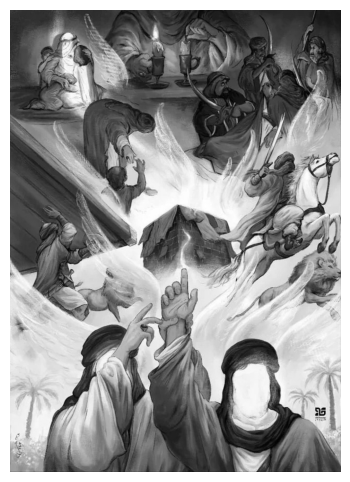

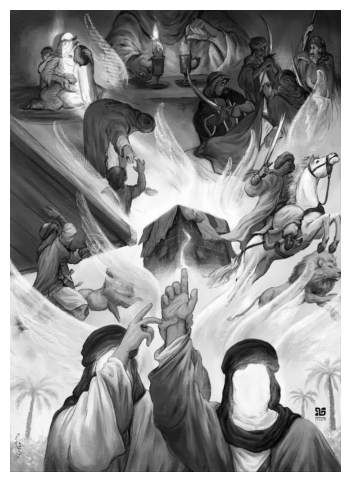

(896, 640, 3)
(896, 640)
[44 50 66]
50.03


In [ ]:
from PIL import Image
import io
import base64
import cv2
import matplotlib.pyplot as plt
import numpy as np

base64_image = """/9j/4AAQSkZJRgABAQAAAQABAAD/4gHYSUNDX1BST0ZJTEUAAQEAAAHIAAAAAAQwAABtbnRyUkdCIFhZWiAH4AABAAEAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAACRyWFlaAAABFAAAABRnWFlaAAABKAAAABRiWFlaAAABPAAAABR3dHB0AAABUAAAABRyVFJDAAABZAAAAChnVFJDAAABZAAAAChiVFJDAAABZAAAAChjcHJ0AAABjAAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAAgAAAAcAHMAUgBHAEJYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9YWVogAAAAAAAA9tYAAQAAAADTLXBhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABtbHVjAAAAAAAAAAEAAAAMZW5VUwAAACAAAAAcAEcAbwBvAGcAbABlACAASQBuAGMALgAgADIAMAAxADb/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAOAAoADASIAAhEBAxEB/8QAHQAAAQUBAQEBAAAAAAAAAAAABgMEBQcIAgkBAP/EAFAQAAEDAgQEAwUGAwUHAgQDCQECAwQFEQAGEiEHEzFBIlFhCBQycYEVI0JSkaFiscEWJDPR8AlDcoKS4fEXUyU0Y6ImRHOywhg1RdKDlPL/xAAbAQACAwEBAQAAAAAAAAAAAAADBAECBQYAB//EADIRAAICAgICAwACAgICAgIBBQECAAMEERIhBTETIkEyUQYUI2FCcRVSJDOBFjSRobH/2gAMAwEAAhEDEQA/AMdvPJWmw+HopVwCk+Q/1a3rhDnIZaW0kJXptdSh4uo8t/l+++EVKSr4TfHwm+NiKgz6py6Sm3XCfMHlj8pKllKki4XffH0pUlRSsWI7Y9PE6n7V6Y6vdsBC9li5FscE3x0lOPSJ9U6vbfHxRC1FWhKfkMfiL4/dMekanxsnSFJJTfyOHKC4pKterQLXSbXV8sNXdRtpTf64cRnGz924m48r7nEEbkyYjOtvrU5LF0t3QncW0np037diMF7LCH4paRGVqZTYBYN1K8hY2+d9vK2BygxJD7itDauYsAWQAP8AqB7ep2vbB+vLiXuUlxpKTrOtKgomwF7na/zOPb1KnqC02NJLQC+YlwjUoKUo3PpbEFUU6mCpBSsDrcdMGtTobrccEMhsai34dwF+ROx/bAxPiOJQphabK364ONH1KFh+wTXFSlKwQhKjawSLgm/njl0thACCCpskE26HEiYC3dSW2AooFzfrbzGPv2apSeUgIUQLqU4ep+mBkRje5C2UPiTbHAT1xOOQXI7ZSUJsOpI/phq3CbemJbUoJSpSUknzJAGIHqCI63GrUCc6wJLcJ9bX/uJbJT+uE0qugLG6T0OLZotXqWU80KylScyBtDbSUNPONJVZDmgO6L9VW2Hy/QK4g5Tk5MzjUqE84pxDTpWhwpIBQokhQ+eK63KhgfUGkp9cfUp1d8fQLY6Cfu+WDcnp64ussIq2Puk4XRzWrgEJB6DsMIrStI8SbY6DpURqOLAy0dR3xruD0xIpeIAQevbpv+v/AI88RcdtSfEe+GmZquaTTlquS654I6R11efyxZ2A9ypGzuROd83LjMLpFOWEPOizrlrlsemBOBPqtUWGGW0vaCQCs3xL0uiAtCo1d0uuLJUsqF/p9MTzEpqlL/usFKSOhCMZVv37niu4LmXV4DhTJHM80rRb9CMPYFZptW0wC4tDx6o6H6HBMKxDkotUGUWPUlBP9MfqtlKl5npf9zQ228394y61YaD5nzGFympXhqR6zJpwQ80VrS0d9rkp8sFIkc+K1KV4mnkhSCD59j64BKPMdYdNHrSRzmQRqBH3lvK/XB3lSNHUsUpTmqO9ugEXsfTywCwcRuI5C67jKSzzGyFG+BtBVEnEuhQsbG4tcYN6xSnoj6octIKFAlpQHX0wKV2E9GcQ6bFly+ixvY98DWwWDqCqPsfskofOaUS34rbW6WHbD8uKWjU0dx1GGOQ58SZVG6VV5AbZknlocIPhV2+m/XE1VqYaXNdj3JCVFNyLdMQR3Lvse5BOPS0O2U4AD3wqYbry02kA3SMdzGQtBJF8R5ebiOJLLq27XuCNVzi8G3HW19yVbpq2QH3LKPcYSflPOAqT8A6+mOmKqyuOpJcLi1bABJH88NnY8ZTBfnPF1I+FhC7C/r54sDuDAP7IiqT0KaU41ZTRI8fXmr7BI9T3x1HeMSPyUKC3VgKWRfc/9hiOSiXV5/vSW9EdhREdFvCVd1YXqSmqTDLr6rOqBsO588THFXvUZyKpJLzjZk6g2OWEg3F79L/TDqBJQhk1WWUISE7joNsRNKgrnuJOm1jffy88cVqWuoPIpcZZbYSdyFWBGPRgIW9TiTKl1l/7kqsCD88NMxlUFmDTA6QpepbnzIJwSQ4keCwlTiQCepPY4DswSFScwIU8SlsN6A4UnTc4uDDUIwb1GsSK+taFtNrcUTbSkXOCGVDdeWzGW9ZSmw46dVyhPYemFqSwhulwpDNlLVKJXuLhICh/lh7IYOl9Y3U5e/ayR0Tvtgo9xhwC3ZkOhiHHSlpDZce7EnHaIbQF3E3UcLaEtNoISpchw2A28I7k77Y+k2w0GA9z0RXDYKDpAT81YbaZbOqNrUWHR8Gq6SfO2JJsti+sfLCMhvmJJQq/e1sVaeicCQSC2bAjpiRju8ty6uhxALU5Ec5tr2OJeK4iS2Hm1XT8rEfMdsAI3LSTLqR/iC/lhYJbWm/NSVAgWVtb64bwmkOlTDhsFXN+/Qn+mO0gJTpOm6gCSB38jiZ4nUdNyQ034lNjRve9+mFUPJcdKELvbsD0wwShJuCNrWA8sOY7C0gadCtP5v6YuJWSfL8CRqOEFApCSb+I264ctrUsaVHphdDaF30t9PXDijcE0iZLJKinWdz1wl7m5jupLk0haZkocynrVZRSN2VefmR8hiSbabkNpejq5jahdKk9CPTEldTwMhlMuJNrY+FCh12xOe5k9jhs9FRcAi1sD1LSNQLXwqhoEXWMO0tJHTbH0ot3x7U9GeP2OsfsWnpzj6rH7T64WLV/xftj09EMdk3x3yv4v2x+Q1qv4rW9MMIdwe42fe5f4b29cfAtMTK+YK4sgOBtqmMkmxDjii4sf9AA+px8kMua/hw2zU62xQMvUFsjmSnXalJTbeylaEXPfwt3/wCbFLPySDISKyGIiWkjSG0lVh64+ajjs2SFA+QGE7DywAto6lwY5TIcb0/CbeYx8WsqVqskX8hhmXFJ6G2HWtS+vbFQ+5ec6jjlTh5atsfV9McWHljwbUjW4d3Sq9glNgTueuOQ2oWKg2kahuR6+mE1JSHOS4sJcSSlQG4B7C+Oi6lHRa03BHSxwwTqBI1O9aykJKRqSSAR5Y7bWlVytGr5nCKQ3rvotfrhyklwWbQSR2AviAdHcidJS0o2KLY+aF9Snbub9MOGoy7KUR0thblhpISShIHmbm3fBOQliZH6fXCTwcSrTyyfliQ5Dy1BKGr3J02HUXG/74UZpMxxSVORlIGnX49iBi6qT6lS6yNQy6pIUPDfD6BBUtRBuSsWSkG1z8+2JNqnq0hu+kd1WvbEnRqYt11CFEhtR3KjpFvO3fHtH9leayXybRlvBDSUrBQokp55KXCOqDZPl0Pni7IOV0vUpuQ3HQhxSB4XUI1NfIkFQ3J69O18B3D2C997McaUW0NrStKhYarG9j1Jtbp59xi1KJBgKpiXozTenRfU4oFSk/lJvb6gW32wu/UluxK5qVIZ5L3NShsIJbJSE2ItuNOnrfe+K2fb0vrbG6gbD1xddaTKaiFALq0qISnUhKQgeu++KknI/v76Q3qSkiwva2D432Gou3uQBgJeWVi/N/FY2TbH0wFbcxlly3TUkG3ribbjJSdRTZfnfHRYKbFsXvhhkluZMH5NMb93VpQ2lX4tCNN8RBgvRVpcS2pxbRDlgsJGxBAN/lg2VDGkpX36bYaTKbzyVIURcWUm+1sD4mWLdaiXEtpLlVpOYxSfdG6hBbeS2Fba0hIJBt6D9cTfFBui5qy1R+IFEYkomSUJi1Fp08xKVITsAb9LXt3whUoFZzDw918n3v8As09qLhdGpthR3uOwwvwiqi1MVPJdRgoehVeK6WQrxBEpABFj/EPD164Fo/sosp9LS130i9sKclZ6JxN1amyIU91kxXUWNwFJO2I4sOixLRSkdScXROcMrzhweHV5Y4SzdQAV+2HoTzElN7YWZZIskEH1O2JIkb3G1tAtgSqJNdq6HWwUsRgEt37+uCnMLqo1LdLfxq8IAwM0dCW2lKA67HCeQdjULHrcZt3SlzdCOifnhKVGW4gp5YGoGxHY+eJOCu6RHhNF1fmBtggp9HcUj+8aRYdLXwrqXB1K7XSpt7tOODzsCP64naHU6hTLa3SppWxQoqII/fB65lZlTelLV79cDVToCoyydNh5Y8RueJEZZro8Wsxk1emoUl5jxKsCLX77jcbYaZbqElssuLG1xc3+FQO4wX0ei3jgrULWKTcXuD1xCnkU+vvUotEMSCSwTtp6C3rhS9CV6iGQpcbEP3ER8yUxLSlBRNyldrEHzwIyqa+w65FlNgo6XJ/Qg4kaHKdpclMNY06lG4v0xN1pMWWwl9KbvIHhPzxmAmqzqIk8Bv8AYASclvtBDrXiEgb2JBHqN+uCqImZmJpuHUdpsZrlrWR/iBIsMTmQ6TKrVdiwkp+7U6htJPTUogWxZ+ecmoydWozExhvW+nmJUhO1r9juD9ML3ZwWzgT3DassTmfUzdPC4LjsdbYJSbG4xFqUl22tsbYsLP1JRJnuuNNi3Ygd8VxKXU4q1JEcSEDuTp/ocaaWC1QwgVOjOVtlIsyPGehwuuky3Y1pDZb1C9ge2OIFUkLdStmjrLnqr/tiXf8At+rR+XJWiMjoUNHSojtc4sTLFuOtyGedjREJZQEpIuG0Npvb54FZokV2q85abgHlp36DByrL8ZIMVtKmmD10nxL9CcNpopdAjluK2HZjo0tt+p6A+hxeWWzk21kTLZFOjqhREjnFBKldkjuTgdW2428mNBi86ZJUCja/Lb/P6YlpkWrvyGaBTGVS6vU3rltvcnSLkk9gL/TfBdF4YOwai1DcqKPedKXqg4n4lA3si99kbH5+lsBttFQ2Z0nifG2Zmn/8TB7LuQIU+oILzkiUzFOqU6ty7al230+aR5+uDMZNpNdqTji4CUQWGuUmyba/Mj9sEJhxkhFMhIZaaSkWaQN0g9L/AL/vhjWZnIZ9xpZ1BtIRYdSryGETe59T6BT4zHpTjx3AzMeSaKxJL+U1vMykpu62AVA28x08++BV2Y9FnKhVVgMP/hI+FfyxctIgSMtZfXJnnW88C+6VLsmxOye/md8M8z5MpmYYKnFxkqDqdSCBuCcEqyXX+RmZm+HrtX/iHcrCMwlcd50L1rkfGbW6f+ccMUR0tLefUUpTa1u/XD5yLMyjJVDqaFLhqVZD2i/LHr6euHyoj1RQChaktL3Q6D4VDzGNeq1bBucjbj2VMVI9QcmiHDu0Nbjh/CBc4R5Lp6R1I9FEXwQyqLFiSPdoqep6rVuT6nH6RFMdZQ4bEeY64LyG9RfcHHGHLWKLg4YvRXYq+fHQL/jRawWf8/LBAsISshCwUj4idtPzw3kvwVJOhxbtu7bZUBj3uTEqfLElKXGiAtPxIUbKBxJ3U24glNiRcG+wxCKjMurDjTi21I3SdPT/ADxOQytxoIkLHOttYbL+WC1qR7lQdxVIU7sE3WOvlb54VDDnUJBHYnH4MJPXmbAJ+Eix9cPkMDUA2lQv1BBB/TBApPqe5L/c/RWlWAUAm/kMTDDRIJJthmzDUkJKwDpNxh+0slWkptf1wwg1AmfXYsd1tTLzSVtOApWhQuFAjpgbocByhVFyiErMVSVPx9fZvqQPl3GCxKdXfEVmOK6YqKjHOqTAc96b7X/OPkR2xdhIBjwstrTdBv5eo88MHmhq3GJSOhCmGJTCf7pNb58c37Hqn6G+PrzCAQbA39MBhVkQlhPn+2PkiOkpuBh24NCtPXHDxATqtfbFQNyZGBoq6C9sJrj33SQDh9y0uDUnY4Waa1HSrvj09G7MTw3WevbH0xVKNtQAHfEnZA/D++PqUBa0oQkXUe6rYtqeB1Idxjlp1ar/AEw2CRiZkt8oHcEp6gHEavUOienxG+yfU+lrn6YuD+wROhGshpTzSmkFOpVkWJt174G5Ms1bMU6oNeKPDSILF/ygWH8r/XBtSsj5hz0w2zGjvU6myrLTUHgBqTvbQi4Jv54GzQYdBcl06LIW8tl5TbqloKSSPxW7Xv09MLLet1nAHsQ74tlVYtYdSFkJAUQBjkMqPw72w/lRlHxpN/S2PiWFJTYJwQjZ3KK0i1J6b46bNwR5YdvxylI1d8JNsKuCgXtgZGoXkPycvNlKQb3wgo6UlVumHxQQ2G1jfDd5sJTa974rJhcjlN30suHUve5uL+eO1KU4pKFG4N747WXAkrC9wb39ThFsPFxOpJV5W63w0BqB1HSEJXq1Dok4ewoDxb5mm+ojSUkbfthOIy48rSU6b9Pn5YIFR3mmk6FkBKQQpOx9cEVeUEzcTqIhty1mg2AATvYfzws3Ckylcix8fwmwF/3xIUuOXwr3hDaybWUpsE4IG6dZhK0tJQlsAJNvhPngvxQTWf1IGDQHkEe8tXuLJ39d8SCKMQ2dSSdKdWxtggixEuJSl0Ag/CbYetU5a27m6lKABJPljwYL7gyYLfZ0e33TOo+pvbE/Q8tSFxhIbaQAOt0pFvriQboylAqcSNI7eeLEyVlJubH5DiEeJHgUobBW2m++1/2xFlygbMso3HeQMpyRHcmSHkKLguppJAbKj3sBuBbYYs6nZTW00lqMwf8A5crOpQKl+tz0OCfI2SITcFLa1OOIeXzGkaQnTsACrTfoBv64Ks5N0LK9ISufKiQXeQUXUokLB6EJO4tfGa9wY7EPrQme820ptDDiFOKKe4JCr/Pw4p2VQnkPqWlKRqXYX8uxxafELiTlyHEBEtLiC4G9ICip0q2CUjqTvg44TeynnviZS2sy5hiJy1TZaW3oolHW/JbPW6ARo+pv8sEqylo/lKCs2HQmcDRHg8WVhJR1WR54SXSUtuOGwCRawxrPiD7HtayPR3q3Qa39uIZUQIUenqSsAAkqJKztYHFCy6SpTBSuK61b4eYnxDzBPf5bWxdPII50ZSyv4hsyunoWojU2oDtvhi9CaRZQBODSo03kpUpQGIJ6BdslNhbrtjQVg42IONIMqZQUuiKlKo9UYMeQ24kKQ4gnuO9u2Esuxq7Q5yHWqe8ACVMK031BKgbX7i56G+Hio8pVHceaWF+6upUUL629MFNBhV6uZPlsMOgyIr5fguaxdawNTzHrcbj1xVhPK/GQ2f4ULODL9RjZXfgVAtIfS6hw2VbdSSk+f+XntT7kN9LhbcbUhQ63GNAZXquYIFRaaq9M58WW3/ilpRuD38tjtga4p5Op8KoM1WkoHu8oatKEqCUK7jffFEcJ7hAdyrBAv5/9V8OWqavWCpOkD1xKOU5aWgG0XUO18R1amJpUJx502JSdP9cEJ2m5EEs5SmmQIMchakq3NtifIYjqRTHnkIYv92q5Wbb3viKXObkS1S5N3Nays223OJ6LW3NJajx03V3xku5du40g0sLqVFpVPSGzZA/NpvieZay28ElLoOo2vq0n9MA8Zp0gLedcPkNWJhuGJiQhpVj8r4ryUy5O5ZFPpseYwlMFCyo77K1DEPXMvLBXraIUjrta+IKIzX6UQ7CqS29PYA7/AKYszKTi84MLp9VdZam20xnV7Bw/kPqe2K8tGQZWSebFev0t++BjirSDIhN1qHFUlabKu2bWX3v6EYs6v5bcQqXFKC1JaukJI6KHU/688B4Smp0F9qQoNqSVBYIuQtJtfFWII0IIrswcyvWms0U1Jvy58RIQ42TboNreu31wd0oCZTNDw++aJCvXFDTk1vJFXTU4ClKYU4QBbwrO10kn9vri6ch5ppOZqX73FWlqTsH2VK8QV/q+MbKQ1/aIW4xB2Jevsw5RXWM602M9HL6EK950BJJJTe3T9f0xcvtQZRcqMFNaaiffwW1IugbaAeqiRcnfuccexDRY03NbrjrerlRrFXcXUP8ALGjPaKydSY+SapKZiBCHoMq4SnYLDZUP3A/THJ5VRZzkD8M1KaVNWp5kT4bUtrlui972PlgNmZRqLDlmo6XrjVYdRfBs6hpYSl0/D0xGTJ8qGtTzLJkp6nlKHMt6DuPTG7jWOwBEyLEVm+sFlRXows5DEdZFynTYjCTiFKAJ/fEoapS6u8tMeqRy6OrTitC0/Q4SkwWG0LTKktJQNjc401fcUel+UE6pVix93AOp3cF0/CjA3HaL8tbyw4tSfEtd/wBz+mH2d8w01cpumUNHPcSLBLXRKvM4bLRMpVF5RUQ7KTd5Zb3SD0A3wwp2Y5VVwHH9lgezpCjza9mqupiKdkxYbcaKT4ggFSgpXzJT++CnKE7LVPzlUKDmQ6Y2a3Ee7T97xZKRpDaxvZKididgQfPAb7Paa1T4WbZMWM402n3VIURtuVC5xNR2qc37zV6gqMh6c8YyG3pSdRaQb38J2v6/0xiZTPzKtPqviyuJg16GzLOpXBiHBr9SplSqEhT1ScL8NwWspmwuyb3sobq9QoYjUZGbkZgq9DjJhRpdGW0ttpRPNLC0XLvTxXuEjfbfDzJGc6hVKKIFYp1VmRIJBgVZhsa3LbpuSbgpuB6i2CJef8szG2pdalCj1hk8tExbBPMQOiVFPY33woLXT3OirZbl2JnrO8TOjNRVQqjBQmmtk6pLKLFA9R3th5kWqxJtLcpsaUt33JZbusWVbzt2xeeY6fl7iDQFVBl6OmWzcuhvqfI/I9cUBm6myKU+iVQ1Jp8hghDj60bE/l0+XrvhgWmwaMWuU0EOfUIKjTI0xspfb1hWxtscAlQyNUactcrLE0MmxV7u6dTaj5kfoCb9xtg4odaRWA62YympMa3vLROpSVHvfuDbY4cyAF6lgWsLjB6rHqPKKZeDTmV7T3KEVLo6ZTtPzLR3mpSVaVKKlEpV3Sne223i736YlY0hmJKbpVRlh6LJAMF9atwD+BR9Nv1xY1TylTas9KkzAHWp7QQWlC+haRbUD9R+mBlNHp1KeXl+q6X6TISeU85ZbjBHkq17b41qcpbP+px+d4qzH2wEjIdKjy33C7HQsMEISoL1aj+a9sfqlRGlq1tyuZoNzqViJzDlTMuU5S2I9SSuLIUhKVIQQPIXPnve42wjBy5XfF7zVFMzEXU7G2LgSPxJvcEW3w6HDepjMnW45lU1YSE+Hfv3GESpbKQh+40m6Fjqk9jhzHkvMKS26Q6oGwXpAWPlh3JgrdQFEB9AN9Y+M/MYMW2NSCNxSlzmZJREcYWHU2Klkg6x5gen9cTbLKioKSSofnHW/qMBr4cjvNvtulBBJCh1B8vrg8oEoVSIFi3MbOlweRtfDNB5DQi7jvUXaYQQTf8AbH0xkk9BiQjxrLGqw+mF34YS2VtkeHqLYZZCvuURgfZkWlJT1x8cCCmzhsk7H5YcLHS5wk6klJSdtQIxVgfyWV1EQydHc/svVqeopU/QZqXghO6xFWfGPW1wfTCr9gvQPwgAnzPfBBwxDLnEB+EqOVs1alKZcSNyvZQ6fTEPVoLlOnOQ3UqSpohFj1sAAP2thYt3GCu15SFeRZw744QQoFChh2+2FDVhHT64sTqROUNoF9sLttg3ttbH1pgqAIV19MPQlLYsVdfTHidT2tRqWbfi/bH5STawP7YeBFu+El7WxI6gpHyrJb88J0GlCtZihU1KyQ4suPAdA0AbknsDYJv21Ycyi2GVuPKSEpTc3ODrIDlFyRlSRxPrNNUttD/u2nUkKdPiKG036gki4HmMJeRyRRWV/TNLx1Py2Bz6EOpOU5b9KTKTBhPso0qbYW4lDgTa6SlPUAg4zxnefAq+bqiqkNJ93YQ00pYJOpwA6gSepG2+BCTmHOWeM01CuvV+XCkOOOFbaHlBDSDf7sC9gALD6YmocNiAwmPHRpA3Ubk6ldzc74R8V45q2+dzHvM+RW9PhqHqNVMX6K3woiMASCeuHLbaVLCVOBN/PDnSCohKrgd7dcdATqc9sbAMhpMdKkkEYb8hv8uJGW34F2N8fmY/3YJXcnqbdcLWH9hUkW9HSUbdRhk6iyRvglVEUpOopunsbYYPxFISNSuov0wFWjAO5NKxw2FJeRpeDe99RBOFFOc2x1XA3UfInCjbKdWpe6R8VutvTDkU/ZMUllMp4Ml3c7hwja3nggZipUpJsVJF0gE2I8yfU/0xGZZgO81UpMa7fVN+oHkPXBOhASNFySn8R6kYPUvW4G0/+MVpkZSUgosEDa/9MSTSYwUhCkaF6vi1n+XfCEYmwaC3evUb4kac2h1SbgkdleeCbgNSTp0VOtWo6mrXPa+JRUR9xITyyCrscdU2MdO1ye5OJptLZJIUVW8+2Ei/cIe42gQUrjAOELIxa/D2nt7XaK06d0k2B+fnivmGQpOsHp2xaPDxaSvSnSqye4wG5uSyVEsWpZ3byTQFVRbaIz4ZIbSVENqV26DfvjMmac01zN8t+rVypOKW6QG0lepA67WPRNup+WLF46VJxxUClBTaUJa1qSjvueuKOzFMjw6XKmSClDLMd269Vik6QLj5lQ/TAWXihb+oYnS7lseyVw1o3E/OTufs0NpnUikoU/EjyE6ktsod0cwg9StZ1A2uEpx6MUeQ1IpqJbENUZspslCrXABIA227Y8seCGcuLNApMnJORYslhmQwxETLS2lpclI16Aly2oJudwBc4uHI3DvjHSqg3DbzI/KqXu/vzkaDJkP6UlXxKb19r+QxhtabW2YfDdSuxNu5lzI1QqY7NeWhCEJK1LVIQyQB1sVGxPp5kY8yPaX4ucM0ZmzY3Qa6pDtWkOGE0yhZKJxtZQCdgNYuQL7C3c40xUuH3FPiS1VMuV7M9RanMMc9Cai2zCs2AQVpSApVgfMb4yUjgZk3JGb6jLrMz7cmtvuJemvqWlonUdCkldlLSRfsAfW2IH1O4PMK8e4/yyJtcypS6nVYi25kmOC/qSQFLHhKhfexIJ+uGU+ikOFSR09ME+VOKOUq7THcnxKVUX3oMi1Pkx2taEHUlOlASVAN7km52CemJefQy4yAlGo2uCne3ocdDiZBKARNfuu5V0eLCEwx6mXRHeulRRtZXY4kKRSZkOSuDTqjomxnm50NRGyxb5+WJSo0xUdar7X2O3XCjWXZNQYbXCceTObSrlpT3HkDh5bOQldaknJRU57KKjT54bjLNzGUSOQ7/vWiSAQm5FvriSy9mKHXGV5TzjRIjkeoaFRnEOkFldiNRvgfosbNkFxMyM8bLcCngrxNrWfhNvMnrgkprtTcTJrEuksoSy2TIAjG5V+bY4oRLk6lZ8Q8oRMsT1R2w/GaSDzG1jUiwPxIVe5BxnPOWZGqtNcTBd1x2zoSR3t1xtvNeYclZ8yi/RswMCLPLXJbdQnxlJ6C/mdhb5Yxtn3hsnK9cXBpb7jsVY1JUtO6FXOpKj0BG/Xywvdaf4iXWCNOgqqDmlKfCeisHmWcuw2wEurIPpiJpzLUCUIhfSotpBKibA3F+/0/XBnQIrrkgOhJsDYbYABsRpPW4YUjIOWqhF0S5T7DotZTatxiVhcN8u091QRmJRKjfW6v4fkMNqJEdclhCyQjuMEkukUtYLUuGl0nqScLuCD1CSRXkNU2moXTHBIU2LKsPiHpiBg0GRT6ik8vlKKrKum+kjod8WZkXINKSyJuS51SQGkBbkd462we4SO2Oa6zAl1lEdxHJlq6JvYOLH4R64S/2vtxhPj63ITNNERW6HHzNEv72z91J0jxKA6qxQSmhFrVXjpb0oTIQ4jqbhab3+uNa0Gj+5qepkiOUQ6g3qShQ6H8Qv6/0xnTOdAlUTibU6ats6VxoklK7bKuXBt9EpwxVZyMG9fW4EO0anS1PUqspS7CqAKACPhWb2VfArSspS+F+bY05UGRNpyXwtqUwnUoJJ3S6n4emwOLoq2UwunNBpGoJ+8SroL46ptKkTWm4imueQBp1HoQcFuRbKyhggO+5rv2YKHKiVYcRcrvpZy5UGdLrazZSVdR3+eL546Z5yzJ4eyktVeJPafUGbsujZagRoUOouCevrjIXCrMXEfK/PolBmQlB6GsiK44UNMaiAFrUAdI9bYKo3DbiFml6RNTBy+7FmsFDsmnSlvBt5BHLKgtAXrAKwbp2uMcBdkVYzNQ5mtXiM1fICZaVHZWl+I43co+7JB6G2B6fl2QEFPMLjfYarYLc0ZYrGVMzVBt+OowwsqcQy5rcYNz8aOov/TDFUuIWg+JSFNHou9h9fLGli3j4uSznMjGtqbZEBJFEZmNKhzmgpIBCVL8RH677fPAvV+HdMhNaff6g+gjUG/eFhCT8j0+WLbkUhuSoOIPzthq7QmAXFyDcJQd1HpjTryFEErOQQJUlBy3TqWn3hxDDbaFarKT1+uH1JpUziNmD3CMkopMFQLiinSVWvffBCvKNZqlTSiOkrCjbmBB5LKO5se4xdfCvhnUHKTVZmXYDL0Ghq/vSFH7+Wu11OAW6YvdmCtdiaXjsN7bOdkplzIo/wDVpjITtRnUWiVSOmYURlqbS6EEAat9x/njRU9vgXlxmPGbj5YYcQ2gOjwFSwPMi9+uKHzu7MqWchmaJEjE+6LgiOXVFLabjSUnYJ6G58r4hM8ZLTltyDIkTYE5+QjVOitR02iX6ILh2WLaenT64RNX+2Q29TtKPKpiIKuO9TTdSzDlOawWKbXKW2y4NKQy8g6z2GnqMCOZKBAkRXJsVtt3lkghvwg+o64zW9l9wsrnKhoQQ2eUWgEKH1AxG0qs8QXpLNDy9mepukJ1aFuam20eqiRgg8af/FppU/5HWF+6y7REqbTvMgxpEe/xBJtq8r+f/fERmWmTYMNMyoNh1LbnMWO6h5E4hW8qcRjTRVIGaqs28tRS8RIbSlRBsdNz0xBSqdnMOoNZq86sMMq1iO66A2pQ6atIuR6YNXgOv7PX/wCQ471lNe5NUnItYrYZrkF2NTxISRER76mO44jsNCrBafIk4k4fDrP0apMtV2NUJVOW5rQ428ypr5nlkH9cPKBxRpZYD+d6KVsMuCNHmMNhKW7AWSBY6QAfri+ckVClVWnNuUetPSYa2tbTTwF0n0I6+uFsr5Mf8hvG3U5B5I3f9SnKnS34iS0pKQOyUm9sAGZKMJx5i3lIU2260lAFwouC1z8saEz1lgpJeZCtJ2JGwHzxVGZ4ZMVbgb6Hc+WB4t5sOwZrZ2P8lJDDuT1eyTGq/DLJstRZdfXTgxJW2CQ4tPdV+pxR1S+0KMBTKmVLEd3QzI0/eBPkT39Maf4ZqOYOF0aK0Na6WtTS/QBeKx4n5HQ3OcUhpQS4i9xte4vjexLOX1nyzMThay/1KfqCDIjioJkh0IUEKGmxBx8ZluloFs3X0Vj7Rua/LlUc7rdSVpPmUjsPkb4Qio9ymqbecULKsb4d3FY8RFg1Vuzp0LSQd9wfnhzQZM2h1PU8u8Vdkusjsn0OG81pMZ9KmfD0GCGm+4yqcqRPShK46VOhwGwskX/bBFtNX2H5BNULBoyUq+bst0UoD0r7xxOpLSRdQB7HywJVDjLFAUmBQVOJ7FyQBq+gGASWk1F0uI+F+6z8idsfocNC2hykpQ4lVllRsL4Wu8vYGmxi+LrZRsQva4piTfn0lCNPTlu/zuMElHrzdbUpoxHIzqAFFC1A3Se4t2wDppD7SGXAW5ylbkRQVLR6qH9DicjwX01ZuXTWpZlI0FJdsBovukW64XTzDfIFY+45d4DnVyr9w5yVNVC4nZdcBSEreSyq4vso2wR8XYEemZ8nwo7SW+WhkKsALnlp3sMBNNlpOd8vVBLO2ppwpvsVJkLNsWZx1aUM5e+PD7+dBafc9CFuNgfQIGNcuGYEejMFl41kH2JWi1DoR1x8Zjh9dkbfTCyGhq0rHXEhChndaRbpgxOoNToanPuQZbBUULt0sbYTS1Y3VY4lVNWRpItcYaFsDviobcncarRqTpv1w3KLd8PEXWkqJ6qNvlhu8QBcD1OLE6gCYL5jfD0iBT9YDK30PSdt+UCLfqTi684UmjTMtwIFXgNOUegPHM09Kl6EuBDaiGbbAJUS2Pmu3rinJNK99mNzESVN66gxDQQOiAbfXdV8Wb7Sk1nLWWm6My4FPVlMaO8PhUqPGQFvBXX4lFpPzb9Mc7kWf7GUo/BOho4VYzfhlE0RXutNlVqQhKUzH1KsgWNh2A8sS1Moua6lKStLcSmtndImgrXv0+EW88CuV2m5SIrNTnt0eFBfU8JVlLUpaxfT5G2LIqv2SafT3Y6S644pyI7LjOkL5otpXfpYjsexOCZXkbKjwr6EL47xddi/LZ3uCtbFZy7UlRpERia2lJ18kLC7nqQlQsemHUCc3VmA9GVcD4kjwlPz2GPldkuzKeeby3X4qVFK2hZRSLbqxD09tMOnSs2QZ5UuBITHmxlD/HjqF0LH8SSD9MHw8+2wafsQOd4+lG2nUnZkdOhQQLdzjuG1zEpQW0rSeoOF5GmV95GWFNuguIHcA/574QhlLRusjbpcXxpv2m5iJ/LUfLjlDISTfEZMiktn+E6h9MTnuqXmA8pZ06NgAd97YZVRtLLStKQdSgNxhZTqME6G4kgJbuFlalnppUSUjy6b4kY8ZD6llLhB28JHiPXoL4j0MOKUs6TcDVsN+l7W/wBbb4lG0R4iOd4nFOJ2UTax8saJGomTqTGV2YzYUFqGpKtwE2H6YKUTI6vu1oGm4Ow2OBGlOOtxlBX4jcYk0vEdB++HUQKvUVc7O5PsqU4rnNaT3II6DE1BbTzGy3r02uSkDb6DEHTENuxwtalJuSAAfLBPR7LIJSB8sCt6O5C9wlpzYCBt++HbSFIcUVJtqGGTDukGwviKznnGNlGg++uDVIeJbjN22Uu19/TCDsF2TCDbEACEz9Wp1JZLtTnx4aSCB7w6G9/r+2CLhvxjyIxV2o8fMMWUpzUnlsrupVvK4AP64xFVo2cM/T3KnMlreBeulalaWmweyB/rth5T8mZkpER52k1xL+gh0svboTvuQ5e4+gwk2WpbRj64p13NhcSMyivZhkOtvFbLajyv+BW4+R9MVJnWG5XahSctISSmU+ZCwFKAWGik6VWI8O9z/wAOFMoZvVV8vqerLiUu00D3t5KVKK0WvqsBuQB09MO6Vmenv5jcrn2PL5jMZMOEm6CtQWSp1dgfCDZKd97XwLJylWk6mfkWCvYM0V7N1Pls5wVMixVPppcVUhLSW7OLeKOWk7k33N9+nbGuck5B/sjV63nqpSJDjlTitx+VzypTTaTchKdIsTa17+WM1+x1IcqGeqlyac446mAqQlBISNQWkfEdgN8bIapk16e1Pqr6DyrluEgDltK/Nfa5+eMOg8l3D+MHKsn/ALgvUWXIdCnZhqDHJn1XxObJC+R0DRJ3F97gfLfbHn1xTyHX+Juda7ljL0mRTKZSYz8+oz20kJCkXswgBXiO5skkDc49B8/1WWIRfhwkSwpaYsEFIcL0hXxOWO3LQAVKJ6kEd8Y/4/ynOGlIg8NMsuBmqVlhK5s9Cil110kF55R81kkAdk7dsXsc1jlNNcP/AGmVf+5SjXEfKfA/hNFyxlPLH2/UKbHD1RLTojtJccNzzHyFKU4NXwgKItud8C+XfbCy3MVbOGVJtFacV8Ud33loE9tQ0qHzOCrPWSEZWpLNEcKHYa2bqSloJQ4lSSok2O5uf2xmWk5CVmGqz20PwY9OhaS8l2a2y4oq7JCjuBvvY4nE8obN/wDU08nwlePrW+5s2k1TKnEGlJq2WKuzObSNSkpBDjYP5gQDh5UofuzcPU2pLMiOgc5CfE0sC1x8jf57Yo3hvw7rvDqZ/anJWZpa47jBD8ZtLb8WQR8KFKSSoBJ1bjcHGh8qVuj8R6FMp0VKmqnT1LUuE58bLgTZW/dJ2KVW8QB8sbGN5AMeLTFyvGPQOf5Aup0qpMIL0SQEX+M2IIHmB3GCfhpmWrQg/HfdU80/ZPJS6Rfe53339Om6id7YauwTJaTClXQ+gqQlV7fMH54GJdIq1CkIqtLUW1pVrLdvht0IGNcHcywIYZozNRmgtioUB1yU26l5lQKCGFA7bqSNZ36Am3Xtj9mzh9w/z9QxMFWhtiQW2wWm0a21C6QpWjvdO/UkgXtfD7IfFRFerkXKmYsht1F11GjnKa1JdWfgBFvMHr+2JmqVvh1CjyefkOo0ZyQppMnlR1JsfEnULq3AUF+VtuwGErT9pdZgrMnDet5azvCy864mXqWtSXkKCkOpB2UCPlv6/LB+1DkxYnLhlCHkC6FLTdKj8samg8FspZ4oip0SamKXkhdMkLYShTalearna4vjPlbyPmjKGY5lPrEbxQXCha1OWSQPxC/XEF+IjAMDa/Tc6SWQuBmSPTtJ1LUW+p7W64jcsr4vwJvNqseXXaaUBSjCbUSfERt4Rviy/faXKUhSqYqVpFtCN0YPsncTolLMeK5llcdoLKy4UgbkWPywvY7EbUS6dxxw1rufKWY1RbybWWg5u4lcfrsO19sFufMt0jiNAan0vmUmuxkcx5h1lQeSBuHQ3YKIFr7XxNNcZcuMPIE1wlrfbTcgDqQBufoMPavmGgZso5qVN99vS181uUywsLbAFwoE7nyVtuPLGFYWFvY1HkAKwWy7WpWYKe3SKu423WIRS8l5pVkSdtnR5BVvodsCXGKC1JTFqqoyUymFcl1RTuADcD5dcNK7mKl1hEtuk1cMSGSJkST7uthyM/e6kLSoC7Sz066e+PsjO1P4hUNnRKQ3KdZ0SG1dUPJ2NvMX6HvjRx9k7greljDLLrdSgJZdRrVpG98Tcejxo6tSY6Unz64E8pRa9HmqjIQSoXAIGyreWDyYwuAhLcjZVr2w3Y2uosvZitGqrlHqUua0px73qnrEm3VehQSlfz0qI+gOC/J3FCoUyuzafSnkMJERt4PKdshclCTuQN0g3SD8sVTVK85ScwqbjOpCZNLcbsk3t4gbfXEPwdzJHHExrLlTniL/AGtiOURmSpsL5MhakKaO/QFSAknyUccN5DxJudyP6nT42SFrCsJonjDRofE/JcbMqKcmmZmgRRUnW7NNvBTWzzTi0iywU2Nze9h0xm6o5HoleaVKprRgOOpKVBg/dlsm4SUHYg3JPn54POFvF+qU7P5bzw5HepE1iTTHFFNwjVqadJvsQCNie2GvDCne8Ozqc/NaqUWnTHoMeRHB0vNJUQlYB3Att9MA8Pi2VA12nYk5grsr6ErAcLK5ESEQa8mMwd0oTtp87BeoAYdQchNwp7f2pOkVN4J1JU8oBKD3slICbX9MXtWsntSGVvwW1NLTuUW2VgKn0l6KtCZEfkugXBHY46FMcsN7mGtKJ7EFZqW35zWoE6AE6RYJv9MW1wsiy6bQZbkcguOVR91tSQCUgGwCrkXB3xU05KzViEJvY68X7kONSXoVKpEAXcUGY7iRcA6lE363sDucZvmRwpUf9zSwyA0qTiBw0oEuqDMyKKxEfcfUuYYqNLTu41eDob7HGdeJbiPtWFCZb0x0rXLRv1CbJ0fLxXvjZmdTTzR61Enue7pSw6C7pJ5Sxffb1A273OMkZ7QlzN+WUvLShypU1TqmwixCrAkHfzBwfxFpdBuUvVVs6jODTlz4aYSFhHNbKFLPVKe5GFMsUCPClNUakKAMl2zzugBTaE9U37lQ/niYpSREjKkp0uOugNx0g7LPcnyA2w5S3FpT3u9NH36k/fOlNwFkm/8APHSV6b2ItlOQNCOM1T0xYqaZTFBtiPt4R2H87YEENSXWkyVJUpLtyi3xEfLBZPoinaYiRPJbbdcSCQq1/GB/XEJW3o7eoElhvUNGkEkW+EDb54Y0B6iIcsdGWJk7hYhXD+fClwmqg3Ole9uIt4mXQgHwr+Sh1Fgdt8U4rMOaeBmb34bkV9+iuEKdC1fdsqJP3jI30hR+JPYg43Dw9pzVH4dUOBHXZwIQ26sjdZcQLk/pin+PnC81TK0utR2Oa4yVFaCkWKFb228iCR9cYpvW20pZ6mjTY+ORbWexJmmVWnZ7ywzUoDqVtS2huDcXxVuYaI9C50d2OeWelsVxwT4hq4bZsTkyqvqFGqR0xFuqvyHD1SfLtvjR2cKIKxDMmC4CpBuU2+IYz76TjW/XoT6B43yC+UoPf2EhfZyguvUDN2XVfHEPv6QbgBu6bjb1P88OuJtHSaYmYG7kN2QfK3XBJ7M1AUqo5tctqU5T22nUgblKiT/+7hXPcTnwZMcD7xoly/l54exLyX1OI8ugFrETI8+kuM8Q6W1DaCETnlMjQPwltRJP/T++GOcKAYMxcxtXgNtXhI3N/wDLFnUCgS6hxOpzgQnRBTKJUT0UWbJP/wBxwzzhGfaqgp4aQlD0nSrUnVtv/XGwr7OpiaMrhVPkyaf95Yui1reWIesw5v8AZmY1FKg7HRzVW7p7g4sSmoZkc5CNChzCNQQABYkW9emH7OX4ZU4042lTTqdDtxspJ7YK32GpHLidyg8uR4M6OFJeIdKQWzY2J8j5YnI2SZkmQTLcDSHPiLZ1EkemB3McN/JObahRoiVKYUQ/HSOoCr2H0tiZy1nzMQnRy+h7lPICQpTmkH5E4w8yizZKzsfHZeOyKr9Q4o9NTTpaKXSKq8+tR0c15kBhlPe6U7qPqTbD16t0SjzXqLl+a3NrUhtwyp76vAhKU3IQenoANt8CeYsyVRhlEYOBiKtYAQg6lPHulVhuCO2JCKin5lzPQZAhogx6cwVuMJ2W4rqCT3G2FMbEexxyM083zFFFbCv3J7L9LbazZlOjOlaEpXESux6hbiio/wAsXH7SWXG6NxUkUrk8tTVLiLAW4TqSsrcvv02WD9cVU1MLnFSkv006lQpMctgbALTvceW9sW/x4qqM48V5WaHi5LTIplNQ7cghC0w2klJ8yCnsO+Ow+NqgoP8AU+eueYZv7MqZqA8uR4k3BAIOq+JpmAttBsLAeWCGmUDmoD0VkoSsqHiNwm3fbse2Hwp0oPqiOgIWbbC5PTY7D5/pi5ffuADtBOREBa0pBBI74YOx1ttlRRcAE4MKvBdbb1hNxewt+L5YiJEBZaUClQ1JKfh3F8VDdEy3qCMYf3NhNwAGwoKV+InEbU1uuLiwmLj3l0JUsC5CU7qAH0xMIY5MZEQ6hyfuyD6YjKfaS+iat5WpetDDY20I6a7dyoXxGVkCuqFxqw79xzUGYbDEJlhfLCnioHuF7bj19MC3tCZimVfNopsp4rcpkFlhdt0h16ynfmegvg8ozdHTmimyK+pCKXTnFS31LUEgJQL2F+pJsLYoXM86bXHp+bpClLFSqLjwJ6+NV+vpYYy8Wre2MbvY74/kOuEdDi1fO8PLtUciKjVBlxcVtxu7Sn0/n36kX3xaOYuGOVHpMrLEGHGk1ZpsPOPUtrT7p10KVfcG99rb2O+ADg1kF7PuaqW3Eddie4yGn35TZsptA1Hr9MXvlDhpHpmecy5tVmGQGdfPW2CFJUpV7rWk+IWsQN7eK2MjOfjYZ1Xixyx1AmZKvTpmXquaRmJJZkFtTRfAuiS32IHf18sAE933aWuHzSlqS4lLg/MACB+5GNScS6VR85z6bEEhqnN8x7Q46oay02gqUEW+g+uKMztlmnRcxyY9GbaYZacSyphLusIcSgFe/Wwun9cMYLnQMR8iuiY7yTUJErLjMd4/exSphfc7H/ucTpZYaUm6UqUs2SVpUogeYAtiC4dSHhEqQakBlCn1LK/Mgnw2wSBAW34whWolSkAgkE/O2/7Y6dTyr7nJAhLNRw42kJDCm1FZGkqLu3W+5vhjUSy6EqG1r3T5HEi3s0CbG6bqJF8RdWC0oNnfTwnthYdRlztZ+0PtKSslwjdJKTuL/wCifnh622lLK3EL17WCVC9r+uEzy2kraGg67aVDdBSPLDpEazaQgXB6jHQ/Gsx+RPuSED/DS3++JFKfXDGIkpUm+H6cG/jKyViPFlkoRuo327nBrRXEiIy8lWvUkX7d8AsFC3HEhPUdPngwglbLCEq623wpaNiWU6hHGN73OKn47U2sSahl+ZGeKqc7eIvmOEJQ4pVwo29NQxaEAOOs2QOh3xB8WqJUqhl6M9GJXHYdS4oIQAEH8DhJ62KSk4zckf8AGYxQ+rBKvotDk1p5FLbAZQFBDKXmlISsWG6B1t5kgdsGuY8ovcPKfTVVVuJWWntpLHvXJSwkWuEix1kX3uQMH/D9rLsHh2iotw2k1FxzlpSBqkTH1bNti/S/SwFh1w9/9L0qgormf5TlczDHZDbjqGuYiKlJOlhloCyikmylkXUQD0GOTa37zp/9ctVsSp6NWqZMizafl+lN02NOShEyQsFxTiEknSnTskDcm1yb4e5djVynTudSaiJTSk7lbYASD+KwOoXN9tODR7hzUs+TWQp6FCYp13o8VtfNlJK7JOspPLb2HwjBPK9m2m0ctVRuvILzarc4PFLrau+9yPLz6Ya/12tTYnIZ1e2Ky8vYqqc+NnCoty4+lcukL+80qQpFlBV+WQFHp6Y1O+67XosepVVMpmEUKUiICGlyTtpWlsm6B16knGWvZwybxJyrnOmKFTpaWEhXvHvTKiosHqUkGySSB+mNYIy3IQXZU2uiZUl20KUA223a4BbCb6drb2N7YFXU1PRj3jPpVowZh5nytVag3Kq2ZYTEptSocanIkJHLt1btfZSRurr1GM0e2PQac9xiyJEhs6VpgyW5RKjdGlSVISsgHxWN7eSsWXxJ9narZrzHCrC466ZJYlrkokw1uPskrB1KcbCrhagOqAU9L6emKh45VOqq4s0yk1Soak0CiWEdccpSqXIJJeWonUTZI64Dm9UkzpfEpzyVlU8ZZzsymJSltzVF0BKlbJCAVbJ2HS374yDLqMyPOXKhT3oMht5VpEaQWwg32UsAeIDy9cbazTQlZny8/SA8U1cxOa3YfdvG2wJvsN9j88ZB4jZJq2V7Tp7PLcQ594gD4DjJ8ZYo2D+zpPMIWKkfkvvhTxLrEylRKXW6plquOxGRzp0aUtmQ4pR2C0hJSbA2sQDtfBU/mmjZb4wZXk5dmKjzswtiLUEBaFoSgpUpGtRHhXrSNKhtZR23tjElNrqqDPj1DSFstrC3E9yB5fqf2xoincSIlTo9BzshUua3RKtFXIU//jJQlwatRtdVgTYm+Npa9WAiZN1q34rKfya0zVlZUuN9sMOpU26QlwgEXcHcXtvvf1G+BSmZXTWJy0SJxaUkAgFJOtJPhG3TbUcW3REN1HKbVdpDrUxooAmNugEqZWdTagPIjb0IG/bEEjL2XwtEqm86Ktw2LLxvY+iupHzxupkMo1OIKa6lb5l4Z53yqyzmLLE67qZaXmnlsru4Etru3Ygg3/pi0ofE+LX6bHmViiMrROQUyeazZLMsWSUWJHUgkD54mHKRMqeTYaKXmMtSqZLLehSrIVqN0+Hoehx9dOcsqQpVSiUBusRn1gyoWhKiopASHEjT8Xe/+eIZ+R3JURahQshzoihHpkeFEkglbaVqCU26pSQduvbENxa4CI4h0TTAqTa6lT0rcjkqUpUllIvy1EHdXYYm4WY8u1t6W3WMsyI7URkjWU2PjT4kkW2II3/74IsruZdmpJpFYSgtOAthwWU1t0H6Yje5eYKlq/s06qDLZXFfYc5amtHi1eVuvX+WOkZ3ZbcWpdNAQlQUhTvg0n/mt/PGpfaE4QxhzeJ1DjtyZJSEVEJOrkkbBxKB0B72xm9oUWl15qTVYSJ8krH3Ugl1GvzA6DEFtSQ2jHWVoWc81Px6pCp4YhpUBzZQDaFgdd9Wr6AG/mMWS5mfJvDdtK8xSOe6FkpWU3YZB7IQggIT6EEnzwMcR+LX2DS01+vzG0BLemNHbQEaj2SLdBjKubM7Ziz3IVVa9Me5S160MIVpsnyKh1/TGZlaZpr4mLbf/EdTWebeOPBypve61GuwpTrSVIQho6b6rXTfrYgEd+uM/MZrjt53rFH4d0KRV1B8SEKbcDbDLB76vIX2SMVzC4c1HMMxMtPucFp0guuKOpekdgNhfF/cOjkrhdSWoy2HtBULupaLjildyUjfr88LnJNa9TdxfB/I4+Y9Q5pFRzoiNHW1kxBkyEjSUTQgIHcrJRtbbpfDqXIqDsxTdXhuRXACUXUHEKSOhChtfzT1G1+uP2V+IFOqbxYqP91kBXgccZWwh5J6eFYBSfQjDbiNmuk0ejpm1aptxHmXlPRkHxLUUgBYI2snSdPfrfthKryFlt/EzSz/AAGKtBao6MqvirFrdFzNGzJHlx006U+3H06yFtlKSCDbsbjA7UoiZbjTpdW0tlwPNLbOlaSOhB7YD8zcU5/ESdJg1iaunQWJJDTDUdK08v8ACvVsSfXD5nMNKgMNxU5zbkJQNJvCBUQOn4vnjQsb7dicvVWwGmPqEtfzJEo1AQ2245HGtHRR2CVJWrc7kkBRtfe2NFcJ2XDETObnJMdwlaEC6QUq3BF/Sx+oxj7MU7K9dhe5SsxVN1C3kL5UaEhs7Ai973Fr9sXf7LlUzSimVVM+W9PoyJ62qY/JcBkaU7KSq3YWFvLfFQg9iUvLIugZqYOJWhO/w9sMK5R4lVpizobU6ndF9t/nhCHOS82ClX/bDyUy040SsKv3IVa+KgcDuAPCwaJ7lA1qKhuS7zJCUJbBJUoWGJvh5nTK1JnVUVjONO/vboVGZfmISGQlKb2JOwJ87YZcR8sLmsVmlSHOaJrLiQNNviSRbr64qzgBFy1VaNJpmZKjTIRaQ4pD79DYlXXq/EVJOkWSkfPCvlUDUAtG/H1GyziJceaeLnDZiTIhyc1U5SbaV8tQcTq8jpvfvjO3FXOeUK/xaytUKZV23YUFsNlaho8SipPfBBmeZTKBFDKqRR5TilFTTrUBpk7GwNkJ/nfFOZlnyqkpimx0lD0t4NBaTcpSfiI8tv3wDxqlNcRHMzGRG2xl8x6emNEdfp6m+altwIIVcdeuH+UsrqluMomKOiyS8NPe17YrKrcR4EGAxTsuUKqFENDbbstaC8LotfcbdvnvvjuJ7QM+jUp55ECNJdkFIiPa9IQpR3StPe/b9MdDUzD2JjZI3LY4hRkuwl0pKOVGt4NXyH+WK0r0N6NTWJReBXHkNPLJ3TpSsX/Dv3xblNbXnJpmpPtIZbREbccTqP8AilIKgDboLjFa53dS3I91YeStAJbUB5YaDdRFBozasOHCcyM3OpqW5C+Vz0uEnSLbjYHc7AWG91DDavz6RVqa26IgXTaq1odAsoNudwTcA2PXyItgV4OZhVXOC0ZLUhv3qnExyq1iVCwN/M2A/TEXkHNVNjOTsjVuS4ylSyWlFaiQVEkKHzJN/PHO/EbHOvwx9W+upk/j1w/bo2YHUsrKWUqL0dxITqbsdrEdf+2LK4M55mTcrNfaC3HnIpDTiuqSANj9bHBx7QmTETaepSFalspKkLSkFKx3NiR6YzRw6myqBXlU8POct0nltgfE8dkoUnyuRv6Y0blW+j/sRnxuWcK7Y/ZtvgVLU9GzXWUxREDlXZpqLDZaW291fPx4iM7Ost1h2G8UKDt9YBvtgl4X5eqeSMmwKTXjEXWatLk1SpJYOptta7FKU/8AKkDFScWKu+1nEIDbaQ3HQVNAbEne+EMBS1m/6lPIXF3LH9kPlSjsU7Nrf3i3Apt9ClrO19QI+Xl9MNc55diDMSXdKkKBK02O179/PEhlGpQ3q845Id8OsX9Fad/6Yf55dbVIamKcaCEtHWsGwsO5xspsPqZhIlSLpohznUo8KQdWkDa5JJOPsmXHgIU/LdS0y2kKWtRsACcMc9Zxp+WY5qQ5cl+SS3FY68xfz7DzxULtVn5okl2uT3HuaQERmnEtsC3UC/xC5tiL8gY42YTHx2vIEj8zyXM9cTkLhXdhF9mOgp3IbCrFR8hucSZpIp9al0dCveoVKcUphRNwATe3rgxpmV40SCiTHIdqTzzYYisKIBIV0cWOiT1/5cD1WVPZqUmRSw3IbU6ptaG2xpUobBQA6iyT+uMj/dOU/Xqb1eKaNbkpPqeVadSkCYsuTZp1NJcITZHmUWvvfHVHa5VYpVQS4hUlbgsytCmnVoI3+7IuQnz9cd0fL1Mr7jM5ie6KjKCUaG0aSwCdwtR3Tb/PAPmvM0+Nmd4UWsPzGKapyNFfkr8WnufXfv3thrEtX5gB+SubSGrJMNYuecuZZz87Kq8lxOmQsKSyjmFOpNr9Rvv/ADwZnjVletVWVKocep1KZPcBhRI0RSnVmwASi19gE73I+eM7s5KzFPdeqLz0dJlq5gU8bqWTfB/whkUqJU1U2t09yNVVultEtalpaTYHwWRYeL+mN45PytMQ0muvuaTynLrMyl+65hokilymVJ5yHipxTYUPDcpTsfCbpHyB64JIFAaDT7ipiHUcw2QlBTYgkDY2KflhOjxYEdDNVTJcfUbFbaSCCD5gmyje1tr97jfBiy5HkLXIXRJfMkWWd0JIPQ7pI09O2JLCK61AWqU+MoHbkArJaQnVYK77+WIaq0F0teAt6EEEEKJv9cWXIYTKj8hcVAeWsEtAailJ7/Pv/XEHX4URqC2lyLosotmy7q1C+rbysOvrgIs16lhuUjmOmuCfVGI5QUtE3PwkJKOo/XAtGhTp05ibBbDiWtKBqWUIsoadRV2At1setsHXEGlyJGbY1GhO8gVBmNMWpSTflIQQ5b9sIZfiUSgUeqT8xVqLSUxm1w0vP3K0Am4KUjdW1/ljOzsj0i9mavj8bbcm9QchZdMhana1JM1lB1JCkEN6/MDuB8+/bENm7KrRKnDHSunPlJcZaQE8l0WFwB53/bFx5fj8IcxsswKbxIYkynwFKbW6Gisn8qVdOnTELnXJNUyxNCUJK6a+k8py2pK0Hz8z6+uMynMsR9P1OhswKbqyF9wB4XZ7n8N4tf8A7NUibLkSnI6ECMyHPzG2/niw8g8UJ1ZXmSNWIVWiuLaSW01Bsh0Nn41XsAUi9gB02xD8LaHlf7VnZdr06e1IqqufShFVylOutoUdGrfoLj11DD00KsOIqlSVUpg+y2m40RubqccLzilajrJ3uABuP54ZuWu9uaxOi63EHxf1K24kRqyxnCNWaRAaW0xIAjsBxRSNKU2Cj5GxKv8AixVkZOYapVJyagHENhTvvjrWnUkE3UTfzJAxducs2UZhmoz8xOFdUeKFsx9HiQsAJO19r7YqhNHXV479Wly4cB55RLMZSy2VIuLBSuxPnbDK1rUoAme1tuTaQexBylVWbR5KmGdSg2oFTahbUkd8WFQOIVPnoTTpCXYq1EnWloKt8ydwPX5YGKwmPEpiKPDmMSpkR8OLlobUdRUNmwo2uAUk3G3ixL1alx58Nqpx0Nw5iG9ZCdtwNrj9cPpcxXUzL6EDw3Sl1ttLbpCtO4Xc6j6EdreXXERUmy20pd7g4Xp951Hp8/WErfb5XLSdwUXBv+mGs98qillbDgLiQUp1AKI+WGkHIAyhP1MlVQmhIQ206RYWQLdB5HDhLTjYJBtf0x0h1LiG1mA1HIu4HEm5Ug6t974RVIWlaW9BQCNgex8vX543Q4PqZDpqSrCvClVumHZsnqcRkch1KQnEnGSlSrkdMWLbkSdo6NKkKJuScFDX+GB5YgcvNaXgFpO3QnBOYcZ1kcwarflVbC9ra0ZYSZy3HLwUhPUkDz88R2euI1BypJXl40pyrTZTK1SEF1KW2UkbIUdzqJ6Abm3TD2LUmMq5brNeLa3DTmQ+lKfxKSCB+5x+4KcP4Kn/AP1CzY0ZdXkOGSyl5evlrV0UrzIFrDtjD8hlLTWQ37NDAxP9myI8P8sVfK2WIvEXiM2Yr8WK77nS1JCgwFG+tQSkEOFJCBc7C99zhFMziRneMldVlR8v0h8FSIdO1mZIbJATzHb3Skg3sPP0wRcVKtMzTXWclUdaHykpm1FSlaAlKD902DfqSTgly5S3GWUIWlLjqhrUvtv2A9MYmFjfJ/yPHvK5jUt8NZ6Ekcm5HpeVqAVfaBpzQFiorSPrYbE/XA7mzOVONThZQpUl2bNqktuPGfSpQdRv4l2ChZANgVXG9sTXEOowcu0JT9TzImMmK1zHQw0FrKOgsTsm5I+tsVdkxcqr51gcQFU4wIbCEQoAdbB95b5pLjr4202Kkabdgb+myqhRMHRc7M37wtqUZp1CZDIS3ykshwpsVIHUfyxbrE6O08IFUnJDyl3hSCVXcSew2slY/L5b4zhw0XPy+h+h1ubzkvrS5T3nXBqcCjYtknqoE/pjT0umsVGmIjr8KnGrlVr+Ii2rCeQNNHcP/wCsdRmn4ydDk9UoDYKW2AoDsLjrjHftdcIq6rPP/qNllH2gqXFbh1Gngp5gQmwD7bija4CiCk7EK9NtSxqfm6lNCNDqlMlNp3/vLLqLD5Am/wCuBzMkBWZa9EyvUFNvuvJU1LdbaQkBtJBUdBubeIC99jhVq1uHFvU1a8qzEcPX7nm/S+JFTyZFby9mikVGKiUQzFcnRtTbQKSUgqUnUFX672NhY4h+K6YMygIqdRh095LaAZLauWFPNqIAcQUqJFje+Nne1HwEcz3kSoZXy1Qos+sL0ohynUIaEQp3Kdf4Um3bckDFD5Q/2dXEjPWSIS8/8TUUyRJUhKYsdPO92YFyQNKU6zsNtXlvjLbDFVn/AB+puL5lr6tWjueejiVO1Iwo8UOB1xSUspJKVm5GxFyRt5jFjZahy8u1Nyh5scS3S6nBejMMkqaebUhI5Gsg3PQC5N9Pc6d9a1f2Isrez7ObzCioTcy1YsKaZdlISEJvtrCUki/fv064ojitk1aqekxrrmM6JyCfxrSSpwnzv48atWtgTGusYIeM1l7K2cpznCjLs9YS4+hpyHIQ4b3KHFoIV53AB+uLZnUGA86qow1a2X1alBJ/wz328sUz7MkX3XI1WYtptmKcjSOgultWLtgSHWkupjr5bixZY/MMM7ImIDx3uRkvKzYQh2k1ZbLmpCXkOeLmov8AMbg2+hOJ+EcwwloXBmRZDDi1c1AaKbJ87m/nhvTZlOjOhuXGLilLBUUmwO4w8jNZHXVXY0PMbsRbiiVthdlNOK9PI26+mLq/KWiFcGZ6U6hxFMQ6woApDTSxruT10ixAwm1PoL8cmQ69HdUolaQFABWCl2NXoMV2IiUqo6dkHqEfxW8v8sBc6HWIKZqJ9HjpbA1tyW2wNQsSQAT1+uCy0JaNOpU6KpTEpt1l9Pu77DxulaP9XxknjFwhHD3PD01mS7IpE/VKjEAENxtyEBQ/EDe/ewGLooGbaK3XHKcptTT+kaUuDSNHzAOJfjZl9ecuFtRpdPbDjik8+PrN1J28SQeoPy8sVY8RuWQcmAnnPnisvZ6rZmSY2iBG2jNkk7H8X1tjmJT47qW0uDwBYUo+gPTHdbo8qlrdiPBJU0CTpN7/ACwyp0hwR46Crwg3PrjEucliTPpfjsVEpUCFTkuM2Fe7lPLT0ubYfZHqqDUHZr7iJMrV4XHEjwgdgD88CSF+9XWpKm1d0kdMIh2fHfKoLLbn5gtRSR5f1wBhyGhNUnjNPxK7TK5EKlhl11bYa5TyQrcYF8wcIcuZuqjNfzJIbnMRmeQ3DS4tDSQCbJ3J2BsbYqSk8RDBQhiq06TGWDZDiBqCx8xgtq/GqkM0zlQpAcI8LnKc1K1fkGnv1/XCQx7Efkk8z1ONPKY4oZUpWVeIlRp1DVaKphC2W+ugAfCD5b4DbdQcFOdauqrZrp9RSq3OZUlaCmyggnub9RhFeXVtTylhGuPIVqQofgHrjZFpRR8nucdk4/K5uHqDo1NsrLg8Crav1vjXXsr09k5HpDzqXSqQ5Ifd0q+NSnSCT+g33+WMs1+KmGhIb8aUqSL9L7jGkfZ7XPi8MKE9IUoOaXFgJVYqTzFWPywzSBap1MXM3UeJmo3qA3yEuU/QlW/gB3H+eISVU3oCDzUKBHYnbHUDNbSGUhxYsnYYUr0uBVoaiWrLAJ69cACtvg0GOB+4gRmKoGphamnlhLabgDy88Zq4H12LT6/LenoU/CkrkR3kjoULUb3HpjQsxtd1IX4dQKR8yLYyhl8igVGTTlvFPuk1xpR1X+FZ2OBeSQPQFj/iLQL9mSnEiTEXmB6NAWtyKhIS2SCkqT21edhgFpaIk/O9Cp0qOiRFXKbS40oX1JPbFhcSYjL7EF6naVLWlTZKT1IBUMVZSpzsPPWX5biUjkPJcJO9k6Tc/uMR45eKiNeVbTGawp66BlugvLjwIrYfb5TTGgJHL76h3vfGX28vRzxLZTTw2Iqa2izCB4E+ErItg/zjxHp1IjhMeUZtQeT9ww2fhUehPp1x17PnDmq1yvuZ0ralCnQ0OO821g7KcI1Wv2SB18wcbI7nPnkQS0vXmijZMU/oS3zGyq6/zEb4oSuzmnZaXfxuKCAL9ScXFnTMDq4b0aEwVtuNqS0gjrsAMU83T5b8ornqQhfZsHZIwRTowAG+xNQ+y4+zHyvLozrqUh154HUfDzepT/FtbfEHxMpgo9Wh1yOtKlsq5ChewNjsT8v88N+GWYBSYPvUVRHJdUPLYjc/vg44gpjZgoUmUwouodbDiNKTfVv0vjHbq8xpTtNyHmVFqr5eQyt4u6mzpJsbEdbXHrirck8KYlY4pUjM6o8U0mlSFT3FJdJCngbIQLAXsdzgjyRlzMWbamzQIxfi08JDk+cq4ESPey7A9XFA6U+VyTiwuINby/lCntUbL0URo7JDTLbQBv5qv+JR6k+ePB+zWp9yPfcM36uzLrKkNlsNxWVlASdrhJxk/iFmFVQrD0vUTImSBGRvfwJHb5DBcnOktkTHX3SkmE40myrEuLCkn/PFZSxHiyvtioTBqb2a1CyUDyAw3i4wo9wVjlvcmaVVnqXEdbbWS+XC6lwG25FjtiKqGYJeZ5CKaiUowoqtMtxs3L6v/bT6De/0xFyXKjW9UeO+uHTikgur2ee80hPYevriUbRFpUQNsaY8dlFvCn4fM+ZJw9oQHbGVdx5ektuUeey1ZKguM0kG5FtO4/z7fXHOV6TBYp8auPzWI6HU3S9MR4Qr8raL3UPM7eeB/OWZU54mvuoRopkNtUaCgi/Mc1DUs+ewI+uPrkKo1u0qvVXStpsJSFGyUJAsAkYVvxfm9zSxsr4FMLzXI0dbsePWElTwWhxwLFtJv4Ub/DY26k4+MtrQ6h5uqeBA0rASlVx9MV+040nU20827oNipBuMT9NjZViOsyq9LdMdxnUbJ+FR/D1wI+PWkbWML5NmOjDhtmPlCrpzFNQyINWa90O10MvDdBJ7XGok/wAOAKqxKZmvMjtUhQ22ae0rUXSLF90AX/kT6XwwDtTzK6mltpd+xmXi43zvj9L4smLllujQW5M+5SwkKEdhJJUB22/nhIV/G/IGaSsbU+3qRyKfIWhK22ClKxqBUDuP0xDzI1SilbpZ+9iy2HGnSSQXNYACh109cIys45qr+YmIzbzlKp7S9KIzaClYT21G1yo/54JqhHrq6JFkPyVylJkLuFgcy6bWBt5evngxDUkNAhargyL7l+5UnU9tCW3HOalF27tLZSNZTsU3WCBex0kWNuvTFnKfpdTjpWyHXm0IbQiOVErbUVEXJ3Gkm5A3O9jYWxkTKGZZLNU1N1EMSEtctLbvhbfWN+Vq7FVraug8jfGishV2DnihJmw25bYiDlyWJSuWWXrlSws330hV/wDhsbC9saK280DTnXrat+Jhw43EcZQyxCWzykJN7BWlIFlDfbY33Bt6YGasliY9JLMPmLWonS4eWeWSfDqBvvuTa24ScT9ScjsNiUmI2X0HmtpGwSU7Yh1wGq23GU7EZLZUpSG3XCvQQbjyv1wMvqWUSuuJSqc1XcjZjhbBxLtLdU2sKISpNgLkWUAQTquL4rriJl5NZzDCpy4xlJqD+lxzTcIZSNTireekbYuXi1lSFUuE8qRSGQmRR5nNaIsm2sAhwDYg3TbzxUtGlu1vKVTz/LiJanMtMUKG2k6iX5JKniRt0G1/IYRalmt+UehNCu0heCxDJeTKLSIIqKoaQupTHXWitN1NspOltI8thf64JqjIzpk5osUiuQajl6SpLaqZWVKCWlqNkBt1PjQFHp1Gx88OpkePFpVPYYCdLLaEjSm22kevzxXXFWY7PluUrUhtnlNqc38SlWUdvppGMmkNk5BP9TVGQcarcks0pl/aUVlltBkLKZ6i0C3ydG6lIN7gBW1yegHriyMu55pGaqDGy3m+ot0/MV1J+0XGrsSbA6FqV2UB4SO5vuMVtQKfLp2VnZ8xTqps1ltgOunxoYB2SR8gMcrVFrNPnIfQSQu2oHcE9D+m/wBcamMd7EUvtLNyH9SsMzVBeZs9TZ+aJbSOQNS0xwFILwVpSlI2IskAjc2uR64YTF02uao0KlzB4biSXrIuOhIth81k+auqvussNONvLNw54bW88O6hR6xTmFxiwllTqSGtCrhZHYHbfGkE5dxT/Z+NeAjikcMaa1R2a5LliW4HglbSz4UK7KSm+2/zwzla2nlpSbOKbWnSbeE2tvhHK6Ysht2nOPO8226HdyT3+mGC2ZcKW8ylwqTcEX7YtrjFSxc7MIMpqdeyzYPLUI0xQUoFIGopsTc+Vrgb9ThbMMsSGvu0uuLUkXBFrfTthDhs7GcgVCPJGm80Em+4SpIH9MLVhoJiyFMm5Qogfwi43w5WdiBbtTJNl5HLNPRAdKtKEoUlSSV3PW1/3NycfFISpK1raQ2WVC1nEKseovpJIuOnnva9sKNx60iMhfvLzDTiVqSlTpWi6TZViNxY7E+fXyw1c9+nLLKZnvKFOhxF2gkkHZV+x8xfpba2NBX1FLF/Y+ZKdP3B3Gkg3IBv9MS9Kf0gankrvt8WBbmKSpLL3MQu6hcGwt0GJSCssOtradHjsk323GHEfZ1FpYVGkJDo1LB+RwVRVWKev0NsVXSai+iRoPi3Ubp3xYdNkLW00pxy1xfpirDcqJ+4gVk0nJM5xtLbiHJMdK0qAF2gom5JNtlbnzGDyp57h5ZyfHqkUNl2ZHLsRTPiQtakAJsB13A6dMB2YqNSMyZWqNLqLYcSUBaATbxC+K9y7T2qLUv7KpnyJKYjKXYvvL6lcltalK0oB2sL2Hyxz3ksM3ODvqamFl/66Ef3LF4cUivyJi3KjNU/UZy1SqnK32KjcIQSfhT+fv8ATFlTKlSKZHZixM+UqlKactI1FK3ir1UVg9vIYCqBIRFhym5QUlO24GrVcdNPQ/LBNTX1RowlGhxUuH4GS0HJK0nqSnYWtYk32xUBVUKPyIWubX5GB2aonKrlNo1ep0CZBq8svrqkVwFMpttJISQqxFyb236YuelwaVXZTNGpCGmXExlNmOsBKigWuoA3uB/XFDVKr5iVVbw8iKn0uG86tC3pKWAHlp0goKjptfyI+uCbLfEakZnrpy/U6WqjVaM0CgGQpYdUmyS5HeRslxPe4v0tj24RKGYdCawyLGalJNIqyEvwlIKmgqwIWN+t7hXqNvn20xlZU2FQYqKjIMphSNTLylhToT/Ee/0xhjLfExzJcNRRnCHm5xlm7BShbUha/J8o8BtaxUm3/Di18gceMxu0VK63XlJnyAoCPJie6R20joQg6nFDcbqtf9cJ5VqiOYGPYxJ1NUKJCVOpSFpUmwIPS+BCgSZErO2ZapKiliHBUiDGW42Qp3SEqeO+wAUUgFNr2PXbAFSON1Yak+5LiQZ+tIfBjyEp5yUjdCTb4iOg+m2CHhrm6k8Q4tcfhNqaZ95Rdl0oSppxTaVL8Kd7Eptc9bHywqtgI6mhZjsh7jyLUWDmWbQXXbLfQVNm4sFD5kX6+eJ2PG0PCXTUoSFqCJDKz4TbYqHkcV1mEO0ziRCkknUoAbk+G4AHTzscWbS2IrYfkRiu8tXMcClEgKtbby6YoRuV/hKd9pOC1yKUsdFpW2Pnf/vjCvFyOzTmZy22zy4hKCoAmyFR1X2Vj0C9oSIt3K8SQG9XJklJN+mpNr/yxh7jDTnZdMq6Fq1okBrRt3KVIt++CIeMsw+Qah/7Kspcvhq7NKlBcqqKkLukfEplon4dut8XXHjc/UlN9QAKbG3Q3/pimvZipaaFwlpcRCQPvX9W+5Os7n9h9MXAy+o30+G2/nv2wcNuZlg4tqSHIakLDs2OpTidgq+nbEImfkqlZrXHqqhHflNhJcUbainoomw/Nt9cHdOS4h5MaoMNJe0aws9Fj54iczZRy7WUIVUaWlxwLuCBuAfM9+mDKe4KTyYUlZvDqanG1jVrQq5I7b4iZblb1LZqtPK2HBygEkKBIBIIPqLYjaDHokV9ylwKlNbntp1clUtXLKe1k9PPDirrr4Z5sKoIl8taSUlIAQQbKQT03uOpHTBw0n1KyeoTL2aI9bRTXGS6FqS6pwFsJv8AiAVufM9/S25sajCqafdUNMNNs62ilRSsEW67XPQjpbr1wJZpzTLhmZQIsdpippvJdeQ0lei/kAPiI7fscS2X0/ZrSZ7jchxMqIFclBUltxadIVuFi46D6Yhxsal1208/faGo1YyVnWo06nMPSIkeUNDQIKQFXUQ2Sb2sNr+XXAPQat9rxklKVJCgdAUCDby3GNZ+07l2ZIfRUWGUxW5DLa3LjU2HEiyr6lqO+oWJA6nGR28uc6UG6bM5LzLh0DWFbgkKG21wRhO/EDrsTocDzNlDCtvUI6XNalhMZboQtFxcjriJWzOhuPyYU2O+03c6G1XWbG2w6ne2w3wwWS7U2prLiRIaWpuS0oabkb/0/bCmTank/lT4udhVVVNCCae/GlaEtO6iSVJItpPe1t774zmqNeuU7BLHyl+h0DJMZlZW2pEmIhtzVy1hRASs9xbqD88A9JnDK+YalR/AGlSEykIkGyQfIH16X6YKJNcg12mypFXdf99g6GKa8hxIc076kuXHj9D1HngXl0mHUZaJlXqRJaTYHSAk/wDEd7jrti1ZESyTb1seoxqlUFUzQqS2AG0qSEpTsBe/+WDtmpFDLadXRAwDVCGIFYVNjwle7htLaXrXCrGxIHlvh2vNdIbsFVNok9ADucEtQXKAJk/Manbf7HOaJTSoa7m1jjUfC9yO1w8y82g2SIDdh+uMpUia3mass0qDSZVRLjuhRR4UtgggqPW+xPl0xrfLkOPlqiw6DDQFNQWUspJ62A74bxwahozFzWa9oTfbD1OcaujWyoHUsG9vpiVGYEuMB5iQHUAWUb33+Y2wPIq0ZenWw2m+3Xtjh00Jabakxf42laT+nTBtKfcTCsfUlZE1uS4gqNio2v1sfPGUM0QynPFYjLKI2uctQC1XBBN9Vx6b/TGnvtSkNMltqalWoEElY2xVWd+EVEzTJm1ij1Z2BUppLq23Fh1pawnYdQU/TAcitbE0pjeIWqfcCKLT3P7c0SjyZiZcV+W2jY+FWq4t+tsVejKMvOXEKmZbjqQxIekKY1Pg8tKEglV7eQGFsm5lzBlriNQU1qO2hiHXERnVtg3OlwBVrn/VsXrk6m8P8j5/zNUcwQ5Tlcbq8llskakNNL8QUm9r31n9MRi0/Gm9wuVa9zECR2RvZvpsyaXcyVczowV4mojZYbc9FKO+kem+5xek1uk0OlsUemstRI8ZHLbbasgJSO2+AuZx0yrFkrjKoVYLbXRxlpJBv9cQFT47UopWYWVaxIV1TrZbSL+fiJt+mGFtT+4icew/kIpk0uSvjCidKUJVdJTfYH1wMZnirUsMR4oKD4nFBBJSr5kb/Q4FGOJNQ+0DLYyYlBcCjd6VoBH4TpT1O57jD1niC4sFE9qOxYaghhokW9CcebIVelOzCJiWN+Q8yzNh0ptSJz/LQ6gI06SbG4xaEHMuXmqGUyK5BiMauUXJT6WwketzjHGdOJtQrnMg0R9aWB4C8n8Vuum3XAjEorlVkJjMNKqEpR1L5iuYoD/n2v8AIYsmGcns9SzrXSOPsz0AmcUMiU/LCss5TzFSV6lBUl9mYhxbifXTvipM315ytVIPNOHlNHw3xnuZmfLeWBypEBiXMQNK4/KQ+VeYKQmw+eJWkcUqMiE2wzHmUsuOBHuMpoqZN/xIX29QSO2Df/HrQu97MCrBoeTamWAptYui+sC/fDZ2bDkq5pSlZ7KIxDP1Jmogch1Cwb6ShYVfbtYny/ljmLZRIOE2t4NwM0q8NGTmZIO1VpC9LRBt1viEzZmRdNoj7hHjeSWmwFAeNXQ7+W5w+kIShIUgfPFe5yfXVcyw6MgqU00ha1hJ2vcW+ffB6Ns+jB3VVU1+o0y/TooipmzGipiMCltA7k9T+2JlyelTnKVHC2V7hCEABI8yb9f8sfr6ISozTulAs0gW79z8umPsJtpqlhttASpSwhalHxEeuHydTJA3IbNtNcdpJnr5LMUXbS65bWojsAALf98MaBQJAYD9UfddSoeBCz09cEObmJU+ZQqU22osMFTzwSLi3QX/AHwVUSgtuvpm1MISwykk6jYJT88ZubaUIUfs1vH46Wj5G/JzQaVT6VTXqvUkBuPDb5mixUVDzsBe48rX3wrCgVhUaRWK/EtUaix71GZKwlTEfT92kpPcje22LQ4GZca4kVU1lbSFUSnSC1CadR4ZS0/70joUg2sL7238sSLeUIPFLiFndmnJJi0xr3OCsOgXeZTpCr/iJWHP1I9cLVIOW2jOTdv6VnqU2vPECvIU5HiaFW5jhQkfCqwI3/EN7Yd5bmodr8umywS5Nie9Ib1i5eb8K9N/MWNvXFbusP02qVmMoFtxt0WSUkEJLhvcHzUT+mCiWyJK0S2pSociMec1IQqym+t7HyOrfDl6DIq0p7mZjZP+td36nPEWI3RZn2u0oNtvBK2SOzutP87/ALYM8i54XlHNC6lN5zkGswg3JZji61SWieU5p73SSlR9E32O1UVefVM512Ol4vuxIjyA6padrJuQf+JRvt6YO8y09qiZXemsNNtzXWUFTi1G6G1nwpQOgFiFg23CxcYvhYp+HjZJy7lss5LCyue1PV4El1ql5JY5SgUoW9O8SRfu3p79fiwhlL2zWmqglvOGWURGlqUPeYO5So7JUOw6npjOr9OrUhSmcuRpExpw3Lqo6PEfMbYhwmoRZKIVQac5jZvy1p0hX9cXbE1/3FQ89AsmZ9y/njNKIqavHlUXMUNVMLoSsIW6ElTTgCt0nWCmx8Vz1OM4VWFVssTK5ldbqo4hvKqbKVLPjcCbBRH/AHxWOQs2VTJ1WlQEtPoTMDb8RMdQFn21hafEbeEhJCgOu2NPe1REgVoZd405fRemZmpzM0cogHQ40A6FaRYlKhawtgTLxUrGa+yDI2ZVlTMrUeela9D4Zc8G2kKFt722+LAXWIi8yZxi07fTJfSlaiPwp3v9RbCmTah79kGk09mQpXIb5SCrcnSper9Nv1wRZFpLtTzZ9tc1WmM20sJSDbxgoHz8SLfXHNUq2Ozn9mpdu5V1+QorUIIhqZ0lLSEkN6TYA9sDlMpgEcx2k+J1ZUr+IAWSf+kDBZmp4GM1EQAoySoIIV5YQiUx1sxVNovZG+FhkGodmGeouuhDfJ3smyahllrPubs/UmgQ6sFCGzImJ0OKSbeN0HSlXWwI+ZF74A+JPBGtZd98g1RtlSkBL8XSvWFqFykXKdKtSdwUki18aQSmm1/2dqVS+a+uXDFTa1JUQlpSnEqSqwIAWNV798VbBrUidkx3LdYY5kihtWiyXFKU4WgD9341FWkEk27XPbbG9jZXKsHcx7KmVtamQ58GWhf2o3HKFpcLbo1C+u+5IvYHtYbbY4qqXn23FrZKFoRY73ChYWOC/NFLcptdLCoS2hLkyHd99Q2IP+vPEVVYyRDWtRvZOnDjvy1qDHuQeRZDKQ6JDnLBklKvCVbW2O2JqpgqhvPaCgEWspO9+43G2AzLsl+mT5aG3uXZ1BSVG/YYJ5FaVJeeL6QoLFtKk2T+mHKm6i1g9wsn1VlC2A0pKDHAbc0R7j4bJtcE9NyeyvhAG+IpU7QUEulWntZVjvffwjDuQhbhBU853vY9fP8Afv8ATpthJVOXqKkrUL+uNs1KYmbQYwlLLi0qBQixPe18LQX1sqAcKljyHYee5x9ejPtbINwOgVvj4i63AFJbQbEA+nfF4MsCNCEFKdCXEBS1bkKBFhcb7YOocgIaDqVoNuyl/wDbFfQprDKFI5IuBYKBt1xKRaqy2yAlBWrsNShv9DiCeUGZZEOU48ysaEhKk2IIJuP2xUVQrCoXFNlyxQnkoYWb7JQO/piw8qVNc+QiM6tCUgb6974qyZJfkcQJhQhh1DjjzfLWbpUlHa3rhHJI/jDVrs7l38O62oy5bsl1vSCvQbgeJCiL7X9P1xYESc2KUZq5PIL7S3ZcgXBSwDugWF9za2+/TGXCK3kRU2QuW23S5SvuVLQdbTixfY3+EntizJnECDUeESWoFR1rqkZMUabCyApOsEkG1wR2xkOeEsE73DGnSI1dWZ9VisaCApqKFAhhq5tdNydWwNyAMSLzuWswMKp5hMvsOqSoOXU2oWP4SLEHtcHGUKnM5CuVSWkmU3pstI0qSBfa4scFGV+KnEHJ0ZpNeoLVRo5dJUpCdEhsqN7he4P1HbGRlI7MXUzsfH5dArFTJL5gZJoNPeVByZmWZl59xanksL1OsN3NyUE2I69SVW6kYl8mws65Kpk6bm6NU5zI0KiVBuoj3J5KidOpaUcxKdXUqBHUeuIKFmmPmDIr+b8qvokoS402pqSytCoylq0q5gv4UgEHX03G+LW4F5xdzbw+qdXmUeNJRF5rc6Cw8HkSGACHFKQoE6rAqN9j4bdcZdtzpoGaoops7SHWV01ytUxt1ln7TbZdStSYczdKQb80dS4n0G5TqIt0w/g5+zTk3O8bMNGpym3ER/dZsdxGhqpsIA03PS6bKCFWvYq64zFA4n1fgPmOqUTLkF+pQKm60/QqmXVWTT30BbDFrEAJBXt13A74t7L8jOHFXNkDLGW4L79TfSEyZgSoQYSE+JZU6Pxnb7sbjuB3PSzN2DM29U5aaaUzdXYlTqlHzHBWEwpjQeQNBCkk7aVDsbi2LUyy6Xm2krc8MhoPN7HbsU799sVFxJyTIyLkPLCIk5MxVMksNzVqTrLqlOAKWLkWF1f664tLKYWYrTbZTriWdSpJBC0L8RtboASR9MaSjcx7iOUbcYKSio8Paqsj7yO2l5A9QcYN4pvqapi3FOCyHYyrW7a98ejGZYqKlQahATuH4zibfxWNv6486OLsdbEOdGUfGGkqt/ElV8SBqQp3Cf2bKk3WOHLTSAtt2BOkx3W1gBSSF3BO/cEHFvR0LKfCm574xr7OXFWncO861PJuYQmNBrZ97jS3nCW25A20L6kJUlSbHsRc36Y2NGkOS0trjmFJYdIKVoXqBB6G6bj9/wDLFhErUJaE1NnvVKOhkOJblx9mA5cJeRceGx72364dzK4KcY7b1MfdU+8GgnT4kpuNS/8AhFx3wGVJqSlRUktJKemm22GNQp2bKhXIFUy1n0wDHTy5tOmtFbL7ZBuEmwKT3Hn9MFRwD3BcYW1Ol0FbjyH6c4w6hwqU43s4lXZQHkdj1x9q9OffpSnIkkF1poNhabalDuSeot5dN974k6RUZdSY9zrMNtVVaQEtvdEyUi/w/wAQ/fEFm6sUqFCdiqWthS9glG5R9PPDIYCV4ncrLN1PdEmNVC4t9Dp5LqC46SFDyuRf98c1viRlfLFDpqKlV4cDmLWwhTobSW0+Eqve5AGkg7eX0r7iTToU9+Q+3XFLbeUFtpfZOlnyI33T5jbV/Dip84VOXHXIZNekvJW6gpZS8qxBaFgRp8PiCdNumkdbXxDWj8jNaSzvaF4jZPmcPKNUpFSfdW66IxZYiodKVAk30BIPfYm9u2Md5mzVS2pT6suJfbUpI5LjyLKSN7ECx33Nz0PbFxcc49VeyFkmiqYeLUGE/OfUHjupahYElNyNI7nGdKlS0tyLyHVHW3YFQF/mSOpwP5j+w4rH5E51ZrD8pM2fIaQ+qx1AAarC1+2E1yU1pBTVm0rebNkKR4FW+eGEmG7H0ssuIWkX7E2/fCUiY/rSFstJKOhCcLurOdibOJ5Bq9I3qSEWntwgZDD5Kykgc66tPqMOByobaluvKnSFDSWtBJuelhviOZqoSAl9ta7JsrQbKUfP0wZ0DM0dhhEOm5RdbWv4VvlILivnvgLow9zQGdXY3Rk7Q2WmcvxV1SMlx5QcW407uQCq4v5dT+mAvNEJlioTkwKU0t4M86LcC6Qdinp2uMHcufKaQXa3NpEFJF7Kkla7f8ITvgSrE+mysyNBmpxH4zbSVc8BaTc9Nj9cDDailqhnJ/If5Jy/Oy7RYUWmTITbiEXfeDWpx1Z3N1XH6W23wWGRU1tlL9U0X6aTYYrqLmWDr0xc5UxKkgEpXGXsT2Kr/wBMTMWt1xaEOMVHL8pryRKss/8AKQMJXW5Bb6nQh6q6CPsITuRpDltVRkbfxY5dYW4ND9SdVbqny/fEVS8zOTpSocqEGXEC90K1I/XDyvR3KtRnWqddtakghQO5B6gYV+e7nxcxvhQR9FEbyZNJiX94qqm9PXW6lFvmCQcNjmHL6ByhXmiXARdKyoD6jbFP1VFLanOs02A1LWwoBxUxJL4P/wBRKjYfPEctx2pvKdehqjMIUOamOQPDe2wG3c40UrZv/KIXOiHXGFLkSmN57hTw6lSlvuy2gsjluOpFk6SSPM4s7ia+iLmyHmeSElnMMCPJK7WurQEqCiLgEEeffFM5mdj1mZDkKaltsR2Wmo7SmFeBpPU9d1G+LFhzYeZeFDdIa95Szl19yIsKBbU2y6Sptdje4CgU/Nad8a2KOf0PqZmQVV+QEbLzJl4O8gyGw73QHEqIwv75SwFa0LAtt4cU5Po0GkLcVUWUh1pQSlBF1uE7pVt2xJU6r1ZqGiMptlnQb206j9SeuF7cA8vqY1VmhRorLPdq1LQNCWXF+GxJJ/zwJcQq2qLl5aI6S2qQ6hoOX3SDe5tiKRVKk5fS7e2ITOcyozqY009qUgyEWJFrq32xfHwfjfkxkZGWGrOhqL5fCZbellPKZCi0h0/AhI6qUe3nh6a/U63IGUcipUxAUomTMFtb/wBSNk+mBZkzZEduixpYCSnW8pKrXP5SMW1TIUbJGW2Vvxm9aRzHyk7uEdDfttjo6gK0J/BOfb7GK5d4ewqZGdcW4pyU40UpkFJ1BX74ZT80TMqRFUoUdFVly9QYiLZ5wV/EpN97Y5iGVWml1+rPPxgE6Y7LL6kIZQfNN9yThhlmuqoNf+1omTpSoJdSw5U5Dq1vJdWbDqbJJ66Rc23xn2eTVgQg9TSo8c2wW/ZGDiZSmoKY8jKqKdVWQoByGrkFSwejjRFlde/64OqbPM2BGqCWFtB9sLCFp0kYEo1El5rzPUMx5hbMWRFnl1LTJATfyNxv0wdAGwxnX3i4ggdzQqoNAKk9T848Vpva2n164rSkPqVIq9fW4VIupDAItcC4/mAcWYEIUoBwXQTvis3P7tDqFOaFle9K/dWHcEcjsxHP/hHkN4t0ZPvz4cKmTuB0Kjc4c0iQ3JgusFNnGSFrItaw+npiBqzylpUCVaUtpQCD3tvheizE09gSF8whz7sA9NR6X9MPsuhuYy9woqDrLfulUffDSWHEkrUbgpUQLEemILNmaalmF33RuRyKc2SEso6uL81em3TCr0hFVytUW20lSeSv7tYGygoKv88DkdzWyhwDwrGoG+E3qFr8zGEvapOCzY3s/wCbadlf2dZ2akOFLlNM0vLWdxyiFaUi2xVqSO97ny3IPZppC6fk5mTLj6JtWkmW47qJKUkErV4h5m3XokYzlkyszJPDCNw6pSlH7YzCH5QF9mEAL07eagAfQn540Yc/0ThtR6RSZLEp+UuEZPIWooKWwet9xuThO/8A4zuOU6cACUj7VXDxzK/EeXmqmQiqnZg/+IJtcIS+N32Um5uditI26EW3wBMJi1mnOttPhaHkEIWhVri36j5YuLiPxTp3FrLsoz6bUW1xVR5EJlS0ltKtdlOAbfh2+uKKqL71DmOyo7XIAJceQU2C0dvr17dzhrHZdDURvHFjHbzbNFZUhS0Nvhn7pKXQCpVtIJPXYWuSNgDidz/E/tLW6gh6JIhUmA6lBjgBBUQkANixI2+e3TtiFqUVupRCpBS0p0FsOoSCpNvnfzwcUCdRsxUdz3WcVyhdbrL5/wAFy5u2vuVAg740ahyOhA/kBnJDjscwo7Bp7KE6wygWIHmTtfEfWaY9FhMyJaGJ8RJ1KA3U2O5Pe2DQ092E4tNZjKXcaA4pd9A8gfLEQlmJTG5DTj6XkunSpi3xoN9jg/GUB0ZVFepXujSp0V0PBB1BaVG6LfCobfPG38qZWh5v9kydkuPPTVX8hLZrFPklGlb9Hqbd1WFzs1KbKLC/W+3TGOs2UWTSWnZMFfMhSEGzPKILQ22JJ3/7Yvn2KeL1Io1SgZWzRPWmlvqkZcqiCvxmmSzqbWbjdLMhKV/whSjvjKyUbkSsbqeVvw+aqFPjSKXKsg06etlxASdTJPUWHUKsD26Yt/hzSIi8wsxqohamUNh5DjTpTbW6G0JIG/UrPXbENxYyfJ4U8YH2XHOTCqi1RHuWdg8kDS4fRSbEb7+nTDXhzmEULiUunVB51mOtUMOaipXgD3jXt0sHMc5m1sLDoTZob6y78/ZIeon2fV4chBpwfbRLQ4QooKxoBSo72KrDEI9y4moOq08vY+mLaz/l2VmrJdQpVMcSXVIDjTShbVoOoI1etrXxnldeRXa6nKzL7caY8sRUJklbalLuAfjAJ3Pl2xkrjnItC76jDXhEO5o7LFQQ3wEjyVsm0qfMWBsnWLpT5k2uk9u+AiDDpynJsuQtC2vsx5a+WtJN+WopHXqSkD9cWDxHn0ek5fp+RqEuMoUhtEAmPpUtxaWhzHCpAsbrKu+K3apaIyFuNhLigjlnmndOxChY3G4Pf/PDHDjbw/qLq/NZn3PVMlRHsrhSXveHXHgeavdHgub79icQU6P7zTlB5OlRJN+t74sniLDLualvzFtBuMhaWGAq2taxa6rAdPQD+WA+rJa93Ed5SgW20jb5Y36PogEQsQ8pSMoNMVZ0qKkoDoSpRN7K0jbC8iquLWESm0hLouANrAdsdzoriKa7Ntdwvc0eVyTbbDKbDWpxPMWEJSkHUd9j6C+HEsi7pLpnuRYywWFLkJN1am2SrTY7jc//APJ2N8Rb9e92cSPdXLi5IJtt54gXly3SEhhxJWLjbCXu0o7LZcI8jh45to/ZceOrkrIzIGzziwtISQLAHSQe+/ywzmZlRoIRFcFj1CbYaPNPOgJdDygBYBSyrb64avwGy2btX+YxQ51pk/6KRV/NBKmxyHr6rBRJF/5YejOJQ0eZCuo/4ZU8gb/S/wDPEUmnRE78jSbbFJIt8sfDBjA3S38rm4A8t8R/u2fsg4SCTic/VeOtKm6c2vUL/wCIRb9MJZRmxZ9bmViU5ylMAuPLXYJSpQT3J/1bEEuIqavlvpQEt9LJ8/8AxjugUZeYKgYsV5aYTSv7yrUQHCD0Pn/3wCy9nOzJ/wBdVGhC7N2Zp+bobkOlU9ZhtHxSXE6tIQCSUg7XI2te4vvhDLCqlJyhBobsZuHzFLdDyknZBN0i3S9jgqh0GRV226RTGUIbbb06em3f9cE1OyTEiaQ4kyVoSErbYH3aD6nthG7JAO55MfZ0YN0TK6JAaeLQKUixJHfzwbx6HGlRXGn22ywRYoWNleRxNU2nmY8iImBJkKI/+WhAKWf+JaumCCQiTluiy5VSpkWGqMm7Udp3mKXboHD537YyLck2NxWPhBUsrvJbcPLdQzDlyqNKbo1fgLYdS4k6G37KLK/KxIFySOmL49m7PkIZMYo0yNDFQp8hmK+4yEpTIYcuUvqV1WAoKF7lWygRY4qbLmQsxcQYL1XzfV3YsZxpvnNmOEKLA2bRfUAkG/1+mClnhbm7Kq4CMoxoMtqAgoa50JSllG9tQbUNWm9wTfSdxuceswrLK+UJj+UWhtEy8eDlPqMiVUKBXqTTZ8RFVUzAWsB1PuQUtSVlNtlIBSgdD63GLuyVkPLVNzAlzKMyTQZLspUhXuroDbrl7XUgghQte4PW+MrZO4uZn4dVB5nMuQaihK2gkyobanUlRPgUALuDvfVbFy5E425GXMQiDWp82UsoUqLFhyHHQ4TsACnc79L4WqrvqcchJuvW5uQmgeMNPqFS4YVhgrvJjsF1CkJI1adySBfsMOMhVNmZFplVLmn3pJhLBvcBIC03vt+boO/pjmLIzVWsr1AzMruwm5cNbMZh5ZCySN1O/lO4sLdjgf4TVCU5llxCY6UOxlcxAUmxJQqyvlsSca6HUzre26lvuJTz9OkaXBY4wHxtoAczPPpxRf8AxV6fodsb+kJLyLMgpdUk6VCxIJBta+MTcUHvf86syVhK1ymFl9PYKGpCgPqP2wQ+tyoOjuYznZeps+ZBelR0ltiW2zICLhxxh26VBJBB1DYg+eJXLuc+K/BWuzIVBrz8+loXzXWZCVLjlBIAW4hIuAL2LibW2vh5XY3udbnsuq0qLq0nbcJJ6A4sBldHq9Np1amIS8zJiIKg6kLF1JIWN+wUDgta8huDfW+5ZuSeOmX8/MpiPu/YddsNUKUdTcgnoqM4ooDqT87/AM8TGYKkw3FU3JkqeXcrTqd5fi7ndW+MrIoMVmpyqWyhK47MgusEJ16QoE9CCBYk2PXbbFg0ioVpqjPR2Ki86yEJQ2XVEvJUi97qKSpQ32BII388BLffjHExA6giWTC4gVmkq94p0l8pC0FTCngtAtexTpSdJHniSzJxFTWICXagEP1BpQKnEp3KO4UrSkKF99727Yz5VM1VtsOxpEmQUg8soXqVsQD+JW36YWpWbJY5fu8l9q6OWrSpIuPoSMHHUYTCH6IU1DMVHkSnUuMvNodOpOtYUnw/ED49RG46g6uhvimczsMpzDKEZ9xDBCNClp+FKhuRcgbdvLtg1rlWW60oOJUtTZ0AK7bmxJ+I/wBMCtaU1Vw1zxq5aQCSblVseJ61DDHUfkY5irVSqvu3MUt1DMdLFtZIShPQWvbuf0wIViDT5UmQuRCU0NPgCR3wVmmQy4vwrSlQsQFWvjhFDgjUFcxYIsUle2BE6hTiHWgJTNUpjSXPuQLBIsrVa+B52ClKtbmsJPU6r2xeMvKtJLikLp5Cj3CjY/IYbDJlG/DACf8AmJxU3BPcH/osZSSFuxlByIhxKxuFWvY/LEg3MdmpX7yh9pdrlxBshf8Ali4FZMiu25TAGkWO3XCKMjtg7oQP+XC9mZX/AORkjBdPUo5+TA5hc9/ZGr8K2wu/6/5jDcSKWHNXvjClp/Fy0n/97F6ucIaDVApUgNBQ7pAGHDPALKCLEtkp7m4Nv2wMeRx6/cuuBkW+pQyJdNK1LVU2WlbaSGEkj/7jiWpU0nSxAMme8dkkNBIP6Yvin8FsgRlBblGZeUnutZFz2vgmh5co1PcSYbESPoGlJDViE+QPfCd3lqQSaxH6/EXsuydStMq5fq8Sn/3wqTIeIUsqtpt2AsfLFgUxlTbSSe2J9FJihAX7yzv5Ix+NMZ/DMT9EnGTfn/P7mpj4Io99yvM2cPoNcX9pQWksTki2so8DnoR3xXFR4aZjYkh9DDaHtNlcphVr+eNHM05tJuZquoOww6VT2FNLK5i/TUrBKfKtSNe567x1dvuZXkZV4gqX91PcSPIhX9cPcrUfM+XamuZV6tImQpDRjzGdBUCyoi537ghJHqMaHepcYLFpo3898cqpbCwlCHA6pR+BItcfP+nfGpjebbY3oTNs8Ijne5TkzJTWYqPMqMNTaqpQ161sk2ceYUdN0+gJG/8AnhlTMlyaghDzEF1xtz4VBH8/I+mCOsJq2Qc1oqCQh+M4lTaS4olMhlWym1eukkKH5dJ7HBbTpLNLp4zhQ1rnUmYsorEPT9/AdJP3iEDbQRYqIsMdO1pyqhbV6mAiim012QBeyJUqalZepzrd7AKLZsfqcVvnCQqtzDSKYgKbiK0qWkeFTg6287f1xbXGzP8AOi5Ziw4MZhT1XTdmYyDpSkm5Ugn52uOota2+KspcJtmA1p8KiLq74nEpNv3eey3UDgs4oWWYrMuJ91q0rLjhP4zbc4k8xT3anUadSA6QmQ+Co9g0nc+m+2GkWapmbMQVabJ0tkdQnffHOW58aXm99l65cYjJSyCeu+/9MO5j/HTpIpiVB7RuHtLprk1fuzbqUIQopQT+btt0P/jC1fp72Wsps0uuVouw/tAyY8DXfVJUN31eVgfphzR5zUAuOLF1AakDsTiss/VysZlzMI7L5cCGQhSEq0oCT1v8/LHF1h7Lup2FrV0V9juFaM6ZUAZaRUm1z0y0NlTSVFK21JIKtx4rW6nzxNQ5EeY1z4r7brRJAUhV9x1v5YpuuUKbR4zOYEhH9zXeyAdKr+vc7dvTEZAzbUIlTXUaa+7T2wLqZSvwK+mN7GxVP2MwcjMb+Jl/pbv3tgLzhRnY9SRV4zSlQp3gcKRflLAFifO+/wCmE6BxbpkxSYNZgKYUnbntjYk+eLEiSYlWjB5h5EtpY+AAEEeox0GFiKV0DMfNtZhuU9UIBdpRlghYCtKgPTqP9eWI4pcCPdC64EqselrDB/nbLzGXoq6lSGktxqg4G32lJ1IQs76hfoTY/oMAjDr0ppDDSEOvtXUCs2UWz0F+9sVyUNXRiKMD6kpBkLYU8Sq6XkkLTbYkixPpiFjnQ0lq27V0X+Rw6C3h/jIQk+SThigOKcdHLAVzOg9d8JN3CHqWbwSp0uoVaoS46Uq9yAKQp0NgKXsLk7AWBwRZMqNWzk1LzNm6oKmyqylyNHa0aG47TSiA2kd7267fXAjQsyHKeR6pS4YLlSrkxhhSdZIDCUq5nTz8PX1wX8L3IFQyrS3G2VNuQ2QpAV2WSeYP1tjOyzsTb8TUrv3GdH4ZVL+2RgyeZUKPKZ5AihwoeZFjpCQCBse+A/NNAZoGealkCqy3Kg3RZDiYrxFllKFG4ctsra1r+WNXcOXaUiqmZMSk6GVPEkX+EXxWuY6NSsx5xVnBymIfTUS6skHSAybAKG25J7eV8ZmPluLNf1NXN8ajp9JWNEp7lWmRqXTLOyJbqGWwTbUVqNj5Ab4Iq7lWHw0qC1U5K5jbaLSZBOll147lSFHZQHwk9yk4mI2VINMqser02pIh0ZC9WpxAUUrHQM91DUT/AMPbEFV5s9L78xtTKoyvCEIc1J+drY7DFbYDzkshPgfjGTdYcqLJDag8kWJYUrx+pB74hFUyRMkOSm2lG10o1WFk+d8cTmXZV32mLPNqBUGlEhweVu2GsasSpqSgsc1THgOnYp9Ce+GC24GRtXaqlO1yY01+PzSA4h8B1pI7k6vngdi0nMIqn2/luKI8xpYeadiX0Obg+AE7G4B8sGdW96qkVxiLF1qVuUuuG1sN6Jl4UaA9JqlSbSUoLfLSopCU+QI7eeAWoHkh+MP6zx+a4xU40fivTG6fmRwobarMVB5S3m7BCngQfF0B6YHs0OT6eiHm9cN16RCadp9QZYVfY3Fz5i5uDttbFXVlLLk1DHIbBkkhO2wtuFXxKUviaafDjRXY6pKWbJcD26XACLJt5WFsY+Vjhm6mjTk6XWpq/gr7UNDqtOjZezPLbj1BhlKGpBJS1KUNtN1AaV9zc2PUeWL5y/FYXDrHFeTQoskU1pQpqlR1lC5P4FIKUm5T8V/QY83KvQnaxXWKnlZRkUysq5iOWda2CndaFadxpvtvvjY/DWv5nms0XI8GRUGMuUiOEK95UhK5by7lx1WtY13ICL+G1u+M5MIoSye4S/ICp9oWuZQlilR6k0uRMTcuPF9xznBxxRcUVc0jwjYXt36YgIshyZUEx3FBPvDhQkgpXZVxsbLBCSL3IP62xeWZaW9RMntR6VT1uyCHFcpspBKim3RCCbnof54p2rRFUqPKcQGnXwVGTGUpI5bqibJQVI+Gw6fLCxq4WcnHc9TbtJWudI8GVUnmI8VSlR3VHnFKkHSEp6aiTbv179umK5zMWWKYthA0uPghKvKw3/ni1cusKr1Wq0GbGZZ0Ux6UhRUhZS5dISLJSEkWKr7jFYZrhe7xnGHNSlRXVR21KO/U227XFj1OH0I1PKS0DE0NuXl6QzoS42oEXB8v/OBl6gLlUaHKQHjquFFSVFKtJsfwkW/i7eWLl4eU2LUqJUkOocSpSLpHT4j+lhbywHSstpg0yVHnNISlMkltLiSEjUnV8Qv59sDXJAfgYT4tx/KnFglS9yfXriCkVF5bhWD1w4nyI8vxFbiwruD0w2D0RtOlMQq/4j0xobheURSl+QuyNzh+inLS3refSk+VsIqqriFJ93joSO4GGi5EhbilOLJJ9cRIj5xMAC3NDih2Aw1eaZW2dLen64aLc0JKiNh1J6DDH7SkVJSmqO2lQRfXIUTy0/UdcelCRvUcvOqiQ3lpClFLaug64JOFcD35hDTbd1vuqUr5nAV79UUPiKZDElKx49LagB8ieuCLh7X5tEqSUOxVBlSipK0quL+XTC9zAoVHuA+TsDUv+l0mLTm3ZKU6XXE6NXp3w8YTy1oeASsG9kqSrSr5lPTHVMqLc2Ah1pbbyHQCQN7YbPS5sdYbQsobvfTbrbHNkWcjuPKu4WZdzPGbdWyjMNFgOEf4CUqQFqH4S4Re2/n3xBGqsZirS0V6UWo8dzUxH1aGHFDulQNlD64WiZrmKWhme0p9lG6mQbISk9yBsfrgxRk2jZtpJn0qG7SpOk8tMg+B+3cDc3PyGJRxWeTSHQsNCFuScpiurNSqwLrCHLMxSBy9vxqA2J/ljTeRJP8AZ2CyxSVaG3PG6D1We1z5dcY9yVVJeX4a8vVxDkaTHe++SVeA6iSCk9wbY01wzqrqnuatHPZbICEX1ggi9/THV0WJdRtZzeQjJZ9po/LrESSFz/s+IiQ+nSp9tpCVrG/Ujr/3w+mUuFLYUy5FjFpYtrUyk2+eIiiVFl1pCqWppmOerZSCoL+eHVToJqakuTXUvlJ6q8QA7XSLA4G4mhSRw6kXCyOzShqpUpxSACpbAkuJbULdSgqVbr2wM8MY7Ueu5jpEkJVpfUsNhRsEKVvf9v0wcR8uJbYXHQ+ppk2sqL9ytv5KTvv/AEwDOqdypxmZkPPqXTqvDLSHFL1aFp3utRwvYoTREuDuWJHntu1GbTClTXuQbWkI7tqTsf1Ch9DjH3F+mKj8SJrS460CJUH+Vt+B770EehKlC/p6Y1hIVAGZodWamMpL8JcdadfidTrBbCf+ZRv88Un7Q9AjxqzGzE5yyX4y2H1JTYq5W6R13ACiPPAy/WpcISepiTPkPVmOvyEp1KiqYeB6bKVv+mBeLPqM2JEoFPc1MMTX0yLkgIsorUP3xaWcnYVQdzBLZfZ5xpPNleMfdqBOnra/hA/XGesu55omXIubUTakPeZlQcegllsuFxJSAduidwOuCU2gDRkW1krsTRHBaiJKDUapT21olR1R1qWkAOKDgWFbdbbj64M80pp77ehRKG9BbaNwEjpt6YznD9pyDRsrwqVQcpVN2TEZPvDspSGtaz3FlE4ZMe1pX1x3WqjlGlHm28TUtSF7X6nSb9cIfMTb16mhSgKDcNszU+Ih9STdxZBA0qulR/6cBkhhxk6YkZTbg/3jQH+WI5fH2lPpS7XMq1SLHcUS4/Hf94Tc/NQ/lh9TMx5SzAbUSsBxxQuiK8Q29bv4d/5nD/yrH62DfWcP1GchKufFfk3TpulaUK/TCKZkUFtt/XHU58KXvDY/M4mHKdIJ0pQSry04jJsYLbW0thCrXSoKAUL/AFFjiDkJ+xgKfyLpj69myCe2/XCS2nEtq1lkX6XcBwhT5qaepKFtp0qJJNykD6f9xjqfMceZCW27JCbjzwE3AjQlwrD3Gb7zguFLCreRwzVIUPiWcIuOOfmxw4Xwm7DesggkXtt9cBYr/wCUC9hSOo8qzn+IcSGna4N8DhqMpJKfshwEdbOXx9lZhqhj8tinojrHY74RuHLXGAF7CEXNKdrYWRPdZA5XhV53xXLubM2NuqSVMeLspIAP1N8JLr+b316m5rSLdQnQB/8As4D/AKz2fkKuWy+zLdhVGQ+7Z19SQOoHfDtNRbUpSGkFxO26tr4phuv54QsKNXWbeQb/AP7cOBm7NyHglye8nQLX+73/APswBvGn+o9R5TiNEy6Gag5zU6IDQH+vTH33qUD4Y6U/LbFMOZ2zYLAVd0JHQaW9v/swic4Zv/DW3hb0R/lgZ8Y5/iIx/wDLV/3Lw99l9CgYSd98P+Mu1/M2xSYz3mNxrl/aWrus6BufPEZOr1em25dflM2NzpcI/S2CJ4l2/kJWzy6L+S/mmXHFaeakfW+FnICWmg644lST10HpjOzUrMWkvM5jmuKCDdC5RAtcb4VarWY46VKkVyQhs2vpfKr7+WDr4cwH/wAwi/kuzMmXaLmGmOU+XJS0ograeG62lgdR6b7jvinKLmqrcP8ANJo9TW0FIVpujdDrViAPUEG+GEyqVRLOsVp5TavgWhWyvT5/54Ha0xKzGyGpdRc5qLFtZ32HbG/4uu3F+jn6zB8jemR90GjLI4j5CczDl9E7KRQ80yrWmClZSqItXx8n/wCmoAXT52IxVNHrJWhdPmhxt1IKbLFik+frgq4b8T5NFlChZlWVaCEIWTsPS/fFiZt4HQeKbasx5FDKqmlsKehKVYSbfkP4VY6VQi/xmQXJ/lKCkTajFcc0q8QNlJ6C/mMRDVUehVlqspaUl9sgLCTc4JKrleRAfcolYgz4kuIo82K84pC0W63uMSFGyFSavQ/7SBEoR4q+VPhpfKnmldnCPy/LpvgOSPkTh/cYoRuW1jh/iPSWIjzq0LaktpulrTYLv3xW5rNS97VU2ZLzZWolxaeg8r4sKVwro7iXHPtF0sgJU3pAJCD52t0wO5m4cOUWI9Npzi3QwbOsq7DzG+/0wqPDvjqXIjt9lz8dyBlVSbNKGJD8qakpI0Oq2HrhFmOh/Wg7nQbDE1Q8rPzGm5qU6kOyRHbXawG26j5dRiFXHfp1Rfp0lJbkRHltkE9bG1v2x6leI1Fbwx+xn0IW42WSooW3ukjrfE9lzMtXoyxJivKbcCrOJvssDsR5YYoVrGso0k9cdIbSj4Ba+G0c1nkIJqhaujLiTmKPxCyNUkhkNVKG0HXWU730fCsD13wBKZTFgxnQPvWgW/Lw9Un9DiMoFamZdqAqMF7SvQppSVC6FoV8QUO/QYn6FUaPWKXIiOPtszdakqjqX1JNxpPfDF1ot0xMQNBrOgJLNQftDL+20kJ1JdHXboMQVKddfnW92QlbablSe474lspS1syBTXz8YKm0Hy+eGs9tuk5hcKR4Xze3kFEnCrKCvUgfy0ZHVtpLlWRIVqCmBZNj3Pf9sS3CXOUujVx3Lki6YEmS42yo7JQ8d9AP64bVktSxEaii63VlxR/h2wXZf4Ymq8Jcy1eOCmoU+vOqYWo/haSP5i+2MrIIImzgsa3BHqWZBzqzlusx21MplC6kusKsElVtkkkiwO4J7Ak9sR1RzMui8P6smS5Hie6x3o1NdhuKcWyV35bRJ3Kx0Fr3F8VZlGXFqFQZlVRLi2EthyOy46TpVuFK873t16YM61GbrUqMZQKY8BxLiGUfCHB3I72G3y/UqpjKW5zdXJ+RT3BatVDOFby7T4Zo8dpNLiNMBhSAOgJUbk9ySfrgXpdcp8aoCDWKeIb4ultba9LjZ9LG2LQWm2IWtUGDVYy0uRwXD8Kh/q5xq03NWNTDysP5ftImdPrUOPz6fKiVNCbnlqHLeH1GGSKozMWJim347+nQpbC1Jc+qh1H/AHxEPoqeW3/dJZVoCgEgdLeh6HEzBVElKS8/H5jKvhWk2c+vnjTWxT+zGtqao6YSSTBXO5bTmZ0quPujLYurfsVpIOFIVDdYQ+3Mg0fQgEELddu4j8yDqIuRhjPpNPTHtGcLrKCVNLBspF8JRqHUpkNC0VZtelduS6SDY9CPO+LAwUF8wRWqpmmI3DKI7BQpAavcJAG1j364gKHRE1GfJojpUiS4VoYWDYpUkEgfXFkRURYKX2kwyqa4SkKKgbHvp9MH3svcETxB4yUyp16K+mgUZfvk5aSEc1ad227qSRudyADsMJ3Ltty4fiIVey/woXk6jtVDO8JbiM3BTDMdtyO462RulxttSwpDhBFiQNPkcbm4TcF6LRMvw3FKfj2BDjbj2ttK73CSQmxttf1Cz3GBjNDzEnMrcEU4opkRRW2pp1zQVDuUoQkJuSO4t54tbLNey5X6axTZW8tDZaVqd5ZUkEjmAFdh0tdWrphOzkg2IH5Gufi0RznSKjTaXNnsQmZIhRle7JUQhTpUCnWoLWAVAE6b+YxizPDEmgS4kaVTXWFSH1zFuBBCVqLd1BelekEaenqcbgcyaGNbE2qSGHSsOOLYfMdSR+EXSlQJtt6W3v2q3ifQH8tsOTKnCbzfSnLJcM9AMhtFjrdQRZLqR8JvYm53VYjGFZlFX7G5u11AIAJmLgk5UZFYrmYW9b8NbHJ1NoUq7bizqWNFwQE6ifQHFb1OGia64pwp1qWp3xXCSASbG/ci4t641RWOFPD6JkRcmgql5cbrjibu0dwJQpbyeWlNrlIsFE3FgLjFJZ14WVDh99nRGKwqqxHJTXu78lAU42b7pVb4gfl69MXGUmoVKtSEyXSfcKuphgsriNvqi8xSrIRzE33N7fht3uTa2+GOaqSVVmQyxDYdkKaQlsB4Jb1AL1qtdQtukdex3wa0HLCg1WpSWlBMdv3tLSUpOgXDiOpsbBKkk2w9zHSeXOelst81lyC1pX8NtSjY7b/CDt+46YyrMn/m6mgmP9QZQc2BEZdW3oCeWbWAxB8svOaWG1G/YYKpjKVPLWvxahYg9CMNmopbTpQhKR5E2OOsmedH1IT7IUgEynkto+fXDN96G0eTCurT1UemO6y5EYeWEvk6Rdd0nY+WIQTo0pCloq8OntoulRkrAUL+Sb3OIJ0Nz2otUmFzkKgNi9gXpLh2ShpI6n5k2xP5dosip0+OzGhKDLSQ6GmR94fVQ8sR8zNWXKdlwZWy7UW5k+oFCX3QCUKFzcqJ6Dpt6YsDIWd+GuVIjcNU4SJ6EaJEhB1atyTttYemErchwNqs8lAvOt6nNDyTPrRcDiFsR2gSNDQCtuqh5gHD9GT1ZclJizKK3PjEqIfCOU8g+ZBvf9Rief4g5SdqCZlKmBS0NqQ4daG0ONk3Frm3T1wm7xVy7VDIordVie/6CpLC1JCCP4lg2GMW63Kdt6M1hTjLXrYn6gQYjbyXqVUHn4ji7JSu6XGSexSel/6YOG6c6kpkuvNuRb2WoI1WPla+K+y5UBWanOqYJbdQlthxbOzcggXS5cXCiCO22LSyw5FkRErjS9ckgl1tViFJ9N+vztitjO2uogeI9GJy8vuOOxnn4caVTx94yptQCHF7WCgeo+uLBoVJrCn49Qq61RmQm6EpWFWSewAsAMBsKa/BSUS6e7FivXL0daCps/x+G4ScSD3E+i0CnlUZ0yQ0klocwdB2N8K2V2WDRkg6hBxRXTHaFHeakoamx5KHG5DhCQGx8QUbWPUdfpibyBxVfojsOBKjLSldta1Hve25tbvjNFRqfErjdPj5sgPRI9GosslqmvuKSmWpJ8ZWE7LCRbSPOx9MECuIrYUftTLtValJQdZTFcUlyw2O21+u98b/AIxkx0057mZnY9lx2o6noTk/N0x2Ul2CLNqsSFKAsfzDzxaLnEzL9MSlmovL5xT8DadWr5HpjzcyZ7TlVhx26e1lnMU7QQ0jTCdBB8tR2t6nGjOHGY8w58kaXMnzqIARqdkSWzY9ilF9RP6Y0Hvpb7b3Ekotq/Pcv2rcWMuNxpE6nTpsZ9lGpBcZDbSvQrWQm/188VzVOL+Xc5yotAr8OpMzmnNUaowoxfaSdrpK0HTb9gb4ZyuC9JqcsvTarqJUFOh2MXl272LiigX9EYjqzlrL9IiPUOjZOdzGhaw267PlhuOFpO6F2tsL9AAMKWZVXH1L1paTxloZRzPIpUJ5yqpaeeprwLTuq63GXbdRa4I0jb19cZn9p/2saHRIkrKrqVVHMcSYWm0pRpbijRuVq316twBYH1wWcYON0rhDw8flLbjfar4S3SobYAQhYQEhOkfElAB39frjzzqsmdXqzLzDX5ImVCc8qQ+tSSNS1klwkEmwUSdr7dsZNmcpbQm3VjFUG4xrVTzFmt1+bKDcASla3G4jZZCx67m49PXDGPR4kHxNtIurzF8TC1a7eBA0m/w4bqQfPAmyifUZWgD3G78OC3FdfktnShCnDpTquQCfpgXnzJrjaHIVHiMpX4m1FQWoD/hA+XXBkla0oKNyggpcFgQUHqCMQrCahEbj0ie20xBWdDs6K2Ndie/l8vTFq7yRoxXMDVV8kguRmircynmW0WVGw1NpSkYi26XVjIMeJHeK0KssluyCe5BHT53xaEyHVGkrYimzAumM4lISFJ7KNtr4jDSVvD+9OSXvMOKOk/TGjVYOPc5w+SuQ6BkHl/OXE/Jj5aptUQ6wTcsTng+lP/MfEO/ni06dx2y9KpbScy5Ynx5pOlz3UJcaV5KSQenzxXr1CglRWGGApXU8v/vhGVEktNlEeG0kDr4Ruf2wYolg0Yarzd1Z2xlrUbPGSs0SBDps1cZ3SVJRMb5YV6A44qtNq9JkLZYUJUNSdaU3s62ruRfYpt64oCrtKgJDrNLQ3pUVKVdW48u+LI4e8VkJhqo+cHLpRYRpqgVXF/gWR5DocBtxOI3WZ0GD5tMkcLOpKyq2iMvTPjyIgOwed08tXzINknC7Mu6dba0OIV0UhVwcTC2aZUW1LiT4slty58C0qSoHyHn9MRq4qIt2WWkoQnokJtb6Y8qa7YQ2Q4LfUxES3kuczX9MPC8y6i3f1F8NijTa+HjENCzYIGKtTy9RL5j+yNdozEgGzSVn1GOWsqB5ehEYbAklKcELFI5qrFsqHobYK8t5VcnvJYDSkLStI2sqy7Ep6/I/pi6UMJBv/wC42yr7PaKszJqGYKminQY6QQsNXWs2uRpJBBG2BHMXDKLQa27DQ5HfQkBSFJJBKSLgkdji7oyWKdKkPPNtvphtlSARfQsnuAfXviuK3NXV6i7PktaVundNrWttgwrYdQTXEnqV3Ky1b7piK0APJNxhkKKN0p92UoGxCmLm/wA8WF7hFV4ksfUd8ILocNNi2VoPmDjxrA9y62ge5X8uC7F606OBfs0Nz54jZr6ohSFIb3t0SQd8HVcpUOwRLmqsoXA1YFanToLm6EpsBa+o74nXEblgxaRKpsQJu0HeeFaRpFwR3vhiSyl0BEd5wAkpBTt9cEFJpKZKy4uInlx9jte6sOZFKbaS4lqmtWVY2cUqwHnsd8U5kQjOeMD3I6X0qAQGhvqNtxf/AMYhc61BNOpwjxVEOEBoKBsSPP8AfBhPbagtJSDq51vBvb9ycVnxBdaekNRm13db+NNuhJvbD9A33ErWOupBQ0vTU69aniLlJOxxZfDDi7mzh/UIT0d5TYSpCkqKhvY3sb4rakKkh4xYS7JI0k26YI1Na0Ftw6kdk+WNWqC+PlN2Zc4pcDvaBojOX+M2WmmJxKUx6xB0ty2V+LxBQG25TsdQIBwJZl9lvN3BKoP53otRYzXkuQ0qM9KhtFS0RnNtT7SL/D3Kb97gYyxQcxSKUpMd91xbIN9aRdY+e+4xeGSeNmb6fTkQsv51l8ggjkNuFOoHqFJV8sWtqN4AB1qSlj1HcDWDFVFdaiPJksw3lsJU2dQUzfwknz3N8JLQXm3IstaXCU8pwA337YmapRKTWZb9WMT7OmuK5jsqL92VDuVW2P6XO++AmG89UC1MqU7nwm3iIjSEaHp7lttR7DfqP0w5ZnrjUhH7mpjZIvUoBB2jzEwqpUMpxVKU2FhUMqV8C0ErA9dRO/8AwjBPx6yjTXK3Sc7UCKpql5xgtTYiPwtybBLrZPY6wSdrWxGtZJiQ6y1XqzOkxXnHA4thhBslWq5GodU226DEzJzLU1UJvLDqQ/l+jVBU5lRALmpy9m0qI6bE2t3xnurNxuX0YC2xCpWQOdeH0XKUfL0OPU3pldqdOE+pRNHhi6j92AelygBVvIpwL+5yQ97ullS3B1Qnc4tyjURvM0x7OlcYUufV1KeEda9aENJ2QhKT1SE2sO3rgtg1Smw5CqatpLSkpBbJRYHrcJ8iO4xkZXlFp6QbMew/Gm1QbToGVPlXhhmOpTYtQk0+THYZdS6krZSUrIN7FKyLj/PF05miwp1K+z3cpUWc0G9TjD8ZLYK7WKkKaCVoP/MR02wsiqpv4xf1J3wuZMSWOWVAW6E452/ymQ77YaE3a/GYypwB3KSzRw8TQGE5uy1ImwojcgMOxn161RlK+EBW4KT2BIVYjrgXk1hysI94nNoYfYb8ZQPCoDooYvZ2TDgz00mqJ95o2ZP/AIVUWHCSFahdpwC/xoUCQevbFKVmhKoVXqWWXnUqcp8pbDixvrOqybn1G/1x0mDm869Tmc/DrpchZIZfa50n3mSj/wCVjNNC52uTY/zxojgxS1TOB+YnUoC1v1eeUaxYK2V0OKKy9BWaS5JKTqW+FgAX8IXYX8u+NZcBIKGuD0KI0wqXJfrcxCWG9Otwcw7gC+1jck7ADrimSfrAYulYbmPsgqdl1SoS5Q0Kh6WQnyO+3piwVkjtgdTEkZYzRmyPJa5dqoWwladxYqIFsT1RllxLr17hW4HlcDBUICiaNP7PkneItw7AC5/XEbKku+IIc0K02SryOHEtzlUVa9VtSU/uoYYzEFDik2voNr+eCrJt2BuItOMV6CqNNQNQ+7Uo7nUOuBd+LLylUCHFJdpr/hBtqCfnidU4uBObm6bJkI8Iv0WO+JjXHnxuU60laO4VuDg6NxO5nNWLho+4OMuMyEmRTdS1KFzGcAsR/Cb9sN5q4UY82I3MQtKxzGik+HEt9jrhNPNQ2UraUbhs/hJ/Kfw/1wxNTp0l1FPqlP1vhQQhKh96kn4d+++HhcpEybsdqTqPMnQ2cy5jj5apMGVKrdVcKI7RdCEpJ7rUfhSOpNtgDj0VyHREcI+HFLy5T6fQ2atIXolqjPqlJK1JClqF1JBJuU/IYGPY/wCD1K4fZNd4tViGGX5LdmVKKuYi21raSogkgWHcjftg/qlWlZoqxqUhYK0OFtvlrUpDKdXwhTiNRA8QF/zX26YVuuCDZirwcrSfstkPRmXkwkW8KY6SFbG+6dStOog7k9BiEoVUzJ9u0qoQcwpX7g7qW04mS0HLJSXEm7eg/EAU9BqGCzOEaFWa77jHaSw2hDhJbU2vwkAXKbpJxGTW2GUIUlypc6K0S0IzjrRL5ulKfunQFG2oWI6He9sJPabKyTJpT/k3L2rOYaVMjR6tGUxIjOR0OJW04kA36ncjcqBAHnsbdcBGb11ydSY8mpsNxnnmSthgrBEdhR8CFAbHoSq35u+Ing/Vm6yyqFKQ6hlFRDd7yEpfWBpKG0Og7JO5A8Nwd9sE3FOo1WuZlbocdSQwh7SEhVwEJSACT264528dkTfqPI6EpnNMlFIyaxDhpUtuC+0pQSLXs5rWr0AtYE9gMCefm0VvIFJzjM5iPdKmxP0qFimMtZQoK7HwrBBGJbi+8uQY+WKK46UTpAiEtq3UNP3h/iFh02+eP3EJphvhVPpsWOpfJZbYZQVlSlqU4hKUjbpsMI2DQ3HqgGbUWaoUamVKnLajrchz2HYL+pfwqsC323vZeBKXRKmmOulOMIW7TmzDUX0bFSCoi5v3BGLPzRBfXlmVIbdUuTT9MxCgSm6mjdQ6n8IV088MczJptQipmCQpaX0FxNkgWV1sdNySRt029cZYsPy7mk2kr1MYrOpRWfiUSTheJL9zs4GkrcH4jgozTk2Syy5UKEVSIxUStAFy2fXAYAS6rmpU3sBZQ329MfREKv2p2JzmtSVezTGZaV7zSmyFdSpgAK+eBp5vI02Q5MeyxDL7hupzl3N8P1w2HSouSFhJ/F5YZTIkFGj3YL3vq1Yn31JLiJl/LkVrlxKY22m4IAQkb997YbLoOWa6g8+mArPVxJ0q/Yb4fMxoyGlOPupFxYA3H9cfEMw1jlKmhpJ/EkbDE60JGgexIpzg7RH1amI0xrzAeVb98OIfCLLzKdD5luBQTsuTYEb3G3bEm5Ahq08utvCwsdrf1wmqFHIBXWVqV3Nx/wD3YpxEugB9xzCybDp7HJi1pbaEJ0oS4+ogDyte37YYjKztLeMqlZnXAXYge7SVNgfS5vhwxQaRbmu1Nem3dV7YcNUHLakJKqm65p/jtbEfEh9iXAA9STombM3QHG0zs1tzWmxpPNKNZA6b2viYkzcpV2czNrUznqb3TGW5qj38yjoo/PEGjLuXEnS4+EJPZZvfDk0bLEZQWytpa97XVb+uKGivfqFUbljxc/wDHRDpzyRHbGlOlAS2D3ATa2JOPmdbB1JDafNfWw+XTFYst0lMeykICj0IV0w4CItiNC1eEp2N+uFnxEY7M0K7eKy+8q8V6rGJgshvSofEnwkJ88WdlfM9Xrq2wa1KZabJJbZVy1Kt67k4yNS5jESRrSh1tJRoUeg+eLCy1n2NQnBJ56nEM2KwVgXH+v54G2IoGwIG3Vs3Xk+oMe7oW0woLQnQ4t10uKsfn8u1sTcim02YkhlZbVcG1gQR364y3k7jhHTKStcxQbXa4G9rYuTM3E5uBw8r+YoCVlUSmuvR3AdF1lO3nuL/AL4SsoZRuZxrathMS+0HniPnHiXVm4tRffhU6Q7EhpWq1wg6FqHkFEHp1FsVStTsh0AHUo/ErCaHqhIdLr6C4txKXFqLl/GoXV2874chtUeMZZFlKPhHljJsH2M10GxEX1KZUAmxB2BI6nCfP5SEpISm/kMOkJYdI+61KJK/CPK22EEsvPrW6+0Uoa2Ce2Kb1LdyMfkqcc8KyLG+xscfeSXdXh1A2uCdsPFwWpDxS2EpCRqUT2GHMSkKcf0JWXB+ZQ2GPB9SDWHGjI15DqGP7mhUZae6FnSfmD/nj5FnzmUEVNKZVxstI0kfzvgm9wRoShCdSv0vj49RmnbFCLK/FoRt+nbFxl8TqJ2+JosHSwbiS4cu6UtKSoqNgUKCwPO1tx64lBS0iL7w2tK0gFSVJ6Xw1nZPYeWtS6WF6jfUGgD+o3wnSmq3QWjAkLdeiuklKlpHhSfw4cXMDejOdzfCPUvyJ6kfWmltrU8uOhY7oIsCPLAJWMvx/clVKnkhLQBQUiyRv8J+X+eD+e85JWphStWgkIPn54giwuCCh1SVRJCiyrodKj0J32BxrUElezMetuJKwMpdNqz7JqkGU8lbdrctWkg9t8HuSs+hQNNzO8ErQsBL6zY79b+fTAg25JpFKlKed2S8oApOxN7C4w1ptHFRqzK3x4nSo8xQ2Qnbb5YYYbEfx8pk/kZfEOVSp61Ip9RjvaTYqbcSf3vtghh09Aa1hrSfO4t+u2M+VfL1OY5jkaoLSGb6S0n7xXzsRYYRy1xNzPlSUpxip81hIuWXkEIP88U4E+oyMsH3NKxo5DltQ+Enb0xcHBrLM2qyZvOhavdqeqWBrSFKKAbAEpIKrkWFrntio8jVuj53gwp9KmtK5oQZLSLqUyokXBA30+uNo8KqEcvVKq0+IzpVMhLaiq0PlQWWh4TqA+Yt88FVSJY2yi49KdRS5kiVESlb0TmIBWVhPQ3Jtv12xXlRpKVvrCgLqtc740DIo7UOsT6ZJhF12cw4pOhCUtgAXtcqtsBipazQxFnPAthN1lQsB0PQbE/6OCcCZ5bh+wBdicnwlNwOmEnG9BCSkCwtgpdpzY1ILVrEkm/TETJhK0pUlsna+2I1uNcl/uD0ukMOuXcjIVY33F8Qdey61L0lC0sISNwhHfBO+w6FnUFn/lxy3H5oJA1AdDiCNwsG6TTFQoyGdaCmx8QFir1OOJ9MDrKtUZJ+uCBUZTbirJ64bvq0jSWwb+eFjCg7WVBWoqIct2bUkobYjN3R1F1/hH13xT9TnO1iU6ShCnnVFSlW/T9sWpxjrTTclylRXgVR2dRR2U6pVgPpY4qkJTTCW0LupW6ldCo41MavS7gGXYjintOQoxaKdKlHr5YmEydaQXDYnoe18RCRMlpDqUd7E+eF0szEISHH1JU54UtIa5hUT0AvuTv5YfDqg20hSSdAR2p59pQcCdSbHVqTuB5gd8SEWbHQ4hTiioj4VI8CielwobpO46YNaBw0jUiImfxVrKaMhQHIpiNK6k6PMoF0tg+uInNdLya2kLybArLKNub9oPIdUQepslIAGAJ5GrkVUxxaGI2YZuGGrhXRs1U/MsqZ9ozXqRU4cxKdUdwJ1XbcG5SU7WN97m+IKNEXHbdqaWiZFgxTglN0sm1rpHYgC+BqkTZCWZMduWox1WWqOQAlLoNgvSOhttfFhQHUtsxyFWcjNFxkHcKc7Ej64xcu6y64KvqaWJTXWvQkPCzZUmqlLosx1t1lV2kK5YSrUEg3uN7k3wzzmpCZsLL8VF22ll1xF/idUBcn5DbEfWaNEhhqW9LecmFep3YWUb6lk2+n6Y5gVvk11mv1tCxFfOx6hKfO/wBcdFaLfgFQHcwxQf8AYJ/Ny3csxGokBpAT4m2QgDy6f5YHeJyjSILFWYCQ2h8AoUd0KIPiSe3riVpecsrvMJKqrHQmxWrx7pt3wFcR885fqdMepdLle9u6gSpvdKSL73xxFWPccsqykTrr8iqjH0vuKU3iK8/HXJk0eQ9HZSC6/HGoNjzUO1/n2OHo4i0IJLkd1agLb9O18DXBjNNNyzWp0eroL8GpwXW32z0K0jUB9RrHzthrEyvTjMefjsFMVxwrZS4f8JB3CfU79caT4SfJppkf/JWAbElKjnKo1eo08USmOPuQ5AlIC06ipwDY2/LudvX1wNVaTUW6iuJMWgVCbJW6+UqSqzqydgb7hNzYf54Kn5bFMje40oDnrSRzBsrT3/pgeo0Ez80mTz3XmYLRUq5+Nfr+mGq6kqACRC203Hk0Om4QgUCOwoWVZpJ/lja3snVLhTRsl0h56s08Vh1t+VKC1XXzFOKt6AWT0tbbGLsznm5dLf4lBsoB6FXa+JHIfGCTlinwY0KLR5LLEQJcj8mzpULkBRAJ63vv3wl5Jrlr1UNmKW3JRrlJT2kKOmhcUs3qp3KdgvT0yWn2XA4y8klKrpUPi2URv0IwKMIP2OnTuUg/UAkf0xJcQcxwMzyI1cYiuxoryRGkR2lh5kE30kEWKDcnYj64awwgRVxkICClJQRq1H5nBsO02VDl7mrhuLl5CJPN86jkE+Gybi3XxDHyY0FAkDcdcfKW6AkJULFCtJH9cHOWcpxarNr0+plHudIo788pW4UBK7pQg36GylA6fnh8HUYuXSEyup9MmyKMiUWVJYU4tUZ63hWpsgKt8ibYc0hkyEJUk6UPguNC19sHnE6A1lmn5GyiAsyYNAE+YFEke8S3FOWsRsNAbNt7XwE01KksyoLZs8w4JUcn8qvFt9dQ+mLMYriqLDszqXGfjrCdN+uLl9mngYvihnOBV51IbXHhFa7vocBumxKgUpNrC9r9T0wF5aynUc8VOnUymMXdnnxm1wyn8S1fwp6nHo3wX4XQ+HeTUJjinIdSP71dpF1hI8CL61WUCdRN7XI8jjwJi+eFU6E+8Q3qXEZepSVwo9FoyPAj3ZCknSAEtEFVlKBAKj0vbAhlGiIqM1CZUoqbQnUrlqLSVG6fCAlW1rgfXE5nGvMyZKKeyGlR4+pwhDiRr2vcpCbbW/fDnI7MOXUGqfL0q+07MNgtrKdVx+IDY4Vvc8tTECg+5AzGeZV3ZT2o84WSQ8VXHnvfFfZ1DUmeqDCU0hLesLUttpSi4pCgb6iLfTFmZxoMXLOpgXCtRKCFGwUenxLucAMvKTEdThuFO+6lZPMKeWCVarKCVAE32F+thvfADboaHqMVVfsneAdC/s5k9VeflSy/JmynY3N02CSrTr+M6fALD1N8NM5ZmTEZlRqcSuVNvzpCTctpuAE3+pwSy5rDNIahxFhtsRkNNtrWAUIQnc7/AOt8VXW5AnVgBDSW2mkpbTbe5O5J/UYybW5OZo0jR3BqM19o5yfZUscqkwGW2gkW0uODUtX/ABGw+hOCd5pMiCtlxOpIOseG9lA3Bw1iU5MGpVeq8tKhU3W0xwR0CU6f204lWW0e6yZOs6WWVK2SDvt54A9ZsYAQtt/+uvOErNPL8Nth9C7voUhwHa6VJIP6/wCfngOo8VMfLT0VT2pbSVNKSU31lB0EddxtixmE/dotunSLHAswylMCrpCWm1MVKSgqUNglR12/fBv/AIkA7X9iQ8wW+rTOqZrkOUl+C6hKybuMOfC4PI/vhSZkrLGf4Tk2jJcgVCOLSYluhH4h6YfyQxWWEMvtNNTGzpRIT4UrSOlxiISqoUaeibElFiXFNknTub/hUL7pIvgeD5cVHi3qbGb48uu6/cEKtw2rdOWnlBLjY6qAsDhq7lKKli1QhvtOI/Ek7f8AfF+0HM1HzYHIojhieyLyY6kWCvNbfmOn646qOVaZKTqcaIUL+oOOuq4XqHQzl7c00N8do9TMU/JzRTzI0lZSfzHDB/JGtr7xxSyPTpjTKclxAohqKlY8xtjtzJCOWVqoankD1tf9sVs+g3D1eQqY6EysvKTiFbtuBA/EF4bvZUdcIKJklNvzXONSP5MiLQj/APC0tuyR+NJv+2IaflmCykp/slUh/wACU74FW4s9Rh82oTOiMrLV/wD1B0/Uj+uF0ZTlovZ9Rv64vc5dpegqfoVSY0deZGIA+oOF2KNl5DSgimTJCxbShqMok/rbBvjPswYz6tyiI+T6xOkNxY6H3nXDpQlsKUq/9MP43D7Nbai20+sLvpCUrvpI641lwiy600qq5j+wKjElQoaywVqCPGdhawJB+QwOig1BcpUNukNlTRWoqeeFgkm5ISkeuI4bhR5GkezM9s5FzQ20VmpEpCtkgXULeRvj5/ZjMzoU2pt0JuQbvgXti7aplOpCQ6wuqBo3vy2YjZRbyOrxK/UYYJoE5gBTktpYT8No9r/PxYj4yI1R5ChjqVzR8u1FtCUOxVlPkp87/tghgUpyG4JEphkI7hyQE3+Vx1xOSaOdQKqhIAPQIISU/XDNyhQXCW30KfA6c06jgZ/qaClbRtY4ZnRULCA2wzc+EokBSv1AscSeYuK9XicPMwZbQvmMvQuXpccCilJI3BHTDSnUyA2oMoYSEflAAA+g2xF8SKSIeS5q2Iimw+403cjxKBc2vhfJOqyJFi8BuVzT23HFoUU6fCnYKNhYYf1DaOhv8CTfTiPgyViaEoKkJCU2AI8h6YfV1x1bCE6k7+LcXxydp05h0/juJ0xSVc8qRexSkC+4ubXGJCUgtJZjNLSm6Soote/zwzy9C96eU2tFw4oafUYlnmXXKr/h20jT17YWc6MInoRFqli3uraAtx6997WGPyor7HLWspaaYukpQQdXTcnDsJUiSotpSrRsi4+EYb1xUOEx7s20pT7quYAPwgdb/riFblLjqIHMDzSihEVFv4ut8LNZokOgWDaL+ScRMZEctOT5Y54TslKDso+Y9Md/Z8hUUu+6thJT4Ug3I3x4hD2ZEIWapJd+7StBUroEWufp3x+rrKZtLVy0aFadLoCbWX2I/wBd8QCaauoQ1w5ZfiOIP3UhsgKSod/l6d8dQq9ULmnVpzRNSkp1arpfSOot523xRV03JJZl5pxPqQ8yEmRCdkRFqRJijmADsO+GC2UT4SkNbPx9JKOoUi10q/nh3NfcolYiOTFrVSqusx1bgAPgXN/TcYjn5UiiVIMupRzm9SW1W8LrR3CfmMdFiMXr2Z878hT8GQwEDs2tS1x3GkJSEMkOOgDoCbE/tidTTC1TmJENhbwUOU0UkBQ1FNyfPoMSkamxplclL0BEWVCCCjrp2IO3Y6jhjl6I7T5SaHM5qXGnAi6zcLA6KGH/AJQF4mKA/wByIqTsqLNIjNFSySood/EnEbIkRqq4qBLhssSvwOs9FHyKcEua6DP52qmKcUEXC021OAf1wMsZXqrkpNVLZJbVqWCN1H0wRLBCKwMIeEVZncPM8wHX0kQ3ZrTUpm9klClWv1A26/THremQxT6jRKrpbkNy24336SCkquoat1mxAJ6jvjyno9IjVfMjMafz24rDA1jULm3w7b76iD9MelGT6u9mDgplKrvM3VGYQzIdL1jZolBdKm2xa5BO/Tyw3WwMYViRJ7iBlsUwmfGaQy7Edu6ELA5iCbjoPykfqcVHm/LjokTZEWMtuMG0SW9RJGlR7EgdP8saIqEZvMNCj1ZBuJTKUlbzgV4k7W8RB+EA374r5VParjQiSQEuAraSkJQCoKA21XNrkja3bBTPEygpcALDgVp8Jtcm18RMulNlKdKRc31EG+Cyq0t9mS9CdbcQ60VFzmHUfn2wwDHKbDbiAfXA2H9SyPxgQ9SNTyl8wm/cG98fRR1JZDCGvCUF1Pqe+CtVLZLinG/CTuNr2OG0p1UBwKLXNANgpO5AOxNsU4ajdF53owXkwmY6gQCTotY9j54g50cuIUUD4tjtsBbfBnKciTFJVHKCpCtI0/19cfvsRl8llpxZLyLqLQ+Agg+IY8Ej6369TF/Ep9czMUqWQnlmoOhFh15dk/zF/rgLSPeJCy5uSom+LX445cdomapjaYoSnn+8JskkLCwO/ncHFSDmMLKlIUN+4xo0646kj7DcmaZ8KkWsQRfFkOuUvh6xT3aLED1dmtArkPAKMdwD4kg7XF8VpQpi0Tmj4ghahqsbdDiw+IqUMzKMsuMBRp5cvb8SnN/2sPphHyJ2VT+5o4YVVO4zWkyZDkuoSFvyHTdbi91KPqcKuuLZjrEd9LC1CwWRsMRcasNizIktaj0uu18dGZAcSlc+Wltor0AqBKVKuLg+m+Mr4nH5GjYo/ZzBYaRNJjp1MuLSl53uVDqbYMabTqhmWoTI1DF3KZT3qis7m7aLACw9cBIqkekxFsww/LKlqJITsUX279cGvs75+RlfirEl5mbSKbWkrpMjUL6I7otv6arYaoouVjaR6lVuUfX+4DVSqyJsaa6m/MnlpLSEn4VqJ1hI8tVxg4o79Jq1Ojyn4f8Ad2D7vJZV0SB0Vbywx4k5MXw+zzU8tyGlCG66uRBcta2leyknvb+uPuTXUPVd1hwANVCMppbZ+HWkEi+Ou8ff8iczFqwK3YGWTwfyDlGvcUnMm5jojEmLOgTFMKbHibdaAUhRA6ggHa/62xnOXT1Jqkymw2UITHfWghIsAAogX/TFz5U4jPZKzzCzI0027LjMuqYbX/vHA2GwPl4io+iTgUiQWmpUmW8lvmSpDkhakdCtaipQB/KCdvmcYt77yWMm9wV0I1y/lqDT2UyptlrO4ChYH0OJF5yXNQpSSBHuTYm1r4WWhl26pD6gBbQhO1/S+E3HHJCSlpaSlAJOn4QkYXZuTbiZO5D1DmMIMeGlLs148pKlCwQk9f2xO5dpiKZTEICtSnb6lEWuk4aUanPVOS5O6sRtitQ2JJtY/Ww+pwVBhSWI9hZIWlCfoLYgDQngIuuPJVLp7AKWmXZTLKlKNtI1g3B8/Di2+Lns50Gr5sXCyopcKe5GYnRZMRrq6pqywoJ6JWUggdjvgFysEMSjVXApxLE1hpTZIN1KDgJG173t088bwy9lKBUazHmyY3MLMVu6ihKgQltAAsojC97SHqV0IaeX9SoWY6LWXsuZwiP0iqN3ZVIU0UsyUeqT1Oxt3FsfW6i5TKy9SH3BqZIDShsl1BFwQOx/nj0H4z8FcmcX6JVoNLj8moUZ1KETWWbFLgSCW9YNyACL/THndm2gVXKOYZdDryXESojq0J5qbFQPRXqDheh/vM5MmzBsBA+snKWpDlQW25tzkKCfnjYHs5cJZ+e8k1aEmMFpzNWaXQniUiwiMlUmWSOx2bF/l6YxlQZDct+JLeaUVNrOtKrJIIGwPqCf3x6qZOWzwK9j4ZoZYbaq0ujLmMeK6lzZqU6De3YKa28hjRJ62Ju5OR8tYVPZmKfaGlQ8+cTq3Wqe4kU4TF0uCgqBtHijQ2Bb1bWPlbyxVjdJMOqwngi6JCXI6r9dVypP/wCyR9cXbSMqpEemx2A6ERwhLjjqyvW4lRKt+xWST+uHkXhIuoCK+2hx5USazISgmwIDttJ79CdxhB84BuMbNP8Ar17lt+yfwUkKCczz3Gmgtz7hpxZHOPa909BsojuBjReca1Hp7D1FjuBlMMK5vIVfmOG5ASe9jqN/4sfctUKJw/yw7PjOSUs0hgxY7bshxxK5CiFKWAq1uthvgFMhuU069Jf5j7pK3Rbe56YtkZPwqDMpEbLfuRLMNc54qWCtTp5jgWSSi/QDy+mDvhjSdWZW5bKFuJhtuKFz0Vt20n9jgLiRlR+YVafGb2SkADBtlnNn9nqW+mLECnnUr06Uq1bpsOlhhKrJFmyYDJx/jbSyP4mw5VZrym2VAthpSUBkL+O5PxAdBgKn0+TMepsNt5lLcvliQ4EBSfuwtdvEbb7jFlVWGiHRKQ880EPS23HHVKR1v1BOvr9MCFFiPxWi9IlPl1DrzaUgoSkIvZJsBuLWxLWgCeQEDUFcyNFK5RbSSlCtASB0BGBZikusyuZUF6UOKK1uEW0oA3P7YKJz8ObPdbmLUXS4pQRY6lJTe5VYiw+mBN1ioV6oKQ0xy2r2QQSQEfhvf64Q/j7jqLoRWK6uqVBS2kBEKGghkW3KB+I+ROG8Ey3suzVyEqMh5l6xAv1UoD9gMTeX6TGAXE5aUtoTrkKKrEbgEfI/0xzk5QqtINXfbSffXnFpRbZLYWQB+2GEPAconegsJUwgRIU3FZKdjy0lQv3I3w0XC5MGpIfbWgyX3JKVBJVcFKEj974kI7SC+gafCo3I+WFqoFpjqShKNSkLAPK1G9ulr4fxbWaYuQiU+5kiiOrkNoeb+8W0sBIRvYDtgoVBRV45LyUJkIJUlY2Ch/XFOUPMcqlS0MSilt0DZQ+B1PnfFsUur/ajCJMdaS42PvEXCSP+Gw6emOKdXQbE+krZv8kSuK/SJhdjF2K8wNQcQq7jari5T/CfL/zgzy7niLWyKVVECLVUgkN38L6BbxpPT5jthRmPFrqktuBxMtJ+61L9CfEm2426X3F8BlboaFfdcp1iRFVzWlBZK4zv/uIV/Tpbbyxo+P8AL2Y7gH1MryXiKstSwH2lno2w/h1As+BY1JPa+AbKGcF1JbVGrzrLVTUjWhaRpRKR3Wgedtynr0+hQfDjuKbK85OSz51kUWYVpB9CEYdbc+NPTphN6Ey+k6bb9sRjElaVEnceWJCO8FKN9sIWhqH2sdqsXIX7SIlxuUsgNaR6YQB+61+Ik9So3OChcdt9tQUNz3xCTqcpglCt03uPTGhiZq2Hi0QyMd6u19Q04VRWpWX68hDN32zHGkKN9BWdR269sDk9ceBmNEbSQgBTLyidrk/y9cK5Aqj1Hrpjsv8AJaqDSmHVWvYdQbd98K8SoT8WoNzHGFlDqErL2xKhYWvYDDR+x3A89LIDNlPcFp2jSEuchZAJJV23tsT5YEHk3Tp88WlRg3mKlyqW6pRekR9KC47smQixSrbbceWK4U2426426koLaild/wAJxPGSmRw9SAnxFqRtiIXT30k6CFEdibYOXIzCU61ApPko/wBRcYYvQo60kpLaieyTc4EaSBsTdwfLMOmgvF9554QhlWsHcHDbiymYrJjfvDIAMxglYVfoSemC6n05hbmu2knseoxA8Zoqm8huLZUbR5DThA2uLnGXlK3EzoEzVtXuUe24tU1Vl9EAnbtiZqZ1Mp27DA7AUv7RcQSCSxuSMT7p1xgjogHTbHM3gq3cfr0RsRTK/JMjQh9RJV+47YJHXUsy2LL/AMVJVYjcdsC1DcS3JUpKlfm+HExWpTLMiPylX+8F/IgjphCxGDRmv1HrDjZJunV94CTewAsSSf0wLGaqtzKi6wlKFoe5TBHTSRcnBE4PG1IZcSkqWLE9iQRf98BWWGpNNrtchPuK+6jpkN6t9RKiCD8ib4LUgbe5BOpKxnG5BXDi+JDJ0K7bjBBSm5RkCMhSlAJ+FPTA1lKJJceemFo8pZKlK+ROJOsVmTFeUxT7sNkg3Qrd026HywK1fyXRgBsw8pNM94BDsUqQDYKI2xB54ywspbqtHjiSuFqceZHhd0EC5APxfTDak1GrqaaTKlOuPAa+WEDSkeVri2DqmPT6tCaFRhJQ+NkLS4ApPkCQMIBmqs2DGeIZNymOLVJTTuGUOpo8UiZUmpMVNrKCSOn1/piap2XGc00KK+iKVLQ2kvIUAHGnLDtfrt08rYHOI32/nCq0DJdLiLTOp0lQeZCSeR47hWrpYjf+uNA5OybmXM89mi5MnJajUttDdQqq20uxkubgpV/7jh38Keg3ON1b2pxlI/TOW8x483vyr9ygKxkeo0M/alLhygiNdT6VJIJT8j9cNXeXXFNpbiLdlI6LQqxP7Y3FE9nHLs+cpWZs25gmx3VctUeM4ywk+e6QT+5xV+ePY3l0zXUMh1BdbjpfUfc9SI8tls9EpKjy3CNh1SThirLH7MCzxGUi7PczZLp1ZDYXKguhpoke8c1IF/IL6XHkSMLUzLlUfW2mMxV2Ab+KQtDQKu1iq3ri58p8N6/TZYhVahZmkPNH7uM7RnOck+qyFC/TYH64JWso8RqpJeoyOHNQo8JlKlh2ocsKeNtloWVqSlI721H074k5DE/QRAY+Ry48Zn2nZclt5qZyhAbQuXUFanSslSiq4NlkG1zb1x6qZbyXByXwqptNZQt91EUc9hx5kpaWpAT8KiVaSTf6nGSODHA6LkTPNNrtfej1irS30NFTabMMJUsfdIUq5JPdRHyAvjcUWoLi5urXNjy0wp7TbSGwpZbUmygSnQgeVrXxuYz7QbmomMyrppXuTpS5LNTp1VpqxGStKSpCgEsr6pNko77j6Yhqu6ik1VLyS44hbiHrKK9IsbjbwjzwY5ggzMqZrYmaVSIc5tYlx+eoh2MSLrUFLAuB6XN/TA9nShUxmAZcduM4y/447/huQfhQq+oggWHqPqcOjuL2fVtQN4i0dVTcOZoyUf4oS/YgXCkg/CSVfr5Yrh2O0APAk/MXxbWUI8aoofpsnnILe40XSFW+Sf64BMw0ZVHqT0YruEm4KlG4Ta/fr89sTKwWeikLPLHhO+IWoxnkvkrRYdzgsUlKfiGrHC4LEtBLiLk974rqFUd7gG1HjoWpSmivWQPD1T16HEtFcW26XTFBIFk6llJF/l1+uJCXRY6UqDYIKe4wzcZDF0rkmyemu39cXA1GRZqUz7T2WEzcsrzLDRyXWHbOJHiKwdwf2OMlvsuPt6nLFZHiI7nHoFnKiwsx5Yn0d9QUX2SE+EWuPLpjCWb8r1jKVWcptXjOMq1EoWNkrBPUYMpjFFuhoyBirdjvoCVhJSb7nri0q5S1Z7yRFq8BSlVampVt0CwRun/LFXPgxiC4rWPNBJ/XfBfkTNApM5LfvIMeQoBSTtY9j+5wtmoWAtX2JoYto5cT6MGY4jvJZkAC6DpcATYhXkcXBrjRvZ9lT5TbDj3v622FqaBUlJWABf8A10wF8QqCmmVmJV6SjW1WLtvstoJtIvvpA6lQIIA8sFnHBlORMh5T4SJSftJqKKnVEJ3KVLuQFeR3vgdt3+wqKnv9jBTgdNKmhvOuKStBJTa+4sBh5OC0huQ2pSVMqCkkHooG4P7YbQ2y0llBFvuk/U+eHTobejknoep7DGzoFNf3Elbi0v3OpTxT4R03O7Y1VKAtAcJ6gpSAtJ79kn9emK8aYXR+W9dK5PxobBsRcb38uuH3DnMeY4eTp+WqXFSadLfCjJcT8JAsoJHXy32w9jUARVe8POJSoDdRTdRxn03HHDViOWOLTtZE0+iBUmRVZpAckq1K1GwQPIeWH5djqe5Snm0p8gblXywpLW6+sNpZdLPklPXC1OhVGQ5yo1DJT1Lj6tIA9SDc4Azk9n3BBTG7dNXIHPSUobOwWoixPl6HDd9qVVprOX8vsj75elTgFhbus+id/wB8E8xEWC2G1hVQqD12WWECyBfoD1uPPBnlDKIyxS1P1JKHKpMUlS1IVskdLJFthYjb0wP5O5b4j+QcquWX8sUaFCixHDCaSp953QQgqF0pGq1juSfoPPHMyA7BVEjuk/dNhayehIG+NgUSDSaplTJ8dUFuXFrkd6BK5jSSA6ANB1BBOogGxvf54zdn2guZZzFOpTgSRHulB7FB6H9Bi+xF0fb8YxyyxeiQ1lXim5opsTqL2UpQta+/fG+XKuctZblVZlvmvoSplhkjd1+wCEJ87qsPrjEuUoTqqPkeG2sc2ZnymEXFiUtpeUdvqMbveaplNoTeYqgyXU0wOzkN6CoKXbYWG53PbCeQwCy9h4jcCMspmUcw+HjU5Jn/APzVcdCdGuW9948SfQWR9BjPPtG5ayBxd4hUqhiRT6WKWwXK9XockXfauQmA2N0lwabqWdkXA31Ys/O/ENjhRQnqTPQKxnnNhckoiJcWlTSXArTzVItpCR13FrX37UJQqFOhSXqzVa5LqVYlpCJEp1d0hITp5LKRsGQb221K3J7YT+YVa3GMTxjZ52w+sM6VwOyJmaXkXIuQI8VLD9VER95h7WpTNkrfW4q5JPLQu6iQOg2xp72wqvHiQct8LqO54Bzawtsj4Uso0x2yfK4uB/AnAv7D+QRMznWeIlQpkZLeXYQpMGSwAlKpLh1vqtew0o0IJF9rjFUe1LneoSOJ44mNPKepNQlfZ8Xl72jxVloqt0sbuEHuAPMY1Q2qdmL8fiyvjHpYhwunt1bL7staNTsV0O7K3Kb72H0GNLcMMsQqrNE9yKh5gJQ42bXBuLgjz6/sMZgyK6zlviBMpe4pdXa94jEjZSXQQU39D/PGzPZ3pcyLkGmOVSOWnm230OJcR+FJKGiD6JT+4xzqnllTcznC0bMdcU5USLGh5aiRU8pADzwGi5WLXJNyR+nbFaFbj0vdhCEJRqVdwKWU+fhGC+sSTUq/PmFGoNSVR76EpFh3snqPn5YEaqlTLkiO2kuOPKShKi4vwpHYC+L5jlm1/USxVCV8hFFsrejktaVJP+GkKPXyxI0elO1KsxqYw2kIBSp27gAt6EnfDOnyUNSG1SIySlN9gL3/AF6YJspTmojq0ttuiRKVykKaPiHmehwjj2/b1BXrv7STzdJbkzU05LSOVCQhCDpHluDbAbXn2aZRX5AKW1kKUVkA8sWt0uL3uMHNfh8lxMZsqWv/ABHVkm5WevTFScSX1SGG6f4S5IcSlwhoEhKd+9/TDlr8fcUrGzBGM2pSlJKU63EBlKrJFmiAD0J+LT/PBLBhRoMblso067AnvbDakUh0FT7im+ashS1JbCb+m3QDt8zghbpb0gtpQjUVHSBfpgFTNedD1L2WitfcG1xhBy3Up7jYQ2EKcSBuVKT0t8r4Vy3T5MfL9NYkEKdREa5luyiLn9zgnqseE6gU1qymWhpcB6LJ64RADYsMaS0OBoiZFmYC3RiMaOCvc79jbHyU0mylL3CEqucOgi3fHT/iivnp4DjTw8cn+Ux8vLB9zzXXIamtluU1uN0k9UnzGJegZlmUWS01KfLdyQh49FC3Q+WBVuSggqbkhzVu2tPRQw4MhS06HAlSe4I2P0xyYq/+0+mbI9S+aJV0VflPpdDctA8CteznzPntiYfe97e/vJKnEp061fEojoDig6HmRygrSl8rep7ljrT8SP8Ati4cs5ng1Bpgy7LS4U8t9wg3HkTtjPuq4klY8jqw1O67Q2nmELgB1NiV+H4mnRaywR0OJPKWcg663l2uOobnJFm3lnSHwPM/m/niVl0hl2OFIdupV9wpPi+V73wPVSkxZF2nH+S70afcvyyr8uwulXlvbDni/L2Yb6f1Mryfiasus9dyw0pPTzw8p4V8NulsBOW8wzabKby9mVopkAaWJKjs76OkfAryJ+L9cHrADRKwLpPQ47Jr0yU+RJ8+GG+JZxaP2TZHMCSQQCLDD52O3IbKVjr3wxZbfJKwoXUPhJttiSSypLrgZWVBJAvbvbGNaXpbmk266kyE4vBabT3mXtTQKSDcEHFgTozWfMmOJf0N1KlJ0DxHxI8yD13GIoRIz5BKQB0Nza+H0BxujyiifrESQnQpQQTp+e3rjdw85chO/c5/NwWx29dStqU4/l+vJbEh1t1pfVxO2oHyvgizpSGUxH6nDispJc94SEosCCOmJPP+Q1SoTNXhPlzXu04hBCXCOouB1O22BfL1c5EL7JqRS8mPqZWVKSnUwq/jvY2I8v0O+NVT1MhvrBkSXXHC240PD8KiRfT28v2GHbDrSHNQAPpbDfMNOl0OauMzIaeaJNnAg+JB3B3t1/piJbfU4lwsvMqdQLosi/6i4xPuBFnA7k0+3LTKS62pC4yh4idlp+o6/U4EuLyS9w7qwSNk8tX1viZjZhdUVe+MFKAQn4ep7nZWIniRLTKyNWVJUk3Y1IASRa3TbfzwpmIPiJE3vGeQNliof2Z1jv66jCfJ0l1Gjz3wVSo6iwvkm112OAllC47UKQ4SORISpy/kcWEXLlSbbE744nJ+xE+gUHf1/qQ0GQ5HnlvWDrN7lIw5zZMW5BakOqCdKkk2HrhjMV7vVEEDUV9B03wtmhAfpAYUrXZwC3Tv0wsw1GN6G4QU11C48Ul26rpWkW7hQxGZyp77VbRLjthtCmmy8oDcIU4oE/tfEfQqgHVwIxNl87TuL7WPpgq4gw3FxHUpc5a36RrC1XtZDqr9fmP1wBiVtCj9hUX5KyYzhRFUunS0KPLS4tDaRbudsQ/uQnVtMYJSRrH3ihslIFyo+QGJFya+Y0RiYHIj70ptK0rSQArqDv54RbjTG6k/Fb0KkSJbcJIRvs4sa/lsOvri5XmdwQccNiXZwx4bu5tpSK2qS9RKMvwxnWglcmekf70rWDy0XuACL+vkYVPh7QqMtx2JUK7ISpjQYqQH0BSR8SlGx39MHdNpqnnIWWKFD1paQ2hSR/goQkbaj37/AL4LkZbit2iKk+8KaUEusxmVvKRfubDBkx1PuKtksszvwL4bUbjVxHl0WrqmUiEWHV1RtH3UmaprSAzfqG16tyDe3Q420/w+odIo8KgUClsUuBCaDESPFQENMNp6JAHX5m5O+KByLSqHwx9qLL2Y41TbTTM3sP5ektyFKQuNOKQ4yQhSQRrCNBPQG2NjPxkPIutKLH+K+HasdeHAxR8osdgyipsOVEcdiOtFPWwABAv5XwPVFyYwlKQVEKunXb/DT3/Xy72xdGYsutSmnVKQpatNkHmAEXPriv6nl4NuOJejovum+sEKT54zciuxG9Rym5WABgOautmMGGZDzKwQVBtZsR5W6AYhqjJekgrfXqHWwABv2v2IHYW288FFWoi2E81hCrDqk/0xAPxyleoq69rYXXIao6aMfBU38RB9KzTJ0eakOPJYcCtTavENxuO4xf1a1VeFGzNTKyqQJb7C22fdVANqNkrSVFYHQE/Q4pB2KUAWJN/MWxZeRGTV8s+53jxVtuKDEhyOhzlLFrEhR3ubC3Xc2xsYOSW9GJ5OOCdmWL/+HqzSI8qfCTJkspCmeby0upBsPW+kgkjAtInmOJcenwNDL+pZaU6taFjvbSgAXuCOpse+PuXq8/EnLoVURMQUtlxpxnwoKrkKSFJQop3H4iL9sEfu9M9zkPsSpTqXAA20Q6vUm9wdymxBBGxAtbbbHQ1XHcwcqld7AlXqhyKTPFSZZkLRJbC2VpZUSCBYoOq3fDHiVQY9Qyyxmaj3UqKk+8o1N6wjzIB2I2FsHdfoEYxxJiRA6yl4KDZbbbC/NY1qJAIsbYjcvpkSZD2Xqm6j3Va1x+ShSRYKvsQhu4Hlv2w2DyEzyupnzmau2HMRQICSOuJPNuU5GUK2/S3ApTOouMG9zyj0264YRi2nlqKL6hfr0x4rJ3xETcihY0lwgd7DfEZJZCdbaWysjpq6k9sT7aW1JKuWRsRvthJUSyULeFwsXJ1W37djiV6O54mB1TYdSVIEdJSkEFXz/wDGMqe0xlhRpEevsoHNp7+l3a45RtYn6413VWG97amwdgUr1BSvLoNx/XFNcbsrmrZRrlOjN3cei6kFagTqTvbr6YMv9zyW8W0ZjN2nSENF+AtCEgAqaV0uRfDJyLPVZIpqh5aT0w9y3zlLKOYq7PXUbmx6DBJTYMqpymYjLKg4+rSkEd8F+vA8pqUgr9oS0DiE5TaVRl0mjOz6tS5aJTIdRqbS8kbKP64iKhlfijnXMUzMdWYfkVOqOLdfUs2UonoLnYAb2GLmyTw9YpccSV8lTWxItfUfPBwFRwfE8fpjN+Vam0gmgFa4b3M6xOCGfpLjT8iPToekWKXJGpR/Q4mo/BacgNfbUhD6GTq5TKrJWfU/664uKqVKNEZOhGv6XxCIrzT55gkbHsoWtiDk2Md7l1oT9jKLlFwRkBp7lNj4U8oWGHP9lGFf/NvF0flI6fvjt+psuosqZo/4TfDJclp1BHv10noSbXwIEn3LBQPUWdlUWkx+VHip8OwscQBqNWqjxi09i4UoBIZTuR5/L/viUZgUVTafe5nN/wCJVr4kotTplDRqphjtq/gG/wD4xM8JIUKgxcqaJtWv75p2BXqKScL5grSYdIk1V1Qs2g9R0JG39cQXvMytytSxrWSkqudza/fCGbf/AItIi0GM6rQHA7IKdrBG6R+uIA7lt8VM2HwMgKk8A8s1aosJWkFp1pRUbtuDUFEb27jsMUxxtiNtZ/W3y0uN+5turIV08AsP2xq2gUNzKPs+ZKpc5hbD7wVMU0gEFptYOlKrHc2N+3XGZOK8KQ/mOo1AtfcojR4qLDSdkgqSOtz0wRvUzKj/AMhg1w9gMVXiDwrpCEWcRmSXUNN7+FqKo3+hONd8ZOKFF4UZNRLmNty6g8pLVNp5UQZDo3B23sCATjLns3wU1n2i8stOIuKDl+qVE97F5aW0JI7mxX+uJr2narPqnGFbAe1IpVNRTYbbelz75/43NzYFIuSbfphC89xpE+WzhK7y3S8x1Sp1PiDnSrGp12prJkuIN2297htHyNr/ACGJxHMjMPTVsLIZCQhNt1uLOhtI+a1Jw8ylNgx8pMxYjLSkvSQ0lAUVKfXqtbfuSR+npi3uG2UhnHiplnLDTSVsUrVWpwWkkgJVoZSu3S6wo2/hGMirnk5AX+p2d61+PwSye5flIpKeBHs6xaHDtGq85sMhwDxOS5KrKcPYpBUVE32SCdsZHzdm/IeYs40Thq5mVh2VCke5ppyYvNZP3ZSCmQhNik6dRPW5ti/fagqUvPWfYXC2nVRUWHSYyn5pSm6gpYIA7kWFzc7AA3G+I3hhwkyvl2K1VHKOlyS2Sll103O34gRYH52xtZ1zUrpZwuOxsbm3uCNayc7DkUpcaJ99CCEAg/7sdh8sa4ytCTSqTJcjv7hljl60CyLNoSbCyepTion6d7zV4j5KQmO5des2TpPW/wCmLeb5TNJlpU+gKKEmxKdr3+eMzxVZsZmf3GvJZHJQF/JX5iux6nKff0cuopBQrRsHQrfvbEBVGWBPOvYpHXY3weVenRnIjUpTaA7EdS4lQUUDc2PQK/S2Ier01K6ktTcRSdYKmj41XA9SBfBsjGOwRAV5fFeO5Bx4YW2HdJQFfDdO5GJChOPQKkzLbShLiHRYrTYAHr/TCqWxIF2GDYIBANk2F/O5w/iwWWEF9yShboFgygEkedyOmGaPHhTz1M3I8g2yslq5yIwLi5BHNHNAT0sfXvisa1DTUKnz2m1qDZuCU4Os4VRspjhPKKlMjURc/wA8CjSWElxUh1CEqFrqNsBzaq96WXxr7D9n9RGPESgFhoBSfxr/AAoxJilLh0pdTeUpCnQUx0Wso+tscxZTIUHVRgiKk/docFytXnjh+XMqL+t91bh6DUdkjyA7Y1PGeN0oJExvKeTCEopkdyA3a5JUd1HzOOQypxJSk4ePp0OEX9cNFcxlom1lE2GN9sJX9Ccyucyne5wF37Y5eb+5dVrXqCDZV+2FSl5z4xa3rhN9IQ24VEBGi+r9f8sHrx0QagLcprTynlAC/Dkc6KoodRstsp2xPRZiJsYPtkpWNlot0OGk1tiQ4VJHKfaJANza3luTiObdejPmRD8Dg3W2eiwOo/fHzfiG9z7hyKHqEbD6mNYG4WNKh5jElRqpLoz4egoXJiuf4sY7kD8wHY4gYk5iokOMBSAdlMkbtn5eWHKHVtrSpBsod8LOmm1CBufcvjKGdvtCOhbDyX2UkhSFblPocGzsZmrxS4lttxm1rqF1ov8Am8/n8sZdjz5lPeTVKO4pqS3Yutg2S8Bi4eHPEeJWfudao1Rb2eilY0OJHkT/AJYzcjEB+wjdN2vq0MJER2NGbptWHOho8Ed1Aupm/QKV1t69RhfLGaXaVJRQq/IWtD6iIc1xWyvJLnkf4u+JVt2NUIvvESO0pSB94y4sd+2+Iup0qBVYq4zsZp4O7cl1NzcdAkmwSRfud8XwfIvQ3E+opn+OTLGgO5ZUVxDrelKtQSSLjcH5YlGXlkeN63ltfFP5Ur9Ty2sQK/Ifepjig3HkKuVRVdg6rppP5h5bjFpxpGhfMQ8dB3CkKJC/UE9vljpEvTIT6zlL8a7DJB9CTYjBaBIaSBbqPPE9NpjS4bbzafu3WFKWBve1twe/XA5TpWpAaKU6j1QFb/XBlQ5S5UJykrCUuW1tgEdO4wP4vhPNTPJYMlODSChPNRIX9mcxOJXSZhK23OhjrUNyT2TgGz1k+dQJL0VwB5QQS1JuAl1B877fLri0ZVKQ+3yUFKkPfdhQIVuel7dDiYao0TM1CXRJ7jqJUdJZCDquof8AELftjbwMzmwRpi+R8YSnJZmFcqMtp5qeXniWkpStQPNaI2AJJ3A7KPa9hbAtmGG/TA0td1NuJ1IWk2Chi0M3ZIFJkymnWC7Jt4VXUShOodOhP1BPrgUjUlx5p2gTImppUZRQ64AbOagbgk3+n6Y2AwnLW1sp0ZWZqjmhXMSvmlZPj327YUrdc96yvUIzoC9UZRAPTYdh2w0zFQ51GmOwJDZaW0oKSq6gkg79LX63H0OBmo+8tU6fHYWbuRl38RKb2679MUvAeph/1B4N715SAj9gdGgGo059q+kraQ4AkW6iwP0tgnjvpUw06vZS0An1NsCfD7WFaJC0pdVGtY+hIwVyUL1aUC9r44LIP30Z9lxTtNxnnBAjPxpRQLLI2PY9hjqrBx2ntamglBVY2w/zKyqTQ4b4Iu28gmxBBAI6k9MMpn/8n1DYoAIPrhUvyjLepGURCUVSDqcKbykp29QcWbniE49lyoBDiVrcpbcVCLbpKnbm/wCgxVkZxbFSp76NlJkpti7MoRoecM80/Jbr62y6puTKI66GwVhBHmbXt6YDYu7lMIj8ayP+pbnF/gfVs35OpNdydCRJrUGA1FmRk6Q5ILaLocGrYrHi7i18Zq4aVOLG4l0NdWQHGg+44Ur3HP6IP/7WPQ7LSGUsPRXnCC6hQSRsnSU20j6fzx5q8XqXXOF/ESt5fMUNTIdU96hoSLXjFQUkjz2UPTGhXXszKW4L0ZubL9bZy4uY4KgjmzXUww6pV1XINt/Mk74LM2Z4yvwrpjNQzNXnmXH3CY8KMdcySu1wltrorfqo7AEfXNuQM5xKoBmeUUpVR4qp7i/wtvlJ0qKelwEEdB53Pcc4aV6i8U831vNsvnv1mM6WEpeUCqPFKgptDYG5RYFZI+JV7nY4PYvxIXh8bHXNtFe5f1c4iUrilEapwdk5erDMhqbQXqkwGyzObWCgCQhR6i6bEX8WNS5WztT6zTojydR5ySDbdTak+FSFJ7KSpKgfMg4x1WKJCzBT3KdMQAlTehCh+A+YwccC8/T5dSzHl2tSDCqcKS3LRES4Vl+KplCTLSQLWUtNiBexG+KU5YPsQ+d4c4f8ZrQuFxndSS0sXJ09P3xA13KLcpJdLqwhQPiU6RY+frhjRMxrQUMFXMa/D4yf5jBaxUEPxwlTiP8AqB/mMPaXIWYwYodiVRUqAll0x5jSgEgBKljqPPcYF6rQGwoORmUgb3ti66zSUymg4iMlKlHZYANwe9gQRgQfpb6LoWy6lr8KlIVYfvir4KWLojcgZroSJUDlPbZDjazpdAuMGeTnmqVEifeOf3xK0BAUrSVm1r2I9e+JOsZdMnmBCfiSdJICwo+Q8sRUemS5ET3RxoRzFcJSXFIumwB1Ai/8sCrwDjna+oQZ4sGjCepU2JPhxJ8WRyJSiFgvbKWtPYgr+LfoR0tiHppmtqacRPSiQDqMdpKUtrUCSCQEnxAm979xhSl1OoOsJqK5XIWlZLjgWVlC7WOlKU/isBucIrn05933tioESVKK3GQwCb7Cw1up2PS+3Tv0GjX0YraQywxjzo68vvxZCXQGytK+pQF7WAsQQPrgRU7JivqmNqZYWy6hl5TjQKigAKQvck9wBv0xLwI8mo5drbjEFtEkRrNRS40pQsAFEhKLdL2Jv22vvgXpVQVV4rjMhIZSkCM6nxnSFD7lR2HRWx8gonGpX2JnsNT7nHLCM+UeJKjNNuTIBKCojQ4pNtkWCemx29cUvJhPxnlMvJ0qSSN8XRGmSoqUSWkSWQl27kZ9CEqCx1Q5qdVta51dLb4HeKtFYeaZznR4hTEmr5TzKd+QoAAbJSQBcjcnqoYMBBkbMrptGjbUCFDscLtrCU8tYuntiJkVD3NtT7zqG0J+JS1pSlI8yVYGZ3E6kOIUulidWVjwFuntpVpt1KlEgAb+vfEMVB1uWFLER7WJS2F6xpS2L3uq1sVbxCrsKgUyRLqlRbZjvIcCAsEBxRHhATbriCz1xHzHKceTTafFpyFFTfOlPFawmw1EJQkJ+tiPLFCVCoVXM9dcfnVd6oAHS2l0khKUgDUL79cRynkxeTjuMcvZSkidIqZgxHGXlXVHLvJQD1CT4LD1H0HfE5lxaFZlkTHvdAKevkMIjIIQg/isTubWtfHFWXVXWjHgpLcCIi8hxLVypXa2/wA8R+XmeSzydKUcyzhJV1JvfArbCw0JrpXwGpbcXMTq3klLxASNISDbbywQO09NVjc9iUtu+4U3stJ9O36jFbxlpZcRqUDtfY4KKZWXoSA9GWSgfvhI7Q6jVb/kk2KVUW0Fua43Lat4XLaVH59ifUWw7FFp7ltTSj/y/wDfH2LWIs4c7QltSuvriQSlSdzaxxXnHOKv/wC5H/2Np0hZMd1TZHfuMMJOSpbFymc8sjoR2xPpWkfEbYctTNF/CRf1x75Gg2rYHUBnMtTdWl1KCR0NsLRMssN3dfbQV/LpgwdnJcCtMdKyRcJPfCKQQQlTQbUeoxblJWsg7Mgpj6aXEUiGgKkOE2FrWHzxL8IsjyczZ8pNIQzz5VRlttKPU2Krn+WFo+V0omImf4zrhskX+HGtPZG4XRaQ9K4mVmKkJjJUzESpBKlOj/EVbrsm49MXV99RfJfgNS0OJLkVE6mZZbW2GI7fKcdsFJBA3Fj0xmDiPFZlZckSo6NXNqTq0p8wSbb/ACsPpi0+LedHOdU6hGulxajHa1NKHVVvqcQ0zILLuQ6c6p9alJ+/dSNyQQLHFi2pmpvluZ84H5ka4c1jiTnnnBVVbhw6DTW3BYpdUFPOKG+6U3QojvdOJyo5QqlLyG/xGrwcl1mo6iwlRPNU44oIC9/K53+eA/gFkqLnziHVKlLp+uMKvKnTn3UjU40h7lsNixsB4P2xsfMGU6dmahzKFNWtoykaUqQm/KIHhIF+oO+MDyGUK34iamIP+XmfUy7kynwxmCk0p6HzIlHbaEcFQ0uTHLC5O1kpFyTf+eNaezBGiUSgZt4sVsuH3p152KlzwqbgMXQxt2CtJWL7nXfFa1ThgzlmiQ2XazIqFerLxp8GTyeWpDVvvpBSk2uhnUL36kbHBxm+dDgRcr8FKMW2Xawj3uooR/uabH02SrvZR0p1HY2wx49OINsZ8r5D50+FDE8p0t6at3NdTccXVMwPqnPm+vltq+BAvuPB+xxYGlAQlttOlKRYDDaLDFy2ymwvYeSU9k/IDbE7GgBLJ8IJTa+NUUi37NOSa8qeIEYU2lNq1yz/ALxJR0wTVIENusIQVBCUtpUoAFQSlPl88M9PKSEHe2Ps2WpesKFzpCki/UHAwvxHSwtbcx9p8qjyjTyyCBzLAAnqe2BqZMSElSnG1lSdPgTpGHz7qnPCrtiDkaErtdKQOgxS0M4EvyStSTJBqQ03CbSnVd5QUo32sPPHyc6Q2WeZqUvcq6AeV/XEMg+MXBI6W8zhWVqLamnXnEK/Eg9caioy0de5z1uULL9/kZT5CnLNLF9ItfH1uApb903dcuPAjfT88TFMpCSjmzkqQlwAp0pGtR+e9sTDlMlqhlkNBphIKjGjC5Ue+pej9r4Hg+OUn5LOzL5ee7rxQ61BXS049eUXV22S0k/th2gNRGVOFO7huPQY+vTGm18uLTmkJHkdz8zbDV5S3Valq+Q8sdDWnH1OXvYfy/Z8ba5gU5a4xH1Fp5CNaCAB8QBvf6YlE+Intjt1tLidKsMeoDiG9yBirOkpIF07WIvbHcl1IYWgLsdKidsSCYbYFwNI80iwGOkRYoS4lTQF0HtifbbnlGp5SyUBK1OgEE4YvFt5BugpcHwLHbEi+FEg6uowzkaUq1JF1Dt54+WoeJ3PvLDcj1NOtuiQw4W5LfS3Q/PD+DU1T1FtQCH0fGnz9RjpakyWy0EpQoDUk22/bEfIgh0BKVlqSLFCgbbHEn7SvqTja1p+FVr4T1zWHkzqe7y5TZ1JXqt0xBxqupqQqPObKXU2Cldj64mmnErQFJNwcDZCPcuGB9y3+G3FldRdai1BSY9TR4QlWzci35vI/wCeLiW6mrxxMiNJRNBstFiUn9De3yxjiYmQp1uXHcKXmze6diT2+WLV4YcX3UvJpVdkBt8EBt8kApA7KJO+M7LxCy8k9xvHygp08vdhJnqMSqttLZSkpS4QEqIP4T1t874kKLIVlBRhy3VuUhRJQtQuY21wL9Si1tu2/XDSO5GrDbT0R4F1SQVgDY4UTOkUociox3DEPhUUqSdKe998ZlFz452DCZOOmUCGhrBkc1LHKU0WnUB1hxo3BCuhB73tgop81wqRKZWhwhYNhfUD3I+eK6h+90kqXSWftClv6nTEUBcFW5UwOo6WI2CrbaehJ6VU6bOis1SnTBIjPWU082f1BHY9rGx2x02NnV3AKx7nIZfj7MezkvqWR7/7402+1dTTp0PoKAnQvsRbHCA6y6iQy6EPx13SCdinzxC0Cam4YdT4Hh4lFPl0UMFa46oLwjvP8xa0amnkgnWn8p32PTGiqcG5LA/JzHFpCZmpNKzRTy+mAmHUkK081DYKXQPO6tu+Kzq9Kp05lyI7u/GWlXgJTq033tf5db4uVUYR/vQCtpw+EaVXB7gi2ATOFLkNSESoJSCbKS0tBAHpfRYn642MW1j/ACM5vyeH9uSSoM2UaDmKPJf0SGHZElsJkNtFamngNJFkj4FWG19t9hfFG5nolQpkydRJikl5guM6k/CSBuRjU5pa2EBth16OlTqOfyLpDbm+hQKLKB+K/wBMAuacnqzLSZSxIiyK5FqSgtt1oosCL2CiSVX2N/MkeuHHb6ncw0oIuRz/AHMc5MStipJ5jilcjnIN7jdRuOvzwYqfjvMhQUpSlISSQbb2/wC+IudQ3qHmKUgR1MMiWUK1JPhWlPiSfUY+JkrYvqaSbkiwXuLee2OJy69uSJ9YwW1WF/6hjKYS/lYLdFloU2SCPXEUoIfpq2k7KtYXOFIVS10t6OU6UuAHYWAIOGkGWh1BHUJNt/8AXpjPUFT3HvcjZCWoTjT77DjiWHEuaEC5Xa+3627Y0P7OVKlsu06oTooNbntT5rocQQULISG0XPQBN7X23xSk6El+mvPIcU2EIK9Y6iw64PfZ94k5gXxOoVBqKkyWpylxUPrTZSmSkq1fQgfQ4Ovfco54Aibqy46iVEiT21bJVb5b2I+lsUp7Wns4S+KqoeecuONfbdDbLD8cp8U2GnUQEKuLOIJJRc2JIv0xcOUm3ObPpuojb3lhZ3ulRO3zBBHzvgxdUtUtN1fcmNzFLA3JuCLfIA4PW2jMY+9TzU4EvJk5dzDSlFhxD1NdjuMqCudzU6khLl+9j1G22JT2aZrCapVizpSZRacWoJupSXUGyR6JLQ2/jPnh3majQG8y5mXkudFYrfMMv3phJSkrWpelBQQBbSLEi/1wPez7BrdNzK/Nr9IRBYltvRmUoXq1Otq1pAFhsbrSD5geex7LFtrKD3Nbxgau8OPU0/TUqmSVRow1lIuVDoflhvOyzWIVWp+Y6Y83GqNNeUILjydlrtZTC+ykqBsEnviteD/tFO1fNKcuVDJqYESoVZ6HGmpfLjgKAdSXUkFIN7bpIHzxdPEetPqyxmrQ2lMqjR26mwU9E2OrX66bD6dxfHPXvZTYK9Ttb1ryqTLTyfmmBmCnN1iFzGFJAbeadQpDkZxOymlIJBBBva4FwQe+D+k1x5lxBkO6k/lBO/74p7JtEr7sheZcxMU9EmSyhSTDW4sOggHmrUsAlR8rbCwubYsFh4qTrLabHoSAoEeh6fpjcxzYnufPM1a1tPxnYh6akh/llwnlFRNyCOn/AJxy83HlBSm0taVi3TA5FkFsrDpSUEDQkpICT53GJRtTrlyyoqTp03IUn+Zx0OP9l3OfynKN1G9SjhlISGevcdf3viJZjpkPFpIPKWjUDqOygR22HfE6YrLKua8oOFXXoR9BfbH1mmpYu62Q3dQUlIUPEMN8FI1FBad7ECpeX5lHq773vCHKc/dS07ajforxX6ennhGpRJOXZDNQpoUac+2GlJaWFhdxsrwpvt1xaxgR5DQ1JtqH7HqMD8rLSWkvQ0uqVGeSUMNuEfdm9+pv54GalU6jSZGx9oMwa+uF7zUY6VuJixdTrrt1c1PwlJJN+oOAiel6nVNMyDISzHWF6kKAIKFm6k7+Lr5fQYNMvUtmPW1UWrrRJiy0rjrjhJCtQ33sNx64bV2kx11urZbnurbaft7q8lC0oZUkXAQdQ2It2GCoNSxb+p9YabrEVDhMmQSlSHFNPK1OoB+IWCRrTsFHv6YQpdMpsGkilSkyJlIfvzoryy4pST8WglWy+puehAwKR0TqNMUmW8y7yVhLJWtKTtbw9Dt/rfFhZeqbEllSHmi6tagVoYZWSpOpIISNAHcd+l+mDj1PBdmZlzbwLj0auuSM6VJ+rJeUHILSlLSwmOT4EKQLBSkjYm5+eIqXQH0MqKFx24zKToixmAhKU9wkDz2636Y2HmnKEfMkVVGqalBLyyIzgaRZly10KuVXCSNQ7bkYz9Vsty6PNVTKhEKH0OlovKI0OK7Dw3AxkXsws2JqUfZCswjxlq0xVelw4632StwMNls2S2nfAHQlRaZEdkTmSyojSL9UjGxeL3AaLnxsSqY61BqdvElVw25boCQDbr1tjMuYOCvEDKctcTMOXnnIbqyUPwEc5IT/AB2IKfqMEW9TKmo19mCVXzixU4fuNMZtCSoKddUgpLro7gHe2GtOlMxEoecV8hiUreSZ6ITzjVKri24qRzJrDHMabQempQGx6bYgoGXaTLbUz/aJ9qQBchZdSU/8QULD64t8if3J5GESKsuTp0Mq9cTtHqKlJBJ/4kXvgJOX82RCjkPMVAN3F1OJSq3axBI/W2JmlyIodSwpC4Ms7Fp8aStQ6lG9lD5E4kkGETYO4eJdbbTzUyUIt+Y2xN0rMb8cIDakuW2N0XBHzOB2BHu0HnogX5L6jBBEqEdKxHWynlDoQMLH3qNAyZXmZhxvS5TG0q7kKsD9LYjn68sK8DYSMO3ocR2zbCipxxQSlCSLm/TDrOnD2vZG9x/tHFRFaqKNbLvOSodrggbgi47d8RCfKf2Rhcmqie9xFLcdirDhQoWS4k7FP6XwRRw06yhxsqcSRcKPbz/liEVV6dCZCIYMl0ApJPwnDukVOZMfS04nTqKQ2E2SAb49JFjGG9AYhyZtPYWnxSpbMaOALlxxawABtt59Rjazs8Za4ftUyA0G0MoKQPEkrW4pSlq+Lrc2O3bFLcF+EEV6JR891EPLcXUNEBgFHKbaCklbhJ6E20gn188WJxSzFGTPfZiusuN0+4LrIQCty22yUgA9L7nfF1Ezcm4O3ESn8x6K7mqHRkBKksuhS9XQrFtr4sPPE5rL+TXywwoqjRCy00k9VBNxby6HA5whoy67V5mZZ7RUlbhKFOEnftfqQOlr/IYnM/e61jM9Ny2wlKw4Sp+9jqvuSEbKIsPLE2HUhU+wkLwQ4YQ8h0BtIaSHJzLalgC1tiVA/wDMo4t1uGy1qe030C9vPEfEZSAlwbW2A7AYacRc5wMi5WquZZa06KZFW9yz/vF/gR1HVVh1745dyL7Czf3oR7XAQRrWaY83O1dqCnC4zlFP2Y08D4HJCwHZFreVkI2/ywKez69UM71jM3GeqoUtdbmqptI1XsmCwoo1Jv8AhUoE9O3bADnN+p07IFB4dxVhWa88P+8zCD423pSypxZIuRYKT9EY1LkDJNMyhlql5apUcNwaRFbhxUgb8tI6nzJUVEn1xtluNa1r0RElXbl4VUKnuPEkIunqrElmCq0TL9KequYKlHgw2E3W++sJSPIb9STsANz2xWvHTjB/6JZMYnU2nx5dfrCyxTI8xRRH0gfevvK/A2gEbki6rDGXpue8w5zrasw50XKnN09ISt6SFNtBxaAoIiR1bISEkHWsFZSR0JGFvIeYXEq4gfaZdlf3MvDNXGzN1RWuRl96BR6MFDky3myuRISOpKVAaL/lTc2O9jtj7Q/aVy8irN5ezc6lhTiStE9IHLKjbYpBJt03F/ljGeec05izfVFte8yI9PiL5LSEApW8sdQkE2SgH8RPzwKOU2FdLH9oBGqO/vPu7iSGz2QtR2PfZJI9cZvjMzJez5LTvcp8nx+p6jw6pSa5T0VejzYlRiOEhDrLgcQT3Bt0PmDuMR0nZWv82Mh+xJxREHPdW4dVOqa4VdQqVARcqbVMQCVEHa5UjtYWPnjYs9lRVrG4HbHc4tQdNmZuVl7GpGBlCnNa3G0IRudQv+mOSrTILjLizboVjr/nholEyNJcTKSosr8aFgXCR62wLVziYxl4PuTMtzUIYBUFzXo8Vl5I7occUUq6ja19+mGLLOCcZn01G0/WWRAYqxUpxpNg4kqB9U9P54SmVHnqXzaoqQpC1IKUOXOpJsRb0OKgoPtFNVrJL2bXqUzT4TCVFphyaVvrURZoKSltIKVKIspJIwG5Cz/IyIrMTWYKc9O94kMVd2UuXydLUhCWnf8AE2sh9Kgq5TpBBPXB8WxVXZkX4tpUlfyaCccLitaUpCT0IHXH4i2KRoHtAcOs1cS47DObKdDjwKe6y6HqggIcluFKuWmyiF6UgXUD12F8XIt2uyH4bOX8o1Sse9k2ktNhMZpIF7rcUpN7joE3Jw8bUC7mKmHdadakkw1zNe9tI1fPAXmfi5lLL1bi5ZadFUq8pVjGivNgNC9rrcWoISfQm++Ks9qjiBm/IdapvDZvPSYK59Nbm1BNHaVHfZS68GkpL6iolJAsR/ni9c2Z/wCAHCuh5fy9V6RTKhNcjtM0WgU+ktyqtU3tKFDlNdSrUQVLNgLnc2Ns9vIAtoCdFj+EKovyfsrWp+0flahZrOWsxZYzLSWEvtxXanJh6YbTqwClKl38iCSAQAQSbHFsKWhcdTra0rQtoqSpJuCCNt8UJxU9m72u/aclvZh4k/YuUqY2OZTMvMS2yEoUkWLqgq+rYX2N7dgBgy4K0HNPDzKzfCniFXlVHMdLjqlpJSVJ9zKiGgh3osDTbrfphrGymtOiIr5TxC4mnRtzz4ksEJtfoLH54jFeBwHrpxPyo5HitYg7nzxGhlxSlG1j5Y+ZozT6+6RkSnmBxKAFggWO4F8ISI7J+8WCopVbwi5QfPr0xIrhlL2rRe388N5CUvJUVBewuNPn64Mr69SpHW5FzIrFQbQXLIkAeBwC6VevqMRDM6ZSJJZcvpJ3R5j0xMvN8tBZc1ltJukBPiB8xvthOU21OY5UlAWq33bnTDS2H0Ys21bqScOZHqDIfjrBT3B6p9DhOZT0PffM+B1KgpKvl2wOsmZRJKZKLuJPVP4XR6+WCGn1Fmosl1tRuk6VJIsUnALEI7EsjBv5S1eFXFORSnG6NW3/AICA27q6+hxoRuTGrDKHE6QHRsdZ8Y+mMXOI1C4JCk7pI7HFh8N+K0jLq/s6uyHHoZUNC1E3QT5m98Y+ZilwXSaOPfr6tNDwqrJyi+21JS69Sn1gLKRZbCv5gA7/AExOzYM+LbNGVSJLT55k+nIADctPd1AHwODud9z03wP0+qQK3T0lLrTrD6RZzVdKh/XD+hTJmWnNEZDkmlLuFtp3LF+48xjGVnpbl+xiytbUO4a0OfDq0BFVo85wxdfKS2tNlNr7tnfqP3xYGXcxxHGPcKimQIxVu4U+NCvzJPl6YqiRBmQZD+acnOsqkuge+wiu7ctPlbsrrvgvyjW6bmdBkwA/FfaIZdjvjxsuJ+K/8O48WOm8X5QWfSycvnePKHkssxyM8nSppxbjajZCgDpI8yb4XgQWKo8unVN4hlaTpIUoWPnsb4jaRXS2j3KQ+G+qUJUgkE/06fyxNLaRFVzVM8xoJGlQBQpsnzB+XUXHqcdNS3A7EwmQHamB2Y8k1LLcqO2HjJgLeJK20qsgAEgHxH9fXALUcsLRVItVUiK+2qfznWw2fG2CQCBq67DGgIEuJKiJivWfbeBFrXH122wEZmordLcjoYUopHMDTYStSSOoSSB6nGkjm5e5h5GMVcMPyZX4ncLYFfhT8zQ3Xo6p9eWgoLfhS+NIQogEgJVq88ZizHTZNAqk6lyyWZMVzQU6dkgEjUD3xv2o64tNdYmjTHbvKejKCihRCgSs2UTcEbdPhtvqBFB8b+FxrLsip0Fcd9xqM3KXy1kqAWLg7A9rXGOfyqDXZ3Ov8ZlrbWNexM6U6fI18r3iyEkjSMSKFKCnEpVa3iv59BgdZD0SWuBIZW28w6UKSR4k/MdsTMh3lraUHEhLybgnGbdUA3U1q7CfcmpNXEXLFRlLB0sMkgITu4N7gevTFl+xvAiP12bW6pd6qzmNcYK3SwyLXCD52VYntbFOKlPppzrAcClJbWBY3Oqx0n6EDF1ey1OjrrtCeYQyhaaPMjvNNDTZ1LqSSb3Pi1dfTEKAo0JDuSe5u/LsQtvuSCUpWU3SRc7E3/zw5rMlLtLguBaUB59LJVa5TquBb98dUpcZ2MmoPOobZ5YUStQAAHXARnDP+ToVAbpMrN1I9/alx3QlM1BUdK77gb/CRiwEQK7Y6mYuIVIZyzxeq+XWCFsqpkVxvw2K9KNKyT8x++ImkRw3SqerxtGMAQUkFSFpVe9yNz1/XE1xkzFSqx7QMWTSqtCksyaWtK1tvXBJV8PTrj44uLGb5klSW0lQALx0bk7efUnbzwjati29TVxjwSSmS+H1FSvML5oTcBzNUZK2JaEoDglJXruhVrpBOkkXxYNZnRp7MWDV31IXWKFJo8oggqdduEgJFxdW6iAL7X8t7D4SZPbqWT4KarAWyFMKQUOJs4kqO6h5enywaSsj8PKY1S5tbp8DTRny7ElVF+yWn1JsDrUQAqwNrnGjX4dr2FjN/wDxFv8A+pkrRqwuz6me+NI4gZAnxcuT62mo5ZrzDcBpqQohsKbSEFF02UhQ09QTfH7gbxKn5VmN5OzNMkilVB5LUIqQVe6rsfiurcbDfa9+gwSe2e7HcyHleqw3EOBVcs08ld07ovsQCO37YraiOCtUoVFtRU8ogu22VqKSCQex3v8ATDuTWtRAWUwKP9yo76MvbhHxCrtVzRX8h50daVV6K6tbDrSdIcaDhSpOkG10nT8wq+1sXEw640q6nDb829/rvjLXs1RKtJzjMzJmWY3LmykuqDqEi7rp2KyTfewTjTkcrSvStNgoY0MXZrBnL+YIxbfjP5JtkNgakotfqR1PzOHSGkqSpC2wBbzvv54iGi7HcFgS2TuT0AxMMvNvJu2rfGksy63DjYkjCOpBTa2m2FnYzUtsqQLq6WHXbuMMWVKSrUk9MSCZCQkIUm31xDHfcbVetSMqdCjzSxObaRzoigpRN9x3799v0xAZypTbjbElCEM+7FA63CiDsT9Bg8jForCkk6b2WP5YZT4rbhdiPoSWl2KSRex3wIsR6hdlPUq6fSBmSA1UmW08xJ0uNpVYbedtxYXNgb4YopSYgXT330MqbCCy46kr0FJv1Ku+DN2jIpk5cYMfcOEHw9leeH1doUaZRFSRH0KQhJQUqPW43AFv54LWxPuUXL2/GOYC1TmUan7pW2Glko3SexBKeoPqcCmecnR6jF+0paea+gBh8LF0up7KIFt+uCujRX2lqiPBC3WVaVOFJ8aPwncnyxNVGEqYw7HcSn71JIBPcf8AnCl1RYnU062KnYmSMx5ZqdGfJZQp+Hv4gg85tPkq58X7dMNYNFFSBQtxPLt4kKFwr6d8XFm2FEpst2E9ykON9FKUeh9LYAfsxDkzkFxKVqJMZ9H4T5E9Plfzxg2Vsr9zTRyw2YxpeQ8vRpL7kKE3HckJ0uFAshQ36pvY9cVbxV9lDI+cGHZaaUqn1Im6KhAQELv2Kkm4NvLF8U9VQamoo1cQG5CySxIQ2sNSUi3QW8LnW6CfUX3wTsQEStLDy/EhJbWClV/QkW2wSoEMDKsBPKHPuUM5cHM+QqHmyPGm0qQpTLU5pjSXVq3TqHQHbyP0wYwKNTa7S1Rp1PQ8zYEApCrX/kcaM9tPhSuo5IcrUSMC9TAHWSnbQtJBSQfpioMrwRVsvU/MsJoFmWwhxfLQb3sAoeRscaYaeUwGENFJtDGtLCTpSlayuw8gSb47lQ1tpD8ZlSkK6EYPK7liFMjifSlCS2oXBDYFj3B8iMCUSeqnqVCMaW8g31aWtreV74po8ocdwx9nGmy6txcpMxLDTrVHak1N0uoSQkNMqKblXhHj0nfytgszlRffODEOpFfvUmHmaa0lwNhIKXUhdgSL2vq77YtzgDw/VReGVdzHTqeliuVaGlrnSEuEx44dRdNm9wSFEGx7YFeMFNvwwYy7WJbri5eYXZQS3qYS20hsJCTZari9/LBAOoIMS/GZ4GX3pGi0de9/S2LR4I8JVZ0zS3SQl1TMZIelKSrQUtbatyk9emAiicM8rSpKFQ6SQ6lY0cpxzVq7W8W+9sbm4d5Lj8K8l06lIbBrFaKVOuLZcujwkgajbYfO9ziFXZk3W/HJZAiUCmx3mXmVKp8l6W4yghKeW22lCUggXTp3BI67n0xn3MUyu5nDcJlsql1N/mhsEqBuo2F+o2sPp9MHecIstDcqmwJDj60OKQSQbqSTdd7G/ixMcI8m8qrGuVBC1LSNbLS9lIHb6XvgxTiu5mqeb7kvS6FH4fZaYC1Bp7kc6Uq3Q28Q9Rsd/TYXN8BOSObXq/UcwyUKCV6uUlQCrJKth07Aq/XDz2gc3mNTlUZL/Idq6tDyx0bYSoarfLbv3OJXKFHdomVocZbZacfSH1pI3AKQEj5AYzcyz/j1Hx/cn46gtQRiouOdQazJX8v5Gdktt07n/bNTJBFojJ1bnofElJ3xZ78uNToj8+dJbjxozSnnnnVaW0ISCVFSugAAJ+mMEcWeKuY+IPEadXsvLk03L8gIhRKg7HUdcVskKJTc/Eu1klPrvbGTgY/Kwc/QhHZnXobMuv2fJh45ca808U1sp+w8ruOU+nXQQQsC2oAbDSL9979rY1dTc8ZJeTXGmcyQ3XMvMqlVFplWv3ZjQVBW2xFk22PXY27+Y2UswVWkSabkzhhRalmOuzJTrtPp8hZS0X1KF5JYQAhITYqK1jwgE/PauVuFrPs/8Hc65w4j5hOY82V6kFNem6glhJUkhDDKevLCliyjuoi9gLY37a0VTYRM58gVjR/ZSOdM8VDi3mhGf63TkFt1Zay7TVq1RojKfEHXb/G4TY3I22ABO+B3O3EOiw4rMAS3FqUwVrfKLKekL6uEX872vvYDc2wL/wBqW4NEaM8pjoXGMJhOq50pPidv66d7DFMVioV3OmZEt0lpby5LyA22gXS20gaUW7WsBc7fXHDnE/3rTa7dCK7DQiqtbquZa0jLHD6I9UajIFipICENotcqKibJHmTbAwzkzMbcn3SuofWyyrQl6IvShs/9NlJHchXli4cm5TpmQ6Q976pivVSRZx/3Zdo8c7+Fx4KBVa+6LAdcBvEnNGbVVJuPOkLjxdH3DMVGhsI9AR/T9camLlIlgqrXcsHrrGtbh37B1HqOfuOcV19taI+TQ5VnnFOhDiCoKbbF/wAQ1Hfpj0nqEdIIAToKrmx627G2PLL2euI73DfjDlrNUSMhxiqSk0irObIVyZKwkFXZRSogpIFtjj0Qczj9q1j7O+00QmkqOha2HxzT5lXL3+ST9cd1gWAU7aY2ZUchxxjDOUustzA3TMySgp0aG4MWG0rQrupTqklQH0HzxX0Th1Mq052VmzNch4odAMV9bUpp0A3SFJWnwq2v4RcHqTiyc2UemVGO41Vc/twoqiCUU2IovuHuApYFvnvgFBoGS3Cmh56nRojLbzzv2jLS+XShAJLi9gkm1gn1xS5+QJj2JjfGoX+40zi3Sn8x0+nc9v3GglE2p+EBCG7EoSQroslIIA3Bt54l+CfC3I/E/PX9t+JkePUaZTYb0qkUx5CXI7DD7hLjrwIuvdBISq6QE67EqFgP2bn5vGKqV9GbFNTZs1EeqxAtkNWZdUULK27Wc0221eY3ONmZQ4YwqLCqYkygr7ZYEN9yOAjQxyw2htPUJCUAjz3vfFK7voIxZUa3KGUBwJ48ZW4t8Xq9kXhfwjhQKBQJDlNiV1cFpSglkkKcVdGltJPwAKKl2vtY41tSYbscFct9yQ64nSlCrXJt1Attfv8AL5YprOvFP2efZLo6MuSHY8WYzHu1RqSyFzXED4SsD/DbuTZbiki56HbFJTeLPtbe1cpuncGMtvcLMlrc0yK68sOSnW1AhQDpAG/k2CR+Yd5+Y+jPV4yg8iJRXt2Zhps/2o8uPUzNwgT4EFpitI91D6IbYfW62tbZJS4Ei6lJOwGjzsNI+yhkjJNKy5VuO1XgqVmWsy3kwpLqCtwxWxZDjKlDX94BcAmyQAE98Y59sDg6nh1xVouTKHVHJkhVEbq1Qq8talO1KYtzSpbrivEsWSEoSdgAb3NziCyvxa4z8OXk0Jo5gep7ILLNPfe0pupJ0pQsrFibbJB79POiNyfUYsq/4uU3xUfamyjHedmzKjUqeYiwFKfiKALo7XB0k3v06+WIqg5wmcWs+scQ4LVXi0On0d+KZEqMpgTX3tJToSrcpQm6iq3fpthDg3wUdgUyDnTiU6KnmeQ2h5EVThXGpgIvoSjYLXvupV972ti0KzzVM6VuqULKB1G+xFsdBRjfCvL+5yefk7HH3PMeZEDyQpCbFvbR1UB5nEKuK40nUR064LpLCHb8pWkk4iZ8ZCDpc0BRuErPRw+WPk6sTPsTpqQtr2OGMuOXASodcSqkLZ1XbUFW2bPxX8sJEpdTcJTpPQgWwVW4ncCRsakBLhJKddrKsCogfCPS+IkOPRlKSGiQDukpuLeYwXvMagbfF+H1xDz4a3wohFiN9sN12H8gmXiNxmktSGykWUlY79friHlU+VTZKpdPshQF1JA6jyN+3r1w+1uNSV3+D4VosLK+R7YeNLblsJU4rUOgPdB8jg6Mw9eoNlDD/ufKRVWKiybKIeQbOtn8Ku9vTEktvS2HL3v2wLz6TJS4qVTiW30i409FDyOH1FzEJgXHmNlp9sXWhXf+IYpZWG7SQrHWmliZE4j1LKr7UCQpUinXP3QICmhtcoxflNzYJrTVSpchiXAeuHVIuNXzsdj88ZU2IBBBB6HEzljNlWypPTMprl0rIDzB6Oo7j5+WMrJwkYbM0KMjQ03qbOyxXGmEkx1nlOgBQve2JKq0eW883mvLLiGqlGSQ4lKQG5DZt4VDfy+eKfyZmul5qjpqdEnNx3bAvxFukLbPfviw8vZoCZSmJEtbNyAQpfXHPX1vhsGEZda7l0JbuX87UvMdIiKkclqTo5cjUm7iXR1BAN7epAwaU+VOiNsqDq9CQqyVpFrG17ehtinY7EeoFa4E8wn3U2LqNJ1Hsdx54LspZ2e5bmXqujlVSjKu6gWIfRsOag2vp6XHa488dZ4ryy3Lozlc/wAWUYvWOpZUFHvTq5DKhdASdNiRvftfbphw8y1UYqosxlJasQpRQLgEdRe+Iht2HKYRKplVVGecJIJF2lnbwlX4cS8aUdotVbEaU6ixur7tSvQgH9cdTVcdbX9nPWpvafsqTMNCdy5O5c5GuK4AGHUaEICR0B8J+vrvgRq0ONTZ5DUFxbM1CUPKDixo/EoqOx0k7fTGhKzTG6nDXT58Z7lLBBABBv57HFT5gyc/SJIhusCQw4UNsKKLpB1dDqWBtj16/Mo3KYQbFbUyPx24SrYffzLl8lRZcIkthI28zcnUf3O2KUlyiKVFfUyElt/SE6r3Senb0ON25qyu3SD7ounNyHJzjoCwtKtBAGi4Bt1PT1vdQ2xQXGngY9S6JVK5lZoLios9JS22o8pepQ3UUpHbv+mMW+vR1OlrfrcpIO6pKQhfhCStQ877W/fBBwP4g5e4Z56qdfrD60QosBW6d+a4VrHLSPzGwwEQJ0qMrkOi7pSnxX6d+mIn7L9/m1CPNQplMdxomwte+o/1OKY6Dl2JYt+y5808U+IHGuvxZ1ctQqJHAbYpUN9SXlNjcB1QO5N97eeLAyBLpFRU4mdFbWtCbN6tugt/IDGeWa8luW21HRzEJAbCQqxVt16YO8t5ohRFpQ5ISFHqDthi6sAbAjFBRjswk4w0uHBebco40SUs89ASASojqL9R2wNcLM35gdrsKHml1VThJVzYzcq6+W6lWpK1m+40hQF9htbCOac2rzDMRFZka2GwUkA36m+BGtVOLR34lRQotrZWAFJRcnUq1jvuNsTTStn8pOTbxX6z2DyS81VMtU6sNo0+/wAZD5IVqCgbdD6WIw04k8PKRxGyy5QamdDqFiVCkAXMeQgHQsD8W5tp6G/piC9nKTJk8GKAp1u6NLqWVhV08nmq5dj32vixli4scaqdTirgK7eU84OINQrSJKcl5vXJpVQo0pTppa1q5KXDsXWxsClQsQQLemCvKMn3KhSJKlaXEoAVYXI62+eNXca+C2T+MNAcYrcBArUVlZpdTa8EiO7pNk6+6D3SdsYqyNXqumIWZbKUusrUw4E/CopUUk+oOMvNGjudr4TOryFbj1NIez5Ak1DNlQnQFR0R4NOQCOWpWpx1ajoJvZNwCb2v5Y0fSqat1CVyEpJt1Bvin/ZZVTprOYmYrSWqgw7Dckg28TZSQkbXta569b40JFpziUmxUL26Aj+mNLBG6hOS85V/sZZEZGlJDQAF9XXe+GyGXIrtmzpSMT8WIApOtZKu5PTCj0BLiSUj57YfWZi45rGhIyO8UqCkm18PUpU6LoF7dccNQ0uNgpT88dxEKZcLZJKSbi/bHiNDcYTs6iQeXDcC3AUtk21dQcSD625DAdRunscfJ0Zl+OpGu4Pp0xDQFTID7kF9RWhsakFRJ8P1wMDcteTWvUcS2feWS2vqghQ9RhajumyoTp1ICbJSfLEcqUFvFDaQQpWlPlfzvhzFf0PBShZacTWhRu5jG3m/JI+fglLjcltKSUHSrbqnEg390qyrgOJ2IO5+mPzbqXlaR9cPUsoUnSR0BH64sZu4l4tTv3K/4nZeTUoyZY+MtncX+IfD3374o/mtSHRqdUUpWWnmlIsULG1zv17/AFxpPMUNJSFIjoeUCEhsgfXfGdc1xabDrE2o0N8PtJcSmpREJIcQu9g/b+EbKI20WPUYycyrbcpsY1hI0ZM06HArbD1GryCttzSpp3UQs26LBHRQvseuHCHKvleQ1ArRdmwVj7iqNJP/ACoe3sk9fH0OGVNjhaBr8KhukjzwU0atRJZcgzY6GJrOzjC09U9lgflI3wtXDnRkLnvL0TM2WZcKUpl9EpgqaKBsdtxcHuDjFPByiu0f+0fD2cysSstVd9pnSog+7uHW2T0uk7/pjb8rJZStT2W6u/TEOKK1stkuR1k9SW1Wt9FDFLZ59nbNkzNkvPOV6xBhTJ8ZMeY4hJZSrQq6FFBKtSgTYbjY26bYZSU3qAk3IT8iO9PoqWoslX+IhaCphafVN7pP8QP0wJZf4WZirWZUw5OX1a0pI1suoca8XhvvY+fWxwTSs4cTMhVAw+JXCKsOMo0pXUqGGpTLn5nHmknmt7W+EH5Y05wcpFEmZTXm1Dio7kndSpLRZWEgaiShwBQt5EDrgwG5Ju4wXqDmVMiZVqZqEhuK03EabSNSQXQh1F7BRJvqSn6HGd+LmZolVdYpkOGpoUVhRlutNJS3z31a1I2APhuEi5O3li5OJObsrqqimZ1SjLRT0+9vhD7YDjnRLYCUmxK9IHX9sJVThA5Xn8t0J9hfv09hqRUVoCjZKd/EVAXsVi1z54hhuSto3uQfs28OEyJK8+V0KZp8JIcZK0EArAJvcEHF4wqlLqtQn5wnvao7d2IIULC1jY4YV6JCgpY4e5cDKIkBpCZAShNwrvcBRt+uHs2/LjUGnpK48UJDqUp2Kjfr/rtgtK/sUyrA/qMvshM5uzzbeokqUdN/64Qz1xFy1w4oRZm1KNFkEnWFbKAPTpiTrVRg5ThKmT6hHaajJKlnXtbGO+JHGCpZxzRI/svl+RIitLTZ95elBTYWGpQ3+WM/PzXqPx1DcDVy/I+hcWMv5s4mU+o5kYqEiisan3n1RTy1ctR0sAKI3V1uPMYuxXHfIEyN77DdqEhpw38ENWpI7kg22xmB+g5zFMGYKjWY0RqQ4Gm2I1MfmvDa6lJS2CQgG4JA/EMR0yozaxltql5ffTn1+fFWh2JSmpEV6K0k6VF8LGprcbJIBN+gxiG++1gLF0Ictceh7ls8bOKU/ifOh8IOGTzr0WpJT9u1NDd0RmArUEnewKSSdyb3CTcagYHPEqHkP7Ky1QpsBtuPDQ2ae+wlwSbgAl0BWsKJHxgX374d+z9Ro+XuHr9XnpjtTKhMkPSjoUAChxSAgXO1rHp54pzihxa4Z55z8Gg5mCK7AcRATWqeAuKoBeotugHcJWAb9tzgafPk2FU6Vf6ndYlFWBiI9n8mlucBc15b4WcTpeZoWWFOs5jp33zENCZL8WQl+zhYeKhobOkAoBve3TvbfFziXTeJWSa5kaFT6rR3awwQxMqDiEIZWlSVjWhJUd9NsZqnSM/MUCVUctsrnypy0IaqUaESxyE92Ui3VR3Nt++A33XiDEqRqdUrU9brRS7IIac5LYN9lk3CVddsXtzcwr8a+hOG8ogsyGKr6/qRlZ4QcUgqPHmiG7FLfL5jdQu02g7nV0I7Hz33wa5boGXMkURcCEpFZmuNJXJnBBQ0hNvhSepAvtiGgZ2RNC35KDUnF28IA0bXtcAC+GtYr1brcF1mctqG0E6tDfh0AfzxjWWZVh+Nhof9TNB/BO6rmSc1BXKElEOKyv7jSBreWOpF+2Kvzc9Ua9L+0pj8laHUAtAv/eKPbUB29McVXMCTJ5DcCfWH29m1Ib8KR5AdAMK5S4K54z/UTOq2Y26NCcHNVznFkNo/KXCgI1fXG/4/xZU/JuWFbH2IScKeH2Zatm/Ksh+lTX6c1VmJLjjKimQ2GyVgm3RNwBftfG+6BLrNYr669WYrlMW8tIb97SC0lAvZThBslRudrG/nivODfBrKuRqOtnJU2kyZEloIenBxQmvKvueYCQhPkBtud8XVkHKMJuLKqCmFukLBX704XktEX77gi5JsQBe+Olp6XjCisJ3HWZ8vQGqW/mZZ94RATzOaFpaQ95Nt7eIk2sABhfgt7NNLkS18R+JEFU+ovgGHGkXLEXVay0NAgFYBA1KufUYJ2WarmKpUzKkVbhjNPc99KYxcZNt0rNxZIG/a4v1xftEpzbUJDJSAhtISkW8sGPalZIP2B/qeWnCmuTeDXtanJubyzSFByVlpSiChC2S7zIrg32BJBFjtfe/TF4e0X7WGcm83J4FcF2UqzFKUmPUapGHMeZeUrSpqOBdIWCN3FXAv0FsPP9oV7MMziLl13idw7jrGb6ARIcjxbpemxkbrKLG5cSDqG/RO3TFf/wCzwzbwmh5UrVXlMJd4ksK1ylyBzVyoqtkvsEi4TckOJ6hZsdhbC61lfpHrLK3X5D7lz8HPYk4eZZfj534kQXs05meSl9xFVcMphiQd1Okq3eeufiXfT0HfF/1urQaRTlNRYyEIaADSAAAj9sB8vi99ydMUI/4v/GKr4hcb2YfIprDyX6lJeCGYyVFRUfUC2GkoPuZb5JEz97eDq6jmnLdeWwyXJVHlU5JAOl51pYcCdiDeyr4zjKqUnP3FLLsKDIc1InQIcGME3SwXC394oE313KrXJtZWLw9tKsycx5YodNoLbL1RhSjUdXNBKNKbOJFz1IP16d8AHsL5HbzfxhjZrfdZkR6NENWcaSQtKXynlMo3G+kKXbYWxNVLfON/2I0162Yx1+Az0ccty0tqCVBICRcdAO2IatqUEr0G3hVf9sTQFhby2xB1oXae/wCE469ul1ODvPIkzzRVIXfr++FEoEhJS4bjyw2WbEfPHDchbSilR+uPiU+8xOo0x3ZxC7OBIsbdR5YHjKkRpCkPEBRJBTbaw7jBwh1t4WG/piHr1Falt+Hw73SQNwRiVO/cow+pkS08iW0FpKVA9NPUYRkxiRqG588MUpmU2SWQUpeTuE6r6798S0V9M9sqbSAtPxoPbBx1F2AHuQMyPzGinUEKHQnEGvnsva0N3P4tQAvgylw7rBdAKh8LhAvbEVMgtqVocIBHphiuwH3KMuoyhyEPGxusDqOmgeeG9ay83OT71Gc5Tqd0OA2ufPHEtlcZ1K0KIUD1w8p1SQsFtweE9UnBS3EbWD4BvciqZX5sZ4U6pFLawbePor5YIyEOI1WF/TDSpUiNVGVfhVbwLHUHEDFqdQy/KMSqoWuPcBDgFzbzPnj3EONr7kdodQxpNaqNAqDVSpkpbLzZ6g7LHkodxi48v8RncxRWn2XC1MaNnEk3Un1t5YpL7l9pLrawtCxdKhhWJOmwJiZ0Z8pdR0Pp5Hzxn3Yvyfyh6rmQ7mvcnZ2WeVGkuBp4X5gSRpWL3uAALdTi46XPjZqaQVyzGqMYERnkrKVKQOqFAblPQ272GMW5ZztHqzYYeUIk9A233B9Pni58m50lMyW2XXNMgW5ToNgTjnXR8CwkCaBVLklz0/Mj9CqzuXqs2pLz6vudaChMnz7kJUNunng9p9XEiOtcaQlCXbXStViki+3qN/54FFJoXEjLiok0ojzWEWUUJSlSFD/eDvb5YDG6rXMrzVUWtLIfjfBKRulxB6E/pjovF+SJAG5zXkMAAll9y+4Et5pamZKwphVrG99vr0xJLhQak3ZKwR5E9cV5lLNcaqK5UlViANWtJVYeYsMGTEp1pZJVcX2UOhF/9bY69LVfSzm7KyjbMHMwZJVU4D1LmNLlRnrawFKSQB3uBdJHYjFfHL86M05lSo0QrpyGFJakPu3Lx3OnQSbKGop1EnV1sMX5GebfAJICsI1KnCQzqSyhek3IV0P1xd8ZT7kLlPW2hPODi77N+YYGY2Z2TqLJdjzFhYitDmqb89kJsAL73OKe4iUuq5FzjWcvZ0tFnKQw40mP4kqQpsaVAd1De/zx64Ge3AR7kIBcQE7hIUop3AvqHz8sZT9tvgXlnOuT5WbKW9Dg12ht88TVlLaFtjctOC5Us3JI8r2wEY6qeozVnMx4kTAtMliNUGnCvSUnY2wSvT2mVNqlJU4hY1JCeqhgU8aI5rMhjxPhIWlIuUncHT6bXwuuopfQtlOoqZISgnrptvjxr5DU0kuKQvpIjrnFTJ0tqtYdcfZlNXWOW84289IjSm5b6QlJWplPxgJBBG3XfDPKCYriAy8CTIOpqwsbDrv27Ysv2cuGM7itnmXFplZp7boSrnKUpR5TCCCpW/rYadxa+++F6lKt3C22KK+U3f7Is2DP4YyBSUymoDE9YjxpDhXyEqSklKPyi/bfF3YH+HuS6RkDKkPLNGSeUwCt1wixdeUbrWR+Ek7lPQDpvcYIyNrYdE5S9hY+xIPOVcYyzlKt5gkqQlFOp0mVqXsAUNkjftvbHnNw9mOqgB19zxO63fpe/wDXG1fa0rbtB9njOchlOtybDRTki3TnOpQT6WF98YSyTU2A9DpMdbi5MdCeelaD4GyLjftthLOO0nS/42vZmxPZpqyIPGKIWgspzLR3Ij2kkBS2CHWiR3t97/1Y2Whq5sO+PPXhdmVrLGdMiVxMdbqGa+iI+EqF0tvJU3e/kCQT6Y9EmlI30LStJ/Ek7Ya8c26QIHzKBMnqNFMAKDgPz2x2LdjhwQDscJFtQNjjSJ1MfWowfYUlQdaUoW6gHH1RZSjUDpI6g4dL+BXyxGS+YkaOXf64hvWoNx/5R8qQ2tJAUCD0IxG1Ih5oSR4ltX126qB26egwxRUktqVFUsp0i+xx3HnhS3G3XNimw274pxI9RS/JFi/GZEymHmFeE+EW1Gw6nvifpKjKiB9KSXLAKSBsLYTlRPeYrTgSeYgBs+Sh54SpCizzU3uB0wyTyWYA5Y9xAPRktHkaFFO6ScTkR0LHzwOlo6gWx88ENPRpQN+uKWfk1vGWt8hWIVNoakLHe98VjmvLsStSW5NUjl9KFh1ohSkEEXHVO5G/TcegxaNU/wAMfIjEM9TmpCmk8u9k/pvhG+vmCZ0isKn0ZS0amTcvLehyGXJFJHjjygjUuNf/AHboGykX+FQO1rG+2JNFOiVkMSqdUhz2iHI7rSjdKu6VIv0Ntwfpg/FA5UzQEeG9xiNqnD+lPy2p6IqmZoUVGSwrluKI/MRsoehGM8V6jXyGRSJZaKIlTAZdJ0N61EIdV35dzufMYcqbLRslsG/XBEmjR6nHVDnRUPx3LkBab2Pne4II7EWIxBKyxWafUm4TiVzqcdm3krIdZH5VDooetv8APBPjJ9SA4PuStIpFPqqg7Kgtjm2CitXgJ7XHfviSzUmDSMuqdeU8wkboDSStwunYISkA2Bv1xIRIbbce91qSLaQoWxH1tyK5NjOyo3MXC1Kjqv8ACo9e/cbYZUcV7gWaVTB4P0B8rzHxDpcSa8FqdMNbethsqXZsLB/xHQTso7JN7YLcr0KiByTmyZTGUTqhIcYhJsbiOydDYAJ8r74kpbKq9Li0xlam47TwfcA7hPQfqcPEx2maklkC7FMjhlJ83SSSf3OJUcoB7CIHVXImW6bKkVaIuUmfNutTqniSFnzT0PfELSqNKbW6jlIRJHwrS2NK1H4lDbfbBlVSuWFqcHx/dtj+Lzw8XAEajJQ2eW6lAAcvchX+hhhfqCP7ivyHlszNHG3MEaksChR0NOukqbN17XFvw29b9epOKqyRkyXnGq3Qm0Jg63ilGyiNwk77jri5M88FcxV/M8nMsn3abTEJSpLaVltSlkkKUvVsAkEEW8zgkmxqPkHKLcemBIaYQkXTuHFqJ8R8yf6Y5zydzYzcF9mdJgBLK9iUPVcuZjaqLXD/ACVWjAqc95x+oVRQ1CE1p18tAJtqslOlI7kk+rLL9doHDLLlLiIqS0VSa6uZOqEpAdelLX0Kljpp6ADbbAtAz7UqTmCvxqjJaS9Bke+pFisFRJJFgL30EW+WKqz9xPkR6Y5TocgvxeY57pz4iSpLV76VkkaikmxOEUqtsYAy5cDsDuRHEDiLxAfzJ/6acO5pfg5wnrEdtJQhUWa4v79tKwbpQTdV/wAIWo4KuFPslyKNUos/i1V6bMi0pXMYoNNcK0vkEeJawbKBNydze9u+KtotPlz24edHxy/cVJVEjcwJHKUoa7k761EDftpHljSBqdSplLiz3HlmOtCNXctKItcelwNsabaqr4J1KjItt/mfUL831gU2lKUwW2WmxYpbTpSlI6BI/pisY+ZH51RVKpkxbMxlBUohezrXdChbcdMTVee/tLSX4ZqCnFqTfWg9fK2K4ydJcGamS8i6Wgttdz4BYdSfLC9aEdGDdvtuJ8TKRRmq1GqsOP7vNdIfdDbnK1I/EFWHfa3lbAvnHK7SqLKm06oTV8lpDhbMlS7Nq6jte2JusT3KzWnJKHVuBaiy2E7Eg9rfTH7khhyVBcOtK2VpWkjrtthlakJ9RdkUtyAkFGpJh0hMGktMp+7QpDqxuoKTfr9cF+Vc5Zkp8FGW2xNhtBBKpjADzIWe2wug+tj1wIUCbHVSo8sMrcKlqaQyn4gEm39MF1MzxXaR7vl7KRS3UpBSHREGpwA/nUL2Pp0w8g11KsNTQHBNzNb5ch1ebErs9tSExkUxrmMhokqLjx02QoEW26i+NIVzMasoZSfkTrNxYrK5CgSfGsJJBIIHlYDFFcDImcKZHafZqqo+XWUuPT1lB1yF2ACSonxbk/Anzv2wWZuzRCz1VotKo8guU6FeTIujxXCkIQ2FEG93HEHSeyT5YaRdRZzL04BsP1OgKzTJiOKl1pJeLjiLOoZJuEDukdcXpECEtWQoHe+xxX/DuC3R8q09oMlkFtKUJJBIbtYDYDsPLBykKLXgXbV6YuYMQfzi0sx3XWNSFoUFkg/FYjw/XGC+O3AGlxM4yOI3DGc7lCuKe58xuOkiM64fi5ZG6dRtqTuki+N51lbqmnnCu3iCQPU3xTnEplqLSX4VVZbWjQopcKbWsO+KL28ixgq7Myizxaz7NpM37XptMZmR0tsR2ocpz++BWwUlQTcKUSAUWvc7E2xzR+CPtC1aprmyMhwqLJltJdVMrVVbcCSbWCUMpKvCL3Fxt5E4LfZ1yVTc68W5lfkQA5S8lx25FlgBp2pSAoISR30tgqHqe2+NV1Y/F643sajmu5kZF+m0JkzPXAmHw84O52zvVq4a/mpFHcW3JkMhMaKtHRMdrcJT4gD+Ig73O+OvYz+1s00aqcRqtSqDRwtKKEzTKNF5MdPIspx5XdS1qcAJP5QO2Lb48yIcfg3m9U1GptdLdbIJ28VgCfPew+uA72Pqc9C4HUt55ICp8qVMFu6VOED6+E4ll1kqJYNzwGs9d6l2HqcRNXa5zakA6SpJGJpSfXCKoqiha1C/gItjYeYXxDejPLh9oa9AVfT1Ntr4YPCxKL/XCsSchYbiPLCkHdt2+1vI+WFpMdxKybY+HAFfc+6HX5GjMhbL1tV8S7EhD6SAOnUHA67dCzqFsdRZym12uR5G+PEbGpTmB7klVaJEqLSgsFDpN0uDqn5YEZkVdPdSy46pLyDdl8bBYHY4O2JLb6Abi/cYSn0+LOaLT7SVA73tuD5jHlZhLNWGg01LTLBafFnupHY+ow2ksB1RbI3T0VjmpUt+nKU3JUVRwRyXQPh+eHsaSpKRGlBsLWkEOJ31ehPc4KHi7LqQr8VKzoeT404ipdJdCg/HXZQ3Gk4K5MRtxslILhT0PS2GDsdTZICSbeuGluC97gyNyHptQssxpA0uW3HY/LDqbAYqDYaeTcA7eeEahB97bvo0rTunT8V/TCEKousOcqQu5O11KtfBSeX2lSNyPbTLoDmhtRXDUTrbP4fK374nI7rUloPsrC21dD2OFXkMS0XToKVDqDgbfRNoU0vRFEtuG/J/Cf8ALEf/ALOj7gtlD36hAQUuc7UoO7WWk2Iwf5Mz8UuIg1aygD4Vnqk+eK7gzY1RbLsZWpI2VfYhXcHHa0qQVctWk9bjthS+kXLxsEYSzgdrNicPuIsmBNiqVMUl24EeTY6CO4XYj0xc9Ul0fPVMKmUsqdABKkklTTn5kqvvfyxhXJOb3aI1GhVUlz31/kp17lCRbcfMkYv/ACVnqVRyxHDrioB+BxB+D54w7qHxG5J/GPjhkp/3DVg1XL0sodXpa5mm5Krf8V7238rYsHLmc57i0PErU0bBbY1HawHjKr+XUdtiD1wPtzoNbjLjvNshSlAICzfVcX1JPn6Y+xKTLpbpVBKi2q241ELHqL2v646HwvklyG4WH7Tj/LYDUn5F9S7KfUUyFBcVYKldwonUPlewxJMTVafvWVpPoMV7lKUltBchyTyysaxe6kLv2/fB6HFyGkSFhZUE/eK0HoPl9cdkDOc9mLy4DM485pBbWdyEpuL+fpisOKNAy7mLLdWynWpCBMdZspkOfeONnu3YagTv4bC/ntiSzjxBisSpGVafI5cphtDk1xSLJbBBIaSolNnTtte4BxX8qnRotVbzWwhTlSbT90VkBakqAIQSQSogA9/PFCNw9I4tuee/FzITvDWoPU6M299mcwOIcea0OtpKrXcQSSntuT3xX9QZMQ8948o73FwSn52NsemvEThjl3jfl9dKVBLNVaY1grjn7zr4tLZSpQBvcb9jjzxz1wnzTkyvO0HMDMwNNvFoLQxdC2rXuDfaw/Nb1tgbHU1VcH1IekVqLoiBKVKSxqbUobi6hbF1ez1nBfDLOtJdpzKFTmIsksN6AFkOp0kOWtqGmyhcjSq9sBGVMn0CkJ50pLkmprASzGSCllI7FxZ2GDHJtJhZbnS6m0tbtUlX5jrniXrV1SnyRsNvLfAd7Mu/a6mj4ntz5vyRKq1FzBwxq2YA2+XIMwTWkAIJJ0Luncbje5xKxf8AaLZYXBSt/hdVmZ76VBiKmewW1rH4dYF039QcZ3zCuTOQtpxalq90LhANtXTbFdOxX5SC2/TWXA3IQdJ0qS4m/X9+mDBoiMZZa3EP2meN3FyTJy5XKZTcs5ffXdVMUyp5TjekkL1gpSs302uCBa+I7h+Frc5Ko7qHeSZTrxX8QK7IR08RA798STMCM7FYZlpU44wwLrJ8f69ie/ywxptSlNV2nxWrhQLoWdyEsobUq1hvYWHyvfCmWhdOpp+Ot/1n99S8eFyG6vxByXRDNZvMrBluIWqyVNMI1rv8tseilLqFOfUY0WQhegC4Bx5ecNKZXU1SFnxxL8eLSooTCQnnBTylJ+9dCkj4UlQFwN74vLK9R4ptvtVSnLDT7SOYzzXHyLdrpK7bW9cExP8AiqG4l5DJGblEVCbiSrVj7YeWKPpvHnM7MRtFa4e86WEgOLZlJbSogdQFDviycm8QqPnGKTHBjzUH7yGtWpafM3AscOJejniD3BWY9lQ2wk84kXuO+Ga2A78R6A9sSyOmEVspTaxtfBnfiNgwAQtBSs0hyS0WVgmwslQJBHrscDpkvUWQI9WQW2js3IPwn5ntixXGQtNjhORQoM+I5BlsJcYcGlaVC4OBJaWOhE78H5BtfchaTZS/d3yClxIW2Qbj6HD2LS1JlP3FwpG2I6LS5+V5RgbyKQo3YeCrqjj8p8x64KqSAttT4OyvDbBef5EUxBY4NnsRs3AvbYncdTiYYaCUi/QY7SykqCVb3xy8Sjw+WKhtzSrxkpXmsbVBaSjSnex64YQylUhTiWtzbte2F5Dur7vQR6nHyGjS71vcYgjcIjl32Yu3HaVISu3XDiREYW0rUi4AvbHweGRe9747km0R5XknC3GPAj8jKLGYQ2laWxcjCa0JdklKRq04WY2YT6XGEobJ1KevsTttiAB+TxO5yptJUUpXe3piFqUZKtRWoaUjcna2J1wAHV+bA5VHXZT6IaE6UrPiN7/LHiNncGTO6NGTBiKmJT946dQ1b2BwzkuIaZUHlArdcK1Ebgg9MSspsMJbZbVeyQCfPEBVmnJTyYrSdr9MWrgLTEYEdVRfckpT9y0nSB6+eO6zNjxGhHecAGySry+mHqX24EBMKOr74i5AHUnFe54mPe6ySFEqS4y2kJ/EorFiMNIgY6MWtbgJ+ztV3qZlxxUYrS5PeahNKTv/AIiwlV/TTfEBWIcOdEdTUGo6obTilK1p+Ig7Wwz4yVNDFCy5XHZX9xp2YoRmrSfChKlKQNf8Oop/ywM1eutVeW7T5zLzCGAQUoIO/cEja/yOOP8APoy5Ck/k6Pw7/wDCZnPifwrqFdzKrNGT62inTW0LZUkps26i/RQ/FsP9XxWUrgrVHZyKjnScy6w2lJTHRdLKSL/EL/L540zmJstOuNUkoToF0lSb6sVHxCpGZK2gxqgENRtW6myUhSfy7Y9iWkrDWJxgQ+litSGIFNpqG4rcpKSUGydCbKO1tsG9Xnw0UEQnzqVIHS4AA6XN/n+2IyNltNFbbdWqwDfL5SFdgQeuBKvZmcqUp1mmw3pBDZ5KED4h0C9+ib7XNvlhv3Beo6y/VBBqUhb0lAjR0kXKup7DDGpyW6RGkyx4JVSBB0b8tsnew8z/AEw6ouTqlGdMl9gS6wsApZRq5MYHqpywsCB9TfYbGyz9JjIkhU6Ep2VpACEFXjt3A3IG+JB7lWBkNlCFJQ59oOJQSE6myobIPqfPEXmSocozJbriUqKFmxNr7YIqo7CpCFTqpIU1IULtQmlaUNp/Mvbc4rnMb8qqQYTjiwEVOcIzDWr7x5KN1lIPbcC/+WD1qSw1KiSuT4sRaINJqbpjuOtKXqj/ABI1G/Xp3xffAjKNBrNWk0jJjcyO5FcH2nPMULCrk+DXcaybbadXXqN70VLmLpr3u0CL76p1QBQ3Y609rXxqf2dql/Z2nQ61LYjw3HnCFsMq1HUNk3Frg72sBh5YO07Ev+Zw+co1Iai1R2oLcU6HEBcgWYSdIsAgAEkXudjgMyllyHIzHV4cG5vmOLTy8hwnWlkOOLQpJ2vrCr+dxguncQn66xMemIDDNDRznI6tzfTquo9DdIO2HfADKj7eUqXU6m4oSahVl1BwqsoqW4rc3B87nB1iTzQai1AFOhgeFK0tpPoEj/L98EBcW2lKUnob/PFfZ9qjlObj1Ro6/cnkuKANrg7H9MGiJqJkVp9BCg6gKBHri59SI1qTJ++TewWnUD64qXiutMmOwy6WCmZZket0kH+QxbU9y0QuWvyyDb0xUfGRuK0xTZfMRyhUmCo6vwrDibfqoYint4O/+MBvZYySjK+SanX3WEiZmmqLnOqSfhbCQhpNz1ASCbEd9sWVVnQ67ykKtpG+I/htDVSMjxIiG9AjreS2L9Elw2H0BtiVEF7QpV9Szvbzx1OPoLszn7yQ0o32r6g1S+BGYVuoUr3ksRUgdbrX/wBsEPs+UBGX+DWU6cA7qNObeUHD4gV3VY/K+K99umSY+S8rZOjvrS5Xa4hI5R3UltJH/wC0sY0Dl+GmmUOn05vdEaIy0knqQlAH9MKVbsy2b8A1HrUNWCiH9O46Q3c6dXXC7rFo61auiPLDphlKtWrfphR1H91e3/3RxpNZs/WZSr1ueOc6nSorjkuCkbElbem5UPTC1Oq6nWwHHFazslKjufQ+WHjjlgTa+2IyoU8vOJkx0Npe66T0Vj40FB9z7MBqSLobdBU0oEjqPI4inRoBC9tR2xxDmrCy2/qakK8IB6Hft6YVmKQ+sLaNkgWt5HFimpTe4uxOcasAbWxPRJ6ZCAFEYCXHVtm174ewaiWrG/TArKzx6lg5WF8hliQyph5oKSsWOA+oUxykFw8pT1Pd30pXcoPmMFMKa3IbHiBw4U0hdwQN+vrgAbX8oYpyge1JDX3apCHmXLct5Jv9FYUeZ1g8sWsBqR/W+OatRnKY+qZEbCoxOpxq17fLDmA+zMY1x1BSHDeyhdST5H0wxyDfYQBBB0ZCyY2oXbvZXcHEdLgJeSStshQ6KSogjBY9CbdUeUkh3qUpGkK9RiJfjPKKgCUWAB2wdW3BsPsZARHZERfJWvmeQI6/PEgqOmSCpbYXf4gegGPjjd7odAVsRYjHMNyRCHMLwdYX4Sk7FJwYnbcoMgH3IN6PLpMv3yCrTqGlSrbEeoxL0qY3VSG2B9+SElHmSbYfSoDkqPz4oCmlAld+w88DbzMmkSkVCG2SGVB1IHYpN7/LBQVt9+5Qg1jYluVLLTFQgMrpcT3ddHBS8lShoVsNbyb27jp+4wbUsVCg5ei5kW6lVMlSfdH1pAKUPKSFJ87BQP0seuByM7IgyHDIbW9NkKak8xkXRZxPwAfD3FwdrA+VsWNQ6ZTsy5VnZKqbCwy+wY7waXdIcSolDlrbXV4hvex7bDArKBYNGUW91YEGS1CzYGm/cpgU9CU6lbTyVEFknorY9MW1lnNiG6g1RKo6l73lWqNKJsl5B6b/AJrW2xjvKOapeXJL+XMyNrSmLJ93WtQ0qbI6g+Y6YvCiVnlIFOW6p+M6QWFp6oPYg9scvbjtiPzX3NoCvMTTTSCIVUp6xJgSFHsd9iPI4PstVEVJBaU+pS0W1A9Gz5gYo7ImeXA+KXVlgLT4G3yAAs+u/wAsWW2XoLzVVhPqA1pJQnYEX7nHZ+J8qt6BGPc4jynjjRaSo6kJTvZ8RFMl2o1JybImynJ8h9MZB5yyvUQoG9/hSN79MIzspSaYh+PLhSUpSsKYSVKCFX3+EEdO/wDTF702a1Nhtv6zdfjUlIvYnrhrVKLDqLZeda1uN3IKt+vX+WOiBB9TGDTM9ZZey+Y9UpjbqJtNXz0lxZKlHa+/Xp5YccVuGWX+JmQWs90dgNSXGzzA0lKdC1C6rpAF9xe59cH+ZMoR1JkNvhRLaVakDb98Vlw6zSMs5hr2XMxSS1SXGQtAWu4SkqsfCoH/AEMCfuN0k/kxrXYFQpdQXSV63HEr0m50/sMPMuUeQakJUgJKWwUN6ldbfGo+dxYYu/jzw9jUmqOy4Sg4lQ1tOBIutBF77de2KzbYTDivyHkpCGmtINrBKbXN/ngEb5EjuN3UtOLqEtD6Sos8tsAX2H/nAVl8uCrTkFWpthxseLfTtc4nor7kOlOPP3KihCUqSL6lOEkEYh8kZczPn7NMnLuT6W7PlzJqNKWFW0ptpDqlWOhHUk+Vr4vvU8W4iHrT60vMR0PXcKFLIIsBYdCcWx7Lns4t8aM51DMuZEPpyfRSlKuVdBnyiQrlpXbYXGldr+Hbvi1eCHsfe5VYV3ijFiS2IrZSxBRKD4cINruKSlII7gDGt8r5bo+U6JGy9l+nMU+nRE6WY7KdKU+Z9Se5xR25DUpy3K04k+zzlyuZbfpuXaXEhNqb93SzGipQWW9jy07gpAsOmK2j06oZXfjUbMRc5jJCG/e0KbUsDvdQt++NbsWU3pt0x+kQoclAbmRGZCQQpIcQFAHzAOK/XjxMirVLF19mZ6p8OFUA2Ga3GU68dCGm3EuLK/y7C4/XFgZMyKulZhFfkNSkOojuMjmOHS6VFO5T0uNP74OmaTT4znNiworJO6uXHQkn6gDDwCyQnsBYDC1YFTchHbMk3pw1E098dBQGO0C18fdPrgz3M53EgmhqJobuoDC/Jb/Lj4GgN0i18LaFDqq4PTbBaAd7MjUj5bHNuEp2UfEOx+mHFMYRGY5aet7kdAMdFBCgrDkG4vbDrHY1AilQ/Kd4ay/iOHWGjxUVakm18QJW0bXUjXb7rJvftjqILLKvLH5aVm11n9MdsJIX1xcxasaO46ZAMoHH2pnTEUj85t8sfWr+86bbBGq+FZbKXxyldj1wEjY1H0kWlKkx0JSu173wsykIYSlIthV1lLRCEdBj434b4oq6kxtKKm2SpJwPwAZDjspyxOopTYWxPVteiCs2vtiAobqVR0hO+pX6XxC+tQNg5MFj6Ts4VfkTf54hozbipLr7hslJJHzxNz0KEdxYXZR726YZOMlqngp8J7HECwL7lXrP5B59biHlzVJ3KjpN8BlZkaszU+iGKh5LiXJLpX/ugjdKiP1wbS32dJVyVFtKSgJB6nAxVKdIniZJpiWmqhOCGC+v8Kdxb5Ww3W2xuZ2TvWpCUGlwsw0SswKrFTMpsx9+OWFo1IdZWdKkkdxbGZ61NqHCXOsjIOYmpa6IwylzL9UV4y/E+FDK1KPiWjSU3Jva2Nl0Whx6dT2KchKUpjo0aiba/Ujzvc/XEFnnhTlXP1JcoWaYLkllRUttaXChxpZ6qQobg4Dl4leWPt7hMDJtxTyPqYsr3FmktqLtOLs1Z6xkNkufW2w/fEa1V8wZkd0yYzURnUFJSDquPX1xer/sTZZpsptyj8S83MQVAqchgMPrVc/heUm7YA77nfFpZd4CcK8sNNRoeW25DrCEoMmY+px50dyonqT3IAxnJ4hlGgRNVvLB/wAmBM91aqznTQaQhHNUbrCiBoT3U5fwlI+fngh4XcFa1Oj+9y2jHiugl2TIjth2Y53LSQNSO1ldfTFzyuHGWajxYrsqgUlKKPAWiKjSi6XHEbukdvCqyfocWK6zBpkXmvMqbaG+tQ3We5xh5uR8DfEnc2cWoXVh2lT1Sh0bKdJDMeGhD6mypLZcLigbW1LWfEpVj1OKRrlRpdF5s5htC39gHlpBUSP5dcWZxczWuQSIaFJQ4dKbJ3+ZxSGZaVNVF8QUlc08lu6bAA9SP2wbGB1smVv1yg5Eo8/PtWK57q26eh4JUkK/xFE7i/kNsD+akxKrxTiIproRApKzT4qUbBKGRZxy3TxOaiMW1So7VHEWlsoQt5iKZIUv4dKT1P64oxiLVGqi2/GackSnGlFARug6lElSl9E3J9caC2pWdsYm7hD3J2s1ibTKw61DrMBh5Nh7wpAXYdghNuoG2+LP4MVigU9bEmdNTJlNXWtQUXlnSQSnUfhJ7AAHbFHt0mtK5yUtQ1OM3U6Uua27eptvi7/ZpkZlr9dizRRKSukJUv3tSVDnfdn4VJ7KV+Y4aotW46WBstDeppLL9WqVagVXMGY0Jgx6nJS+EpASEhI0oFrX6Dv/AFxo3gk8uZw7y3NqT/NlKKl83SE60hxQSbDaxAGMlcRnc4T6O7Waw17gkoWYlPbPibRp0kqPQ7HYY1R7Pc9mXwhyQ6kEqbo8dKj5rSkEn53Jw6BqKMdw+zshUhl1CQnStoi6vriQ4dVPn5fZjPf4kf7u99yOxxGZheStxOjfw7JxH5Rlqo9QdhPgJaknWkhXRWPMdSN6lirSlbRaULjSfrisuLNCcrmU0xGFlC21NSWnFeFPMZcSq1+97HFjtSELGrsfLDSuUNNUjlsJuk7KFugPfFVbg3IyrfYalX8OagxUqdUadfxU6aQpHkFjUP64MUtalhF7X74qnhU7PpXETN2W5YbaQ+1EmNNlQ1cxBWy4D/0p62Vvtcb4toJ032vjpKXDVqRMS5duRMce1PIqNd9pfhhlOnsocVCTHlIQtQ0lTkkmx8rBH741a22suOFaU3B6JNwD5XxkSWyrPXt/AJeStjL5RqtY2MaPqI6/mXf542JGY1I5p21gKthPAc2W2Mf7mh5MFK6kH4I4bshNgOuPr5Puz3/6Zx2hJA3745kf4Lv/AOmr+WNbXKZWp48qHiJ88fVBITpUq1/TCi0WtvhMi+Pj8+wEbjGfBK1BSQFhIsLjEazPUy8pJZRpA8QI2PzwRkXBGIer0p6SlTsVyzpHw72P6YKDBcetxB+zzZcRtft5YZpx+ivFMjluam3h4SHDZKvlhxIbJQeYixHa1rYsTBg6jmBLdaBIJ/XBVAqLTyQjVuemANDqm02HcEYlae+4AkhW+F7aQfULXaVOjDF5pDoKVDY9sC1RpM2mSlTYCQ5fq2RsR5YeSK9LpzTI5bZU7YJCr+K/Tpa2JGiOmuRwaPVzLkoGp6nS20tvp/iZKfCtP1vgK1skYYizoe5Ew3W6ogpsULSQSjRYoI64+uxUzEEKNlgdfPDyoUJ18+9QW3ok1saiCCCr+FQO2EYktM1XukuMGJCLhaR1J8xiQ/e4NlP7Id+G1YodSsL72PXDezjSfvWkG/mkEKwSPITKIZlakrtZLo6fXENMiOxvC6k2PRRGCrZBkRgjnRRzoboLavjb0/1wxmsc9tUlhd0ncIIsQBcn+mHcmNLYHOZ1FIBKrnbHwONkCSFFK0/GL2BwxW3FtwNo5DUMqxWqlAzHTamt5aYFVpLCwWQVcpakKSFbEGwIVcjfawtviycjxVSpjtGRUpSIq0KYTL8QDyzsLhKwALp2P6m+K1o06NmbL7FES8tqXTUr92CBqW62SohsbbBJV++CvIlUaitU6U4mKHIq+Y6h9nUgpuCCvcAXIvv16bWOHVfY3EXQjqQnG+mLYqNJzHHjlD86GUvhLdgZDWx1Ak72tfvhjw64irpC00+ouByG6NOyt0eR+WLg435XhzKBUZtMqVPcjIkfaEdplttJKFC6hZIJsbKsm4OwuemMwXTcuo3SvofPCN+OLN7jWHcyDYmqKRmJd0RJMkOIXYx5I6LHkfI9MXlw64iQ5Cm6LXF8t8kIZccVdKr9j+2MJ5M4guUEqp9VKnYEjZRvZTauygcXZScxLcaafYmtuFY+6cQb60+R8u2ML4HxLuaepp2ImXXr9m3qbWJNAkKlss8yI4P7wyg2Hosfvg+iSo86MiXEdDjTg2OMycMuK7VWajUKsqDS27NNrVtoFjYHz6Ytmn1aTliW5OismXDlkJlRwq6b/na9R389sdf43yK2dEzjc7xtlDnqFtbpKZTZcaKUuoG1031Dyxn/AIiZFcVNcTyi2zPYcYLyUm6FW1pN9J8lfrjSUKTCq0JufAkofjvC6HEfuD5H0xBV3LbdSQtp1IKT6Y3mHITKrs4N3MpVVNSzTkOkGWC9WqOhUGX4LJWhs6QrYb3G98VHmWgrhtSGnkqDTo0i6emNmLyI/BXKQ4y02w+klaiLbemKL4hZdZZpM5DjfMVGCihSd7YV4xwNuZQrUd8sRoCFEsuyy2bm9g23c/sTjbP+zcyYW8rZwzutu5qVTbprKlAauWyjWrcdiVjGNm1qmNylnlIVH5roJSb6lbG3lj039iHJTuVPZxy2mYgJerCnqupI7B5Q039dKUn6jFp5jtZdcBpAaJLWkm21+mJVllW+rbHxthpd/Da2HSGghITqwMjuQg3O9GhITe+OFi9sdYTC2y5ytXi8seI3Lz5ZQ6i2OMKNKU64pD6CmxsknuPPHfJPngbIR6k7nBGr0tjttO/XC6WEm+re2Okp0b9b4PXjd7ae5TgJAF7HH0q2IA6Y+l0j8OKx4rcbKHkFhcGGtqZViLpa12QyPzLP62A3OL321Yi8mOpaup7mCINmWSoJCvh6YVTjy745+3LxWyvxCprWUcxfZrEpxUmR7wlLjSoqTpDYFrAlXiv+W/fbF28OPbSzA5EblZtpCaoxJbQtLkNwNrGq5KrdLHBMVjlJzQT2VQ2KdNNsXHfDF7oBissn+0TkHNyzFgznEPhN+S+NDnrYHY/rg6Yq8CqoSqK9dW/gIsofO+DFSv8AKIs3PQj0i2PygpvqOuPiAparJFxYm+PxaccUTpI274t1+SCvceQuhX5gYc4RiEacOcV1oxlPUbPo1KCr4bEWw9cvyyMMyk3F/K2AOdHcnUicxBX2eooRqNiL2vYHviHoEJUZLetdytXW1tsFEyNz4jqfIXxBQkLSlLqU+JlVj9cUB63BMPvHs4aXGAo+DbVhWVDRIb5Sf8Mi+HC0h/ZKArT4hfvjpzdnV0v0HlhSwkDYh0UH3AauUh1yRpiIVpQLeHEV7oKc0lt0EvHfff8AocWA+hSQFKFrYE3afJclKW+hW5uLjpj2JezEofUXyaBvYilH94dBUtsdLAlIF/2GHbsdVghKirQb3PTDqO0iO2EJN/PCKzpI2Jv5DD9bkmJOvWoxlMlRAd0oUnuE/FgF4uZyjcO8i1XMykKW+0yUQ2FG4kyVkJQ2L+S9P0viwH12SUJF1KSTbvYWvihuJ0VjP+eWKa/JdVTMtuqc0o3Q9LULW9dFrfMYrn5X+rjsT0ZbBxRfcBqDvD6A5SsssPVwizWp51aU7yH3bqcV/wBSjgSzlm1+vPOtxnrMsLsB1Sfpg3zOxJqgNPgxdMdAshBulCU9ybde2Bpzh9l6K3zq9I9+cQkFLK1aWUeVgOv1xwaMGfm07Mf8agSpZ0WFKeVOeT9oSkbtxmkhYKvMm9sQlUocpMwT80rbU+puzUZvcMN3Fhbog/LFj1bMtPprzkTLNNZ5x8IeaaTZr1Sm256d8U3nqqS11B6mwamlTqQpc+YRYMIFtXfY41ccs8SvOjuV/mjN0CmvZkrFQmhticlulRG9yQi5U4bgjtYfXFW1PihTqiVR6Il1MeOAy02w0pMh9PYKP4U+e+Jb3RvPtdkPoKzRKEFtw9fhD75/EpXQp6X+mG9Vk0uapnKWUstmVW3PA4iPc3/MdQ+G3nvjUGPWR/yxC1PkPUiKZPr+dJUOkOMCLA5wR7s3rZQrz1rTcq3FvocapyvVaJwjEbLuS6Fl+TNmNNuVioS6uzC0rsdKWkO3Vywk7d998N+BHsGVfM3/AOMeK2ZJlNgABSIcQlINugK+qyfT9d8aLy57HvDEPqltcOESFnxGVUHTqWr8w6kkeZ2wWvIx8YcUkDGYjqVZm/M2UMz05EGHmqKmSEpDzKX1yAkdkBVwevl541HwEpL1ByezS1vpdUpsOsOIXcJbtYJBwFVP2W6ElHNosRqApKgvSlCCjY3uRbxAeV++CCnPZ6yQtCZ2VJVchspBM2nqbLjSQNgWVEFX/Jv6HBlz6XPHcDZjuplrVBJcCZHe1lY/JjIkNNFagFJN7k4haVmVjMVIbq9AntTWpBVZY1JSkg2KSFeIKHcHcHHTUzMCSGXGULXuAEDf9P8ALB1JfsRdtD3DanVDllLaunTre+J5ue063y1H4hY374q9dQzBSHUOTXYbaFWt7w6loKv0spRA/fClQ4zcP8rMql5pzhRaZYErS7NQSm3okkn6YhmBGoRULehKG9pzic97OGfaVxLiRUzKWqYqDVIoSgPKYdsVKQokFSgrxBPdVh3vi4P/AOILhKjhueLkbOFPmZdRHMlK2Xkqed8JKI5QDqS6VeGxGxv1tv5w+2Fxoyp7QnG9ybTPfZFEp1OFPZDwLbTpF7rQkHceSiAdNul8EXsbt8AOJGaWeFHGfKMZ3McvSaJObfciN1PlgamJCEq5ZdSEgJc2KhcdRcmrzGP/AApCWeO4D5WHU0X7GWVp+ZcwZz9oGssOJczLLcYga0gKKCrU4q48rJb9dJONXaRhrQ6RSaFTGKVRIEeFToqQ0xGYQEIaSOwHf1V1Jvh246g2CO2NLCr4jiff7MbOyBc/1HQn7CMz/wCXe/8A01fyx95g8scPfeNOnp4ScavIKO5nqOtTyMW308Q+mGqvCbHDqQOS4Ua+ne3XDF1e2rrbHyHZ/Z9e5RYi+EVrfbIUrHTbmq+2O1JCxY9MeB1KyNqMGJU08qWAVEam3EixQcRqJ0umn7PrKC9FFgiRy7Ei34vPBCphtaSki9+l+2EFRWpLaoc1oOotZJV1AwUOv9yrCQkyK2bPx1hxlQulQ7jES8480kraWsFO40i5v22xLVCHMoPMciJU9Fc/xWCfDbsQOxxGvrjvoD8Vd09FJPxIPkcM18TBkaMM8vZibrEZbcxiNPlFIL0OQAEyU7gusrFtDhG1gLDDqJken5hluP5FrT9MqEUlSKZVUFKo6h0ShYvt8732xXReUwG1N6w4hzUlxv40X7j12+uLJy5mmO7TOZVKtEslOhC1LS29v23wRq1b1GsUhm0TqWRSafNr1KRS86KTFq7I2lsu60uDzCtr4Cs9ZWdy+hubPbW4ws6ffY7aloT5a7C6Th3CqcJ7khyYtWg60/eahf0OCdrPdHokRt2uVD3diWS2G9IUZNviSlP4uu/lhCzHZTual9VPD3KqZkpUhIcdDiFJJS4keF1N7bHCl1oVyZIS6z0CibFOJmsZM+xpEioM0qRGoNTf58AqAWmOtYupBKLhIJPTtiAdYlR7IeYJQQdKj39MB2kzSBvUZyKa9DWqSkKLPYp7j0w1kQY8kplNLCHOgCfD+oxNxSywz92tTjaxYpcVsB6YTk0oKSZEMbjEgwWpG0OSqmVFuS0+9HcbUElSXQkqSoEEJPrbft6HFhzKbzG2psAx4hlJU63zZR8GpICk6gbdb2Nt9hsLYCoS2S/yZSdLblkuG9iPJQ8++2C2HD9wjGHIiypkYpugpXctueotuCCLDpjRpsUrFLU/ZZvDzMyK5To+XMxPa1MRFCMpWpOoJ3V8JtqJtbc3CT0xn/ijQf7DZ6qlAfILXOWqOUpKUqSpRItckg4uPhzNaVHfp1VaabkRpCZERwklakm5UCbdEk2tt3GH3HrIjed6MxVYjCVzI7SXGF2UtS7npYJHQYKwBETVmqbYmZlBK0hbZuD2xN5PzlNytILaFF6nOruWnPEE/LAouY/AlrpspCkONm11bXw9ZLT6A62q6VddsK218l46j1Nm/spmgqFmaM8tmoUuQsR12usrupo+RPbGneEvExdYaboGYZxDyU3jrB2I9fnt+mPPah1+XlyZ7xF8SCLLQTsoYvHKOdESobK0ySlIPhVfxtq+eMR6bMKz5E9TSYrmVcD7m8oMqVlN0yoDKl02SoCRHaFyg93Wz+FXntvbFiRJMSpxW5UR4OtOi6VDt6H1xlfhjxaLfIoOaXEqKhoiSFEAKPZKiT1xc1EqUyhTCqFd2GRreZFvEfzC2wx1PjvKpcvEmcb5DxzY7+pY1TpbFRpbkTQB4NPnfGduLWWE0ykVNpxnwllRKuwxpnLlSp1Yjl9h9Kml+ELB2SfJXlgc4k8N0ZmirSw6lIJ8YI2IN8a3IH1EqwV9zzGypk6pVWoSosWKh1TyHLCxI3Sq25At3t8ses/DJ2HJ4e5ebgM8qKzTIrTQAtYBpI28t74ylkzg9GoOeA/KcLsFrlsFCwo76vFvt6Y13QYDVCgR6ZHCSzFbShsJFk2sOg7YjloyzR66xPgL96ZccdYtZYUbkXPUeeHqJxLhQ5HeSlIvzLApP73w4acSpOpJKr7EKN8dlCSlSdIGoWuNiMGSSDqN3n46NJXzCFC6SEnph7oA6YRDAaCAhazpTp8Z1bfXDlKdV97YtxH5PCcoaSL698KafXHzHC3QlJUElXoOuC8QPUgmd9r9cNZktmK0p55wIQgEqUohIA8yT0GBLP3FTK/D6D71WJaVuqB5UdpWp1w+g8vXpjJ3E72hsxZqWuMT7tGN9MVpy6R5FZ/EbHp0xgeV87ThIVT7P/U1cDxF2aw30v8AcuPi77REGkxZNJy08OYW1Jdl3+D/AIPX1xibNvEOTX6lNUmUSgMurccUm5Wojb+uGedc4yHYzyVvazYhQBsN8BCHGYDDTs9Q0xYzlSnlWwShN9KT87fvjkKbsjyWQLLzsf1+TrRi4/j6ylfv+/2Uf7RctmXxIFJQtS26LTI0IpJukOAXX897b4tvgFm1U7LceI4p1Hu5Uw6lZSQkD4SBvjMk+qnOecH6/VeY2uqS1PrKCnWgq3Fgdja2LByBmc5RzIp4lRpsohK1r+7VYfjVawBvbuLi+PpXjCMcBD6nH+RQ2HYm9cmQ2JUIOIQhxTZ5oK20KKd/UYOqdnOdRaRUWDUX47T6fuAyDoQSe290dtwb+oxQWX89zIMJmOHVFDwStojoUnoepwYyJ79WpJjOydDiLFKkKvrP1G/Tt542npFh3MWsd7l88JuNWYM3NvQqlKnJq0KSI0t9Vw2+0kEh3ljwgkEC/pi0ovGajCRyeawptBsS8eS4f5g4xxlnMy6LTKzSmpfu1XdWH2Hb21q0kafTp19cNsj8QV1Nk03MIDEoba3U44rzgzPHsXpGxOq8Ni4mcfit6ab6y/xOypWSERak2hRXoKXTpIP17YLG6lDPR5H0Vjz7FYnMvGLIKrOlPLcbO46+JJ7YEsz+0fxq4OZlap7+YDVKRJQFQHXG7rUkdQT3O+Mvxv8Akfzt8eQNGa2f/iTVj5KW6np0VJWkEG4OEFpF9jjIXB729MoZjRHgZ1Q7Tpbm2tDfgPqTew7Y1JT8z02fEaltuHlPJC2nCQW1pPQpWLg9sdOlyXDYM5PJxLcU6YSWQLXxGvMtxqktKtkSgCkdrjEoFIICtXhO4I6HHMuL76yeYncG6T3ScXGiNCJns7n6OyyARy+gt1x2uMSjSFXPXphsA60dJ3I79L4eIdKh0xRVDNxMt7jR9lPh07dcQ0lASnUT0wQPpAF/PEFKC3HFBNgOpJNhhP4/jfqSzEr3Ixbtj0wzWGkanbAX7EXJ+WP1YqkChw11GrymokZC9JcWrwk+Q8z6YDZecJFSipdpbL8RDl7LdTZak37DtglmbVhryc9/1FEw7chvp6jLiFmqqwEpo+U0FytTvCJiUa0wUEbunewWB8ItsbE9LEbo9AptEpqGHFtpZG5UVEpUruq57nz+eFnlz4pdTTYjKUrBdffe3vbqpR+vTFMcQ+IjTrimW605Pc62Rsyn6Xtjls7Os8pZ9elnS4eJXhoN+4XZt4iZepz5jQ3S+pPUI6D64onO3GBya47oiy32myUK0tWQbdtXT/zj9FqE+Ut1LUQPqUL6FIARY979/pfAHnajzqkh2JXq8eSogNxYV0NhN90qAv2wbFxwhCmVvtbW4O1TidmjNko5fyYwmOSbPFvcIJuCSrptitOKWaY2V6Kci5fqBfkuLH2xUA5cly/wX8viHz2wW5rzrSOHdHXQcqMR1T3G9NmCCEJJAOo9zuOh2xQUCNWKk/75N98cedeuNKQoFxauqQDdZuf3x0NFaqd6ma1jOYZZMy7mrOkljImT43u50c6SUeIRmzsFuEbXNjt1uMeg3s2+zDkzhHSo9UqkfmViS2VF18anXwTfWSd0ovfbqQLnrbA1wHyBlHh5T48KLR+a+0029I5hClSZem5Lqh10727YtOTVqtU1rqMuoIp9PaUFy5atisf+2jv+mAZNhJ0JdB+y7pFUoVNgCpVRxnQym6E28LfogAixxF5ZzvUM1T5So8NtiCwdLbl9SlddvTFd0WLUeILq5Mhh+JR4lktPSEaSUjppH5j1F+2CNrM1FhvoynlYI0oGuQ4FeGw7nbqb4zzUH9w4sYepYSqvGSnVqCj5JVfCrNTiSUFIaSNXdNgU/qMVXPzzApyzT4DT0yUP/aFkpPY6sOIWaKixFFUzDLZpsFjxrbJ1uOHy2tviP9cjtZ42cumi2eaM9lSe9xIyrUG0IjapFcprm7E2MlJK1m3wvDqF9NrEWxlTjj7fTokqyzwQiIbRykrcrcxgF9JsCUsNLJQCOnMVcjsMHnHn2gEryvUGI8oUulFlxD6lqCVvIIFx02/Q4yBw44B5+4rlqYunqgU55IeUpxB8LR8Q0J2tcEG98auKtxTuD50o2yBIGoVap50edrWbZE6p1CTrUpc6W7IeWnbxJKgLfKwGIdGT8zyVrXTchZomBhN0Pt0p0ot5ElO/THpTwE9nHKeS4DKGaDHW+kfezZCOY+4f/wBRVym38Nh6Y0VTaZTKRAEBlptKLeIJBAUfM+eCJiafkxk2+RrI4KBPCqpsTWH1RqnGlRn2lcxtLsdxsoIINlbC3bvh5l/N8ikZkpOeIjARUMuVOJVmlWIF2XQshBG5uAR9cevXGLhvk2vZfnSY+VoL01YWNZFjcbk+I7jpY7XxivJfsPZo4sVldSyfRUU2gqBS/VJzym4hWldjydI1O+A6fDsCOu+GkqFbcl9wYzvlXi/qej9OqzNZpECswW3TGqENmYyknVpbdQFo7m3hUP0wphPJPDnK+RMnUqhwsxzH2qWlTKXZL921KItpIJvoSR4RfptfENwqzKeJVKnz22fdBR6hJpc1TnQusK0laPNKhpVbte2/XG5j31ouz7nMZGO7WEL6k1j8d461jdKkkA9j8sToby/SkpXNaStBNhrBJA8xvtgNzhxFydRa/S8rlXu0utvGJEtbQpzlqWEgm1z4bfM4tdlpZ0JVKCPc8iVyXmNMaejUtsWCydyPXH10qNt8OJaI0xCm3AAdNkqA6HERIW6wpTZ0qB6Kx86K7n0wHcfBZSbjbDlDmrwqOI1D6XEhSRhQFRXqSq1sUZBxO5YHUlAQe+Ph+WEmX0qFj1wvgIAH5Lctzla2nWy2+m4OB+rUR+MpUumtISCCpxF7JWB1N8T60X747iT34Etl33ZiWy2Sfdn0a0OC26SPIjy3wejtwog8ghF5CA4ZZmIKmVWUn4kW3GEF0iuF5L8F2No06Sl+OHAR+oxZND4I5z4icqo8MqSahFkXUh3TyG2HL/eNfeblKD4dX/nClW4VZoylBmyc4VyiU1cJCipBUpZcWPwDT3ONL4bUHIjqZ651X9ys4aplGfW/HozfONvCzILaSd+xvbCMmuVKoVh9VY1sPLATEU6sLFj10m3W2JuGqvyoYqb+X3iwNghPjUT8rC2OpkanZmh/Yq3fdqqhIcZQoWdYvsk/9Wx/XAFu22m7B/r8l7MwZA4g9yzuHvESRPifYD9GZcprjYQ6t0my0AWUbqsLCx2HXthrmimSqBOAmRXnqXLOqPLQQtLV+iVAfh8lD0xU+TKlOnsPQX0rbMMlh4azdKhext3GxxoHhrR8355paqdQqH71BZVy5MmS8W4rR8kuHcqPkLjGbkYprfaeoWnJ0OLyv36chp1Q1nSd9ugwmEuMq0i5Hzxdb3s259aih6nPMT4mhRKB/iNK28INyVJ+YGKplQ5VNnvUyoRlx5DB0rQtNjfAQHT+UdruSzoGRD8SPLRZbdlgjxDqMXDwxqLNUyoumy4QNUiK0Q5ICUJeR3Q4fxC3le1x54rBUP8A3iNiSARgpy8ZlLo9PzCy2tLTE3kPKb1AXNik6ugtvt64NQftIuXqETcQQ6o3mKjKS3EbcXGmNlwkxgqyVFSUm9rkWsb9b+h1HiiflVT/ALueY26pCQtOoqNvElQUsmxTYjpv8sD9aYdWhrMq3Wk06cDHqQbR/hEiwUUp25Zve22464msmOpMhVMKn1JltBCCktNobt0USoXJtbDyvqJMi/1M68Z+HcRqSK3SrSY04cxamR940rukgXsPmRioY0p6BKVFkXBSbA3643jXMl0ytwJcNylrWsXK+ZJJDb4BOoJSk2B8sZM4jZDdp1TfhuMrbSVqcZ17HQfhttc/XBEcf+chOul9wbYlMvISsWue2Jii1p+kkJQtZaPUA4C0CRTXdEkKLf5wL2xMRZrb6QknqNjfrgF1OwTvoxhbWWaDyBnmmTXWI9YWVMd1HYt+t8aQyHxCmUUIolXqBk09wgsSlG6kpPRKj3xgemVR6nuBSCbA4uPIXEgtMe6y1GRDcsFpWbqR8sY1lLUbtrjJCZKFX6m44WfhluYmv0e01ogmTETIFpA2tYkWSeuL34f53y5xCy4xmCjkuMPEtgPIKVodSSlbagbFJBHcWO1sYXoFfdRASuDMD8F0XAIvp+e++CrKmdqzkqsN5kyvJQiU6q82G6TyqgPyrR+FQ7HrfDGD55/k1aOpmX+IBHJDubIruVaZJmKm+7+Je58lK87YlmG0AgJFtgD9MCnC7izl3ivRymOlUSrRhaXTntnmVfm9UnscGjbC2XClYFh0sLY62u9L0DrOfatq24uI9YsEAAYcHphuzaxBPTDnDKncqROsfQgDvj8lYTcntgbzrn3LWRKWKpmKpojtuK0MtganH1/kbQN1H0GG1G5IVj6hE+8hhHMcNkjqcUVxs9peh8PaDKXRuTNlpTo5ql/coWSAAAN1kE9NtyN8ZV9o725K7mHNVO4Z5HR7uzLkcqWlToHJQnxnmqR8SyAAEJ2F998UPWqpWcyMTKjWH5Dsl1xagHVkpQB8CUjsLXwK4keo9jYvJgWll1HiHmHOtWXXalNXrmOOK1vuanEIBskJA2QnrsMQdQq61rMSKvQi5S64emnA1S6g63EYffUpSm4zPMBNyVKBN/5/oMdSZTUdDrjq9aUgqUelyeifQY+Y+QUf7R1/c77E6pEbrQ7Vp61L8SGgS3/w4rbjlmQUfJkunxHCmRmOoBgqGxMZgFIHqCcWksS4FHaLbd5krU6Ra+jayf5nGd+L9VplQz19kPzFtQqFTwlOlJ1qdUN1AfPrja8NjsX5t6md5I6EEUtrbg0ooS4XGmEpugkEXWo3uO/it9BiXzVS+XJ94kHVHlIbKgrY3HdRJsOnphPLa4UtCUREuIQPhQuxUqykgegtfzODHMMeo1lLnvCEKWhotNKjoQkkjpfw2vjqlM51+5J8JuIaX4Kcu1FajIjmzStQutHlskg9Rti0qfxHoWTGFGoz2WELuQHFXXq87A3/AFtjO6otNpc6VKcpYClRQ20vmkKZcNtK7JA/L8t8N3cuyakJE+nNJkrd3StaASoJ6ndQ8x5406c9UXTTHsxmVyQJour8bYGYYTgpUQynWV8ptSl2Dht1G23XEhkXPq5lPRCnQQrUspUTZR1dgFWxj2JVZWXpzE+DOWlp94MSLABKPoCdxvjUmUOHWeZVFjP0DOFLeZksJWHH4qi6gKSCbW2JBP8ALFcnydKLu0bEcwsO+1wavctaHnrmz4uXG3HZ7soKLUJv/FZQLeNKh0QCbEn6epBxDyc1nfIcilSWlNVCmtCZEKk7iybrT/LEfwr4eUbIkeW8t9ydU5yguZNkI+8d2tpHknb4RtizGm2J6OZEN1JSSs/y/rj4/wCYz6xm/JQoAH9T654vFtGJ8d52xmF0HS0PQX/cf54vL2c+LGbsluyct0vMUxEVo+8xmirU0pI+NFibWAsfniqeIFCeypnusUFcdxKErEtlRPgcYd8SVo9L3B8inEZTqrUqLLaqtJcUJMJYfbSDYOWIug+hFxjr6bzZStlf6JzmVQlrGtx2DPRzI/tdp5iqfV6VI5vwqeTZCVW6qShVknfsDfFw5Y9pLh3XHGmXqsIJcXyx72gsqKu3hIuAfPGCn3YtcpcepRJHMjSWm5cVxKQkoSpIIUkjcHe1vTCkeS/VoKqXMaVLkBJcbceQCSq2y7ee+B0eUsrt0Zi5HiKmBZB3PUMPMSkJeYdQ60sXStBBSfkRscdITc288Yf9hfi7Kg53q3BCrVOQ9Dkw1VWiIfdLimnGjaSylR3sUrSsC+2k2tjcaTp6746mthcBaJyr1mtipn1xN0gHvgVzdWKflmlOVCoOpCfhQ3fxPL7JTgoW+hKdbg0gdydsUNnipnN1bNQSdUKEVNxGjukkH/F+dwR9PXCPkcivGTf/AJQ2PR87cfyMJ9QmZlqKatUkpUEquxGVdTbI87E7q9cQtfzlQ8tIWusTyp25+7uFOlR6AgfzxCVvNlQqsxzLWRGkPSEp/vFQcty2QfiN+52xCHKNMy2tyTPf99kufHKknUHLdShB6det8cTdY2S/J5vJWuOulgdxAzVnrPJVEp9OFLohULguKSXP4lWNzbyHngHmRct5YaDkwony1bqaVcHV6C/hG+wNz64L84ZinVXnU7JsB2XIdb0OaTYIA6KJtYDc4o3MEzL2WpkhvMc01mp6TzYkOV9y0o/iffFth3SncY0sKkFQBFL37kvVc1ZhzDzfs2MIEFlKlPuFWhpsAX8az8juMUbxG4jRQU5eyfVkcxTpakTtKgCq2+i5uPnh5mPMuZs9PCEt5tdNbTtDaQY8FhI+EJRsXj/Ef271LWqZL98p8KWkpkvzUhOtoWWCQCkW7Wxu0UhDtoja+4fZIysy5JVKVAl1BDighIUhxTslZ2JOk7AX77HFo0fhqtnPlBeqU1p+TCYdqJYb1cthzUlLY07WIAUT6jE3wtyOTUxW5bZ0Q2G3UBTCUpQogBI6nfqfp6nD+BIlSeM1Up8Btx6Y5AQ6ygpASpKDck27krw769RXepo3LNESKG1HClrWUal6VHWo/M388ELNKpvuheqg0sw0ahEQsbAdjewH6n5YrKmVype6IdnsriuC6SdQI+gGGtdzYtEZbMaY8y2sEKdHxkfw/wCvLCllZLbhg24UZ+4uy5URjLWXWBDYTZCkIIISSBsVDtsdu53wL0zMM9IOXsqsl+Wk6pky50qcPTWevnsOl++Iui09uUhTr6mIrZVoStQGpJPVRP4z16+eOH+L2U8s1FvJHD2hz8wVQLHMbp5TqC/MvKFhc+QxAUD1Lctyxl1NdCjcuK3HLxAKnnleDbqAOpIvis+IHEmgS4jjuZs3z3EpJHLh05zl29L9cIZzV7SaQjMdOyLAg0+OSuRHdkF59DaRdfjWoJAt3tgUHG3h3mClJXmdmRSqo2tTL0iKgrXqKTstB/CLX9OvTBa1B9SrSnqu9l3i9myh5Yygiv5gkvVqGl6KwytUcRg+nnc4g+E6NwPInHrBl/K2X6RGTGp0JtLDH3bYAsNAFk28gBta5xiD/Zz0al03iNxNpkKe5MSmZElMPpTqS6w4FG+sdx0FuoxsbPeb3OHoVWJU2ns01tHOkuOqsptPna3iPoMaNY+upnW/zhiqVFpjCQtIQ2CBtiOn1qLPJZpc27h/w2QglSldrWxSFK4n5846Vl+g8M6DBgwIxQp2qVha0hDXUrS0mxUSN0pUQbb+eLzoNDo3DemqaZqAqlYeRdyoOtAKUT2Qj4UJ9EgYuBBjYkQ5w6CpBncSq0ZlOXy1JojZB95dQbhT6xuUJuLNiwP4tWI3OvFNmmKNLDKYraUoQEMDlojp3sE2seu24HfC+a8ymkRXao+pT7yCVLOq1r9sZT4lZpk5p4nUSJHlFiE5SVRZCUm2tfvJNz6kD6XxcDck/wBS8267mKZGahrqK1NpdUGW0KsEkkWHnbfE/l7iJF4c5NmLqXLaZlVWVLLiFeJZWq1rWt264CciLWJvJdZW2Iw5viJJFumM3Z2ruf8Ai1mSk8Jskn3ea6t5cqQ6QpqOzrJcdXbcBIIIIG5sMTqUJ4nuX/lD2jWuKmYXqHFadYeFUk050uk6UNtJ1FaRfqenlhTjTFloys7V4SyqoUWXCqUJ0EgNqTIRcpIIIunUDY9DgTzJwfb4MMUjNNEqDktT8sM1Fx5lCVPKWgJLgCQEJJsSbAfXrg4zgZkzKOiMjmqmOJjoSU6gbqT1GPBO5VjvueeEhxSVDTttjhwB4aV/TC8ob6vIDDI9McZ7nfRFTa4zmx8J3HqMKtOpcTqThNxwqCkHpYAegw3fYWlQkU8XcQblB/EPLFgdymxJRLm+2xw9Zf8ACArENBnNyUEhBQsH7xtQsUq77eWJJK79sDs/qXHUe3ChscQlQqbX9pKRlhKFPqnO8yQlv4Qwk+O6vw7dT2GJVK9XbAfRY0+p1So1qQGmHJDimGHHDdKI7Z0qWT+W4tfz9cNYK1rZzs/Ij5C746tf3NYVDjvT8o5Ti0SO57vEZjBpqOy595JWUkpslO+n4QPykDffGdarnGTm7NLcnMC/eucscqEldm2m093Fg7Wurp1IA3scQ9XqsWixDKpcVLD7yNnymzyknukddJ7KO56nAzEqaqLTPeVID1TlLCk3GyQeiPX9saWTe+QhSv1OZWXujiDSsssMJmVJj3lSUrcaTuA2fgbCeqVK8J9QCcCmdKUJea6ZnJ95pp2XqjqiIbCVMpUm4ASNybdRircstVKrVj31Sg48NSwt1JUlKDcKJ/iPb5Ymci5imZmzo7FrT3OeipWYYa20KQdKlEdQTtbGRXgmrlYp71HsLZtEkBQxCzMClxxCZoLk8MkpU802fC2gjotZOn643HwnY52V6TGqrEdmSpASzT445bENrsHSCQT698ZTZcddzbGhU2juzZNP0zpYFkNsMqSQ2oXvdWsjb0ONKcJ3aLmthDc+tyqaoq0OxQCFDzF9tX06YZAJp+3uaN44WamiHcwUSHDTRqdVDHUx8aobfMGruDjP3tF8HZ7TSs2Nx474ab5ipbICSUH8ycaApNMy3SoOilNNPJ7qKgVq+Zx1W6fS67RX6PJJbTKQW7KOxBBun6i+FGGhqSjFG2J57NmRCBYlo1DUSDbBrlCnUyvZbrOXi80HHgH4oWgFWsdbHUntiLrDMCLKm0aM8h2PFkLioeQoKSsNnTcEbEeuIWBPn5UrUSsQErU0y6lS0IVYlPc/pfCCOUfU2QfkTcsPIL0aZGlUGouutvpCkSCSNmrEC4279gL+Vt8KRon2RVVQnUuokw9RQ42Qea2TpABTfSfS+HmamKBJqUPNGWVKECqxw8hvSpGlV/EDvvZWoYcVNtcyIxUYMdwzGAEaE2KizbUkpAvYb+Zw73FGI9QxpWZOVKjuS3nHIrzYQ4pKV6TYba0lSU7eZsB5nEB7Q3Clnks5koyY7yVsggoW2Spu172ClGxJIHi2CTfthhSJSkuqQpLQjrUSuwSE8zttbY9cX9w2qcPN9GmZVzKhhCYzH3DbhVyyAN9Hw7AFIAvvgwXa6gmYIwaeZ+ZsruhpyXG1Fobra8j6YDmyiECBr5J6XN9B8v8AXljT3GPhvP4e5g1R2k+5TVamem53OmwJF7euKSzNl3UPtSC1qCr8xi248zbtgqWkngfUJwDDmkioVSLqQ25seyr9cTMGe7CeEiO4pKh2B6/PAYpSqfZ9rU6wo2cSn8JH/nErT6w25YvOCw6EmxHzxGRVyG19SVfXX7L54bcRfcpSVyHlFs/47CjcAeacXrAmRq5TVy6G8oBVipAVubDbf0xiqNISlxLjb+gddaT0xZ2SOIUmnPIC3EoeTshR6KT5HHP5OGF+yR2q3Q7l95VzZW8u5ygVZmcplceU208pk9BexKx+IY9B8pZl+2Y7IkJHOcCSlwbIcSQDYH843uMeaNTzNQqxlyVVVoDdUjMFwpDQPMKSFWtvcm2NacPM3VGPlykViIWTAmRWHVJSjSpKSgXWi3cW/fHReIJNXH+pz/l+rQ3/AFNRIcsbYXZXzFaLWv3wI5UzRBrTaonvbchxpvmIWjbmJ7qI7HpcYIeYW3UtoNgonSD02679sbCto7maEVxsSuuOXH7K/B+kluTLivVmSi8aGp3ZKezrtt0p8h1V0GPN/jzx+z7xGlLchVSUwueksLkrs06Gu6WUjZpBBPW6rHfE17Rma6lnLjJm+VUipphuqORGkr/BFjJQhCT8yD+/lij8xVaBTI0ysSnVJVHCj4k21WHT53sPrjVUdRmtQqyLy3R4EjN8JURSkJobUhTu4KXFqTYEkdTgxq8uaihLkU9WmZOfYZZHmVuBP/7JVgf4X0aXEo66jWE6pVVR7y8LWtzPEkH1AO49cE9MPvE6NoUVNQn3HUq2sQkaQdjtuo2+RwhmvwQmaOKN2AQhiR0M8+7HgbUGkah1CRb+mGxZTUqnHpCda0tXef09gOl/0OJSGgt0485u5WlbgF7FJPnhm3Pi5Wos2r1NwNLW0uU64tOyUJtYfv8Avj5wvLJySJ2Larp7MEeIPEuj5ZeeckuupcQAhmMhGrWbdT5dfXGc6oV5qzNVayltTaX0aghW5SL+eHSftfibmKdUGJLbUcvLfcXId6C+wSLbnBHHp9Jo0RxpmJ7/AHuFSFLKQk+idyR647bGoGNUFHs+5ymTkO5IM4yrTmo7zSAhPLTHW4EqAIO6CDizaTCTOffituq5zbXvTI/MB8SPmBc/TA1kVa26ky6DZJakC/krSLf1xZ3DuuTKVXHpz0aK4xHW044Fx29WlKgDvp1dCehGDsdDcUBgFJowTUXY8topSsJI8vCew/5sIUWnxKVmmO2I6j7wXm2zzNCQXEKAuv8ADub3xojiDwobcloqVKpz66fLSJUNaRa8dW4G46gWHzGKmkUulRqiuS4qZGfgu+BtxFyfME9h9MCFkKRzXUo2uZZmMKeQ04rlzQVKKgSL+Zt336nF+ey9m19VBm5Qqa1uTKIUvMj87Cr7D5G/7YEK1SIcgOsreZ1C26FaiPr2wNwarWeF2bKdnOKrXDiuiPMQkjS7FcPjSTffoDgeZV/s1FQO4z4284mQD/c221VWlos4q6h40qHRYw9bqMyApM+m/fMq/wAVpRv88QlI+zcxUdmdRpodaktJkRyDZSUkXvf/AF0x8hzJlFlCNOBaSoXQ/Y8t0eg7H64+cW0hSws9ifT6bRYoYfs64n8PaPxby0J8VYi1ulhTkOQg2JB3U0r+FVhjMf2JW4tVVQ5VKktzm3A2tsouk3Nraum/n6Y1yqC7DcarNCkqC0HU4yfEFfLA7n+iRahHVmeGlbDhQEzW0ne6eird+u49MO+Lz/8AV/43PR9RHyeDy/5k9/sDcmGrUKh06i1tYS6grS082CpDaSoqSknzBJHlYC2CKlPvPSveYxSpmOsaQlNitX4iPS+IaBm7LshhqIuqRAZNkJbLqdJI8vIb9MTFYzLRI9LUxErlLirT/hF99IHrb16Y0jW5blqc41yAEEyr8u55kcLuP1EztGZcbGX6/HecBuB7k99y+kkdU6HQbd9sexrFRZksNvsG6XEBY+R6ftjxV4qNw5kuPUTNjrYqscRH5EdQWEmxKVJsdjsP+kY9IODPFGvVThHl9ibSpEOezCbjPPSLpU5oFr6CL2ItvbfHQp5BcbHBYzkMjFNl2hLX4g5pCGjQYIC3n7JfO/hQevTGd+IObJtRqTeQ8qu82bIOmXJZO0Zrofle/W+DqsPLRFddW+eY4CdZ3Oo98DryY2VabImNtlclxvU6+pOpaldgo9x1sO1sczfmWZlvNT1NKmhMddAxkt+k5Bo3uVGbQVttqW6+FXsojxKKrHr/AExWeXJ1R4q1mbIbkPs0Cnq5T0wKITIWDuhBIHTqT2w+rTVWzvUmqCqQ4lcghTjbboDUdr8al+ardB64j+PdRZyJwsby7l50UtUoGM0hshC0tdFLIO+ojt3ucExkV24t/KVtcAblQcZOOjzsmZkDhYj7Mo9OCo9Rq8e2uQvbUzHtuN7gr774pFFOce+9qCCXgvmIbWdaW1dlHspXmT/XD6lMIWpEKmskhN0tpbF7m97J/XFsUX2a+K+YKaiZAojEJxwiyaguwCCLhRAuena2OiqoNCgamRbbsynZ1Vg0WM7UKs5uU6UC+6x+UDBdwv8AZ8r2cq7B4jcSIUqC0XAunUTkFMpTI35joUNLSD21G57J74vXhx7KdG4cVNOZ+KVWNXrIWp2I2wyrkQ0K7ICwdSh+fBLn/inlDJeX51YmKTS2+WpfvT4BelyCL37alrAHboMMhjB/ygZxIr+W8jUqSzDjRmWmVmQ5Z0JEp/opSlXFgLAJPQ7+ZGKD4F8S4lX4tVOZU1e7VSqxVoozkkEJdN7qSAb6SEhOk9T4sc5LTSPaFrFSr/FKbVRBhuhqFTac4lgSnCCda9V+lhsPTFk5P4XcKOH1VjZnpTFSq1dY0uQXawtHu8V0dFhKLFZ8iq1rbdTiwt1Kle4U1mDmaCh2cZyKSogpLj8ZbtieniURvbuCeuIeo1OWpUR2qSJTsJ4lsStOguJA8RbB2NiLXO3kSdsSmdOOVdEV1dfl0mc4ELbQVxkDlhQ30KTv133xnLOfFSt1Cjz36K87JCPideWpbmkjok2tcKbFgbbWt5YkuGkblnT851riXmH+w2Q4fu1Jgr/vpjr0oQOyFOkfeuqIBJ7AkY0/wR4eU7IdHDsaJTHKkpBW9UPdwEMeYbSRt88VN7PqKEzwxg1iPS1RkvoS4468ghb7pH3iyDvurvi2FcS00+M3yKiGGjZCW0AJCfXc9MVdSZAOzDjMVWbqjbGXjmT3RUhJSkOxEve8kWvoSvrtjDntfcF6RwoqFPz5HflVRmXrjqUDyXIczQS2skHQUqII+YA741P/AOqNGzVTpNMrTTc2MhtSkyWVJQ40vSd23Qdj06Yyxx5r+Z895hyjlbNdQcXRFQHpLiGwGzIkMuDTrA6HQbW7k3x5CKByYy7NqW9/s2mqdR+FdUzIhDhqlYqrzs5SttK0ABKAemkXJsO6iMWzxepdZzXIhxZElwxi8hWkElLi1bDUPTf18sVB7GNRpNAZzBw+hyn1pQ83UYbb6vhacSNYH/Nf9MamLK1obbaHhRZA+v8A4xqU2B15LM24/eK5GpsPJ2X2aHSkpbDLZLmgBJUo9zYbkm+H78t5pGvUpXzOI6uVWHlqnrmTFhpB7fmt/wCcUzmXivUapzTGUlmMQTqdOkGwv3PSwOCSCdQh4p5/y/RaTOlVmpGNDZTrddWmyUkdLm4tY274zflibUuIRezq+17jTUvIfpkRTOlxDSFX1qWFEnWArbyIwIJq0njrn1SprjkjJ1Leu2ytKtNQeT+JW3iSDe3Y4s7NExmk0GqLiMKZDEJbaWUN/CCLC1xi08o/ZoCjyozE+RPjOeGbCSoG3Q6dx/LElwQ4XUXKrMrPIhpFXrzLTZOnSW2UlRCfO9yT9cV3l4vIo0dDLyATTnjZQQSdItti/MmN8rKtHbve0JlRPmSm+H8FQWO4jmOR6gN7S8b3vhot0atUebGeBJvbx45yxF51Cy6m1+XPa7D1/wDP0wl7UE/3Xhg6yCoKkymm02VbfVj9ldlciiUBkiy2pLby0m4Jsm/T0Hi6WJ674raN36nqifhLGedUxoK8JPUeWIhxsIVpHbEw4CpZVfrhjJbHx3x8+Qz6MTqRS/jVj8takW0mx88Kup0rO+Giib3OGEHuBI2dxSRDD7okxHeTIT+IdFfMYcQqlrcMWSnQ8jZQPS+GvMUknSbY4kMokIssqCxuFg4g9yQZO8xQB0qtsRiNpUunL95hTF+7sUloOTkL2K1A/dJ22sBubdSRhOHMdCFMyT4m7WVb4hgazu3Jpzsmrxgt5ualKFpHQFPT+uL1Vhm4n9iPkUNlfUZ1KqPZgqpmTiWIrCySAba1jogYXyrl6u8Sa1IfCnGaK06mMtwC9wokaQdj8z0HfDHKeUsw5yXyn2BAgqUGQUeJxaldUJ6DoLnyHrtjRvucHJGXWMt0NiOy8GrrtulBt8az1sd7mx6dMXy8pMNeFfZMwAIHigUqmVBmn0+KRGgNc+S4T8YCTZPy6WNh09cAOX1t0OjRMzpbF6i5JZeS0k8xJU7dKj+W9uht19MFVaNbzHWYuQMsslUicWzUJQPjS0VeJw+QUbgD5fMW7WMo0PL3BaYuBS23JE95Goob+8caZUVJBNj2Qbj0x7FFiqS59x3FPE8hBXKFNlZZr/Pq8oOzKrDaW+EjfTbwIG+5uonti+crxqQYyERtQusOlpCrb+YOKiVGiZmqKMysSGktyY7XKaA8R0g8ze/RIKT9cEGV5E5LobbDimimzaA5ZVh5E7YZ4hoV7GZuRl2f2ryVlphUipTZSFNJJKVPFI263J2Atvf0xVHFHjDmHiIxDy/laa/ToU1JaXISCkojC+rlm1yFbALIHXa4viWZybT6hFXmbNj6Y1Pip5625LhDTPzHRRNwALdSMBFcrlPm1WRUKbHaZhyBoYQ3seWO59ThS4pUpDe43i1m5uzIZURqI2zDYBDbCNCQTfp3J6k2tc4bzS01FddfF0IQVEeZ7DDhyew874VfF+2IiuzWm2ExeZbnkncbeHfr264ya6zdYOM2LrEx6SRD/gbKerUKTlqqOtApdMphL1gTe/3SDpV4rAdu+DeDVYlKlFs0aqvMshI5r03TtbpoS1tbve1sUpl6ZUYqWMy05qUG4rpU2tlGrmrsCtIGwNkgAb9xi735cHOtCj5sy5KjRkobC1FfLCi4kWUyq4Piv4Te+2OwGOnWx+Th7ck2OWBjmcvLMeSp9VFlLjSjpLa3EFtCj0sQcSlOyZRohbrmQ6oun1WErmppkvlOxJCyD4GlFJLRIuOmk3AsOoTok+JxAymmZlemL51PbKKk2nUoIAUU6gNPQWJ29MC8OpTMpVf7Jq0hxrmLuytWsa2yCDa6gDY7d/33q2NWw6lFutRuQPUuLNGUoHFDJExFRy47TZrcdLqorq1Kejy1Gy7iwQpJ8xfGMcy0CZlLMMjLdUilmZHUUONEAfUAC1rEdz+2No5JztAdUzJMhE1htsc5ZQkvoaP5jckkG369cDXtT8E4edaIrPuWQr31mDqStvSEyUMpudVgN9JBAJ8/XCF+DtTwm9heSA+hmFMxZbaguc6KkCM6q2xuEj1xX9YpkmhyioIJbV5dDi12a0iK001OQNDxKFIUdgR29MRFUhUefFejLmN8oI1pKiNk/lHcgf1wrTY1R4sN6mq/FxzSCdEqDUgFpIIVttff6DvghQ9ov4b39cV+9M+zpqZEB1TvKUUtOpSdSvTa4t9cFdBr8eu86MYzrEyK3zFtKFitPcp/Tpg12GbTsCAXLVfZlk5czbJitIafUUoA0pUqwsk9tzvjZnsw1mpzuHtCYlPuuQfdAlp7llSEpSojw6fCb9wANrE+eMPUKmxH5cePVFKSmQrRyRcqJsRY27b7jvjXnAfPTuT8rtZTXTXfsiGsOtsuucrWi99XhuUKBubjY3seuC4WMaCSZkeTzaryAv5NhcNFts5lZZhM8pbkd73gKaIKiACkg9LHzv39MGHEnO9M4a5Hr2eau4gRqNEclFKv94oDwIHmVKKQANySLA4q/hpnb7az9Sk0ecZlLqFPmJcU6kpdaUjQtKSnsb379sVd7ePEaVMl0ThJl+Rq0KbrVWSOirG0VkjqfES7bzQjD6jcDjjfqY4r9Qn1tcyqz3iqdKcckyn1/ieUSpQ9bFVr+mKY4mzZDy6RlSIkLdmyOY8gjZSUkbH0JP7YuzM8Bul01bTziUclKlPuObEKHXV/linMvRIubc/zMxuKL9Jgspjx3dJAdUb6iL99RH7HGmr8lAjZGvUs5URdOoLgSohwtI69tIA/piQorKG6c6EbKQptm/nrsr+uG6yUpZpaXCVOpLi7m/hHb54UpbklDc1KRYpqy9H8IS2kH54xfLsRVofs1vGp99/1DKFJgpbcQ9JbOhQ1kmwQB3/15YqD2hMz83KztOiuICao+GrE2AaRuoDyubD6YZcQOKtWypmf7AgZfgzylhL0hyWSBdZJAJA6ixxBZ1q6eKSm/sqIW0NNIaLad0tq6rsfK99/XGNi+N/12FrRvJ8gD9IJ5JgqjQGVqTZct3mJ9U22OJCYPGmMyypTqjbQkEqv5WAxPw6JFpzLYqMxpIQ1yUtNHWsEbbnoP1OEKlVUQqI1Go8ddPU4tYfdDl3XrdFKWBcAdgP1xugg+pjuNGSuQqUlDy6hKWlEphakLQ4FIcQkp28Pf9cF9GZpz6lEyXUpUn7xXJCk27XTqF/pvgO4aCSue+vlqevGWtR1Eq2IAJJ6/Fg6odOkq50NCVKW8UpToPfUDvgdh0JKL+zWPs+5wgyWo2Wc21dufR5Kkhl555SnI4IsFN6t7Xte9z06W3Cvax9n2bkatIzHSFuTKRPQHmnN1WPYHb1w34d0Go0lxDL/AIbqvqFiNPbod++Li9pTiKpfDak5cadZXLjs+MnYrJQBcDuMLKe5Adg4Czz+nNKTILjosFf4v/F/4OIipQmpjb0RSU6HU2OpN7HscFFSZWJrjboU4hLZUhAGyvn+2ByVIaaeFmgnUL7YaRuM85/ZZfs51SoQ8ryaNMlvqVDkOKZsbqjkC6wgHrqIBOqwNwNrYv6iVGNUmEJmrHOPxJR8CvIjuD5jGYMk5hepM/3uHGMhx9pDbrKElSntN/ELd9z+2LUg8WaRHhuN0unmpltIMuAtSW3WCo2uoLIuOnTf0xzPlvF/7DF6h2Z2vifLVCoK57llz1TKGA6worj3uBfph1Aq0KUeU6tIYdFnNfT5HFUS+NSZCnYdCTTnhFc0PsOFaEWHxaFWsSMSVP4kZU92TOnS0xmejjTyrFJ7p/74w/8A4m7hoj7Cba+Tx3J+3X9SPzj7LbGc80QUZTTHjiqSip3mqUplkAX12vbFgUr2AeH6Ho7ucMy1Op8lPiYif3Vhw9jf/EP1VgHjcZ8rZdrMhNEqk+NGQjW1HkP2bWodQ2k7pBHe5BPTExB9sSu0+QmTDQ1UoLn+LHl6uahA66VAbHfa17+eNSoeQC61OU8mmL8hsRhNDZF4GcIuHLI/sZk6msuEgl10KkOAjodThJB9Rbpiww46tAQwEpWj4RewA72GKQpPtX8MaylDTUx2n1F1u5jVBAZVqPWyj4SPW/lhd/jRNcfbQ3FRIUsakNRrL1D5/wDbC7YuTYd2TL+VAOpb0p2HE1OyVBxQ+FSgLJPnYnfFYcQs2QPemo0Vp2RKJBabRoN1AWHc+eBSt8TnpRcRU8wUmhIDZcWuW+hTqQCBs2m5J3wQcPapwsqH9/pudGqnLQoKDkk8rx720oO5HqfTEV4z443qDa5SNQiyDQmcsUebWa5LZYddSZM951xFghIKgjV0SNz37jGO+OnEs8Rc0VCrQXnXKexdmOsJ1ANp2Bb6bk+Vuu5xo3j/AMS6RTaR/ZOmuxZCX0hyUUKCkujrpUbg28xjHGc6t7qhXJYKpUh9KWYraQnmLUbAJSNhc2+t98a/jMZmPyH3Esm0cdCCCeK2euHrr5yqNNUqAQxHLbDa3QrVYJb6lSlbX2O/Xzxd2RvZt/2hHEGXCqdaz9UqZEeIU83JrKmtKFb2UEAeLfpv3xo72LPYei5bZa4x8YITc3NEgBcOI83rapzZJNkpUPjOxKh0O3bGy6qI0aM6iKFDfWCo3srzx16IOIDCYb2NvqeWWduAHtZZFzFJfc4p5jkuabB5FQW4kWJBUNSbWB/XtjP1MOcOIHECrTOIWbJVUmQnvcI7qndQQUApISkgDoBchIPrj144t0RWY8vp+xCiNVkjQXdIPOaAV4QOyhquDfr5Y8vsl5ckUrPgp80tuuO12Y4vQo76nSLi/X4T+uEPJn4cdnT3qFx3LOA0QiZPNCraqZT6vMjhxsOobASvVqspSFBSSDYhJHl28sK1M5/cCIzualiIgEAFpsvkX6aym3fsB9ex/niihGcpJZWGXWSnkqPQbAafrbCbUVb7J95DS1HugjTjkqfJXMgMddBylQpyxUJkrXNVPeSEkKLyy6N+4CVAA7Yks2xmsrZDfcdYWlttbSHGm1LF03sbXPp++LF+zG23EIZUErVewCbk/IYIY/CVecqHIbzAsQ6c6CCtCRruOihfFT5NltVrfU8KuQ6lSV3j+zlek03+zFTjrjOQmRGp4a1LDliDq8W5v1vgdm5g4j53pkjMEzMcKjx4mkGM5NLjzpIuQEEaR07E4gsx8PqXkbNj7EeYiox2w4G5DjQu2RY7WOCOtTYUjhlAPIfhyI75IkIc0IKVA6de1rDfa98dQmUGAZB1C4+Mv844yjxFgZOjPSalTETmwlLmh+by2+Yk3BCTsTe2wHbqMSdJzvNz5UP7b1aD7tSIEdxilmStLcYhKiVOFSrG3/EegtbfFRU7KM/ObTCaTU4cqZI+5QjlguqA6i58IFr3t1ti5OG1Q4M5MpwqmaYlbq9RiuLDTT9NW8xFdCrE3KS2F3I8VwBfY4asxxbVsxK0E2lVlxcIkyf7SRs40WjyG2GILkZMt6LyESkuWI5SFALWi4JChYb7Xvi34eZsyQ53vIqbaW0klaLdSTjLmV/aEzNmPjfTaCFNxsp1LnMqhLQkriEIKhILiQNybXHa/XFk5lz9R35aoacwxeS2kBKOclFvS5tf5YdxqglQURK5GD9wpzvxQdzXXBCOt6LHSea6SA0D/D3J9RcYpjipm+oVlDPD7LTcgvT20qqchtZ/ukFKrqQnSggLVv3ukXHe+O84cSItJivU2he6zp7kYqZZYVzPCNubqQSNNzbB3wm9jriZMyhFzK5Uo0WoVlIlurdKiEtrF+X4gSTbzGGkqaz1FnsFf8oM5crbGRKGKRRY6W1ICYscLaKS2m1wog2NySf0xJwX6pWsv5qrlQfiORcuwVNyV3bUj3hxFm2iLnxknUE2JsL+uLJZ9i/iNJnIM7NVHhNKWlS5cZLi5CEg3JCCEov2Fz3w29o7I9IydM4ccJcqhxmAkv1OWpSipU2SChAfkKvda7cw37arfMr0sg2Z5bwzALCvhjSZkyhwlSXZDihSy8t1xRA8YJ73t/2xpHLaEuZcp0pBBSqG1b/pxjHMHGL+xlNeyHQYbTtcrLSaNR4+9w454C5sCBpCr3G/zxsDhzlupZK4d5fylV5bk2ZSKWzHkO/EpS0DxEbC432vhjF60YrmCVF7UuZKalGVcmpqYROqtXZWY6bEqYSrxqJ6ABN8FFGW1Fn0/mlQbbeLabE7qU2oAbA9xjPnEGY1WPaoq9SqMhPuVCdhMNvFJU2hvlhaht0uVYu7K+aKBXcy0qg02QHlLdckqQkgrPLSpQIAJ2GoEnpbFCd5Esn1q0Z54NSGZKA6hd0HYG2xPfCSn20qKb9MRlVpEmlaqjRgopFtTKSSQPO2GTNZZmC1lJWdlJv8J9ccCiFxsT6E7BR3H8x1Kl3TvY4ZKNzj8sqHwkjCbnUYIIMztStHa98JKUoq1KN747WjVbe1sc2tviwG5EWS4HFBZFikWPrhqj3Ou1QUqa+sQo6krdLCbqdXewQlPxHr1AOOnlvh6DChpvImuBKdr6UgEqP6fzxYGXqXRsosIp1KbaZqbjRmVCoq0qXFZVcarnopRBAta2+2IduGv7My8+/rgsfRGmqa3FVCpjUT3ActlpwhPIKrBSFD/wBxR6p63NyU94io52hvrdcQoSEWKQ1GTd6U/wDlbT10+azsDiFS7mTivU0ULJ7n2dlyFqalVBfjU4k/EEkm5Jt1HXFus8N8u5XyyxRKKzqnVh5mB76tIU+42pXjXc7J28tvngQwl5fJb7iVNDONmS/s7cOpMegq4g1xlwVHMD6pgQFABDLYs2336X39cGNPdYnZJistIbdcZUtTzN7pKVcxKvlcE4LXvd6LQ4sOMgIQhhplNu4Smw36/viq/t17KdQTEktOGO4VpstZAUlRJFreWrDSMSY4qCtdSqa8zN4dVUQGVqNCmID0GYNSm2Cdwy710kXsD39LY6VmKWp8pp1fQ0jlhabgpKT5Ai9/ng5mRoNRoC4j9pLTeuK4lYJDrRvbVcnfrvjPFboErhfmLkVOYpOXaldUV5wa0oIuS0u/Q26YfrXcC/UM82Zsl1woyu3OlVAvBq/3pU0yQQpW23l8Rvv2GCl1yMEchpwqISAL7k2GKfyXmWn1mr1OTADhS2AhpWgAlH5h+uCCXmNLaFSFyFJSjwnUkgADvtjKzkctx1Njx/EVcmPcK3UusOh0hW99gL4g8zSpyae7Lil0uNAr5aE6gsDqCO+Gv9qHIkf3moJfbhpIT7ytlfKuenjtbt2vhGHmV2tSURaJTpU5ThumyShpQvsdRHzwpj1tU4ZvUZyOF9ZSW9wVdY4l8PKrS6Q5GZnQJgqDnMSQ4kctSFISLWJAB8N+/piUy0imZjlLyUlhElEx4utzkS1MswqgyPCk6lJ8O4vtY9iRivuGeWM20jMVUkTnadEj1mKWHoTFkqcKDqSSpXTc2I7lQtbF85bpLdeZiV6EhUhZLMWTEASlaiSShdhuNzpIPkLCwx0D5YKgoZg4njUazVnqfeH9EzRwv4s0/OM1mHEpb0N6m1ODHeDg5YKVEHmWSG1J1Dw+uLF4k8Mn8+5MjZpy2iG0pCA/DeZDj6mEFXhRZpHiBHfboPLCdaXKzzSZs3L7Ls+rUNgxn6adbKZEZWyHELSBdSSNtwOtr4JOGVfptIypUMs5irizT5r7KqdLlKIWwpywSFpKgAm5OnpsO+BLm/YKYxk+MRVYp6AlL8MafV2a0o1eKGENkNusSIrqSpW9viINvW2NJZHqbUSXMpciy4M2Qt6ChxSQhKxs5pAJulSVHYgWvsTfAfmHJp1IrNGBRUYr3NcQplBS8nsQdKib2vYH9cGWW4VcWzTa+hx5tMZf99YShxCQsdSQALfvjR9juc9W3E7EzF7Tnsxyo1WVnDKKFmEtQ95jx2zoKCLhQJ0pSLdbX6fIYy1D4e1eUXVuTFob3Xygm2rzG4OoX+Xyx6/P0yLX6QaHJZTJU6FhtagN21djcH+X/bOmdPZxkxKg7Ky/AXMjSVgmOyOe6l29rjQACkA/pb54Ea03vUaOVf6SYRq3DGXRKehba4rReJX0NtvK5OAWXCq1MqqJUFbkWqxCSlaVfdujuL9FDHoC5/s9OKnEKoibUs2LyvDCBZEspddSPMNoVt9SO2LxyZ/s5eCFJisf2/m1bOcpohemQ97tE1A3uGW+v/Mo4vy61Bqtj+5gXgu7lLNaUT0LLtcbIQ/BV4nkOXsAlCblV/MeR640IvIGY8vqZkZkkRcupc3Lkp4a0jroDfxLWdvCAe2Nry/Zu4IvZfj5dg8N6FTY8CQmZAdgxEsPxH0kFLiHU2XqBANyTfvcYlMu8JcjZanprLFK9/qyU6ftKoqEqTa5Oy1Dw9fwgdBikg4mztpn/wBnXJ2Z6JmqocQsxU+qwsu0yGtbE2osGO7IB+LSxfVbRcC4v064BclcFs1e03xVqXEzMb6oOUnqpIVMWkKalPFrQmKywSAQnRcqVYC/Y9cbr5TRSpKkBQcGlxJF0qHlbH5tDMKIfd2G0Kb3QlCQkKI3A2HkAMXU67jlQNY4ieH/ABPSuscR69kuhols0+FVZ0cRn3dQ0NOFP3nne1+uCRFLp6KDEp8eMlGtIW2hO3Q7/thjLp7y88ZnzQ8UqTX69JBCDvYvL5iR6dAT3xL1Fa4NTDA07xShCCNgs/Bb5i/6YOj/AJHVBPZiz8FDlXgLbSoKbvuDbYjcYEpeea9S2ahTaDS40mamVIecdkupCW9SzsUnboPMHboMO63U5VGakPPPi4bFlFRAKiL2FutjbFKNyJFVqJcqaw6DzXglKQgA2J2A2wC+oZDgN6hHyHx0PD9jl6porFRnZizFIeqFVfCUpQn/AAkAA2HyHbbud8F2Xm0UimSIqkXTUG1aUatCUrUBve4t088COWKP9p1OO20vkpI5q1kXCQPPpi1YWUoDDb8mWlUp+UkNrDttKkb+EAbDr13whnZFdJCmaPjfGPnVm0wRU0l5aG4IQ4tR0kJ23xxVY8eO3DguO2ebQ8ZSQNk+IlKR9NsIQHhFceh05xTLSXikBJ3CSel8PUUqbLmmPGhOOuada7m1h9cWVgFillZR+Mm+Hc92FWi0xDVy5sNURQCr2uUnV08x0/fGheEFIVL94kSI7a2wNgtAWP0xQGTYbUbMkJCXgqUkuIWEdBcC2/fG3OCWVKa7B5r0ZagwObJVps2AndQB8zbbzOKO+4NyVH1hhQstRMvUJjMVYdaQ5ISoxYgFha3xlN7DY7YpbPz0GtOS5L0l1KRdlvSgLST23vtc2GLEzzmpUyY+s8xLTTekqBKQ23YgbX2tt++KWzRU3HmEnmktgJ0XJP8APAx7lKgS3crPNkWNT3nmkyY0h0XQttpZ5qSOptbp1/TFe647wWoyEJU2dJB/zwS5wdVJmrd9/aQ84pbiApQQtRve6fP5Yh6Eus1Koe71BapTbrKm0rdsopWEEje3nbB1bqHYaOpwytcZ5t1hRQS5qStF0n9sGuZKs47UFK/usqOlpsJStgJUAUA2umxBBJ3ufpgYbcgssf3mlanmEKWlxLh1hPqen7Yd0uq5fq8pUd2qM0pegqCqgolC/RJSDv8ATFXUt6lqioGjPsmhUyoS23Is8Mc9KS592uySetj1+uB2spkU2O1BTIjVBTDrjqH0r2OoC4WkjxDbocF8mO3TURX2qhT57DpJQ7ClB5It2V+U/PA/NVHd5jchBIWSQPTcfriFQj2JdyCPoYFvNVSQ2lt9S3WmrlDat0oF97dwNhsNsTU77UhXkxo6CyUainc2v3semJeTTihqLIhvBsqZQtSFDZZ364nKjTEMU1yPNeQh0oRc2F7W2t5YYBXWuMXcEDZO5FxZrc5mn1AMpeS6lKXUqtvYdCDcftjaHsE5G4dZnXmmFXcrw5M2EG1tNvJKwGF3GoeW4t9cYPy4p7XJpqZanFMK5iLHqkdcaw9jviCnJXGqjRpTmiDmSO5THSfwrIBaJPooHt1OI4L/AFAN9vRm8HOE/CSlpSiJw4y4VAEFxdPbUoj5kHGTfbH4P8PuHWVmuJGR4JotRkVBmLIjQlqSw+py9zoKrCwT2642ZU3UEuJUpeqwSoaOigTfGQfbzRV10PKPKQ6KbHnuyZCgklor0gICz2212xVlXWtRP5WB0ZnHnvTGS+8pSlIBVZCb32vYDz2xcvsY+zejPWaVcYc8wCqDT1//AANl8eF1e2p3QeqeoSenhv3sKQdqMOBlqRU6209Hp8VnmPgIUlxV9gRbqqx8PmT6YKKfx/49caKXB4OezJkuvUXLkGM3HKKYQiahKRY82USENC/UJN/PtiaaxWdrCMeQ7nodxQ4+8KuEbCWc252pNOv4WoaHw5KdI7IZT4ifU2HmRjM+fP8AaNcNYcQnK2U6/V1KTcKlBEBAP5VFepSf+k4q3JP+z8zhNqTlW4z5590W/d9yLSHudMJ3/wAWU6k3J7287G9sX3k/2deCOSpTC6FkKnyHowAbmVFPvci9t1a3LgKPUlIG/bDu7GgH+FfYmcJntR+1Txq1Zd4UcOk5f98aLTcuPCfdWgqFtZlPgNoA6lQG3Xe2M6cPskZuyfxBkvZ5rMj7fos+UzOZccU4FuBYCiV2sbXB+vrj1qSuO0yGNOltOyUDZCfkkbDHnj7S1AkZL48VpyQXTTc3/wDxiG6rdXNCAiSyk9LoUltQHkLb4Uz0ZqColanQODDnNuW6nWarGqtPgrcanMpc1o8Vz3xDy8pRqFBerub6r7hDioUtbLK9Tqtr2KR06effAFB4y5loMQ0KO8uXEYB5b2sA29Sen72wKZjzVmLiS1IoVNiLdE2zC5espaQogn4yLHoccLjeOyntA19ZoPYn9yuaxneu1WtvZqpdblxXUBx2A1r1JQ2k+FKhte9jvt0xaOWONGdM4USFTYup2fJSUL0gcu+wKlW6b7C4F8Vi1SUtZdQtUJTcoNBp0rNyLdh5Yvf2c6bDyvQ4JmNNrMR55wqQ2kE6/ESrbx9LDVcDe3XHYnxmNfxRhvUBe70jl+GVXxOyzV8tV+LS69PiOVF5CpT8VgL+5QogAuG2lJJHwgk4nEVjLz9Ny5Rpp95ptOaW+7EKL8yV5uD8Z36nED7QlZkxeNlUr1XLimKrHaejuqV92NA0lAPa222+AUVd2qSxDpzbkhz/AOmkqH+d/kDgr43FuNfoRvFyFVPtDmiT6G9nar5jpkBUGnQtDMZgoCRq6K023Hz6YsZ+AnOtKquV8qZ1ch0pLza4LE2QEJkyXUlRaUgeKyVBd3LkAadsVXQqU7Sqa0ipokSZVReW/HitA8xIULJClEWFt74e0Oh1p2mBFckimpdSQ7Gjr1urP/1Fkbj0HmcalabrAMyLbiLSw9GKcPMqN0Gt1eov1lmTPZWIbUhlYXHDdrr0KB8VzYHy0977ENWn0uloaYepjdUfeWG0NBBWHCfl0AHfDGbJpOX6a5K5CGmUEEMR7FalEAXCNjY2+LoO9sWBwZ9mfiX7QFQjVk87KWTgR7xVValLkJP+6jHbUrsXLad9r4ZSv8gXuB/lDL2SOGlG4pZqlynKYuBSaM+3IqDSmChLqgboZQr8moalEm9tgk9cehCWUNoS2hKUpSNICRYADptiD4d8O8pcLspQcmZNpnuVPhJvfWVOPum13XVHdazbqena2CTTYDwqPyTfGzVWETYmHkXix9e5RvtM+0vSvZ3y9T3RQnK7Xq6pbVOp7a9KBZF1OuKsdKU36WuTtjKmUeKGdOKVSk5uz0FP1b3dMeLIQylqOlvUdQZAJ2BFidu2FvbJzE1U/abrDNXSJMfLlChw2IqXTdT793VKI6GwAJJ37Xtilss8QpeW6hFfZQsw4EouuI28RJGyegCe5/XGVfczW8Jo49Hx17mpeAHBuVU/aOlZ7zCVvwKJTmXYzTzA08926g4CVWunTa3e/XFze0n7RsHhFT2MvZcfgzM2VE2QwtSXW4SBbU46En4htZN/Xe2OuAZqkDhrUuIVSfLi6y0udGS6DdMZps8sKG1jdJJHyx54wswN5lzTW89VV1FSzDWZryCJLYKW2VrUFG1tjpASD2AxexjXXoT1f/M+mlzVirV6h8O6zmmryI9Ur1feE+T4fGlalJQm5tbYHsSOuLx9iLhc5QshT+MmZObIr2akPxoKnrK90pwJAbbP8SgVE2G1h64zZlfMdOzAzE4fTKe69LnrFPQtYa0a1KIuBe+lIsoi3Ujyx6L0KhRMoZUpOUqXHTGh0intRWmAANGlIBNh5m5+uC4C/M3J4LyDCheInlO88UBWkiwJ8XngVrFBbkOmZEQEvnxG17K+eCUukXSsFLidloI6YZOP3URubelsfPauVc+h26Y7EFolTWm7U5CkrBtYpw9CgoBQNwehwtUISHEqdUi6vMbYhA+/BKU2BbB3JGG1+4iTbQ6Pclr2x+vfCDcppxsOJNwe2FQu/bEGWXuRMjMTtGrbr6ItlR46G2Cv/wBtR1O27ar2T8sP4yKlnSZJy83KWIwH2hVnASkaeiGNj36AfPEZmlTHOYecSFLgJVKN+hO2j/7rYtvhdkZEDJizPeHvlafQ/IOkElKSFWO/QXsPnhxAqpsiYzru8w24e5WNJpLbQSWUANjRoAAKhqsLm+wUkYO6ZT0Ts5QkSnEqYpcZS02ctd1d0pNreX8sJ0NEJ+tohJjNkMNGQ8GhZOr4Uj5qIuP+A4mMrRHYLkmq1OSsyJq3JKm1g/coOzaRvYbDoPXC1p5tuOgaj3NkqziW2dkpQhv6gWviqOIdQRIloZUF6mvAkaeqe2C/MM4IqMeOsDSpdj64q/P8vlvGeWkkJk6SCb9cWoXbSlh4ziDmMwoj0GVdYUkD5HsThpWabTc+UWTl+ru6ve02+AFST2UknoRgeNTS996kJRq7DCLGZKewn3SI4oVCar3Rkg73P+Ir0sgE3w+Nj1Ak8pVGXuHFdi16LRk1KTBkKkLisutpKucsC6htsU2/riyeHfCTMnEx6TKfzM1EYospIaVIiG0hQWRuARvdJ3vbpfrh1SZkeXnErjM6mqZElLZaBsACjloWPIkkm/zxaHD+tUzLlSlMLQluO6y26FEFWoKSATYd7g7n6nEseQ2Z4WOBrcjPafrdcXIyhw+kvKl0UQ1VKc61HSj3ySyCNAtcWTsbA+mBOm5igJm1yRTZCmoYH93dQLC/wggEWSCfiAttvte2CHinHk5tpjtUgttSKhRHfeoxQjlrU0saVpNr9R5HzxVeRYL+ZpL7EyrinUJsFc8hX3qXOikNg3KlWFtrYSsT5V0YSu1wfcIqtmvMlVKGaI08iUyhKnBGITpUhQUlfMNgE+hxongrOnVug/2rbTzMwxnVx6gwtpaWH1Oi4QVm6UqV119Ab4pCS5CbpnuECNHoeXo34pb2lLh7uuqH+IogbJ6Cxta+L49mngnxHmVWPnGHFcjUmYygOolRwGpcRxIUU2X3Ve4ODYuPWi6eAfKu5nhDrLXESn1WWHMzKfo1RbC48iPLaKm21pCtSl6UkpBA2Omxt9cO+JuWsxZ6WzAyK0EwoCWXk8slth5wWKVr0p8WgJBGnYEjYnbGhqBwAobUmPUJ7Wuc0eZGkoAK2vIAkb28++CqjZJokCp81+FzpaFEJ5q1KBHnpvpH6dsOLj0+1gbs29hwY9Sp+CzuYZraaHm5LtQqUdI0yoUV9TShfq5fSkXI2t59Bi4Kfkdmly5lVCG0CWPvApAsVWsVC52/bBBy0snktpCW0jwpHQYetyHHGy04dV+hPbBda6EVVVHqNI2WaRFlomj3h9dtQC3joHkQkbDEuFoS7zWFJR5hGGyELbb5atr9DhuiUptRQq5SDsB2xGhL8+MmEvXFj2/TCwCD8KQn5YjWnAoagbg4eMPAeFXfocCI1Co8XJN+uPi3Om374+eJr4k9fXCKl6rC2AttRswo7jhKtXbFf+0BnVPDzg/mfNIClSWIDjENtJ3dlOjltJAG5Opd9uwOD1sBWM2+3PU1pyplnLscyC5NnvS9LSiN2EC17A3/AMXpgtX3G5K+wZg5mI3GmIgBSXEwGgkHrrWblalepVc4iYUmODUaq4OY+zIKAq21he1sM8xyPsWo1OLU56kvKdKA0WVNKt+U6vy/1wGVnND6aYijwYUiOy+5db60WP8Ayo6g77dr2wVSBH1bcj85VSdmOY3RqTGdlvBBee5QKr2GwAA6AA/LAS1GUmQGyFJX8JSU9UkWP+vXB7lmkSHmrw43ISiG8gqCiVOkgnUo9dW3w9MRpy69BdSsMWSlKdKQbC5HQeWKNcq9wddD3WgfknckUxtqfInpQEpbYQwged76v5DBRmKQKRRZtQlnSpplQQn+MiwH8/0w0pr1PyjTQ7JUXJDt9aba1qP5Up28+t8BOaq7Uc1RZVo/u8OI+2A3cKWtSrgEj6dPTHNBLMvL5t0onfPfj+NwPjQ7cj1/URyamGlJIW7NduCpfKKW9Vr9Sd7XwZpDjj6lJ0tKcQb6fCNunr09cQnDenqdeDjiPClXX8qr2GD2XTI0GpPUVMf3ypqVpW+VEIj+YSButY772xrN7M5Abcbb3JThRkR+TVhVHEJVHaWAP4h543JkLLz8ThJVKky0lCVrdSoJN72taw/piheHcWBTYTcNtoodQ0lalaySD+YY1JSTy+BAiR0NrS+66Vi1rnUMDXsxWw6OpleuVoS1S0PTgkLe0KQlKiVJvfdfcevf6YrvNVRAjhlhafu2ySkKvbti1c20Kof2jqzEU8tr3hSuXpCk/CnscV3mXKzkhhKWmUrecUSvlo02AB7DEqNy1X1O5SmfURlUFyoKSnmBGthy3ibVext+2CTLOWIFTgRpLTDaHHY6H0kqULk2JOx6kpH6YRr1HpztDdjVh5cVwBSGdCSsuJSbk22sADiD4XZhcg1Z7K7tQTIbYWXoT6QQFW+JAJ7AdvO+PXBvjJT8jFRRrNvJmuZbXTmnUpUkrdZU2E/CpxSjtY9rb/rivJlHnsvFLjDiVdwhJH/nF2ZnepFZhpjNKW868jQgtnxg9r+ov1wASlzaepcV1t1xTRstK998Bwr2sXv3CZNQQ7EGacJY96LCX2iUlSCNgLH9sESK5Ww2I0x5EtpGwQ4hJAHle1x+uFaaXZCiG2jZ0aFnSN0nrh6aA3MlpgxXkJUpIOpa9KPU3w8S37AIFI2TGhNHmwXZD4XCejBtprltlaN79Re99trd8P68t+QwVxnkT/u2y4Eq0qACQDYEkm3p9cRNWy9WKe4phtsKbUoErZXrSojoTby7HDGlIWZbLSRe6wm+/fv+2JXv3KONDUgqYpFJziypSkpalDQCT1J6Ys6E5OiPR5MB8R5sBxLjC++oG+36YqvNMh1qpNPrfQoxloXdQ3uPXrizWXnXaYxVQVWVZPPA1NhXkfXBeHW4qOjqel/s88Yo/GLJsdyY0lmsQWkCe0jotKRZLiT5n8Vtr288Le0nmzh3knhDX5HEJlue07FIjUxs/wB4kvWOhKLfCL7qVtZIP1wHwn4i59yNV1ZoodSeo1FjrVGXUeXr95Ll9TTSdgpW1welxewIF+eNXEHN3E7MC8ie5Oop9SDcqa3NdJmS0E2RznD4gq5+EW2OwPXB66h7Mzbm0x1AHh9ljN/F+kUVmrzTBy9mDOUSlQ1e6OPOOukKW62lYB0NNNIUbEnVYH5etGQsuZSyHlSJk/J1Ij0ylU9tLTDTSbagButXfUo7m98UNQeEtN4dMcHMuphRoyqMxW6q8yCXEpkGKw11V8Shzl2JFxc274uBFYcb5ryjbULWwU1qfUDzc/s7zDNdedP3ylWPfthCNBjI0tF/75SNYTp/brhOnRna3MDRF2ranCepA+L+mOpc+KzWULR8LaluKN/90BiyrqU2T7kJKqbDZTrPVWnrihOP+XMo8UWTR8xRnVxmVpkMPR1qQ9GdH+8bUDcHzHQ9x0sf5trPLffekO6E3u2gdN/5YzjxP4oswJDkRqY2ZT7iIzKEHdTyhdXyCdsXNYcaMqSw/jI+lcOMn0xMh6DGdntqCGkGYA5YAgE+EAEnYk74kMzJp0LLD8GNEQhtz7ttpDIABBBBF+mGjM+TEpi36kUKSvwDVbYnqrc9OmAnN2dIbaTFYfaW3IHMTskk37HfEVUrSOKT3OwSqa2JVIr78BZtHkXfjKtYFR+JHzvY/XEvk3iXGoriqc9rbjbEKJsWyb3R9P64+VCdl7McdcCqSVNuJ3adSnSW1dlp+WK+r9NrVPbD0uOmdCV8cyEq6wP40Wtv59dsKHH4PzSbK3rk0it+tSzeJMbLWemYdMnqdVGac5rbzatOs23SMRdAotIynq+ww4hSxoU4+pLrgT3CVdU4rSl5tdpzBahVFKmlHVyX3dSUH0Cuh/7YNOHWXuKvFqc5SeGuQHMwSI6dch9DJbjtova6nVeHT6AYbRg3sRO1eK72IWssvTioxQslr7wkJuSe2/64sPhlwUzvxSmtIy3S1/ZIkhqRUJIUyzGKRqVe4uo+VtvXFtcA/YgzTT5rGYuPWYjLSw82+xl2nKBiqtuPeXLXcH8PTzv0xsyNHYhxm4MNlLEVgaWGECyGkflSOwxpY+L/AOTTHycnX1WUzlT2ReD9DbiyKvRk16pRzq97lrK9+6QnZOn0ti6YrbUVhMZhpDbbY0oShISAnsLDDebNjU2MuXMeS0y38S1GwGKezz7RdGorqo+S5iK3OacU2uMWkoSm1t9RNz36jtib7qcXtzqDpqyMs6QS70yGUocWpduWnUvpsPqcVFnri3LkyXKLk6QyZLNwpbQU4bnbTqtp29MVfOqfEPPodl1qoGlJeV97FjqWtBQO9ug+gxO0DKiKWkbgqHVRG5xxnlf8vUD46TOr8f8A4yQge71MZ+0TFrlI4izqxWIspyVXGkK5qUlZcKRYEG53sR1viQ4Z+zFnDMyoWZ82wxT6frafbicwOKkbgjWBvo3Hbe58t9kzHaSh9r7VRGK2jdClALUg+YuNsSsVcCQ0H0PtvNq6KZTcD54wb/8AI71r6B3/AHNyrw2Op9xiut5mpeW59LckMTW2YrjAQhOgITyinSEDsAB5d8ebKYz+UanPTMDYcDhLYLTiVEpKrADz3x6ZzYjX3clpuynU6VLv8Wna/wA/88Ceb8r0VRi5lpNIpb1QpylOuB6M26SLeJd1AnV0scG8b/lL22Cu87EBneDrVflo6lOexz7O2bavmdvjPxIiSafS6dd6h09ZC/enB1W4L3Sgdh1J6k43I6tS0OOE3IGo374A+G2fmalktE6qOJ0tlJS8BuWybJv++DhRHIdIIIKLg+ePq/jbKr6g9c+b+SFgsIsnm77QOQpuSM7ux1sIabfZQ814xYKtuL9yO4F077HFXc1Dyy2rSlxPWxvj0E9org0vPlDbzNSIj65CYRU2lKlKUdNwdikeR+mMFVagPRHXo5Z5Km1lCr9SRj5xcnxHU+k1OLBsSLWlRTpSCR+bviLmxStIOgbG5264nG0rUkg+KwJvj4YRWQVJGwAwJbDvYkuu+oJBLsdzmIBA/L2/XD+I8iQAWty2DcYkpNMRc3RhsKKGF85hwII6g7XwwWB9wLIUG5BOxftOvsU3xLS9OS68FHfQ2jYW9SD+mNGZMjKXHis6kn3dtKVkX2JHr8sVBRKPHZzfSas8p9K3o60qaT8KnAbJJ/fFt0d/7NybJnFWt2UnQhZRvrWLA/S+GuY+MamYF3aWhhkapMypdTnB1tabhCVI6LSk6Qf0Av63wRvzm4sZxcm5BNxt38sBOT6eqHDitICkF0alEdvniazLKHvTNJbJCdIWsk3AJwsw2dxiQM+pPPZhS0ttsgoHVNx+mK64lq5bobdUltMlXM+HUk/L+uDoaV1N+QQkqbbBXYWtfp/I4qjibPKwXy0kpLCyQV2BCegG23/fDWMv2gLW2sFamZzoU0laWhfSVFdk3/riBkSE0ec1VUzWZSYjb6HyyrZKyQAkK88OKM7Q80ZeRUqvMeExxa0xo/OIbQlAuVE9yAd8TFLybQ6vnCkUGuIDOX21tIf5DgsoLWNbh8zY7YcI1Ft6kxlHm0CnImoebXOnx1vugC6WdfgCQe/h3xPR6lGTobcbulYCCtk7pQpNtJ9dsX/XP9mvnOBU0OcNeKtJj5ck8t33eqxnlPsoWm4KFJuCRe436jEVWPYO9oOkT0Uyh13KeZG5KSZE+TJchFsGybaCLqJve4AxcUs/qQb1HuU2vOaMucgBC35UlHKYU2hTiiq5AQhtO61fy+uNG+zd7E1Z4jtTuIfFmi1HLEGe8ymmUtTLbUpyOhJKnXx1QVlew62SDt0xZ3s4+w7TOGeZo/EbidmBvNGZYCw7TYzKSmBAWD4XAlW7qx21dDv8tkBZLN1AFWo3VvdR8zfvhdk4nUkWg+pWGWvZr4PZYp7MKHk6muhlYUhcprnKKj1VrXci1vLa+LEYp0GMq8aOhAAsLJAsPpj66+ho+LvhIyUq+EXt64KmOdbJi7ZAVtCTMfwAoUSW1CywO/rhlXKU6otTYjq1KaKV6k73t2wnCkILhQ4oI1CwJOHXv64iiFp1J6KQeowVB8R2JQObBoyElvNvPl1HiCxcq7E98ImQpn7xKdh69cOarDWlBfYa5jVypSUK6g+vbESqU04kpCAk9wdyB2wwF3FSSh1Jyn1T7SQ60s2LVlb/AFx8lJv4x0vgfjFdPlF9AtcWI8xiYjz2pYKVr0G1rnpbyxcJLq4PuO2J2nZW2JBqW2sdcC091cdQAG3nfrj9GqCgBqFvrijISuxIS4j3DVuWhCCl5IW2rufw4+pjp3dYWVpV5nA8xOWACFXGJSJUUJVqT4Seo7HC5p5D7RhLFMkWwtJ8QwnNplJqcmNIqVPZfejBaWVrbC9Gq2q3/SP0w7StL6ApB/7Y4W0tuxVp8RsLG+AcWrOtRhWDep5O+2BX4072mM6LpqCG4UiG0eY0Cku8lKnSBY9TbfFUZggR6jmOpTYiVranPc5pxpsDSglJtb1Nx9MXX7YlCaje0LmgQYaFtvtxZbxsASrRY/skYrql0VbrpSpYHgSNxbvieR/Y4rbGhGUOmopbLDYguJaW0poO+HZKk9Te2+3nhtLoDKoS5bbL7yI7qOeXNKDdV9ITZZuLJwbzIS5SgmQQOXcJsCNiOmxx+plPke5yw8hIjuJTq1JCvFeyfCq/5tsKsATuNJKijUeZUKqrQ0oqcUSOZ1t5EgXAH9cP0ZcjQ4kiIEsyC8628SL2JQSb7bHri1UZcXAqw5XK0aSFLBO6rW37eViOtxhvLyct/WG3G3X0FJShJJ72II23/wBd8V0R6jDty7buV5l+KmlusMNNrUwlwOLaB2IHX9cG2WMv1OTmB3MEiOpTcl1SiCLEoJvb98EVJ4duSCiM7GQtpJuXNioEdRt3wfoy6KVERHjQlJCRoAte3r+2Kn7SpfXqEeSYkVyG80qGgOraQnUFJSoAqF+n+eNc0ikwpeRIUKGlslCkqIKtSQLfPfpjOXDqix3aa6l4BEjmBO52CfO+NMcPXoj9Ebpq5DXNbSDsq+3bBFqiVj/bczbxAyJNh5pkKgOutmSnmA6yi6e6TcWBvbqegPnivqhQ5TLq3XYPvCwLMsyYxAUSQCoG4v1BB67b7Y0jxgyzWYE77RQ3JkQWwVNqbaKyB0sbYpiZTprryZDSVJQsqKwGCq3S3+rYkVlfcvW/IbmfM/ZCnvNlcWnyG22SvUlKEqQbgeMEX2UAoDGeJtKl0es6kpspDlybHbG58z5PQ9EWQ28nSALtoIIV2J36Hy6eYPbPWbMlTHKwlMglC3nNCUlCLg/1v6fti4Yj1LGV9TlZlSl6suVhxttqSmMGQgaQnTruPLe2JlUddbqCpclx5blhqICTt5nbBM3wtrQfXCdZUh5h0kJc6pWg2II+RN8TVByDXGAlic7DZaKeYUupKBfub26juMDWtUbkohTaWGjBOlUZaioJbUWzbxtDv5G5tgii01rm+7oYfaUkEKceSBpBHXYm/wC2DKHkmpBsNrTz081H+ApJSsDe977C1+ox0jLM1h1aVOrRoSB47Agau9+wv2viwG5SVfmOhyqWtNRgJcSnQUgpXpB36FP0wFKlVlqaUoCVlJBBWL2+WL9reU61KK1NGM+8E6SA2khRPc3GKom0h6NUllym63AolTaBoN+2w22+WLiSx1BDPFDixIzvPhpSsKKG1RydKT+buCMaX9ibJ2V+JfCHPuUcy01E51NQpjENalfesLcb8bgVcGw0A27bb4q5vhJnPONNlVj7Gfi08L0vzJh5bIctfwKWRrNr7J/bGnfZ2yE5wchLlsJQmfXGUy2o8hYQ5ym9QbecbJ+7C1KJAVvpTfvhmtTM3JuCHSyEzJlejJz7FyjlClKYynw1oT9Wlw5Dqmw9LQ5oSCSNNyoDYk3SSO+Ko4f5erNez9Tqi/Jg1Cp5or6UP2QA4sBRcUQNRKQEhIAta1t+l9hN0iBSqTmqv1h5liVmPSwtvmJCRCaOxIJ2BstRuCMVR7PWTna3xpXmamw4SKXE94kRwy4nwOLQgCwSLnwoJ1dtQHlhgMBEXblNC8VpMVnN+V47i2ee3ElmylEeElCSflcdcQ7Mr3ycuK0sqS2DfRvaw/7YmeNtHgN1WJW1pBk+7GAgrPhSFL1XHltjrh7ldIme/wApBUh1BdSCLE3Nk/yxIO5QnUJaVHRQMuv1VxspkujQNW1gev8ALFdP1MSKpZ1aCXFlpIT2SSTgn4p5kdi09umtISQ0jcpO1/62xRufc6f2GyJW84ux+e/GSIEPSoXemOmwCSdzYAnV2xcCVPfUqfjrxdNDnvxKD/fKzPfU1T4unU0kAbLWOwA2OKFo+R6yqc1W6vMM6ZzeYklF+UCbqJ3O9z+mDelUdD6DW54ccq1T8T7jqUlTaeyRtsBfbEvJLcRtx1CLobTdRuBvi/qQBqCfFuoyGKazEQE6EoBV4li9/wDh6i9tjgIybw/4gcUM0HLeSMqHMVSLKHn0a1Nx4jRVbnOKtZAufhvc22w+zFUzmRTbMRPvUia62yyyUarrcVpQAAoXJUQLY9KPZe4EQeB3DtiDOQHcy1lKZtekDZSnlbpZTYmyG02QBfscCst4RhV5TK1G/wBmvxGmK5uaOJeXYqRoBahwZCim/XdRGop6X2wZZe/2blKjR3U5g4s1FYcFiKdAabBTc2BKgo+p+eNsObHCC9sUrtb3LMupmvLX+z79mjLMtqpT8nyMxS45BD1Ula0L87tJIT+2LupmXaFlmlM0nL1IiU2FHSG248VlLbaQB2AGCFZ074YOK3G2NLFPI7iGR+xsgWvfH09ulvPvjpRSgFaiEpAuonoMZ19o/jrTstriUam5gkx3UIDpEEqJeV2S4UjZF+u4w3belC8miFVD3HSwm488TqdlakJpEaqS/fprvKDVObLj5WBcJCgDpB7qtijcovVSfKQwxS4zbYUoqLSQSVE3JKiNzfvin5WdJuZprTj1NNQ5LinBzU6talWF9RWTby6dOmLy4JmTV32aQH4oDjtlx47RCmUgE6vL9/LHAeezWzH4p6nbeKxhiVc/2W1TqG61TW5KGXCpVgLJG36YaVCcxGBjrYcWVbWAsfocSEU1WVVFuxkLYbjqOhS9kkA9NOE89QytxmbDeLBmNFSkpT8S0nf5dcck2LX/ADPc6Fch+lJ9yha3KmTuIMHJ+VhHmVR0KdeU6vUlttNyCdu97YnK6/mXIM1qsIdS3SkvgVELeKmktL8KljYWFiCfTFb0XM7/AA447CVmqM0wzVoi4rE1LwUhLxXdKVKtsdrWPn1xaFBqsjM+cJ8eryZUSMywuMmI+wlcWaHDcE6tlWG1sEyEZSBr66lK3JJhLVM7xpUJ1qkpS8/FRznCDe6bXTb5gE4Bhxqh02fHqcylv/Z0uA+86Gm7pUgEA6flYk4sWFQ6ZR6kl4shdo4aHLH3YSL6QR0SkXO/TfELW+HvC3NVNl0sKa5zbiZDSEOp+5KVXJBBuEHZJB63xnI1Fbj6k/8AqNANr3JmgfZ1VqtElUeQF5fqLhu0hNi8tsoKTYG1gdifPF2OH+7r0AW0G2MpU7P1Qo9dpMWRHRBhUhaoKI40tqadQoFNh+VSeWfUXxp+mvodpDbwIVzkKd1WI1XN7gHe2Pr/APh1zXYxU+/yfNv8nRasga/YT0yloqGXSlpSl+5OuMoSNCiUKJVYkqJ6Ej5Yxb7S/BJdBfRmajQFsRXXVOvpcW1Zsm3ZBJ6nvjSvCHiPluc82gTG1JqqUgAvjwufiB8Hb6dMWTm3LDeZqYYiwUxZqC0VJUrxA/JJNx2IxjtV86TbTK/1XnkoumIUVuJF9ulsN5KoEJKXJz7LKbXJKu/li2ePns2Zq4f5lfTPzMpqhznf7mUMqKtH5SpQFza5vbFbRuE+VmhpXT6nV3ws7uL0BXzAwFPG/rGWt8uu/qO4GVDN9ASpTMVD8l0fCG2zZX1w3RXq46g+65fjsJV8Jdv4cWvB4SVRxDnuWWnwi55aGGlrV6C9rYJqF7MPFeuciUMnx6S244kc2rzgVFBvchpve49T3GNCvGpTX7M+7yVt3/UoSJWKguSx76llb8NaCSkAaQHU33PlqxcGhE6NS6ZzNPSQva/i/wBXwnx34DVjhFFoK6tmqPMfrnvzDzdOjclttaEtEqtuVbEDfEpSGVe7pnLeSW0R2xvtukb4pkovXEQ+OzMv2k9Sytma0ylzQlvZdxdITY3viIE9c6svT1Bag6Av7w9B+EW+WFHXeTAcLq+WZCyVH8QZABKvTcgfPEBIqbbcaY+te6gvSD5qt+3phJVjJOolMnpRSqhKQr711StH0+H+uKW4uznWYDLaVqK1sqQlIHXw7/pi1JynG40WBe6gQ68ewHb+uKZ4pVKDUcwRIgaU7pC1KKfwnYC3bph3HXTQNh2NT7wspdFnvNwKnH5aohQFtk2/AEL09tyPEO4O2DKpw44efZhwkoktNlCVBW9u1/PEHlq7OYGqZUv7q9ObTKQoI8JdbRpCEr6nSgfD33I3wfrprUjRpsNKAL7/AA/lt1vcHoD9OmCvoNqCInoRwq495GR7PuTeIef810/L7MmOimPu1B7QkTWyUKRcAkm6b7XtcYtim1GBW4LFapFRi1CHObS8xJjPBxp1BF0lKhsRjy4y/Mk16dR8p1JCpNCy9Km1JCXSlbKpbqBbUFHcaW9rDrseuN5ey5lmfRKBVUUylyKTlGW+mTRaY6zykw7g80IQQFhJcJIvt5DBzlCtOpn2Yxc7Bl2RkFJRfvfErz0JbCL3uAb4jy5pATa+EH3VL8Cu3fFKx8rcmlXJReMfLfvbYj5KxwHQO2GCHLICbdMOArVfbD4A46ER2d7MVemhpxOkA6TfcYfpe56VLJ1OJFyeyh3xDqVtsN/PHMacmP8Acvn7kqvf8nrhf4yD3HEtWTbM0sqsyrU2rzxXmas+Ms5pGW6dQ+cUNcx+ap3lIYV1KOtiQmxJ9R54NZTC1ModivqVqvpsbJJ7XOMa8UuKVWytxPr9QzHPVTfsuppiwecVKElhTfhSphH+ICmw19rC/UYh3NY3DVItzdzTcauFTKTIcKmh8RbSVW+f1v8Aph3HqGh1PJC+Wfh1Ht54prhtxVp1WHusmM9SZ4SHHmHFBRWSf8RJFwUmx3+mLYTI9+jluK8GZH/uIsVFJ7EdAcTRkBvqfcHfiGpuQ9SdRUkzEhto6iNlAKsR9Lb4j33VRXeXyXW0joSnY/XDNMdStDyHSlxPRY64dNzJA/8AmmmXEEhJujZJ/hwVnNZ0IFUV46i1EJUlK1gFXTfriYizQoAhQPyOBzRGQQthCilG+gb4fMJW5HDsQl7T8QB3H0xIYWHREqamQbhPGqbzJBSTpHxb4noVajyk6HFWPYYBKdPRIc93cBQvtc9cSqrt2WlQuMSygwtdmvRlE+0z7LieIlUlZ3y06hmsrSgLjyFJSHgi/T8w8XbGUajQm8jzl0WsxZEecj4y+AoK8tNr3x6TIrrCtLNRcVYbJeFhyz898DHEbhRSeJNNSxVHy3KR4olRAVdHkFWtqH9Dha2gFeo7j5IVtGYEYaelvoClqQy2q51XSL9hsCd/lgoo2UKgpSZL0dx8POkuENlfX4EgG297HcdN8Ele4XS8n1p6iZtiRy/GsY7jd0pe3sXRbyuLddz264L4NKjGHHlMx4peQhS2iuNqSu1ha1hYkE2udie+MsqRNhWB9QScy3BhTUpq63XiAlwRm20iyt9N/NO2wB7DCcTJLrnNqTiQ2HbOiyAVJHlizV0B4uBLMVGhxsNlxtRBbCTshIG2w2B6nqcEFNyu28lp51tSFNG6QslVh5b48BuW5Sv6FlRUKnqllpFlulQARYqBO53Ix9eoCnIyn4clLhWAdCTpUF/L08+2LSkUQvuNtR2SdFyTuN73BtfEvR8oiZMYfqygvmWRo0BIKLeQtbEgdyhO4z4fcL6snLqJC2Uh6Sq9nLlRT3IAwQVHMuU+EsikGsLkKqlRbcTGgQmFPyHwjqQkbBP8RNsWlDbYiMobQiyWQAm3YDFDcUrji0qYEIPIokaMyVIBKUqUparH1OIybhi1GwymJV/uXir+4dZa4x5XzxmJ3J5pFWp1QQwZLbNQiaG32tQCihYJFxcHT1t8sNqzkGgJecdpsdSFaivSFEC562tYjFYxsyrpmZKJK5FtNQZioKPw846D89idsX2wx4AHACo4pi5f+2nKMZ+KcF+A9Sma1k7wkMuqRvdVx4T6WHTFV5n4dTpFbcc/+DMxXFBRWsJU6jSje4ve5sNhsB3ONXVSnKXsUJsOlxgQq2WHAFORWQ62tJ1NnYBVuu3U+XTBXilbE+5mp/JT6lpkTZiFuPuEuuMNKAKgClASqxuVJvuOow0XlqU2+hUprmNLAUSCDZvzAvcgG9lbAHpc4uuTlSM5zJFOZbClcznKSn4FqACulrdr2tfHbdHKkoD2yG1i6tOpSVeoJO3/AGx6GLblGjKEgMSNU11rWpRBDfLJK1bC6bkqJO5797Y4mRpuV2oypoeWt1xDLCXFBwyOYoBKUptfVfv23xZuZ5FOpcsUtmn/AGhUpFjHhJJCrWNiu2ybAg+t979cL5CyBVaTNarFeeQ5XKiktw4aUqS3DaPxKVby239cXVeUG9yoO4I0Hh7mieVMyIKw684UckK1lpG58XLuLbixvtvgqkcI8uU9l1eVctwqjWko5annDrVGv1WpSiUg7ftg9qFWRR9OTKXK1upSpc2e4VB4II6atvHt2wE5lrsAwHHHORBo0MBS3HHdGsdy4fxEnDCVa7mfZkFzoGc0rLGRsoSo9Srjv9o8zNNhPMlyQ6zHPcNpNmkp/i039ccHPWU4dcn1qrpjSZD7HOUWZpWCpJ0IaAvckDolBI64p6Zmb+1T0kZZie4UiOoEVCU0XPeAL3MZgEFz/iWdPp1x+yjlP+1VXXTXYNdbbUSFy46EreWj8oSEhLKfQH9cGQj1A6J7jjNub86cVarUKNRGH24xT7xUpzb6VMwoSRp91bUR1Usb7732J3trngTwwjcPMm0+G5CEeaiOAtB0laAqyrKKdtW/TtsMV7S+D6oFey5FVEks0SI43KbgLedKXH0mylPdddz1SfDbewvjRTweaQppxQQkXC79AO9v6YtJAlVcXW/7QZpy7Qmd9bpcWi26Eg7qI+VsENYlN0unobS82048gKeKttKUAfzthxS6XE+0pudJpcJdBaia0jwo2Fx6G2Kw4r5rbYXIkPJkqh/E6GySoJt8KLfEo22G2LynHZgvVo9UzhmRuHTi6828SgJQhVrEiwCrW2Tv+2K39pOLSo9bpfCuJHdkw8pw26nOSoAIXNk3DQVaxBCdZ3/MMaQ4fwMv5Byi/wARMzU9dPkORFvrbfJLjLAGoApOwWQU2FjucZTqrdfrVVquf8xx3G6hmiY5VHm3R4mWlWQw0odLpaSlNuxvi08w4jcrtrmJlOuO/wC72BxG5tkopFDlOPOJSt5JSLpJt+nzwYTIrLa0vKVbuEAXUodrDFevZPzPxm4jU/htk6EiVLkgOyV2BYhMX3dkKPwoAB9SRYdcQ1gUbMqqFob+xZwQk5/4hwc61qLrpOW1e/qWpCi28+b+7oFxZRSQVkDppT549GS306XtYkDr6nA3wyyFR+FuTKdlKitocRHaQp2SpAC5DumynD5A2Fk/hG2CYm/fCFtgsO1jKLoRJZtbCThsMdKV6YRUr0wehe56xtDcTdG4N8NHBtq/L/Lvhdxd9hthm+4lhBcWbBIJJ7Y1scce5k3tzPUp72ls+5jyblIQ8urMSTU23G0zCknQm2+m3U9P1GPPCOxNqtfXL94ckOocIelyHCtT580kkp/bGpfavz9Eqk2ox6dV6Yl2NpiMB1slaUKRrWUJ1WUoqt16WGMz8Nmg9UUuz3ZQRfnOOlKdTjnbV5jHN+UymssIU9ToPHY3BASOzDij5dkl5KA5oU58SELCenmQLftjWXBHKjWV8sT67JKyVschly5BWCRrIuNwTpAOKg4cUJvNGboFFpSnHjIUkuq03Lbfc/LGoc3SYNDocaixlJS02UQ1adiQANx6C+Mumvamxh2PU0bW0QPyC1MivuLKH6ip9byipJBubethgc4zZuayxSafyUB/Z1KUJbJWs3tYWx9oCpEqXKdYUURW1KSpa1kEq8wdOHueJGX6U7TotVYTKW2wsuPFaQW1LIOkrvcn5DGe+Mq1M7D33GlyCzgL+TJucuHeZuI8N2bOEOkIWixiypCNR1LFlEKOodb2HpvgzyBEGV6TFotYzO3VZERSkRiELJQjbwlZBB36b4tiNBZXJFRhFtLKlAFZQCCPPUsgbf1w3zNHaSykJmM8tCS66fAm23W4BsNt+v7YyhmGz/iK9TQrpQn5D7nTL9NzDTXITqnJDLyS2+3rKLoUN06huL+Y8sVsOBzeUa9HrnDCotsux1BRTUErW/JRdXMYcWDZadKhpVa90i+2CtrMSm4bTPuioz2m7Z1BYWk99rXG2xxKUyvFlpSp60+JV9YFiMYjNk4z6T0ZpgUsNtPiMqx35TleVR2UznFNuqaccBQpQQU3uNwbHFt5czhBqkdulPsuQqgiObMum6V9PhWepxURzGy9MLEZ4KDmyN9gfInFW8QuPldyQ6rK9b4dVdqU+VNwZ0TS+wRtpUk3Ck9e+Ou/x/yWbhWf8Y2D+TA854rGz6+W9ETTuU+E9NyzGMVlmSlZUHJHKdKQh2ydKkWsNCjffF45a96lxm4tVQhOlKUpFlfEOn4sfoEOEotISlZbB+7SpfQ+RF+mCE0NENtMuGN0m6kjt6462tQo4icpYxY7MGs/cK8t8R6GYGZqWzJW2hTeop8Q3ve/XFTwOA+XcpFLDNEiLT/GL3t9duuNEU+XzEnmr1FRJO1sfKpSETmVx3k6nUbgj1wcLuD/AI9iU/TsvsMJbjqbQltA2bSLJ/bEr7iAkt8pNraUlO1hiYl01yJLVHWVXPc4aTHGYEWROmOBpmK2p1xarABCQST+gOL/ABgDcUZrGfiZij24JyKnxJyXlZCUr+z4kh19KVi4U6UW/YftioZFTRKlR6LDUFIaspawdhY/9sQ2dOJLvE3PmY+JLy1LNQlKYpbRUSER0kpbIv22Kz8xh1T1w8oZferkoB12QCUJWfjX/QYQu7M2qvqojzMdTaDyYbaiT7u2h+6tmwCSlBH5lXKz8hiAcfjrUEKXdCTq0k3FxiANbkTEO1GWVLecWVlRFjc9T63t18rYlaDB57Hvs17wnoVYCF1LMdxw46mJAkT5KghKUKUoqV19MUu5Q51VrACXOTOqz7SGEncJQSSTbqOmLZzbPiuQ0RpBIjBQKm0bFwjoFH8o8sVXXIdSzNI+1IsyPFWk8uMVLWm6+52t02t88N11lkJEC57llu5GrEmlyqXmeqxVSURw/CeaQUqZWm5Q6DfZQtb5E4kuFea8j58jUmk5liy4VZmLU2JZARFmL1aVKA6INwCoCwss9cU0xmDOeUHnKHPzCibGqjLbanWHVOe7qX4UkKV8N9x188Xazw6y9ljh4mVXlrhNrCVM6U6tJAsVNpAuVA2CFA79LnEa17lh6l58O6HkPIPE7h7kvMqGXmp8o1KopeRcLcsRFJ6JKEukHa3RJPXG/RMR0deUpQ6hRufqe59ceTVC42Gv0uLljjDSajQ2I5P9nc3LaKVQ5KPh97QCSWXClCFbmxAUkggg+kvDjPcDPeT6ZXIkhtyQqM2mYhDgUA8E7rBGxC/iB7i3e+JVFsOjFb3NQ2IaKkIW4rCa1haioYjpk1MNhck7ctJWSfgSB1Uo9gP64Qj1ynvPIitVOKt9xOrlocBWB5jzHrh2upK/2Z5Z7RyElB4e2FCtQ6bYSStKkpUD8QBwkRfDI4/kWJIOjHBWT13w3WL9e+Ogd9sc6vTBGAb3A/JxOovT6o7TwULcT7ud1alBOgXBuD1B2xT3H/hllHjbQVNwIrv21Gd95gyX2ktoWV9Uhy5JJCdzsNsHmd6zHoWWJ0+U4hLWgNHULkqWQlIH1OKp4e8R5aoZy/NLUhTJUlt1mNy7AG3LV8ux73OMvLsCDRm7gVs33EzWIHEjh5m+kPy2Vz4qFNwENEpW640TsLouNOxUDYbpPnjSuVc8TY3I1PKTrQFrbUACL9up3GCqVIoFaUiSumwpMppQWFujlrCgbpOobn64jYGVW6hJWqND5aANS1KOpq/ooemMprdPzQzWbTjRhdTsytyk63nFI12sLX7YmHZh060NFxlSdh0wC8iNS/ukr5Ku3KUT+t04koNUeZO7raldrosFJ7bXw1XnBxwf3ErMD4zz/ITR5WpRshSSBcb98Kxpr0aQJDTw1fi07XHriKbqUKY2A0tKHUHxA98IpZkx16kPGyyBZPbGjTZy6/IlcPyFypUOopuNTT/YhVhfDqJUHCn3SQQFDZKj3wPBsgJUFdRfH0PvNlRWoqV2UTjRQArMxmKNuFDQCntDjYSUp3A8/PDuE8qG8EK8cdy+tBIt9MDCK6oqQXhfT+IGxxPU+fHlJ0OBwqHTfriliaEKp3GvEbh9BzhTm5EaOwl1slcZ5YJ0qNgUm3YjbABQYC4zKaMmM2yuMb6E6tiDt1JJHoOn64ueBKXHJilwLQdlaj1xE5my+h9QqTSnA/Yha27Ar26HGZk0AL1NvFu465QGYpyBIVHBCwLa1FJukW2IPn136YlmYjrbSWWmlLte2kdQe+H9MpzsNvZtZuNIdUd1j9P6nEywwTZFgbd7YREe3sbkTTqC6JJdU2Uj12wSw4IaliYqxIFk37fLHbNkW2v88M8x5ry5lSEqpZkrcSnRRslyQ6EcxXkkdT8wMTvj7gmJfpIQJ1puVJAQr4T5+eMxcd8yQ6VxAqEluYlCkNsRl6vDoKU3ufnq/bFvZU43cLc4VdVAy/nGHInB0tNsEKb5pCdV2ysAL2udsUZnetMve0NnZpQWEwVwmVXAG6oyDhDyZD42xNXwCMuZph+QUrdbkO5cdlRqmhx9L0Z1Lp6aQ+3ci5Avb1xsaK8lT9wlIB8W1u59CcZIzpUKQ1SZ0yoJ5cZpsOOLv0SlaSRf1tjVkV1t2JHdaKdDrDa0+Ik6SkWucA8KN1tHf8oH/IslZO7f1xFuRrWAV59sSyFBbYC97jfDF1waglxAQhRsFdr41Snepzadyuc1QalSpv2tAjPNlavvgGy60tI6FaE7ovvvvfDNebpP2VMd+wE85LatKkOWS4bbE97X7Ys1QUklB27HDWZ7sw1ZxgKv0sgHESzdCURlyA3RSqpyYK63VpxUuTJCFABZtpQkmxQBtt3x3TKzVU1Ko5iqLvu8haSxHjgXDaP6J9MGuYp65jLhupDalAaQdwnub/piuF0V2t1U5fj2bZYbHv79iUoG9mrjuf2w1WNDcSs251GzVVkKj1CLQ2FvSHlJTJmudEC91epvsMV9NpSOLmepWVZqXHctZahlM1CdKWJ9QKr8tLlt9H/bFv5mkTYVAgZYyzSGmpM6UmnQVBNkIKurqj+RIBKvocTWU+HNMyHlBiO01JkzpUpbMRDy7rdfcUfGvb4dyVG17eeLtZqVSvRlJVqTUIlDh5NahMI5BDZcVES0Fx0LCQ6dPYbJuCL9cac4VZNptCjJfTPRU5iGW0KcVu0yNV9gPDsm2xBO2A7M+RIWYahAynSiipVAyCaq8yNTKUdXEuHta1kjF00PLkOl0JiGkaWGR4GWgG0geoHXYD9MC5xoJ1G6psCnqVX6s5HYixEpDa1LAQt1RCbm9uiikAd74TnVtOYJz9Kg6kxYhC5zpIsCOjdh3Nj+mKu9pHLmes9ucOcmZRbeZp8nOEeo16W0EhMenQm1ukKJ30qcKALA9Tix1wIlCoqoTSirm2cWtXxLX+JRPcnDFY5DcVsPE6ieaatFTEbDawlhhGu/RIQB0A7DAZlzKCKxOdznm8hujQA7IhNOKICkg3U+4nsALAAg2set8OIzUvN+ZGKNyw5TohDlQdtsR0Sj1F1AkfLExm+WKxX4uQoEZr7LZimfV3VKIBQCUtsgja50kkeScFBlQdQamZtqef211MUeOMtplaKXGfJLlVeF7ulPQN9wTtpBKrWAxS3GCr02NLdDspCwkpYGhwJLpTfUQDvp3xb/ABizrTMlZWTJkuN05pEVIUpGpJYQR4Uti2zih4UjvviickezvmP2ipUXNvFJydl3JbDikx6FGcKJVQaFiA4oAKaQogXsTcHtjzuF9yP5epWfD3hvxT9oOtSjkNDdIyww+I07NM8KDXhNltwWtxIKenMvo2BuemNrcFeBeTeBdAfouWhKlz5qw7U6tPsqXOX/ABkbBPkkdBg7pVKplBpkai0Wnx4MCC0GY0WO2G2mW07BCEjYADthRxzfYWwg9hs6MZWkp2Z8W4VFenwhw6lDsT545Sr0xwpYwgpwbYtTWT9RJewBYq6sAjvhq64CALHHxTnbCKllRN8bGNj/AJMe/ILHQnxa7Yqrjfxfyvw8yZMfqChUZkhLjLEGMoB111I3SAd1W7gWOLLqE2LTIb1RnPoZjx0FxxxZslIHrjz+9rDOM6t50jGlS1GHJddfBKVJcbaCU+BPkm+kC++pSsEzsinGoKf+U9h4tuRZy/JUFXnVzPkx6sTIyozbh1NNPI0lCSfPt1/bCmS6LWalW4mU8qRXZ9XqchLKEp6Fw379h64eZboOZc91BnKGU4zr0yokF13WCGm77kkq8KRvje/s6+zrSuDFAVmCY2qTXqgjlIWAlK2Gj1JvslRIuVDta2OSVObcjOmaziAonOS+Hsfg9RGqRF0yqs/GQ7MlabKG1ikeQBBwNBut1KqOT345UlKVIZa1nSrWsX67b27fXFp5gYfmz5CWnQ0Gr6nU6Vq+vfc3wLM0abPeTEbhEyHbhzUjlhpI6ki5F0k9enzwya+Y4qOoM2f3GsCUzQID9cnlKYdPZ95W0lJusD8IBsSb7YoyRHZ4h5hfzJUXHYkRa+a2h17Sq3oALDD3jDxdg1aYnI+V6lzabTHVCbLbASiU8DYWubqSki46bnFfNVeVWG0okVFMSKhoNAqVdRV/w/8AfGdnVlq/jSN4o+3IwhzS7QZTxjS85S0NRgOTDR4wAO9laUgdNycCzeYKXDR9tuvTa3VYepcfmPBbaAAdNwF6ep8jbCL/APZOlykx1SU1udYgNrbSUNdLk+Xre/TFXcSMwOGZHU4FRYCVaFNMoSjmDbbpuMZ9GKT/ACEftySi7WXK7xIqztDiOZhjR6epS1BL5ICVG52SASf5Yip3FSKiFyVzGFcxWlC9dkkgkHe3bb9cUDVI9dzTUuSEOLaQhPIZWlKAbmwuRa5xCScoVWG4KZPklJF7NIXsV3vY+IXO+316YaPj6z3AJm2n2JftA4mtx617pWaG9CU2kpZcekgsPIJuF6k9DY3AO/XBTX5mYsyw2ptKoIdpVRmxYMaoS18lt9ZULpbSQVK6XPb1xTvCyj8X35rFSyomdIUw+2pFP90RMZmEEEo5bhtpAN9Q6X+mPQLh1l3Pc9l3MnFOPHi1JUZLMWmMBpTUNHUK8Atq8xc798bXjvDF2DqOpj+R8ytaFTNBTJzaCFBqyiQodtR88SlOzAppI5rRCT+K3X54A3qkplH2fMZuVKBTY9MSkCS8hrkuDUD0JPTB6voJlG4h9GHSm2JQMqKP3x3HkqQbOpIKf3wMU6qfZ7iUhV2zsU4IYs1ipgrYKUkdvPDMMp3FazT0yo/M0JBPUkXOMg+3XxMVlDhY7kjL77iavnBwU7msoJDET/fqNuhKTyx/xk41i7UxAS4qVbkdFXFzimeL/DTL/EovSpMGPK+6LbKlBWqP5KA6XvucCYky4GzPM3J+U3o0hMeW+PdoiCXFdUADqB8u+IPNGaFZqqobiavs9lYZjtpF9/zEYsvj/wAPc3ZFZVTkw3E5deWpL09pXifsOhSQQlJsQN9zgCo1JZocH7XnNBUsp+4QkElps9CR3UT17jCpHcaX1PzdKiwlIblOqJsFJbPQr9cfKvmSx9yjqbSUCy9KbISBiDrFZcddcLaVLWq+tQ30j0/zx8ynSTUJip1XltRokRViHrgAgX1b7km4xPGVb/qKjLVfzivZ9MSCpWlcg7nSOyR3v3+Qwr9jPw21xmpkYsRmihUxkCyQCQEtoPxL6jYXN9uhxNwalUc8SxT8vNuR6c2s2WlQS7IA67baQfTr3wXwouX6JldVZrK0OLmuhUeOy343Qg+AgJ8zfYCwv+qzZfE8UjdGLvTvKVz1lVigZSkzI5pk1UqMw1JiRkqV7i4p5RjgOJuFyjc6kE7C9+uFco8THay7TImeKqGvs2J7pGQ6dCGw2D4yne6ymyR6DGp+HPCaPmqTTJ+ZKSxDjLJeh01poJbi6rffLAsFuFPc/D2640FG4DcAuehurcK8s1Mt3uuXT0LdVcWvcAG/qMSMrr7QdyoX+kw05K+32EoUzyoi06i++gEvpHkD236nGjfZNz9kLhfkTOFOrb/2W3SpURyPqWXVKiuoVy220jcqSsOJHS5OLZzp7LXDXOFPSeHqY+WKm0lIQi2uK4Am1nUHc/Mbi462xV+S/Zol5K4k0ipcT41LbofIWzLbekqMJ5euzCUrvY2JUqy7f53qvG9mL20ck9ScqHGc8WcxilZajVOoUungKbipYUtxxRIAU8m90H01W22vvi7+HeSpNLimt1xLZqsq2lKUge7tgABBt1O2JmaMj8PKUsoh06hRGkhCG2W0MBfolI3Uf164DWuOdIqchUagUWtVMtWb5jcXQ2SBb4lkfywf/ZrVgzNBii4pwRJbIAte+PirDoAcVb/6u1hhLrjvDOveAakjnsXUPTxbfXDeF7Q9AD7EPM+WMx5dffXoSZMLnsC/wlbjRUE39cML5CljoGKP4zIQbKy1wu+9sc4HXM+5RRSk1tWaKW3AUjWZC5SEoH6m/wC2Kyzh7RdPjQynI1Ek1d1y6G5stpaYV9rlN/vHbeQASflht8isDe5nDCtd9a//ANSN9rfNk6j5Wp1KpNTabkrlCSqO8rSypISoFbnUlCbhXoQm+KeyTMks5fplKflFawlUh6Xqv98rcOAdbeQwNcUFV7iDMQ7nV2ZMq1aeHLdUpKNAbO7Oi9ktW/ALg2388WFlGmUalwIjLq0qTEaS2hxR0kgbEntckHYdBbGJm3Lb6nVYGKa6+JhnR5tTNUagVlTiUFskK1hXhIG4t2NifqcWHQ6pPoRK4slS2V3ISOlj/PAJT6nAaUgOp96jIOzar6f+VQIKT6jEmatSalIbaoFRXIdS8EPMvNXcbPmbXubd/K198ZxJ11HBUoMLqpVIQirmvxGgt1olD7RASSBexBwP011TzLU9l9bjbqOeQCQU6iDYeY3x+eU/yn48iY0pBXZaVBdrehIxBT24KGDEsY6kgIaU0oJCQBYAi+BaO4y3ErxaTcjMMVx0U+SssadtSB3PocLQqxmKnSAplaJ0ZKSfvD4sVS7NqVPqJU7JLjaEgaXAdSevU4fZVzFIkZzp9KfebVGlvlpaVEWQCCUHfvcY28G0sNH8mJm0cQWWaJpteaqEUOSEttKKQdIVaxIvhZx5JGx8PdXliImQfcyhxhtfKAFglSxb0O+ExKlrutSAjlkhQdkrQR5d98b1R6nK5DHfGSCX0qUEq1Jv5HEnBqaoqwTf5g4G3ZTjZUSkj8wK3CNPzB6/LDiPU46vukPJC+4/84aZeQgq7uPUsamVNt8JWUhRHe+Cdt1ciKEKAA3tbtisKTUVtktqNum+DSj1ZKQGlq1augwldSxWP039jufBHWl9wH0/rh+0jl32647lNNonuJSbFViBbrikvaezRVo1JomTaLUPc05gkrRUHELKHTFQBqaSeoSsmyiBew264wchxiqWb8nT4qHKcVp+yyTxP4coqJpCs90ATNRRyff0E6gL6Sb2B9L4zrOrDXErP9frWYgwG6bOdptKi8wLQ202opLgIO5UoE3wpEoeWqFSEsOw4xaLYCllhOpR8we1tgP3vimc5S6rlDPkOHSi6YFTfYcHi0kpWs8wX7kEJUPrjncnyJu/hOvwfCHHfm0tLPFNotbihumyGGajHcK47ydlR3U2KVJ9QcAsDNtVzHmDN+dqoxDi1yXUYsaWlY+7W6xGQkupI7L2V/zEdsSC65qjSJMeE49yVKWEg+NZtYqG1tsC2UK1AeztnGBO5r7bkqE+Erb8JJjp1kH52/TCCX2W1sjTf/0K0dbVH2/ZM8WK6idwszGjWgvuUt7nFB8KDbp/PG5stFKss0XStJtTYo2N/wDdJxgXi6mJKyDXodH0IS7T3EJBvuu3TG9MoKYGTqIpK0pQilRPETYGzKet+m18bvgWCqxM5X/LlJdNCTQcDYAUq2E3EhRBCcVpVuMrbcuRHy1luZVGGVFBmOSEMsLt1KAfEsD5DBFkTPlPz3AlyosN+I9T5IiSWHylWlRTqC0FJsUkfvjaW+m1uKzmGouprFhHRhAqGvoidLaT3SLEE4Hs2mU3HQxAQ484o3untgp1jCRaWdQbCE6hYkJuSMHWgD3Fms2NGVS/SqsylCkcpT67ANOLICSe5Pc7dMFlEyA8wytc+c3qfIcdbaRe6iLbqvv0w4YylUBVkVSo1KM+jUVBKUFNz+G/yvbExNyxT6nIL8iXU0JV8TDM91phXzQki/64GT3xEGvUHp9NpaJBgUIsrqJbWmOPCpLDZH3ji7G4sLWHUm3rj5HyGusVsRa7VZjsajxwGi2rSpTjg33HXwpSCd+ptg2pdOg0xvlxIjTVxa6RufmTcn6nEwykKSFEXxYITINwQ6jSlZeo+X4hYo8NEVC/GrQkqKleaiTc4+hRkOmIg27k+mFXpCXy7EpputPxu/gR88LtMxoMRZVYISNTzhNiRY74uKT+yBkESBnoZZqDQuF+7sqS2gmxKz0+WK9z3mucZCqTDRzpL6tBRqtZfc/TBBUqi86xJrVQaLapLxdZaOy9Cdk+nmfriMyjldK5n9pKy02lKQXY7SlG6lnuonoB/XBBpJX2dyby3SGMmZd5UgfeFJceWficdNrqPoP64i4qQlUqepBUZSwte+6zayUj0AH74ZZqrT1Xr6GLqVGj+N1DfQqvsk+l+vnbElGhTZbLCUq5ZUvlpRYmye67gj1GCf8AcA9pB0IJ5j4bw+KeYaUvMTzyqLQZIqDsdKyUTZKf8JDifyoI1W73xaRCfwIShA+FIHQeQ9MdMRY0VCIcZISE/EoC1/LbHKzoVpG+M+9jY/c0alVF2ROVO6beHr64aOvXA8P74+PPC48Kj8sMZ9RptJhrn1ecxEitAlTr7gSkW+fX5Dri1aEnUFYxJ1FlvX7YRU6SLeWKiq/G6o16RIp2QKRZtN20Via34Nfm0zcak+qin5YHY1ezxTiXK1xPrEyVLBZQhttpqOm/5G0izfbzv9MUfyeNiHR71LJgX5C9DQl8reShJWs2SnqcDNV4g0Gn6o7Lvvb34kMkKCT5E9L4r5yLU57d6vXapKbbFm21SSlBPclI2O+FY0KlU+GUIQy2htGpKUpCAVn5Xwhl/wCU7+uOsZo/xwb53Gc5qmv5ujrbrEgiCr4IqRZI8rm+9sV1mfhVGzZmOlhin+8umOY9wg3aSrfULd9sWfAy1Xq6+wxSoaXFOqCtS02Q22Oq79+vTFy5ZyfSslRkvPOJfmq8anFJ/F5gYzsYZWZb81803NGEvGoQB4IeztlPg1TJtTkQ0PVWogGS8sXMdH5E9uhxJVSdOrUh5MVJYjL8ACrjVp7j03xKV3MprjwjwmnEISspO+6z64Fs11Vui0xUeOp52c43YKadU2pKT2SpNyD07Y3FSZjNvuNqjOo9MfAdnLDDSdISwkqWv8um3mcUd7UXHv8Asplt7KVHfcYn1JvlvNI25EQ9UurG6lq3NhYm1vXE5Vqhmyny223aSufnSpLCabTbB33VOw56lAi3xCwWO3bGYeJmVqtQM8VSgZynJqc9DhccmlIHNWoaiVXGxF7Wtj1jfGu5WtObAyt3q043FDranSve9nCLelu3yw3pmZuY46xOQH2ZGwHNIufLElnLLSaXEaqKFq5Sk+FVrBKvLte2ANMpQacedUgobNgpBBBwMDmOUZ58epa2T2qew25GixkoujlpaSSSCrpudz0w8XkJWZ8z0SNIaCI8a3NPMKbkHpt88VvRM6VCnuFUKQXiLXRoKkqT3F9jbB5knjFJ57RqEVuU+VhDSWWdJY26aj1PS6vS3bCl6uNcZdH5NqG+dchoYzHBn09xQQ3ob8a1EpB9D8v2wEZkoMdvPEOAUa0qKXnEgpNmiopPY9wMG9TzDVazMjTGIbai0nmhAUkFTyrC6u4AF+ncjCnDnLr+cMzyHo/Pm1Ka8qK1HjJU8GG2rixsdkBRJJ2F++xtWhLLX4Ql1tdI+00V7KeRZsOJLrFVgFCjHaZadIPjBJ1EX6eRtb1xfEuIgtK0nT4T2xzkvLTOUMq03LzC1KRCiNskkklSwLqUSdySoknEutCnEqQhNyUmwx9BwKfgoCGfPsx/9jIPfU7zZSWpMMSWG/vm97X+IYY0WspkRPcZBs830Kj8WC1CkSIpYcRuytVxfcpPbFe5mosqlzhMhK1pWSdIFrDHMehqbVqdB5PNVBpTi2UuaXUHxIOOWKw5TnkyWpAGncmxIt6jFe1WVNW2h8B1D0fcOg3Dh8int+uPsDN7FRilt4GO4hRBJVcX+hwYDcuGUfsPlZngZsZcQ0SJDK1ANFJTzgPxD/XfEUZjkBKUqK9BNnA2L6k/W1t74YJjMrWKlCDTEuPshxKLjR5Wv38+o7YWTIaqsZTbjjrMhJV4UnTf+JP9fli3GeLbMXq+SMqcQKRLoNRgIXGkIuY7yAQsC97eR1WVfzGMEe0twEzPkVf2zSefKo+rQiyDrY1GwUsm26d7/PG7IsypwXlRnaa80oWLanXAQryNh/ngoqUCh57y89BqsJmZGfbUxJYcQPElSdJ9b2vv64G9WuxCo5Gp43w26dCQ7HkocqMltVktoJIW6O5IO4B7C5OFsr5aqmbMy116tiw96Y1x27jxaCAQL2SkADbrjZfEr2UKRkKM/VolGdmNUk64YYAvJi3JKVJtbWnp5EED1xmNf25lOfmjMrgbpsOupbKGPidkqUo8tLaduWQAbjfcX74zLjbZ9BNak1oA7dwsoy4VNjv5dpB5s9bRC327AN3FggEDY3vf5WxIZZytTaVUWZ0+eh+Uxs0XFBKW0/lQlOwGA3KOavdp6aJUaWmChxX9yeUoBL9wCUk9lA3/AFxaWWa/EUow5LiWws6mlgbKv54omPxH29ybsouOKnqHRnlamZEF5aVpHgUkmyh53GD7K+cPe2GY1TZHvV0pDyiQTvbc4iqBQoMuEJrcxplCfisSCB8ycTbGT4sx4Mmei9iUlJuDgFut6gkMOYdfehqJIt68sm/1/wA8EsfNVOqEZUGqRGn2HhZbagCnr5HFd07IVIJDTsmaVK7l86R+mCiDlCiIbb91lo1C+lSlm5wFhCg/kY8ReEsDMkuLmihrTMdjN6G4kglaAkG4SgX8NuwwLUaawt1TD8ZbLzB0Lbdb0ONn8qhft2Pe+LoplOfgMNtNxmlsqvdSHSVXHQ7AX6nABxeoTT4ar1LbbbkwgpUlDyiha49h+IixIO9r+mFnr59R7FvFI0ZC1usRKZT3ZKS2vS0V6tewT5jFZe/zeIzxgQYq2WUAF5Vz94nfaw+uBKv57cTVI9IjyXVJm2bbDyghCEAdTc7mwO3y88Wbw+qMcoCI7QCt72QN7fX1wI0tQu9x1bRkN/1Br/0op1AeckQ6cwXHE6VKIUo/ufXEuujvLpySxKW2lV90eL9z2wdS1f3ZbzqEOF1W9x0wg7GZapriUoGnlEWG252vhdMq0N2YQYtY9TKNYzLGVWXKvLW8pdPD62gE6uUFr0pR6qVpJt6b4XZzDJcbSiUtSXtKTy9aRpuLi9rnoQenfa+DHPPDqgTozMFbji/d1qfZWSbpUonrY+Ibnr9LYqWsUv7FrkpbaXGVPOJGnmE2ASEpTc72AB/XG1SVtGxEX3WdES4MqZp95jpaDgvqKbHfUe5wQswJkiUK7QZpjTYbpWVMqsXGiBv23xRNJzGuG+hpB+FQGoLKTv8ALF15GzGHmAtLraZCEAeJQVceW4wwKdxFzttywaTxYq6YzFPzHTETCz/hSfCFj57WP1wnNzrlqquaZ8SO2pYJLV+Urb0sR/PCLDFPrUVyTCZFlH79kWWoK80i+4NzgWzBktMpxowqhLZbTqs3yxIQCSNgdQIGAmlue4x8ikdyXq9TyZPLbLgkJkJ8HNQUEAduiRiCapzEmvsuxJiHGo6UPsOpUA4lzUQAUjp0PfAHm+gZ+iqSuhyWHGml3cACgooOx2I6gb2vg14d0XMNYj6n4qUc1ZLIUUpUUjSq57i1yN8bGHwA0RMfNJJ0k0jTJr0iixBKILyEgKsCD6dcfVobdbUlaAVKvckAj6A9MC8XMrFGjtpWw/NUj7pSo25NhvYlQH74k6HxEy3VnvcnG5cFabWXNbSEqv5LSoi/+eNiplA1uc29VhYlhF6hHcK1OMtKbJ21JULkeXTbHcRTivGtN/LwXV+tsSslCVnli+wuL+WPzcTVFs202kN+LdAvb9cOoYqUKmIB7lPBPiT6kWGCfLk8qkNEKuOYmxuMCUltQUF6EhJFzcIBH74lcsPNJebQgi9xuDf9rY9aNrPJYQw2ZZdUcKZSJCFWSASvvYbf68vUYxb7ZmawM/U2ZlqcxUHYlDcaQmI8F2kB8rIuLi+jVt6WxZftbZ1fp9BomT46nmUZhlcqS+wspUGhY8sKFiAvvY9sAS8sZCzlklmjvxzFZQ1pjvMqIdiKsQFIV1J7i/cX33vwvmMpFJqn07/G8FwPnEG8jZwOeafHeflNBwtBOhXw3P8ALpgA9o9RhQaVPU2+3KocwORylyyV3SVAG3UbYgeEjFYoeacx5drMFXNiPl2O6iyUPo7LA7FWxIHe+DLiTFZzY3TabP5aHnnUPNxlKKi4lBFyNtx/LUOuOYCfG0+hVt8tQJ/lP2TuItAqkJqs0qpR+XJYWpTTziUuosDfUi98KZEylmatZhq1disliLNk8xsq8B0aUpBP0QNvU4JsncDKHTp6KtLpFNbS0kKQlpAKify6j2xcMOnwGkuxktNpSkhOhHQAXti5I0QP2DsyOI3KN4mZPr9LpTyNPvEd4EKWgfDttcXO3XGhabnUV/2fchJb5zLubYDEJWoBLqUNskvAi+1+Wd9+2IWrstzKa5CYjB1hZssg7G24xXNRzXFm8H+DUuhSm1VOlz5kkQg6NZihx2O42sWJCdSgL2309MaPjm+NHM53y28p6yRvUuGsPw6LRZCYaEtqjshvTbcWFgCPOwG+Jf2WJD8/hi7OmhJkqq8xlagN1BChpue/U4AK7W3qlTn3Hgy1z0AENDZKu/8ATB57Lbsb/wBMHWWdltViZzU+RJSQfqMF8Uwa9txTzyBcIMst3/PC+EbjC2Oqdtjc4n2AZ+Jsop8sKJwnhtLq0anoDziitZ2Q22q6lnywuoLHQhWIQdyRU+1HSXHnEoSO6jYYSYkSa0hSIKlsRBdKn1p+MjskdfrhjS8uVPMDrdSzEhKYybKbiAkC38Y88G7UZtlISgCyQAB2A8hjRXoamTx52cvyM4tMjxI3ukU8trrZKrknzJ74g6pMRVVrgxyj3Bo/fr6c1Sdy3fuBtc/TC+ZnqrLkM06mvqhMLZW6/KA8ZSCBy0HoCd998Amf8zIoFGj0ijOIanVFTdOgAbqW8Tuq1iQlIJUVEW1JHniGEYJ1OJlVZzJmU0KAjmRacU+9SdJ5ZWNy02eirC1yDtfE/UpKjGcV8KQkhAJ6G37f9sDGS6ErLMRyO8ltS72GjbrcqUT3Uo7k7dvLBC8ymQWlyTpbBvo/N9cCCFm0JPMCQeW8vLUpUmSsqLiuYorPxKPfBmylOoIjWLh8KVfkTiJS7UZL4iQEC5OgWGyUnufPBTCpKYzAK0/fFNiojcnzxFrFPrIqTb8txo4AyrSNyO+IuZJIUG0jxKNuvXElNWUAhIuodPXAJnrPNByJC51QfU5NWypxmKpViq3Un02O+EwhHZj1lgZdCSNfzFTcoUGZmqvuFmDT2FyHiBclKRew9T2vbGXZecc18a6r9oVVpcLLTK9UCmp7AX+8V5322wG574xZn4tZ1by1XoyYtIhIMwscjSmQT4WlbnUpu3S/U77YOoctVJoaZERGkqAHX8IHT98ZHls10X4qzomaXj8FSPkthCxCjxm0tt6GG0i2+BrN0+nT6hEgNISl+OFSAUk9NrHbCFVzrK+zHGosZS1qtfSf5/S5+mK+yxVJdfzJXJMOMmdOeS1GZQ00dwD2O97bb98c/j4zu3J+zNuy1avqBqWsuovinMockrL0lSjv5XP64s3hzw2rGapUepyGi1TYvwB0WS8SLFVvpgk4fcFafGp8Sp51a1vhsLEXVdLdvP53/bBxW8ws06nfZ9NbSwywNCjosEjsEjsbd/XG5ieMAYWOJj5PkWb6JHql0nLMVMOE0gBhvQAmybDufXARmGqy6/JfjsEhDIKrBXfEe/WJM/THaZc0jwhJUF6h2J2GH0CM9DjrXLJLrqbAAXJHe+NxU5HQ6Ey3tPtvcjJJTR4i0s63ZCxpWUbaj+X54HnGX25iFLDblWcNmYiElbcVKvxukfjt8KLdd8Ssmovy54olCjqmS5O2ls3QyO5WcG2XMn07KkI1CY4HpWhTy30J1KJFhZN9xvtbfpsRiOBJ6kh4MZdyDScjpqXEXMTpVWHI5ZcdfHMcQyNz6gHYHY6R9RjEnG/L7OZeIEyZT5CGZcxHvj3LdQtIWfkb9AP8hjYfEiTVMwUqZqnKZRp1IhxlFtJQBcNqcTZYUopuq3W2+Ma5rqjFQzAuqQ5MmpLcllCypSShdha4uBuTta2AZQ4oYfG7eB+b8n5rrOX24EZkBx9oILLqCEL2+IHt8sZlruWOJOUqsmFWqLIZaUbJlNC7JHmVDYD549DqZHiz4DapcNLqFIAKAkGx7jrhkiFRpEw0001hcUbFpSCpOnyA3F/Ug4yK/ItSNcdzSbGVzsTEtMaz3HZaakU1p1DyrNaFi7vqkA7jqb+mDamZfcpdOYmL0QZMkkMNB1HMcO1tr+uNPzuBeUJL7UzLFRdy6vcqjx47T8Vavz8l0EBX/CR8sRk7gRWJtSZefztQ3WmkpA/+DaHCQLAkJdCR9Bir+XpbpxoyBguDtBAXhJwX4gcUX3ZCJ0CCxEdEKRMs68lCyLqRrUQhHhFyQCbgAW641rkareztwHpzeWcvVWiwJSUJExbSlOPyFp/Mo+IjrcYBKJlGoUzL7eUft5lumjUpbcOMWi44rqtRKzcn+uHFB4S5aYqBeap3vs1wkh1SBzUp72Plvf64eo/yPGxgAicm/wCojkeFsvJLvoS1Ve0RwjU6ppjNgkOIQHFIahSVFKCbXP3dupGLNy6/DrVJ+14yypmQ0S3dJSdJ6EggEfI7+eAnKHCuAyWpUqmMcxKQ44tRJUsj8JN902wT5xzCukwZaITSWY1OZMh9xSUhJQElRQN+uOiq83Zk17deMxrPEVqdId6hVfQUrAtoGx7geeG9ZaiSWQ64ylad/B+U+Yw5Kk9QdXnhpOYU81pSd0nUPXAF0/qeKnjoQIrGVeWhS4jYcjPJ8IFjYX/7fzxWs+PNps73mnsNIcTcOthACb9ji9oWp5a0NHonxegwJZtydTp15aUKRIbFlJSSAT2JxO9HUE9Z1sQdo1fYcWrUWmXLatDiwoKPcj0xK1BMcN+9sLUU/jS3+E/LALUcuu0FT0oNa29I5aym+gm+JzK8+QwQZEhTjaki7C0iwNuoNr9sWDyo3JyIr7WhtxX2nChRPIeCdJbO2yhifokSXTJKIyV6nUp1KS2fAEdwThuppqMPeUtBSl7AEdMKqmSG6AqQw2GX276U6tyntq23Hpi++UnnDdVHgzaYH1cpw9ASQT6ix64x/wC0j7KT0g/29yVSXpa4y3FuwNVynX8TyB12AA72A88XVDzvNgzg062FICzqc1belhbFo0iqxai0mZGdQ7dBC2x0APl3xU1LDLYzTxwr0ZMJ6VAlUt9aWFfdvIu6kHuCk7pUm19r98SuR85Iqrho6ao17w0CGXlLSfeU9kEE6tXrt8segPtAeyJljiBS5+Z8iw49OzE8eaeQ0Etv2SbpUDcJuBa6QDvjz3zXwWr+UZDLlUpsimVCO+W3lrZUA2sG+kKtawBHfCti96jNZlzZTz/U6JK9xWsRliwUiSNTCk/wkG4PqcXnQarlmvMNy2pjKXnDY8t3VZXljGmTs7e7vIy5m2qtpe+CLPcVZEpX4m3QkWS4Lbdji3Ij07LbK0RYy0NBfMPIABPla2ErKh+CMVtxmi0wgnwM5jcaI/3a17H/ADwnIlppjoVUM4RgAbct3bSfPwi5OKEazE5NcCnn5ySfhQ7ff98T1Drz6n2WoLTTjyT/AIjzZWojythVqG1uGD7l+0GrPSbqgVic8gWusx1oSevS/XpgwbrLy4T0WopUW3U6dTsbmot3BF+4xWq+JlFyDl1io8Rsw0+klSTpbPjcdHZCG0XUVbiwCT1wAVT2hM7ZgeKMo5TbotPcOiNUKyVPynUjfmoiNkJSmx21rPe6RgPwse5f5FWQvtJcHWchtUzOmRYTDdDlzih9mM0pJps5aRZ1KSDZt0IKFC58RSRbe4Vw7zJKVXGGkOlKCAUkJUQR+mJjjHxK4kvZLVlavZnp79PrSlNMJTSW45RKaAW2tSkuWuTewtYd+hxUGVatLb5EgN8uU0AdSAkqJ6kG/wBNwDhmykNT3CUXEP1NkInNTIp+8R92j8OGblTaEdTTi7qKCE+tsVJl7iCX20cxam5KQOYhSiL+o2wRqrkKonSuSkE9SVXxgvQVbqbwuUifcwOMiYy4hwm6QCLYqjihy5bjsKOgJlp+8ZWoWDiu1+5xZy4EV/Uv3xK07WSACVYo3jpW249RpLdMLbiqdKSmXpJFmlkJAP74fwQQxiuUygdwf5EinlIkKUoBKSt4nbXfc/viZg5hqMZotwXSCLalA2sMd09tqs04xuUn7q+wHXYYaGmSpDrEGmNXlzJQKUcwJ5xuRov2HTpjXU8jxmQzADZlg0Pik7lxhtuJNIeaF9SrE373uMWHlbijRc2FEOosMwpJXZS0aW2nVdgVHp3xVbns5cbm0T5UqjwjoGt0pkX8O+6QLhYvsbAYHYsOTBqjlKmlcByMEtSmlfGwtNxq0/iGDNWy+4Gt0vbStNP/AGjS3FBt2lympCAAgKV4VDvpUBpKem18O4kYOvtobcLsVKCQkAN6Qe6l6jsLemKcyxmXN8CdFi0KaqsIasliIyoLXIHZIaUNR+YSbY1TknhtIq9Mj1nO2TE0kOIS4qkLABWsEkKWEm2x/Dv62xZB3qVyR8fUgqblV2vR0TIUFtDBJCXlK1Nmx3sLb4Rn8MHYDLc2kzy882QFtKa2I8iDsRi53I0ZoBpURCW29kJSSEpHkAOmIeey2pZ5Iv8A1xsYycdTnMm0l+oL0pMhEZCHQRp2Sn8o8sSGvSOmFpiWafGcmzXER2W06lKWcV5Xszs16A+0zUJEWlpTdamXyh1xIB+M3BCTb4RY+ZtiMzyFWINse/6hsLxGR5B/oNCG0x56QoICL+Hrvt+gw/ywy6pxLpQAAs+fYeoxT/A6XNfhVtlmoT5VJalIcpwlylO8lRCtaAV+JA+HY/QYvXLTJShXgSm5vsq+HK7xfSLB6Imbk4rY2QamOyJnz2x5QYr+UqQ5K5EN2FPe2tqS4hTdlAm4vue3fAPwnzqzXcoxmaWuL7wVutL5o8OpCtKkAeW1wfXBt7bqXolV4fTmZCkNS3Z1PebCb6wUoWnt2UD5dcZtyXVKhlaXUF0uNJegzlmUtiKn+8MunSlQQi9ik2CtrWubjHzzzSj/AGSJ9l/xfvDEKcy0AVrPVSMsTIcptEZ1hcd8oKVDUFWI6glF/S+DfhvkCFR3l5hqbkmTJduhPvb6nHEjtYHoP5977YiMo0qrZqmyK9VqeuMuUhtqOytQU4htNzZak97qJ2PcXxa9Nywyy0p2e8pLKjrUrVbUB1SB2G/mMYrto6nTHjWNz9DqtVmLXGoMMOOKJQt1Z+7b+avP0xP0tcaCsUyNrkFP+NJCfDrPdR772wyFRjtxPeIgMGmtgOJUSG3Fo7qt+FFu538wMMKNVpueY4qFPUqn0I3UiVytL0y3xlLZ3S1a41Hc7YlfczrjzMTruact5a9+n1utyZM1KD91DTrSygEEIShJASSQN1G5AOAvhVw8RMhVfM9RToRUFOaGm1FLbaVrK+W0STtqUSeu5x1xNocKVlJyLSIiY8SO4h8sMN2JjhwJcueu97/TBvSJS6dlGlUpG7jLGgp/IAenytY/XBHvNKHX7B/B8hA1I3NM2PRcvugLDSkIGlKldki1/ri6PZryrU8u8OkyauhDb1ekOVRptJ/w2FpAbv6lNicZ8lUc8Sc85e4bpL7zdSeS7PWPwR0HUom242BGx6kY2tHjR4DDUSG0G2GEJabQOiUJFgBjZ8HQ2mtMwf8AJLkqC0biwNx0wphEKSn4j1w2RKeqj5g0wkjo46RYA+WOmVGsGzOKLhOp1NnKQ77nBbMiSRsEG6R/xYl6HlRth8VWrFL89XxAdEelumJSjZfi0plKW20l2+pbhG6lf9sPnnUN7JVc4OqisaEEzF+zFkpSkBKRYDDB1+ToQptlTgV8Vj8Ix8fkHTqIvp6YiqlW3I6dLSNBO5JUE2He97ftfFwNwDuBI/ONbjUqItwmym2SoLKNSUjvcfpipcp0aTWa+viNWWXUvrZMSltSfEuPHuCpX/Evbf0/UknVh3M0pyBCekCDEc/vklSToWsC4ZRexJJ2UTa3a/TEqhCW0pQhICUJCUp8hiYP5OUWZaad0rdXrKbL03+H547s7UHOWwb/AIgflhFCVKu2kXKsSVNjrulpgbj41eYxIAPqW6HuEGXKSIKOctHiULXxNSklTewwjDUlFvEooSBa/n3/AKY4qVZhwIz02a8htphOpRUoDbv88DZV/wDKNV/UQUzxmCj5MoTuYKzIUlttSUIbQgqU6smwSPr+g3xRFCypL4qVWVnHNgbepYdOiOld0yFjo0FD/dp6Eg79cNc55gzDx1zsqhZUW4I0YFkyUH+7QGLgLcdBBHNUDseiRi8KNlNmjU2JRaUy2xHjN8sICdNiOo04UcaOoT1PNutZqkV7jxnWqwmkiJNme5RXCgC6YxDdkbbJFxYDbFqUuoSKhSERgskoNlb9MPkcJm6EZVIjtLlVBc+S4FtnVYqcJNvLF08KPZylLfVmKuyfd4zlgiKVEqUe9/2xh5OA+RaX1NuvLSivRPqU4/wxzPn2CMv0LmtOSDpLw8OlPc40zwT4BZG4IUFMppluTU+XrlTXgFFJ/ERttf8Apiy6dQaHl6IlqIhlkJFhdNr4qTibxFlqlK+zUlSWnVIYbUCErKbBS1WSdQ3tZRAxqYXj1xkHUy8jNe9uRMMcz5lDyVtxX0i/xEG+ApMiZWpioqFBCUeJbyhYW8sCVEm5lritIDMaC0Ap9xTdr7nYbC/XrbBzR4sioSPc6JTC4511rulAHc9P5XPnbDRRi24D5I5hwYlLZL7CVLUsWbST4lfIYlnMoVSrRQw5IMV1VyA3toQeoV69MEtPodOoaUzalIaekKQDzD0Sf4cSSZqDujUhQ3ClWA0+e5wVU1IJ3I6n5dpdCaQmBCQ0jTpKgRzHD33P0xF1qoOTW1ojuBvlr8Y0kp0DqdOyr9OmH1UmqQ2p5sOOOFJSlIRdRv2SFXBPlgHrzNcqLc2n0VpKX1DS8/JbPJQoAkNqQrcqHUlJ798U4E9CTy1Km9oHiFHy/lqUilsKFTKClhuxWvcEFZTqSpPXsf5YynQ8k8Q6Rl5ddzVQJSID0vmwZD/jS2lZJ5DixfSb3KVbAdxtja8jhfR6hWI9azexGqlSips01YCKy7YFSkpV4gb2sCTgsdptNkxVQXqfHVHUnTyOUkNf9AFsPVeKF67eIXeUNLaSYDbz1SGm3oBq8mCpKQkpbIKUjf8AEnr8hviONckw30PQc6uyUuLCmuTGdcWRewulAP8APG7xwf4YiT745w+oPPvcLMFFwfTbBLDo1KgtpZi02I20kWDaGEpSB8gMKj/HF771Gh/kLAbmAKHxpynCmpMyZXZaXF6W+ZTnynmDrcWHb+WD6Nx+4dzEpbgqqEl1wgJQimuXB7Hewwhxi9lKv03OFVzBlph6oZYqThnJiRdQk0+5u7so2Wg9Rbcb4kOGvDvKDFSjwqPSzMnKUgoC3AsqUb/h/D8zjlPKeE/1rO1LTf8AH+UN6756k9SqJxWzxT2avlVKIzTrg5TUpKWtQ/4hcYunhPwjzrQYLL2fKsw9OlAyHxGXqS23e6GkmwvtuT6i2CnIXDiBkp56ojUJ8nSJDYUeSi17JSi+kEX3UACfpg3j1CFJqKYqH0pkq3SwFaVqA+JQHcAd8bPjPF0IocrppmeQz7rGKqeozlR6g4koZgOOtspC2ykgc51WyUb+W5OICtRKlURIocmLIZixWlPPyVKBRIdUkjSPlfBnUZzcZKI0NYcWpJQk9Ckn8Q9cQz7DrbLutP8AulGx6G3mMb/+it38uhMf/beo69x5JeIGpkkrC7HUfhHkcdxprfiSUjcW3wxffSA20vQUruslBKh17jscMWQ4J4iqUB4tSVJVe/zv0xhqxHqPsOjHsiOkPiRHKWln4SNrnDeUhqSooeQUr02IPS/nbEg8XWpiXX46nWpR0vIRuRYbKx9m0ovth9D3OYsLOtrAeT6XHUDyw6BzWAUFfcAqpDYbPu1SjKXHWbFXUJPYkd8MoNEeihb8VsOljxIS5uVo7afPBhPoT76dLyW1/kcPgsPIg7jDRkaV6JERCkIUUp/ItPkMB2wOiJYryEjGZrbaAp7Sl1RAWArwo+Z7Y4lzEzmnqdzkoZcQBrPVK/Megw2zfDhMtqYQ/wAtt5vU2Aew7A9wOn0wC0ioVuGhL1TbS83qOlIWAQkHrg9bA+4hbYajqOqrR6nFkNomRwpJVdC72SR6/rf5WwT5UqEqCtDyHEsLAspF9iMOoeYWanFCHlNrjLsm/TSThCoxIcFpC2yiKlNkhbaNQWk9+2CRquxWXcsil1xRCmGylRaN+WFdCev8sMs3ZLytnymyKbmCnIkImNKbVqQNY2tqQeyh5jAXQqqxJeVGDwJQUqQ5o0kH9cHUKooUkMy0krHcdD64qygy4snnrxp9lHMnCdySzSaY7Xsuy/vkrVYqvc9zvzEi9j8QxXeXON9Qyk59kZ5y6/U6e0CGZjCSmWynsgo6Pp/iG+1jj1hb5EqKqBOYEmMohXLcPQg9R64ofjr7MuQc1QXpjVGSwsArZdioCS28e9huAdgR08t8KWJqNI+/czFQ+JHBzMVJTUGZcnmBhbz8R1gtutAG2kk7C+1j64hc3Zxzg9lxt3IVNRSRIIX7ylaFSCyelgfgUB8VuhIGBDO3s+8Rck1GRCmxRHjoZLqX46lrWASPEkWIAsR18rYIeGc6XOlD359p+oRCGpTadROsGybhSRZKgL6rJFyevYDCMA7ldxadKFRk1mYlUuorUj++TlOyHCskkalqJsBboOl8X3w6qdQzFRmJcun+7WunQlJCCQSLpv8AL98Pjkqiz3H3m9YbkL1rZK9SEL76QDYX26eQx1KqSU5fqVOoUVUeHGjrR78fGCsi2lsJIUpV7dMCLb+sgzP3E7PU2vZ4qkmkPsyaJlp+G2hRvpVISoc1Y8JuPHpI9MWZxK4G5vynMaqGXKNNqUKcjmI9xQXS2lViLg27HFQUphxdDTl2n096VOqbzvuzIaVqkuFRLSSASRqcKAfi2B8sekeRqfVKNlqmQ65LEmosxmxKUm5QlzQNSEk9Qk3F++HaMdbB3F7Mo1nqYBkxq7Sw21VoNRiJUQ3zJcJxmyvIFafXucSis0RPfm24qpCnS4G0pYSVXIB6BCVXx6GxR7wRzW2136a0arYkURmm1BSGWE/8LQSf2xJ8XW53uUPl3T1PPs0njXmBxMDLORsxuJJCS+IS20WJ7rXpAHyBwYzfY8zhI4Y5iqVRU07mMxVuU+nxUF1xb6SFALUTYm42tfqcbaTfCjLWvUCdiLWHW97g3+mC1YFVG9fsAfJ3Wto+p5a5UrEiMtKFtqYmsLVHlxyDrjvJ2UhY2soH+mD2EoM1eLWaWykOMKLrYVunUN1AnqARjU3HL2aKVxHhTq/lWDBp+aCObzSiyJlr+BdiLK62V1ufK+Mj5JcqAnTaBmCE81MprymX0OAJcjvJuChYPfofUHCNqCl+Qm1jsl9ZH7PQHJ01GZKBT6otLf8AfYSXQhs3SLgG1/ME26Yjc88A+E3E5p1rNmUojjslCAZzB93lo0g7JdTuNzgf9mKW+5wvFKmOFx+mTpEQOf8A07gpA+QOLgbVY3HbBzZ8y71MsV/6r9QE4Wez7wt4RvmoZRoa11FTaWjUZ0pcmUkC90oWv/DG4Bt1xZbst4IIDy0judWGiH0IIKtsfH30ONnTioHfULbYGXsyOluhxSgk74hMw1qlZXpX2rUnrqWsNMRkC7r6z+FA7nzw4r9Xp9AiOVCoOK06g2002krdecPwoQgbqJt26dcVVXarInTDXMzPAuRyQxGZWVpgMncJCvxKV38zt03xbyHklwqeCn7ESPDeHs8hfyYdAzubOk5jSuu5pkhlKDqZgtOfdMp7ah3PrisaxLqGfswIybkun6USHtcqZ/u0IHxqV5pA6ept3x8znVsx5wnxMr5Wjqkzqi6Go8ZCrAqOwJv2A6gdAL9CMaM4b8LKbwvyw1QaSEvyVJVImzSLLkSNtV7dEjskG3fHPeNxn8hYLru52flczH8RR8VH85E5cy1FyXRWcv0tNmUJN3B1dcV8Srdu2DvK0F0oU2VEJRa1x88QjsRZdSVNrRdV9k9T36qwbZajaaaFlWpSlqubAfyx3dmqqwq+p8uFj5V5ss9mZt9urLqZuTco1dTymfcsxNR7hVtnkkEf/ZimMhZDgusMvyJEiUp5ejSVBGw9R164v/252Fr4c5XUBdtGa4inCdgByX0i5+agPrikeHFWCIoYUSFRXAtO/QGwJ/bHzrzrkZHL+59k/wAVH/4RH6JZqE07LMRTyWW2mmdxbYrV2F/PHCHJ0tv7WzO0luMhSVsU87gW+Faz0Uu1iOw74VVTUVGroqq3Q9HYTZDQ3Go7lX8v0xDZwrCNLKOYClk6lDss4xgOtTX42Wvo+o3fhuZ9r7MWqOLFEhf3p+J0Ex0i6df8Fx06K6YNKi9ZtEdkhKVWaQgDZKR2Hp0wA5azZDedeltulW/KXfYp6EfzwVNViHIWFqcQjV+bfEhwvuRbQ6ehucV2CZb7iWClCERWki/exv8A0GIZ2eYrWp1eltCTcnsMP65XYsGE4+64WkNgnmA7W+WKyqdVqeaGlRqOksRHPCVnZTilbC/oDY/TFXBsZdetxjGDVIxaXV7KOXplVzpmXiY62DB5TdNpjxN1FarqeUfQJ0j640uskm/QdsCHBeLlKPwvoDORCpVHEa0crRoW4sKKXVLH5uYlQPyGDliAqoPIZS3qSDdavwg+V8fQ8ChUoXU+T+byjk5DMRI9qHKqsvkNqsB8SrbAYK4VNZpbBbinSkW1qt1OHMVmNTo3LbTpQnqT1vhlLlofOi+lCenrjS/jMM7/AGPHJSy3paSlXnftiNk1ltpz3dpIU6e197d8ITarojhqMpGom1grZN8QE6azEPKXcuKuoqT2PpiQNjcu1xU6j+ZUkloqKlpDhJA6Wt6YhnJi3gXRskG5+Z/8YaGQ4+vxdB8I8sdyDpAZ7jc/XEgaizMXPc6bKXFB4q0hobfxC/w4VLLjx1gAeQv0Hlj5CjLklQ6Np3UfI+nrhZ5xEYaVdR26Y8YRBqOkMNIQEJTqUo2BOJdpTMNolIsq2m/p3xEsuQaZCerFfkMQI7KNQXIcCE2v5qtivs3+0FkijRVmNUF1eW6hfu8WGwstuKA/E7bSlIvub9xha241DqHqrNrDX5LQq+bqbQ6O/UajKaixY6St151elIHl8zuAO5PnbGb8wZvzfx2zQMs5Xbdj0JghfNdbVpjNWsHX7bFZ+FLfa11bk4H4T+b+PuZUR56X4VPaUVl5lJ5EMWsNCT8a7iwUfCMaNodEomToDFNoMNSEAXWGgAt5ywClqIG6idz88LVBrCXMPawrOo5yBkTL2RaM1S6IzpU5pdlyltgOvrF/Eu3U7nbt0GJtLklxIbo5ShA6uOCyb4+wqW868HZy0rb6pY7XxOFEWGzaQ0B/9Mf54dQH9guTEcmg7lrh3RaGtUv3MSJDq1OFbiirqb7X9cTMutQo124yvGrocMa3XEhlaXLIHZu3X/i88BMmqOEuvOAJU4RsMFCwVthOpKZkzAPdHlJOoi2lN7b4p6PCjzKmt2VLemPl7UQpRKleSLHoBv8AO+JusSX6k8iIxHfW68qzQT0I23J7D1Pniwck5Hh0uOmXOWhUkC6nCANI/KP6/TF+O5VWJkbl3JipobNSRqS3umKPu0ND+NQ6fLBm2+1S9MCjxkuuhGrUggIB8h5Y4qVUQG0xqegouT9PMn9sO6JDQySkFIUBqUon4vTEMohA5DakSrLFTqbvvtXmONuqBcbU0rZnfp/ryxIRaEh6O2y5LccAN+YhGkfXsq/9MTpjJkPBxf8Ahjsepx8eLTaC02kDbe2BgDcMDuQLNLiQXS/Ei8vmd1q1X89ugwxrr7LAAQdKljUpPcHzxJurQ0FrdNm0gqX8hgGmTXKhJXKcRp1HwpBuAOww9iIpbepmZtrDrc4BU6kKKsLtC18JoFr4cNm18a2+MyvUVU3e3i/bH2LCflvJZbN1ne5/CMLMU2fKcADKhq7EdPngnh0wQ4/IRZSz/iL/ADYXfIVPRjNNRsOpAxKSXJalOIu2fiX/AO56H9f3xIDL0NUtdTi0mIxLcSG1PtsJSooF9iQLnr54mG2Etp8atNulhhhPrLLQDLTiV3vchWELG+dttHlrFQ6g7mGfMoj6nX4ipDIBK30qAFx0Fj1vgaqGamKS19o1BhtmvTW1twmk6S9GbV6geEG5v0v6WwdNtKfGuQCUH8PniuM9IiQM1te+oZSBDXIiEhditKvGoq0kHw6bAm2xwjk1WUqbFjmLart8ZEIsizKoYqP7XmOipINoyo4s26n/AHYA7LsLaeu2JyQ+y426hbnRBCzb4ge3pikqZX3M4rXBbDjzUcpKeYLrCgdl3IFiOw2ti0cqrqEWnOUeqzlzpbLN0yXFXVIbt3/+oOh7W3G+CYeYLQAYPLw2rO42kvc6OpaHUhTZs2lRsQCo7YCH84uJqLcSesoJWLtpNlX7YJqmrkpJI5SnAQoWJ2+m/wC2KZ4vVNuDAbqrNQYbfjXUgglK9rdbbW+mMT1H/c0xl6qRMwU/SHm1rA0uN6rXH5r9t8cJerGX5C0Q225ba9nGk7BQ80k4znwf40QY1RixpExLa21IS5rUAlwqFyk39R+oxoirzijRNpyOZElNXStCgQlX5SR0B/phxLOKwTrJaFNhVdhRpywp1r/HiuGy2z3274GszRQpYZYcVHXYLQly9wfQ3theZT47rzVQjPONSblSnmzpUVC1gfO373xLs1hiqxvc82xEMPHwh0JulZ7H0wT+UHvR1K4lUV6O0sOOqdSUkBwkFQvuQLdMC0FbcIpps9KWwhZUlQ6Eq/Di36plBTa1PUoJkMnfQnc29MClUoLLxcB0lBTr0nwqSfQnEBCJDAN7EEpOVpDQdnUGU2ooGoMkixUfr0w8oFYckf8Aw6oxlaQAlbSvgKvNJ/ph9TiG3/dYMt0tMJsBc6lHy6YLYlPYqlKd+1IKEH4kAiy/1GCqIsycW6kKjL6IX95i3Gk3I6kYkI8xezSk39b4WZakU9onmF9lPVJ2UPl54kY7sKSjmNRxfuehPzxcjUn1FoUpaEAjoOg8sSTEpp8JBISpAt4gFBWItSED/fAehBBxwpfJJcSQpI6kHEMob3CDa+jHtYylljNCAmswWVyUJs0/osRjPHEv2WUU6qP5t4exv72gKEuGLJS8k/jB/MLbWxf0aclwhWrY4lo9S0AJI1HprBscL2U8geMZruZZhBtiu0KvSG6ow/pCUbOE/dA7AEkDEpJm0qHTHJMh5pqBHClyHXlBLbaAFdSfljYeb+G+ReJMNcbMdMQp4pITIRssE9CoC2rp0OKrqvskU2ZPYL1XEuJCWmTFiBltth9w7FT6NKisjSLC5AJvbzVGKxhje2pQ/s9cGqQayri+qjPU5qc67MpUOQoKJS4SA6U9klFtIO9iT3GNLRzfVfvheTSH6c4YT7KmlN/Ckjqnt026W6begwm3GcKwkJUb+QvbGnTWKlHcy7nLtJCntIQnUBh4nCLfQ4WThkkAbgOA/Y4bCUi6ja+HCSsHwYRQBZJI6YXUoCwCSSTYAAm5wta57jdCAaIigcsoq0/ER36bHf8A154yR7WXC2ZQcxRuPWVqeZDai3AzRDasC6yT4X0jpqSdztuBjWqoz52W2UKHUHEdU8uMVWHJp9RKXI0tpTLrVtSVpULG4wlbWbRoR2u0VnYMob2bKzMiVyfTnXVSaXWITU6K6FlSEuoOkgE9NSbH6YvN6qspWhxKLKFxfV27jFLcN+FWbuHNVqlIcZamUSHKLlJlh0FQZUT90U+lxb5YsPmlxRStBQsdjguPjso1Fs3LUnaws99EhKVo+E9N8OI7oUFFxVkpGpR22SOpPoOpxAxV8lgqlOpQAnUSegA6k/IXP0xCOVo5qo63zzo1KcWFJW2rT762Fbb9Qg9fMjqMRm214abc9wnjcezPcqo6kLmqvOV6pvVBTKUU2EtKKSFfGspvzJCvPURt6D1xSvFTiM3l2EJWt7ZQW22G1LLzlxoQEpBKlE7ADfc4szN9ZXOlO02C1JelrBajsR46loQPLV8IHqSMDUDgPR6muHVOIq0OvxVLUiG08Ep/CUuKX11pUL+Haxtvjg7sg2XF7Ox+T6hh0LiY4rq6aG3DB3LfB2nqrdUgScwZ8mRUPVCLT2krVBSu2ltbh8LdrnUL3/TE8jjLm2rRpDsTKFDjNrR92JM51QHnrQlP8sC1WzzSstRjDpURnRqJuhARf12HxHe6upv2xV9Qz/V5UzkwErabQ3zXg2jVoR0C16bnSTYA+Zw9V5K1F40DX/qJt4Wm5zZlH3/ctl7PHEBOqU/T8shTRB0tMOKB691Lv+wwb0DjvQITMeDnOlyKOkJATNZPvEVXz0+NH1TbY74zC1xBrC/7qipRm3nSEpQppYuroBuLnc9h3x9ofFV1SxTc1R0U6UVLbfiyjylGxI1AKtqSbdRfqMFTyeYG3YCRBP4Hx7DVRG5eHtj1mhZl4Hs0jLU6nVOZmKpRhSJCHUrS060vm88WuSAlJTbr4xjI+SM3rkx49VZY92kp1MTI/wD7ToNlp+QPQ9wcTuYzkslE+gRJcaqBSksyG3CEMrXa4SkXSUKskFPz33xNOcJoLq0zotbmR3n9C5OgJCHbX/CLWO/XfGf5PLryCGM3fCePfArKRdjP8hSBDiuIZdI1IbTdZAvubDcfXDeOKtml9aGG3XkISCpTt20ab2BSTbVfyGCCjZNolBkKl01gtPqaLJcFtRBG+/U4+xqQ3RFAwJpS9o06nE8w/OxO+++MwPNo9Su69OrWRalT0x1NPRanqYQ40k2Cm76Sbm11C/Q/hxOReL+T5MtqlTqi3GqJaJIcSUJVYfmtb/zgfznW2My12Jl7L8suR6WVuPyUIJSuQUgFpFupT3PTA1mDJrsiHcsJdUB4hqvcXBO1sGQIf5SVO4QZtza9mmrR6VTpaXYKFBa1NHY9R1wStSYlGo7dGo8YMtIaW6peq6jYb32xn7h9V2aJmvMkGqyHUsoYYcYCUFZSgqHQDp03J9MXXTJkGtQEuSXH4aFJKm0jwFwD8YtfcXFvK/fBr6xSF1+wJIZWm5/Z5ob1C4R5dguIeEmSy5L5bgsptLzqlpFu2xv9cW5EZTCjIQRudzirfZ0zHJzNwzpFXrJU7MYdepxUN+aGV6Ur9DpKbjzBPe2LHqUwp+7CtyOmPoWIv/46f+p8T8m2sh//AHP02bzl8tJJQnvfriLlTG2G1al2Nsflr0m61nfAtV5Lsx1EJJ3SdSr9APPDWogGKjYj12pJWkvAleroV9vliKU46+srdSAT5Y+vEfCn4UbY4SdSgnzwTXW4uX3HsYICyVKtYbbYVDaniXkjwE2uN/088cRmuepQUm6Ei6vQYeSJ/uiQEDSUpHLAOwHc4GZZdqNmQeZM3U/LUXkOvIEhSdQAT2xC5fz9FjpfruaIrcaA0k+7KK1B5wgE20Wt8jjrMmW6dmaQic+FsTGQA28k3tb02viMZyEzLktGc+9LDI8EdAsnfuf0xXgxlxYsgK3Q8w8c1OVbMNRcpNHirIp8JLRWgeTi0G2s7bhW2JfKvAvJzCSqtNfagi2Wp2Xsg2vZWlJAJBva52BtbFlM5fRT6ej7RlllpsABKTYk4boVIzFK5UJsx6ax4dI6kedu/TAnrDDTQq3svqM47Ta3hSsp0tmK0VBsqbaCBp+gvb64OaJltimIDq1rVIsC4tW4QfIYcUemQKbDQ40G0t23UD8R88MK1mJASphk2bHxm/6f1xeuriNLPO+/s8lJdViUsOJbGtwW+eByXmCS+5rJI+uIGVVVPFQ5hIPQ2w195P8A7hw2lJPZgXyww0DH0x56SpS3TsvorA9mCaqNCUqIdb7iroSD0TbqRcH9MLSZah/gA6ibldz4vPp0/XHNKosBt8vSIvOUTdKnFEqHmN77dMEFUCHLHuPsm5YluNirTHUBt2ywNNiU77AEXHbvgxnVJqOzobRpB2ShB1FRxGxpAISwoJCUiyRbpiXhqiMrLjTTYdt/iW3SPTC8ZTsbjKFTZS5KX5TaWnV+NLdt0j1wTU+C1E+6QoqJ3JPnhgioMpcLcd3W4uwLhG5PniRU8WfxAK9N7Y8eoRQFO45mPNQ2+WhW/cjA5UKupoqKFgk9wemOpkpbgUVL07/PES/IYjqU44ebYaggHZR8zj1abaRbYQvURqlQdRTi2VH70qKE9wD3OIFsWvhSU85KfMh5V1EAH6YnqFlKfPs9IPJZPQ3640V40rMlle99SKjRHn5CG2UFZPkMF1Iyw22tMudZah8CLbDzvichUaBSmgGGkf8AFe5Jx+eW9J1RwlIR3UNsBsyy/wBRHasQIdsIm5y47nJaR96pN7Xwm44lsguH4th6nHx6S2y4ADrVewHS+GEx4rUFk2SgAqHkTgHuMsoHqNKhVFlZjsm2m4OGMaOltSVrRcJ/fH5SkhRWVCyu5PXCGtyU7ZJsjv64YrXUSsJY9x45MK1OJ+K/r0wDcScmMZnhRalLhLmSqQ77zGSlZSs9lJBBHUEnv09cGQMZhZbj63HT0IGw+eOi08UIWrZxRsj+uL2AFCp/ZNRNbc1lY5bp0LLvLK56XJj5DaY/O2IJsFaSLjrvfrgxeiutLjqQtxD9+aywEk338SlW6C1sSKch052WqrOMpQ4DqSSm6iT8RPl0GJVumIhNPynVAyH2jdSL2Qn8qSbEDGOuL8TbSahyDcv2gtmOlOsPqSl8O67lVlFCz5A27dcUdxR4UP1uG8/NrUxqLJBbdaiWSpIPTxfF1t0Ixf2YCoz5LzaEKUoatSTYj5jAdmJDy6dLjsf4jqCAL+WM7UNuZFyjSsnZHra4AMVp9YU0h6atbzxKVDpzFK63OwsN8a2yNxHoLsBigVWc2+y4jSAm5JI7p62O/TvjG/FrhjIclLq9NluuSQpbqGW2y4spPc2sdiBi5OB/CTOVQyew9VsyxWZim23obyIqkKaO90ELURfpb64YrTYg3tUe5qcR2IkVp1qS2/DcQFNudfD5HyOPmum1NlTC0gKb8OlR2xA5WpVby807S6pVxUkOq8TbzYSlsHrbTa+JKZTvscqlsyS7GVsl09E+isGFfHuLlwx6nfucumJtGmOgm+ix7eWOVusVBwCqU9t1Y2CtNr/XC8WqMutpAeQ5bqUKuAcLqaZkAlJAURa4xcGVLbjJ+DFkLQ6wy2w6hOm9uo9PLDqIVsp92d6K7eWGbyXIqyFoUR2X5YXZu6Ry/n8sXXX7IJ3G62y2pTah0OPkdCEqKbhOo36YfJc5gUiVYaT4l2sBjiRTlNoLrawtOqwt1OLctymok61L1KdjJaeBVpCfxADy88MXhHcebS+040d9KVedvLDtDjjZICrW+HbdJ88KqdbltiNLbS42DdIULkHHgNwupFth0O6VIKreWH7T6mzvuMdCCUWDLlkH0x8VDcS7ynW0kdr98QFkAR5GntbqQspPqLYmI9RakM8p5JJPRaDfTgb92U2CdP6Y6jocjq5sR7QRuATiSuxqWD8YVrjQZ7KY8yM1JaHdQ8Q+R7YgJuTqPrUI63Iyj+K9x9emHMasuagZYBV3Wnv8xh61Uok1KUJdCVLvpF73scCOx6kckPuCsjK89helkpeSe42wimBIYv7ynldyeoSPMkdPrbFacbvbL4Z8G6k9lKAl/NeZGgedApxSWYe3/wCZf3S2d/gAUo+WMQcYfa64tcVlONSayii0E3Smn0h1TTFhb/EfJK3lemwBwVXJ9xO/IqT+M3BxC9pTg3wzUYlazUmbOA2iU1HvLl/XSdI7dTig87f7RlmK49FyPkVDbdrpeq76Vqv+bloBtbyJ8rHrjDE7MzCkKYgi5PxKbSEoUfM/mPrgckVJpbhC3E/K+KsNncR/3HPQ6mqav7f3G6S4l9ObafCTspLUWktaSPM6io3+uG0b/aEcZ9ZcdzfGc09S9RGCkfoAf3xlr3u5u0nV5gpuMN36pIS6bttG/wDBiVXUvytbsz0Q4cf7RCjVhUaFxHy+1r1JSup0lywULdSwq1vUAnGncn5oyfn2lozDlOrR6ow4Bq5arKbPktJ3SfQ48VGpC5SglXLPzbGLN4X8Rc55IrDVaylX5MGoxyFJLTps4AfhWn4VA9N99+uCLZ8Z23qS7E6Uz0+4mVKqIapuU6UttuTWpAEhWrdqKk/ef9RITggaejuxG2kR0hKEJQlBbAQkAWsBvt6YpjhJmev8WJEPiHmSMGH5MVLLDKV3SG0qKS4kW8JWoE9TsMW7VqkxTaepEcgOuAoTfHz7z2W2TkED0J9X/wAfwhj4q6HZ73G9Ue+z2AaesNurNlJCrXTjMPtW8W89ZHoEGnZQU4zMmvFx91LJccajI2OgEW3vcm+wF8aOYjyZbaZchKdYTov2t22xWfG3I7OdctchWpuXCWp2PLQbFklJFiPxJUbJI9eoxn4di/J/ynqbloateS9mZNy57SkJFFaFXnvzZfvKHVyZT24Re5RyykXtYb3+mNs+zN7Q/CuXkuJUoGQXaPGmLWJdSjxxJSy6lR3kqP3ifzAfD2Hrimj0SntwH41dyFRHMwNS0Q4TT7bnOdcPiW8gBIQhIbF9SlH/AIcaW4YCjZJytHhMKZ5iSXnXOZ1Wvy2tb0HTGyXqxPtWdxDISzy311xAm5aTU8t5lprFbokuFUI74KmZTTbbgv5ja6VDuDuMVj7UbFNpnA/NGZncrQK1Lo8EPs+8xEvrbTzEBa06gVeFKlqsD2xXfCfiXS8uZ9RSFtqRCr2lt1DCRYyFE6V26A+otjTFdoVKzHQqjQazH50GpRnYclrVp1tOJKVC/UbHqMbeNbXl0bPucjl1W+PvCMx9/wD+Z515VoGTKfIZqsSmt616X2VpccLYukHUhCiUj6DBfNzNSITRfcloSyj43HFBCUDzJOKW4L06t0ChTMvz6hLdiUaoSqdFakovyW2nlpSlK73sLdCDgc4pVme+iY3OjhDTGkBenUhxSlWCQO5644q/HU3sh/ufVcK/nirYv9Swl8QM0Z9kyIWS4saPHhOgrmOoUtt0eYJtiTTkrMdZSprMudJMtuQbKajNe7NAeQ0nUf1xPZUo0Sm02BTYKCy2htKkDTYqFupwVobQi+gWv1xSyxazpYVUawblaUGiIplejUpFMabbYU4DyRbe3hP13v54I61GZZiO6o6fAkq69bYdKiGPUVzASlal38J22Fv0wwzVMZEKU2tQsWlXF+u3/bA1s+RtGMVpx9zJbUeNM4gV8xXnhKhsIb0tGxcTrG3UbY1FwqybNznUqPk6nOMIqa21q1FW7DNgVuH5ADbvcYyznNlyi8Q6ZVaQkNvzWiHyG9d7EEHbcG/8saO4FCojO3DR6FMkMVaXmhBPLcUA82Wl81Kr76NAUSPQY3BWt1lan1MPyOUcTFsZfc9Gch5UpmRcpQcu0cFUaG3oSo9VuqJU44fUrUo/Kw7Y6fntF92SpV22r7+eHtSmNwIam217hIAA7YAKlVHlshhhzxOXx3lVXxqF/J8RutNtrWN7MlnqkqTJWR/h2uVXw3baWGVyVOais6QLdLYbxo/LjJS4v7x1QX07YkpStDaABslN7fPHmk+xI1ZKdR7HfHTRSEqU74b2SPFbrhvJdSlIUra2Gy5jkpbbetQQkgWBwZPUCTqFkV1KWhHQlJCOqwLFRxFTCV6iThZt5EeKHVDt+uI16c2XUlSFBKhe43tgVQ20Ix61OWWLyA0sXv8AhTuT8xgmhNMU1JkOFDKEpCrAbj64hIL0WOPeGiWyo6UrVutQ/pfEfUqo/UXjHjlfLJsUqO1vPBWGoMhf6jypVCdm2p+6sKV7uFgJSNhbBxEhx6fCSHTy2G99FtyfMnEZlOjtwYvvs5sJ1btk9T627YTqlSVJkeNwpbRsSOp+eBcOZh1IrAJ9zuq15byyiyWWE3388BVVq6331putCPw2P64c1yc2SppJUGu2lVicC0qYyw0UrlXWronUTt+mNGig8ZmZeXvcWXUBzVBMgWtdQWbXI8sSMWS5JSlJ06QALjbAzEa96WXVg61C6Lm4wSQ+YAOa3puLj9MM2qFOhEca0v1JFKglIGnoPPCrTh/DtfDRAKzYDEgwwQLnCbnU16xqSkCyU6iL7YdqjqfdC1yVpSL3A3JwxbslOkDphymTp3b6+flhYncZHUVjKkMy0xHSnl7rCgLEAdsSDs9wrBCdz+G+5wwaRqbLqj/xHHTipIZuDZJ/DgZG4RehO3X1aOY8NO+wwzMV2pKKWhbzPW2OENqkPhtsErWdhgxpNMbgRCFpBX1ViRv8liA3uNKDlSDBtKkoS87fUm4sAfl3xPOPpZSVKwxVVoxfTHaVqve6r2thpLqkaNfmq6EhPqPPEkFvZllRUkspbb93H1aW0kEbdcRk6pAgsQxpFh473t6WxDOVCZPeuFLS32HTH1bqUOB1C9/l0xPGRY2xPpUsLDpWSq1t8JS52hFlKurucJTZTirhvxHywzaYcfTqcF/LBkAET5M0+qVzlFS0qPkEjH0RuWDzXkobG+kHxE4dJRpGgHdPfDuPTUuEKdZKlncajfbzxc2KJFdZaIwmC6ghhKkhXe1x9cTEaAGTzHV8xfnawAwshCGBYbA+mOXXFuJ0NK1HCll2zvcbSkARORKabSpJVhkApzmLLi7IaJAv3GH5hlKNTqUk9gRhFxOhl1V7/dqGB/Lv3J4EwPzO6IrwectpcGkWPlfFf1yS/KWtSEFItcgi36YsTM8Ayo4dG+g3ItgWXTeYn7ze23TCBpYSwv8A+4M0vIkCpx3HpjCCp1sgIUkEbHb/AF64naXCao7jdPbCUtpQnRpFv26Ym4TQ9ybAPjBsm2GMhlYdWXByyhSlX62H/f8Aph2lRrUzchmJ3J+myObISh1ZKHBY3N7YlS+3HfQ06ke7OpKFNEXBP9MCsRwsrQ4lXhWAQcTkxa3obUknU2oBKwBuk+eD21FzsS9dwI0YhPpKYjnvlNQtAHVtIBA/bHEatIdWgLQuPIQLKC/h1YlGJKXGkgL1FI3NuvrhOTBS8kpjttBSiTpX0OFyNQ47izU2NJIZlta79Cnpfzx+do62ll+HMUWz+C3TEOqpSYL496hOOoPdkCw+WJenVNqVZUZmSk9wU2vihl1cMdTiRLebYU220FKUbKBGHTU1tTjLwCUo06Vp8ld7YcOMMSwQ54VdiOpxFvRHYz6kqOkqAN7dR2xIO5PHUlnKfTp6QE6Unre/U4jZlIeYH3VihIJPoBjtI/I3bz3wp7yH2xGkaj4tNycE2f8AxhJFpXZPLIum1tNzhVp5KUcp1GtI6Ek3GO5zKWLrWha0J6FA6DCCPd3SOW/qB/h3H0xG/wD7GVA1HJLiUFUZwEDqlXbDdySsjS6nftYYVQy2q+s/LbDN+LIacCwoONEeLz+eJB2YMiKpcG3rjJvtj+1PKy+qRwe4Vz2hV3G9NYqUZY/uLaiFchtRuCtST4lfg9emCj2xPaPicEMks0fLktD2a8ypVHiJ1aTEYPhW+RffyH1x5sVatulSm3JLz0qWS66payX31HdS1EXsCSevni5Ez8u81roTqXU4NLuhv++yE7lCD90hwfiKt9avUnEU5FzDXyp+UsssDdKlq0oR9MLNmn05r36olpam/gA3Qjyt54gpuaalVypqKs+7t9LjrfyH0xX1M2tGsOhHlQj5cpKgzKlu1F8fC00qySr98Rjc2VKX7pTorbKT0CUhSh8zhGm04PqW/LUFNHxHUd1H59cEMdCgeRTW0NoT1UCB+mJGo0pFfqQq6fU3XQl/wLtY61b/ALYdRcrS56glCr36Wx0XX1OLKivWlWkkIK1beXhItvh1HRVXFXixKm6o/iDKkj9rDHidyTYwG+Uct5Lo0OMt+pziFbaU6v13/TBPwnyNVc8Zug5dpoNpzoS6q3hSwCCtZ+Sb/rgVYhOvPqbmBTax1Do0nG4PY+4Ut0DLcvPtTaT7zWXBFp6SkEtxUHdW/dxer6JHW+MzymT/AK9BP9zT8Nif/IZSq3qaAypSIWWYLbUNkNx4zKI0ZA2s2hIAt+hP1xMNqU8sSFK2PbCbrbkl9mIwPCyLEDpviTddg0SIhEghayL2ScfPbG5Esfc+x1j4UCD0JFVKY20yGYx8Sb8z0GB0Sm46Ve/OoUAeY2lQBASD0P1A/TEk88S8uY8rTf8ACcVfm/NK3prkeIooQLgnrt3wEKGbRj1VT2qW3oSeq9TyxVkGJVadFltpQUAONg2v1I7joOmA+uZGyXVIL4y80uly0p1JVGcUBcdBovp/bEzkPhdxD4v0B7OeWmGY9NiuOsw1THHEGboRdbiEpT4kkgpQb+friveHFaqtSiyp82UFqU8pOlsmyNJIKfmMPWY7VoGP7K4uRRc5qRux71HHBupTKxxUynDlVFbiFVKKnXpAOoLN7j6DHo86r0SfRQuP9XtjBvs6cOpWZ+Lkp1UfRTqJVXKk8+DewQSUoHmStY+gxukHQCOupSj+px1viKtUb/ucP/ldytkgL+TBnFLJMjh5xZzTQXIwYp9XmLzBStKbJU1JN3UX7qQ6FA+hTijeMMZKk0qMpIV79UYyGkfx8xN1f9Nx9ceg/tKcM5+f8msVXL7SXK1lt4y4jVrKlMkWejg9fEkah/wY8/8AiRIaqdWyfHZVdMirNE3G45YUVC3oQRjE8li/Bk7/ALnUf475BMjC+L9EvDL62ZKPemUpDakAtgC2lNumJhIIdcHoP64h8qN6aWwdNiWkD9sStRqMWlRVTJsjlNJ2va5UrskDuT5Y52ys22FF/udapWqkM511GKmTIeXdy2g+V8DVcZTUUyokNCpUhxJS00yCpSgQRew9bYsrLPCas1+mrr2cpb2X6Oi7rjLg0PFs9NQJ8R2Ox+mJZWYcg5J1QMq0dEBlK7lSbrlPkdSlatwbm4A/pjbwfBtaeVvQnI5/+WV45+On7H+5jmTwWzI/mJ3N2YXm6XSaeyXZC5SLFLIPQA38VwAB64s/2Mp8jiXx3p1VfhCmUXKMCW/So9t3Ers0HFWNgblNreZxB8XuIrmfa4qE03JhZcpJUXmfeLqkuWBAXuQVddk3Hnbpgs9jnPVCyPmirTalTi3Br09FNRUkoGtkkgtpIsTo1WuR02JuBjpacXGwyOR3OO8h5fK8gOKjqbpzLOLoskhOvc2N+wwLtgrd5t/h6DE1XFKdkraKr6U+E6bXFzY9B12wxgxOShN1X0+mOmLAAFf2ccULOT/UcrcUpaUq3unD2puKbYSpJ/Dhoy2lTg1AH5jH2om7iU6CLDsnAmbcMT9dSKlvXaI0/vjqls81wWTcncDv+uPqmFOApAuMfmOYxI5d9iDtgutQREe1SQbNxlKtpOoDvf59MR7UdEtwocWApZvrPXC8guOtpjsgK19bjCyaa4w2XJToZBOpI7n6Y8AANie3ucynI1NhLh09XMecslajuADh5lHLxkSQuQBZHQ9/1xCxmvtGohqONI+DTqsoJ7HFh05punQnEtqsCnpb0xQDcrWO+Ub5grA1mGwq6UgJ22tgVqc5DEdy67kWuMLOyC64t1fU3OB+a+XXvMJN/rg1YAg8m4gaEjZk0IYEmRI5dgbC9r4hffZUh3moUo2+EAjf9RiPz7m7K+UW0ycy16HTmwCUofcAWRt0Sf527+uKtR7VfBukyNJrk+WhAskRoKlC/cC5CR22B27741qjSibJ7nPW1X3WfX1NCQUKcaQHlJW4RvpGnT6HEshor72xneP7bnA1g/fvVpFuq1xWwn9OacFVD9sL2e6zoSM/sQlr/DKaLdvmRcH6YQuyFLTZxcdq69NLriR1XG3XD8I5IO974GcrcR8g5uZ5uVs7UOrIQbf3Wehage3hNjbBWFf8I+ZthZ7Nx9V1PhbcO2m9+1+uHKEMospWrUQRpT/n0x9ZRpcCLrsnqVeWFHFNNrSzyz4Te5NsB5QqxVLj8oNIFuUg3AA6Hvh3IQ4sJSBdSzZKR1xzBCXgl9atSU9U9hiYgxQSuoujco8O2yU+QGPCFn6nwI1GjGVJILxH+gMRdXr2hKxrIB+IjDWv1l4qUUq+E2A7YEZdTMx4qUuzafiJFwo+dsFVNxS3I49LJqPWXE2bSSlZ+AK6gYcth6S2HHnLq+WISklL7rct9KnEC9ykXB+uJxUhhDQ0bBV9sE4yEsNg2Y4bfCHBZdr4bqeU64pmOo2JvbH2M3zG1vKTp/Ckq8zhu7UmYDhQyA46rwm3Y4rxP5JJj9thLaR724LHbp38sPo8da/E4A2hXwG17jtiMpTrjocSEc98kuaVDwNq81Yl2SqQ2JDx1fmWE7X9BijbEIiBvcWRBQpQUCDpxJMxCWumlQ6jrhJuXCabCnHdA7Anxn54fInR2mC+0sFo/EfPAWMbQcRqIS2EpQLdT1Pnhs2pCUFKN1H8XljmQ+t43O1/5YSThYwkX1FXU45ceS5He0jog4/KUyhJKjrHknDCdJfEZzlISlAbVe3bfHtSnIJ7icqNc6HB22OIR+AhK1oOxPpiZU6pwJUDYEXHqMM5CQ2NQ6eWLEaiR7kYhhLKdCTt2GEnksKTyn0agoE77Wt64eOEJN8M5DimwCk+eLINxdoyDCAVNp2A6D0w5hyzEWSoa2leBxs9Ck98MX5KkpCgLAdTfCiJTUtIcbPzGNatAyaMTD8WkmpqNHkCRBs424LlGrphwvS4gPxFWWkhek+W+x9cRIVZJTbrhxFqvIcDc9IIUdKHW9rf8Q7jALaBrYjVWQQdGSaVNSUBLqOuxSs2Iw3dpkxkBcGUpBT0SFXGODKbF3mnBpT1Jw9alawFAgg4S4ke41sf3G0aqTW1hiqRlIX+By1r/PEjKaU+wdK7379xhNZbUb2CvmOmFAu/bAihB6h1IHuR7cpcZz3eQA35EDY4eLTrFilKh88LvQmZLRbfQFoPXbcfLEYuDJg3MV9a2j+AncYrLx1FUWVqCCQB2BthtKjpkKLiGm21nqpHhP8A3wm1NjpOmUktE9Neww8SptYCmlAhXwkHriN7lYxajPNm6XCL+t8Nsx1+m5Qy/Ucy5jkhmlU2M5KmOWA0NIFyb9uwHqRiW0+uMh/7SrONao3Bmk5YpkpcWLmWrpYnuJVZRaaQXdB9FFNji6nZg3YBZhnjRxYmcX+ItW4o1zYyXuRR4q02TDioP3Vx2VsFH1JxXwd1vKkSQ4FJ3+8Flqv1N/LHVzLWkxtKIrPV0i+kDyxE1OWhbOtLRLIPhJVutX+WGB/3Mc1m59fk/VSeueopWbNs2skbAXxy1GdfSjmFUdona5+M+WO6PS1ypDanjrUN0oI2P8SvLB1l/L3vKgFIUtQsAbXCR2FsUaRbcmMOA9yMpWWn6kgOP2jtoIKRpur/ALYO6VQcvU/72RHKnU/C46jXYH0OO2YiI0gRIsdbz6klPgT4r9gPXBrl/hfV5umRmDVBauQtCr6zbre3S39cAawL7mcxuv3BV6RCUvkxUJc1EkXFgPkMJOQp2gqdbUy2OoSix/7YsdpihwnzSMtUNVQnADSlhAWpe9rgEi9u+JmDwizbVakh2u09KGF+NaQ94EDbsDvsDgbZCr7MtXhXMNASsckZTfzdmKHQqewFuzJAYQtW9ib3UfSwx6CUamxMu0uHQaSktxKfHRGbBN76RufqSTit+EnC+Blx1zN82FFMtTSo1NS0NIZYuQtw+qtrd7C/e2LPUeWkqAuccb5ryPzvwT+M+t/4n4c4dHyWfzMdR5ggNq2++WbknDZ0rdWVuKuT+2I2oT0xEc9x0IHcqNhgLrXEKWkKjQ0oWSCCQNsYBPL1O+rxS45GSObsxpbC4UZQUokpVtci3bFe5Yy1I4qcTaRwwhakplhU6uvoNjHpjagVpCvwrdOlCT6k9sQ2ZMxR8vU52sVd8gX0A9yVAgADqTe1gMaq9lfhg7kXJT2aa4wgZkzc4mdOVcKUy0E2aYB/DpT1HnjZ8RhG+4Fx1M3znkUwMc1IfsZccpcTJmUJRp0VliDRae+6yw2jSltDbKlBKR2Gwx5+ZEp2jKrVXpcByRVKqrm8lBOt59ajYW6A3V2GPQqSpmTHdhzWQ9HkNqaebJsFtqBCk/UHGfeGXs21nJWdW5r+Y6bLy9BlKmQ2+QQ/vcpbUm2hJBt477du+OmzcFrnVE/iJxfhvKV4gsstPZHUsvgrw1j8KskR6KFJdqU5RqFWfSNnJbm6gnyQj4R6DFgJVfCOFE98a6ItKBF/Jg3XPkWmxzvc/KANt/l6m4IH7Y8yvapTQKN7TqV5blxS0y0/Plx2lWTHl6UhSNttXQ7Aeu98a346+0fDyeZWUMiuLm5jb8Mp9pOtmnp313N7a+mMGZcoFf4icd0ZZjQpVRqgjmTPfS2PBreSQHlDZOpKTbVtfb1whnUC+s79zR8XlnFvDb0P2aGanxaFR4zkhwKSlDaEADda1C4SB54s3I3D2NQI7XE/iowlqotfe0qjq3EIq35i0j43lA7fk6CxGJbLHCjL2Q3VZ6z0+moVWE3/AHVnUORAFvwBWxcJHxW27YhVOZ04uVt9yjtKh0n4VS1izTCfJodC4e588ZGB4oVt8lgm95n/ACR8pBTQdD+5DZx4j5mz9X00XLsdyVIBKRHC7txjtsrYhSu+o3tbAHn2kzqA8cm0iW0usloPVesqWeVDQoAlpvfbuCpJCiLjvi9nqflThPQzT6HLTFmvoJfmuJCnyVdTv5228zjKXGLiLDpMNaY7eh+RdxmMs61qduLyHz1JHUDptjf5LrvqcmoNnr3K8zyqG7Mp/DnJinXHm3AmU6rq68pV/Eem+6vmPrjRVIyPSeHGTabRqahSZKHkzFPKN3FP3uST6Yr/ANmfhskLVxPzkk+8vLKqe28NSiD8S1edzcJHYXxaOZJnvlpz5cbYbQokdNTKUlRP7Y+aed8w+Xn100+lM7Tx2CKcM2v71NH02YqqU6LPcVqVIYbdJ+aQf64kkxNO2v8AbFbcC880LOGTqZHp0gJmU6nx0y2XFgrSNCQFn+EkEAnuDi0lJG29vocfVqW1Uo/6nz8pqxj/AGY3S1/F+2O3G29vDhRDZTfxr39cflIvbfFg8kIR7jVTSQoqTtfDN1PjO+JhTSTbVviLlNctRVYj5m+Co0DYvGNS5yrPIVpcQbpPUfpj9Lfe5JfccLi3QSSve3yx9COYvRe1u+OZjSFLbaAABV4vlgoIC7MXA3JXKdNSw17+6iylG4J7J8sSEyY4UuAHqkknsn546j/dQUoZTZB2FjfcdenlcX8sZK9pj20ovDuRLyXw1RFqFaj2RMqTpDkeComwCEdHHL7b3SPngbMu4TWl1Ld4w8bOH/Bagqqmc6voku+GJAjp5kiQo9LJ2sO9zjCnE329uINcQ7CyYxT8pQ3kqbFwHpujobOHwJvYdASLYo3MlZzRnquzK7mGpzJ9Smk8yVJeKnEg/hSDshPkBtgTcpEBxZVUZLLCU+EoKgpRA6Gwx75ep5akPsTvM3ECvZllvT59Rl1CY51lynVvuL9Lr6D5ADEIiPmWoDnSHnUJVuStzEs7MhQm9EOKUtj8dgk/vhiuptosU01t1R+JTiionAi24VUVfQnJpUlo61TEKUOtlDf9MdIYmsrCy6kN/hsi+364j5NXmhRDMRgE/kFz+mE0Sa2+dKY60/SwGKgwh79yfhVWo06UHqcpOpsgtqUkarg3uCmxB6bjF8cOPbj4+8K2GoL8uNXqSlQc92qLSnikeSHb6k/PGZXI9eUNKGUkHrfCrNWqUNBZdYKAdlEEqSfpiwO5IQGeuXs/e3Rw541uJoFSjpy7mdYs1CkOpLUs9+U5e30Nj6Y0Iy3JmLDjilC/QC9v1PfHgW7Od5qKjTXTElsrDiVBehQI6FNu97Wx6d+wd7bULiGqncJ+KExDWZ0NhFLqT3gExaRs07f4l9PF3xbepUrqbopkAMt+6vNJTceIDCWYKq3FjBqMvwjY2w6qVQ9whF8K+9cBA9fP974BqlNcW6eY5YHoBgiD5IG+7iNCQ9TrDjwUEI1auniwnS1tJcSFBCj0AVtiOeC3HytABsSlIJte2HUIJjJYnKTZPM0gX2UMPqNTN5QliPQ4zchBCk8tfhZSn4R545mVlsMoSw0lNxc7dcRjX3rjrqSQ278LQNgMfBGkPR1qSlCN9lLWBYd8UHvcMv8AERwxKkzJHISpwEjYA3Avh8xGZZafU1J/wF2dUod8N/emIGhUU8xabBboTuo+XpheNUXmZoS2001rBI8N7X/r64k6I0JcFZItOOMxkTVPFtpNuUk7a1eRwkxJrc2UtSlq5bhv0tp+WJGn0yTPbvPCnEKXsVL8Wo9/TBNGhMx440x0knokC5JwqzkHQjKIzyAapsgAOvrCR28RVh6wA+yhopAaR1I6W88fJTqAtInSW46CrShkXKr4+KnRS5yOWdCdkgi18LM5YaMYVNHcXZ3BPmb4+p5j1+9sJxlNFKkvHdO2nz+uPj0sr8DQCUjbbvhbfE6h9bO58eCQrSlV7emG8pYVEcBNiWlgjrbfCvxY/Phr3VaV7ktqsPrgZ3/cgBB7kDTqgh5brMlpTb6BZSD0B8xiRkMJQkKJ1b2wtVaTHnpS+DyX2zZLqRvbyOOENyigtSGilSbWVe4UPMYhLt+4A0sJGPNpAKUCwHTEbISpDg1rFldPTE9KirA1kYgaslamlMptv3BvbDtLBjsRG4FFO4O1OpNh0xGje34sfaU+qPIvpUpJ2IAw3lMqAU47vp6bdcfYilKbQtKb27XxqBgo7mS/InqE6m1FpLqRcHCSWi6dATcHrh/RHA62GShOldr33xKyKYwhvVGaAV1se+KNaV9x2uj5BuDim5UJn7khTaT/AISk3Bw5QU8vnhPJ2B1IN0n5DDlYC0lJSNwRjqmPx+V9nvFIdTchKvxDzGA2NyWMVqQe51Ge1+ErCr9CMOU4TfgpSbJGw6emGel5lRdaWT5g4TXX5GiO5MsvFtJTa/1x8lJWlgraSXAfLtiHFZWy7aVEWkK/GnocSDNQYeA92KrH0wIqW9Q4ddaiN0PJBLKXR3SrtjnkobvyEhodSlPTHUh5IUHXWtSumpPUjywkpTVvC6T9MRPRrJqDsdKlnTpb3USq22PM7/aB8WFcQ+MEfh9DQv7OyIwph2zgKXZryULWdtjoRpQD5lePTVaVFJSlN79bpv8A6GPLf23uCtb4QcUajxAcUublnO09ySxKCT/c5hCdcZzyudSkHuAb4tV00WuVuPUzlUngGAypWlrqoD8XliOaZVVXOc+dDbQAbR+u+FVtvVCWGnU6EpHiRe/ywU5doSqlPap7CfCd1qPQDzODsdzOFgqBJ9xfLNAfmrQ203q3tfyxZeWclVSqyEU2mRxHjpJS7JKbJTtfTe/Xbpj7l5mkB9NIjlamdYQq3hW6sm36Yvin5dRU2Y1CoIEOCw23724SoaEq30C1/vTaxuoqAJvjPyMg1nQiKUHIs5HsQWydk+Oh/wCyctoS7yCETqio35dzYhHmb9T2GDGLkWs5wqX9lsnwl1ac24hmbLKlJZjXF/Gsgi9j8PXFhcN+E9bz+pFFyrah5VgLKXqqCQ89a2pEcKHxea+xONbcPeGeWOHlDZouX6QzFjtoAKkhPMUbWU4pSupPU798IPkNub2PgAAblMcNvZhYyNSw5EnRIM14apMpmMiS+8qwsNTlgACL7W6m98RWa2KhImP8P52aZNUYYKDV1rjIauyoakxkKbtYrNlKIOoJt54uriZmlNKp6qfRChE6a0VpfsNMVFjZ43O56hIsbn5YpOAwzDjhhpYcJJcddK9a3XFG6lrPXWSbm/Q/LGVnW2jep13i8BHdfzUd6gGgylKUoSnQEpFgB5D02whIe0MrXoUrT2GO3SQR64j6o8hlpIV+JVscuxYseU77HUfxHqVnxG4iUlNPfiRlkuxyoqWbhtJHdSiLAf54zTmj2jpyxLYyXlxpxEden359ZKFOdykDcWI6fLFj+1DV3pOV6izEqJjoj3uE/EroBbte/njKMyPMTyadKHubMNpLKGQkaSq1zbxdTcEnuTjq/C+Nqtr+R/c5L/J/PZPjmFVHW4W5czNnTPWfYBrNaW9IdeaS0U2CIylrACWgo2BUR1sTtj2TyLl9GUckUOj3eCKZTI8WzznMWpSEAKKlW3JO9/XHmP7GfBWZnbPlGriaSHqBRpiZlTnLB5LjiN0NNk2C1A7new9cepvviHIfjGnYD9MdRXSlQ0o1OK/2rMn/AJL22ZxOmtPIS+0vwr8IwlDnpJ0K39cQ7spTilspKShaiW/Fj4xIcQq974eSpfjihY8t7hdcIbUsqSNP5jbGduK3F6u5mlTMs5MqiaZRY4UzNqSLiTIKfiS0R8CSL+L9O+LW4sV12i8L6zVYrqWy3HstZJGhCiEqOwPYkdO+KAZy7S2qIyw66suzkiLDZj7vynTcNtpBt1OxURpQLlRAF8JMTvUbB1KEfy9Vc6Znbylw+pYdnyyVI8GoJsf8R1RvYb6jc3JONf8ABrhPl3gTlh5qnj7QzBUfvq1VnWR7xVJlgdAKRcoRcBIHTbHXC3htReFeWHorz7ZrNRvJqk47hpX/ALSD3QncevfHGZ+JjDcVX2G83Bp0VBS7UHBdR9GtjY+vywMwvZ9R1V8pqrcxuZnOSsNBzmx6Q0rQtau3MUnuRYkeu+I3OvEpOXEoyplSDHVVlizcWPZDERH5nV9EgX3JxX0/iNVqlDecoEj3CCAfe6pLV4yPyoB6Eje/qMUZmbizFpMGXU2lvwaG6pTbSnSpyTVXidiU/FckHSOwJwOxvjXZl0raxuIEIuK+f0w2Xl1CYalUla1czoXjbo2n/wBq9rL+JW4VfvWXDHI03OlaObc6RVSG1XWhtxRGpQ3uR+UdfoMc0DLFTzbMFfzegx3VL1sw3N1IHYK7FQ7pHTE7nHiJByVETGbCmn32yyEgBIQm26z6AEnHIeX8q9o/1sf2f2dP4zAWkiy0S3ajX2glihUkFSk6WUshVhr7fIAXxG8W60Mu5UntvSEFUaAtrXpuNahbbftf64hvZ2p1VqdLk8QsyBaffVFVPacTYhsGwc9CbbemInj1VQzk+WtaxzJclDLavO6rn9hjh8fGJ8gnezvv/wBzqMq1RhOf+pH5E4iZjyvX2s35KLK5dLYKHYfM0CdHKPvGlEDw3ISoK3sUjoL311wm42yc8w6X9v0VimP1WOZDBjTC4xsdJSvYWXq8Nv8APGGMhP8A2RmxcTUpaFNNJcQlI06CylStz8+vbBzkyvyqDlGKKO5yVsVKQnTrV4QSVjv8v9HH2tnNar/6nytRyJ/9z0DSL9BjsN3F8RmU6wxmDLdPrDCwpUiKhxaQRcO28aRv0xM6fXBFbY3LlWESWiySq/TEbJZUoFQPXEyTfDRxlwuK8OLK0pYv1kO3pQdKk6tXra2PgbLjiLdLXP1Nv6YfCMoqClpvb1xBZ5zLFyPlqoZsnrCWqXFekWP4lBPhT+pGGS2xqI8TvQmZ/bK9qKblRMzhjkiUuNLADVSnNq8SbmxabPbfqobkXAt1xgN55tMlxcxIemIIX4zdLCTe9/U4k+IGc6lmbNdRrEqWpMx5xUiY44ouIirWSrSRfdYB6Dsb7Yr6bWUBXJTrcZuVJ1C5WfzL8/TA4YDY1Jep1COoEzZLvQBtCDbV/wBrXxCPOOPFQhx24zat0gDUo+pJx8ZHNAkKC1vrBSm4/DhSZoprYWglTqxZKe+o4pPa1EkQI8NPPmvOKPmVbDHzmLk3SmPym1b+LqodjhBKnV6X5hKz1Skn9ziZp+XqnP1FMdaQkXUopOkHyv06YjcuO4nBZYaAIauodT54nTSVzFn3KG6o/iOkgJ+Zt+mJqmcPJqFe9VCQiK0hsAKc3JUTt0F/LtbfrgubyNLTFdSHDMU0V/3dDSUEOGx06TvuLqsTqKbKsOmI5SCupV9RorkRlLy0LUSq6EINyoYhJcYrQpwsEEbaSQFHcjp9N8XArL8FiY6qUp1Mk/4aGrFSkkgADtp3+LoTsLnEHUaCh2c6xLgOpISpTRDRTsDe2m3UhQv3vseuLBpcHUp8cwLUh1oJPbVuf07YUplerOVq7AzJQ6g/FlwZCH47rfVpaVCxGJ+flx5xT8qlNyLglCw4Cbq9L2v/AD/fDF2Alepl7xJvZNlpGoDqR16dL+o88STueZdz2e4E8bv/AF34O0TPJKPtJyOE1FpsbJfR4SbdrgA4NJizyyVG+MUf7NXOBj07MHDac4Fra01mKNVlBN0trR9DpP19cbRnHUye1iR88OU6CxC9dmQyAp5SlFWF4ba3loSpX3afCB544js6EbG9/TDyO0pGpQN7XJwzyA9xFRo7j3lqWkIadS0eqify4/BDSHEFDJ0kbKvufXCLa1KO4tb1w4CdSgb9MV9RvkG9RxFXBQkhcNwnzK+uJWAiNJkDQybp8zcfTCUaGwUfeKQkDuo2xIxVRIaCG3G1EgeIbjAbLSehDrWFO2k40yhhAeXdQICEpA31YQcemyZhalyENtkWARsfXfEb9vJdbDKg86pPRSRa+H8YvTOU8WC3p7KFr4Wcb7jq8V/jEGmloQ7HbZuEqJGtRUcLcmVJAPMSjT1ucTDVNUl8vLeSE232x+Slltam0tlSuw6XwuTqXWRwSobKVcDqbbjH5PixKFsOW5iAnSLC2GamvERfphcuN6lwNRup3+H98IzHVKjPBICAGV2AHrhd2OpCdQN8NJJSmK6FKAs2rqfXE+5Go/ZcCX9J6dsKOIR2T19cRzUpovKQFKuhI1IV1v53w5XJbsLnY9RhMb/JM/OJD7Sgg9MQT8S7ija1sS2vcltR364+FBXuVdPTDlLshAi91QeCU6mpstSU2JthozTWUkNEKHqcF0mGkgm3XDUQkpKTYbXw897RI4oB7iNMgpYbFx0xKsqUpA1G9sccsp64UaRYEasCNzRlUCDQjKZEDa+Y3slW+I2TE56kuo1B1N7LHbExMX91074i0k322wzX9l1F7FG9iIsSZ7B0HS+B1SD4jiQaksSkBTRKFDYpULWPlhFQPXa/nbEhDehrILqBrPngVtXHsS6OQNGIuMXICrEeRGEDGZQL8pIPYgWIxMORUEeH9cNnoKxt1+WF96jZRT6jBL6NQSobHrvfHYZYCea2B8rYVdgLTbr+mG620sgqeB0jvivKVIn33qAxcyFBKVghRJ64xV/tP8/0gZBypw1jyGXptTqoqzwSQeW1HBAJ8iS4bH0ONmqh0mqNlSmm30qFifmQMeW/+0JpNZonHVCZ0R1unmmwzTFlN0OIAJePzDhVglfbQVrEL1KGo0cR4ylk6n3jcHyGJmjyl3FOoyCX3d5DqjYNp/rgTdzFNR4WkNN+EI031FIAtbHMer16QyaVTX+SCNbhb8P7k7YN6BMxrU5CXZw9qdNj5sap0YrmyWykuTHd2otlC5tvdXl8sbf4aZKOe58OmR6a/TsoU51TryrpEmpqULkKGym0ufi/EdO+2M++zvw3o2RKTWcwSYhqsnL9MTUpjrqAtLkp5I0spv3Bx6CcNsu/Y1Kh01xkKkBCHZTgPxPqGpzbsNZVb0tjn8q8WWALNvxeDwQO8OKJS40CIwzDitR2GEBtllCbJaQPhSkDYW/fELn7Msmjsw6ZTqgwxOqkkR23FDWWh3WlJ2KhcWv54nK5XYmXoRkvoKjYhCAbaiO18VvX8uSuI9Vg1Wq1NdNRGQtbcVpVllRtYlX0wxj1DYLTQtIU6EdsZCybP0qq8ZqtSt0uTKpd514jqVpUdHUkgW2w7kcKsoOQJEKlUaHSlSF85T0BlEZSnrWC1aANQ8x0NzjiFkCmU0e8rlVF0pSQoJPhN/TDWXmSm5fT93UFJCP92/sQPnh1qK29iVqvsqbamVdmShZiyZU1xsxRubDeITFqDQ8C1HYJdA/w1k326bXwC59qYjtIZXskAqc3/QY04iVRs/USRRqqpEgTG9CQOpN9iPlYYx/xmaey3Wa1RHHFGRAIAChdRaP4x6bY5PynjUqbnWPc7n/H/If7BNbnsTNXGClrz7UG6GiSoKlTXFFKUq08toXKvqbWPocUWxlZ6h5idk1t1t1uMQFNuboUL2OodSOmwxo7LMMT81zp8g2REjNR0jTYJWtZKiN/IAfXFK5jDces1CXIF+RMISm/xIDjiQL9tkjG74dPjp4ziv8AK7/nyW/6not7MfEqn50yvEp0CnxIEykrRHdhxUhDAb/AtCE7WIte4JBxpCoDlwzt0BH6483PZgzI5Qs+worbio0eRLdprpUoAOFSA4jYi2rUCPkcegwnaqAdZuWgUr9NRuD/AK8sbajlObxrjYmj+SCh1Bb08xxJB3skWIV9B3/1fBG2VJHiNz3PS+A2jKAeTKSt1TrmolAtoG/xHb0wYNm6b+eHwOtQhPe4tnDLas+cOcwZMjLaTIq9OdisF3dvmmxRqG3hKgAd9gTiiMtcVcnZWlqpuackf2bze0hMOUl2CUlVgLpZWdQU2SDYpV4h1t0Oj6K4G2yk97Yb8QcjUDiVk6qZPzI0sxp8VTKXm9nY6uqVoV2UFAYybB9jNOv7oDM7Zn4n0SrWWY8+a7I1aG2VJ0osd7k7G53On0tgMlMpqTaswZznpj0aBZTMUKUhkI8kg/EL3uVXudtrYZxqbTqcx79UKsBHZbQ+++pWkN2TYpUOgVtf1JOM+8WeNkjOVfhZayzTXZ7DK/7tCUTy1Hol58dkjsg9TgDuta8mjVNbWtoQj4ncYG6843GnxHk0hTqmqRRIqEpcqLiDa5SPgaBABKtjp+eIaFQqm/PZzhnx9p+qMJ0RYyBeJTW//bbT5gC2o3O1zfEXTabEyO29W67OVVszSUguvOJuGetkJR+BIG1u+P0aTXa/JSuquodQP8Ngd/VXr6Y5PyPkXtbVfqdPhYK0AM3uGlRzZFo1FefDihGYSVWIsVr7WxU2TMs17jrxDZp6m1iltPJdlvlVwUg3KB6G2Gecq5NzzXxkfK/Mchxl8t6SjZJXfc28h88ar4EZJpmQsoJfjRih6UA0hShpJtuVYxcuxMGg2n+RmrWDfYAv8Yf5mkRss5RMSAAy0hpEeMkDsBYD/Xnih+ONOqFTy/Ei00IU/TlqqTzZVYrYbTZYT6+IYsDivXETa7RcqrQpxtvTLmBPdCRff0vbAXVpsmq8TmqTGbZLbDTDTiFdFp3UoH0tbHNYF9lF4tb8O49l0iyn4T+ypoFWlPZgiTEuHluxWgUkWuUp03+tr/XFo5BkRqhl7nvobSqTU1oQEpSo3QlKdRvbe1sVZm+mzMkZ/nZWmoJbYcVIp9jsuO+SpAHyN0/IDFsN0JeUaVkrLkh7kyg07UJA8Q0rcPTbqRqH64+vrlLlUJaD7E+cNV8TlNdiav8AZVrEqr5ErFMmos3SKv7tGulI1tuMpdCiAd+o372xdGKH9k2pNGHmujtOOhTLkOXqJ+LmNL2/+z98X5p9cOVHaCD1PwGr0th0xE5je6LHufPHCEOKv96oW8sP2UWRpv0wYHUq0jnqekddr+mMif7QbPK8ucNIOTIchTUzNE0NbH4WG/Eon07Y2S63qPXoCb/IXx5a+33n4Zi40yabF5aIWUIQpraQfE7KWQp39Nh8sE5bitgAPUyXnKrRKW01SIWlLaVF1Z6rcud9+5OAymF6dPC21KU2ganADbbHdenpqM5Tj6tSAS4kfxX0hP7jExTHmctsx2m47UypyrL0KTcJ8iflj0qOoSQaeli06W6lTi0gtsj8I9ThGJQ3anJ5slDry1qKWOXsCR1I/h6b98EeXMn6WWYcoPVGrTvG800pKSk9wpRVdPXyI8sWxlbJmUsvxI7lZe5tS1csjT42f4RsL4oWl1Xcr3LOQ0srTJl0/nq+FKX/APDUo9D62tiyoWUsrU1LTEZszaomyOSvVZI77WI29PrbD+oTKc6GolKYU/K95UA622CNOxsbAgHwkBVtrnY3uCLJfDjM+cXZEfKmV3Xy1dxcpVyEhW7ZCu+oEDvaw+WBl9S/CMk5FkSn1LemsxIxQFqOhKT02uSDc/t2A2vjio5fpcajv6aoaioqUvQ+eWhCiSQEpF9W2re+4tqJ6C6F+y/xt0NTXMqsOK5SFKabeBUhYSBoN7eV7jH2m8CuMslwMO8OXFKT0W4ohCLfCiwVZIsR+t7Yr8gljU5HqUMuk3piZkWlJDnOAajoQlxSCoW1BWrUSU2IuLG9vB8WBqXl1o1ESJFGW2mWgu6nHl20JvfTYXt1HXt3tjYkDgfmmmyeXUaPSaaXFq5jb3MVZtVti5ZQVuAbfCbb4hc1ZONJqT0JVKjSGWGnm40lpaHbsgiy7FZPSxATvc9MEB3BFGUdzF0iJTw+t9epmIo3DTLK1JaUOh8Vtr7nfe2I6dkoqhiWxFW+6tNyllW7H5rnqfFc+VlWF+1v5iGY3m3Yz8Cot04PpW2tHI1kpOq5ABAvbpuPK+9oSKyiWyZ6yy2rUESSSpZCrkgeEXJAtuDvgoMEWk57FNKzFlv2h6BKedDDExD8FaFJNllxtR2SPVGPS6VR3BH0r8Vu9see3B6uxcncXMrZjqzyWIUKrxlKcdZdCGkKJbdBA6J5bhIPpvtj0znRm3W0guc0KBUDq1JPr5G+3Q/rgyWEQeuXcAzAcaQNumOW1Fx0x0JUSU36bYIKnFcSPi63+E47gRPdo63EWSpzZRt1wRrP/tAJUWbQkKW1bFaQm3lhxFjqUQtQ2/niQMRtS9RA+WO2oCVq0oSPXEm9YZMc7nKlo5Yb1dO+GQNnCvSn9MTKYLafI4cM01p0pUQMKm7j6jHwlvUZ05qQpzwICUXsLYlorjV1tuSrqQbHV2w6bjNRlanCLEab+nnjt9iC26p7WnQ7a/a9v/OBtkD9luHD9jht1BbRd0rLJsUpGr9AMLuoLI95CdQKd+1sDc5BiOB+OXEpRfUhB3UPl1P0xxTs1tymV01a3U3SQhzazYHXt5euFWvUDcuGjmp5iQhTwcUshCvAEnoD2xJUF9qVFLq1E6rFHqMVBXjVUTnTJeUtCLpQtLvxpV/5GLEymoUrL7MmS4pRZb5YQU2Kj3t9ThCq08+5cNuT05xplpTjriEJHngIrmZYwircclEpUkp0gFP74j65VKlX5AYjRHJCVqACUH4FeuFW8jpMf7QqS1LcKD92tVkpP8Xnho2NvSzxcQ10JUpLqhdQIO/TDOU/ISotIbSLdSTcH5YVbktuDU34h572x8Xukp88NtWspvca+8upsXEG17Ejth4mWglKSOptfDMLQl1xBVuLXGOnRqTcdRviAupQR06kpVa98JEWwjJfV7nds+IEacfkSOchJ6kdcEJ1KE6jhvvhw33wz1emHLCrp1W64iSDsxGUwoglPTEU6sXAG9sTUhSlgIZNycRrkZoXXa/pgtNo9GCtBJ6jdpaRfUbYUHXCBDgUU8vp64VZS4o2UrrhhmB7ECCB7n4zpURCiwdV/wAHnj8znOn3DU9qVHc1abKZ2B9Th082hKDrt8/LCD0WTpvGkBaf/bcSCP1wp9P2M9j1JZmSiW0l5txK0noQb4ZVNoKb1kXHQjCtNjFtvQ40hBH5TdP0w/McG4uP0wueowe1kDHCUJ8AG+Kx9oz2dMue0NkZWXp3JYrMG8ij1NSdSor+wKT5oWPiB2sntti4H6Ky6dSVaT6Ypf2uMyy+HXBapilz3mKvmF1ujQVMkhaS7cOLBHQhGqx6AkYNU2juL3gqmzPI3OGRWsq5+q2Uf7V02vs0hwtrqVN8Md9SQNRR5gKuL9yCcO8lxmqjUI8RbI9y+0GC+LW1NA60oJFjuEq/bDTMTbMaVUVtRuVHCy2i53LKNiT/ABKO5wZcGaS1MrGWqc66oPypjk19I2BShvxAnpbtgrk8TqZOw3c3tw4ojVHynkyhVhcRmdnLMkafJZLJUFsR0mRp8YsB9yhNxsCdrnGtaO8hhfMJ8Lnwn5f+cYxgcXMp5p4u8PckInuIq8Gppjqjq3baZ9zcK/H8N1Ei57abgjrjR1dz1MfYbVToa2qfP/8AzSlgFaAnwmybGylAAd/THMFHN3qdTVYiUASVz5mCJU6/Ay9S1OvORmHHVlpN20qJCQg+R3v8gcfqy9Mp1IhGKlCpKEgOJ8reuIfJ1T0OvzG0Ba3VALUSCoqHXBDIqkNCn4DiktLcAI5o3PW4v37Y3a04DUUa0WHca5czqh9IivJW28seFV9lAY5z3TolRiiSUDQ5dJsPx4Ba9IRDnqfpDwKGHdZt5XwZ16eJOT5UtN/7uhp8nsL9cXJ1Pb1K+yxKqWV6ohmTOK23F81k2O1uo1A7ixta3lir/bdoLkaq0DiFEUtMetMmnS1NoGlEhHjQT5akK0b/AJE9d8FOb64Y0xiQkcxKlJUkjYEKF9sG2c8po4v8DqrldhtkylxffIDrv+7fbTdBH6HAMipbk4mOYN7UWhlmNMvUi1HFU1294ffesoXC7EJ/ptiiM+RXHf7UvtJjpUxVnAm6bbKWVgdf48bgzHw6gU3g5lnNMCSl9cVlDb5ZAT4vhWm3VJCiUkEXuk4ydmCnRZFRztTX1aZC5DE7QsWsnQQd++6R+uFcFuB4zP8ALfe1n/uE3AmmTXs45cjawXZFaZfbToCtQSi5t36b3HTrjetTdWuC3HdmFBeUdf3SRY32FrHvjBXBfNEXKfFjh3Wqi7yozE10PqJ8KA4zywVE9gVXxvGqRJEiqMRwoLSlWs26C3cHv1+XkTjep7G5h4npv/c7o0ZyK8VXLgXuVADf9AMFzRsCfPEdFZc0hLgIUAAb2v8Atjus16jZVokvMOYaimFToTRdffVcaQOyR1Uo9gL3OGSwQbPqN8GsIRfZhBTn0tlalnShCdRJ6ADuT0A9TjL3tK+3JQ6dId4PcDJbFSr9QX9nTK8lV4dLCwQ442U/GttOpRKdklO1zbGbvac9qzPXEedMy1laRMo2VYyTzWQeSqSOl3nUb2I30JAHnvjPeSMrVer01cpLqKbDlJCA8hBS66gG6kp38KLgXPU2xhZOdShJ3OhxsC0AKRLc4m8Xqlnh+Jw34btKFLpyG2/eSbX0i2pXYrVYqI3sTv1wnRIeX+FVK0oQufXah43HlOgLUs9Bfr18h+mIBioUfKcRMHL0crWBbzcWR+K5+e5P9MLwabIVKXVqn4pTo2BNwgHtbHOeQyjcu1PU6TFwlp9x+x79V5f2rUd5Dt9Ldt0A/m9fTthrnfMS6PBVlyi39/lfdvvNm5bSewPqOuHlZqbeXacUoWn7RkpIaB/Anur/AF5YFcr0ZVSqSqlN0lxKiSsj4lEk3xnVAMpY9R5271DvhPlqNR6WHRH+9kq8G91XPUj9saay9UmYiI7T8hDKabFGtIRbTtuDv1xR2SUtRazDCmrMRkKecTfoLX/pj6riJNqkisKiFKErQQFDpubJv8zjEzanym17AjdTihNiFNCqErMvEOq1hTSnBrU20s7WbJ6HCOSi/UOOM54Oa22pKklVrWISE/8A7t/riT4R06RHo7lQloaDshQXdIubb4MOGeWEU7NUqppGtMtxS1m1t8YWVelKsp9zTrr5lSf2D3GXI8Cs8ZMkyQw2t2QpcV26QStDd3Ebny8X646zUqS5naZPkhgtJbRCYbKTbQ2fiISodSo4Kc5sRp3EijyRu9TVvOtepLRSflscCeZpaH8xOFIG5Jx23+OXvZhgMfU4vzdaplHU+ZI4q1ThhnGNX6P/AHpliP7tVICnFJTPY1oI0+TouvQTtsoH4sbqynmWhZ2y/DzNlyeiVAmt60KGyknulaeqVDuDuMYANEVOm1oLSkL90Q+jSALG6fX1xZvsm8TpeXc7K4f1B9xVPzGVIYQT4WJaE3T/ANaBY/xAeeOvpyNDjqYpWbNTh43u2MNk/wAwD9MOW+pw8o1BnqJv80tqDW5UClI81kWT++PDHjDXqnV69W5so6qhLqctyWNR1B3mquLX7WGPc95GtNgpSVfhIPQ9jjxv9vrhw9wu491ibHguIombHV1anlKLaXFCzyU262Vc29cGB1FnGzMoPLTHWoIs5c9xgsyZT0IdD9RUoPPBOklYBTv0TfufPAvTo4nyG0rTbSkOKT169BfBvGpV25EtuQUtw2y7KcPwIA7D1xMoCPUubKXusVfu1BpTM6rTE6HHnEhelPkBawAPXcFXpYYtjImTYsqK7JqNcjxIDNxLcaa5sl1w/G2hF1FFzYXVq9LHE/7Bnst1XihCmZ9zFUZtNy64PdUtsgsvy7WUTa9wkK3BB6W6g49CabwOyDS4bMKFS0pS02lBW4kLccI7qVsScJ22a6jCJMXU/hUuCmLI+xTCXPR/8JoukpmvvqOlEmQARyQB2JJUm/TWSNgcC+E//p/lDkVtDblTqKxKlpCLJbWfwj5f69TCg5AyllmY7UaXRWUS31anH3FFxZ26Aq6D0GCLCrWchqHVJwtO/wBScJlAvcAAnqbdcLFSU9Tj5q1dsB7/ALlzG7zPNRpK7fTFd8T+H2X6vQZVWXSIpqMKO4pl5toJVcjfYddsWNy7u8y/TtjmpR25URxl0XStJQR6HBsdyG1F7l+s8yK7WX2sye7Z3agPtEhBdipXdBFyUuLUNwLAm3W29hjmfk6lPQw21DYXpAfDrIACEq02ABFt7/LbYnBb7QWS5jcyrZefStr7PnJVz4yrrWCkuayPyAKJJ8km1zZJqOhV/NlGpMZMSW241JWkFa5JUp07hCrCy9ySLkAnbpbfVHqZnqfZOV586K/TqsxKEdRDfKdcBKEHqAmwKrGxA8wD2x6XcNkVlHDDKLGYZKpNSRQ4IlPOJ0rW7yE6ir133Pc3OMgcBuDef+JWZ2J1cp0um5dgLS9IkyG93ACCG2QoFWoq7jYC/njdkhpLSdCEgJbGlIHQAdBgkkDcHX46y7ZWw7+uPqxe2HkkAov3GGym/XAnbR1CVqfyM1ovbfCrKLX364XLOn8d7+mFWmbtjxftiu4VBpp9bZU6qwOJCO202DfYJF74bstqUrSB1wg9Q5kkAzqjpaPRDBsfrgTfUbhydRd+s08JW2s6kgX8sQMypwn2FNNIU2pXQXvfDudlumRUlanH0W+J1bmkD9f88V5PcbemuvuzXXFoc5YDKdiPnfGPk3MG6izdncJHq7OZTzVFKlXAKySbYReqdIq0hMcyvsyclKih07tuXtfV0sNhgOkVFtT3uRirUfwBJCv18sKzpARGCqu9BgoKbI5pIUpI7AJ8WFVssf3KbMm6xT56GAKght56MyTcDUXUjpbprP8AnifcrtPqsJiOqaG48dlPMsb6jvcAdz6euAMZuh06KYEh1LZ0KDS9Wo79igC6bi3XfDWNW2RFVMUUeO6mQ6QASPMb+mGK+QkbIh6c3RaYlNPgkILg0Jb0he3mSO/nhFzMK1NPTag/zbNquFpshGAum5XzVVnRKL8OIpwkp0gqSPqMTcvJWa4wWJa2piVtqHMYX8A7kg/62wyvyH1JGzD91QiOIbQlakja3YeuEnKxDZcDS1qufIXw+djTHnSsuBCT0BF7Yj6i2uI4A4wl0KF7BO+NVzobkiOUvJcSFp3BwhIKUIS+Vgab7E9cQkl2pxyVUwt8snxNrO4x2zWpj92pMNhSCOgN8AL6EmSbE1h95LSzYK+FSV7HCyYir3ZXYjzOBSUVQKnHej3bYec0OtlXhF+48sE0J5KV8pS9QPRVrYiqzmdNKkbiwVJSslxxJGH7Slpa8SQm/cnbDGWpPgBNjvYeeIqpZiFPbMdlKOd08W4SO22GnZFUkmQg3J2oSvc0ANhHMX01kADDdEhjpJdUtffl7jAyxGqdQfD5QqQV9VLOyPkMT1Lpi2UXkS/EOyBt+uEBcfyHCajjlwXfgjE266sOmIpUnW22hs/PHNmGtPKWpYHc98OmS6tJURfErewkrQpjaQpbXgfQVJPcDphBDjjO7CgpJ63G4w7fZUQAlRIPW5xHRGQpSg6opUNtI74aCh12DKcQr6EfsvbXQdvLDsOEovfpiLVGWnZDiVA9xj4GJA+Eq9dwAPnfAx3DgBfUn4wUplbhVfSL2+v/AH/bGGP9o1xXiRa3QeHUKxepUN2qyim2pD7w5TCL9tgtVv4k42FUKxUaVS5VSlTkRoMRlch95aRpbaQkqWom4/CD9bDHj/xsz3I4pcXcxZ5lPh2FUZpkMG3/AOWb8Ee46WCU9PMnBqwdzO8nkBK+A/ZXWZ3EAwaU8dby0mXKt0JSLhPy3OJrKGcImUq61W6i4pKadCcbQhCUlXMWq+23n19MDNUchTZq5AZUXCkJupd7bk36d8WZ7KPCODxq43MUmvR1Ky9RAahUUadSXW21AIZUbjZbirn0BGC3OtdZJmdjVtboCOeHtM4vZl4h0zitQMqVRiOmaOVVZDJaZfWUkKQkqF1hSNd9N+xB7Y9Nc5wUVKlNGHNciw3o7bDSmdkNBTaQ0sHtoUBc+SjhzXltRIsSmQIkaNHa1NtpS0PukKTYhvsjqdxvviNpbIqfC+hthlaXUQURVp1bhbJLagT33Tf0v3xzF2VyYOk6irFKoFMq6gcT6tRpDlOqzRanwnCzNQrSnS8Niqw38Qsq+3XFvSqtCzRlxLqJCUTg3qZUB3t54zPx6pM4U2HxOpbTiFxrU+qpC7k6bht1Rt16gm3l5YT4ZcVmlsRqdUJikquQheu21un+vPG5RaLkDCKW1CtupYrVfzLRzMpeYaY+mRKuiM82ypYUo9LgDYeuLqQxqydVYj5S44qlaSCn8YRtgOplbYmJacbeUPCNwrexFxvgpj1BC3EtltWmS24yq29gpNsE1uCDbOpnqv5gkHJ1LnMso5rK2232ut0g6T/ni3OA+bZL1HbhzVpSAtSLKVtbsb/rjOWaKsYUatwUv8tpFT5TaSDqAuCdvmDi1uDkhs0NgMvBCg8CkH4DfobG1sT7hx7hrmWis5azJW8my5bZoueg7Ppzak6eTVAj+8NAdBzbBwC/xIUAN74w1x8pDlEzlQsywylAqcR2mT21bXUkXbUR5HfyxvHiZRUcSOHcxiG6pqs0taajT5CE+JqWz4kKHluCCL7hRG2MPe0DWmc38P6ZmqPrZeWoSnG1pGpl3UUPNm1vhdCxbta3rhZaeNmxAZfdcrKH7rMnZaYkhJU4t1h1ClWGkpV+vTHoh7NGZZOeOG9IqFUdLtWopXRpxKrgrZ+Fdv4kaDjzJTVXUVSEWNP92ktubi+xBBP9cbb9j/O0ejcRZGXJbxRT82xkhtBOyp7IKmykfxNBwevLAw8rFfU5/HJS4I37NeSkAuFQSkX6hIsMYw9s/iNIkZ6i8MoSlCPSqWip6HVK5brzyihKwB00pQR3+Ppjb0ttKPGn12xjr26eF81UeHx3orQlGgwxS63FKtJENTupD6et1IV123BvcdMBz3seghZ1HjTXVkjnMav0yROaIzNyn2lvCQphk3Dp7aztt0AHQ23vj9MrT1ScMOAlttpm4TpADbCfUd/ljiosN1N5OiWsMvAKu2bakkbfthH3cssiJpDbadjpABV8yOuOO5lRpp2w1slZ9ocISZi5YUp3muEFatlKI72+u2DcrYpsT319H+ELpR+c+XpgfoyorKubIVo0I8FhsLdv3w6kvLrTwdeKTGQNZQOqQMLW/c6/IRE/ZDvtzakXK1VLqfUu0dI7D/VsGuUaUqJD5jxQoL8eofi9cREeM5WZ8Rto6I6UhSu+kevkbfzwU1KQiBTFFCQNY0p9MK2WkaqEJw73EZVWEKmz1R1Hnvo5KB+t8QGXVSFRA3qVpfesLHqhIJ/yxE1SoOiNyrXSs3VY2Nx/5wT5TZQ2qOFp5qlkNk6fM9cTZxx6S37IA+RuH5ND5Ip7sfLcdNkhxwavCmwQk9rd8FGR1qjVCT774dTilN+o7DDKkqTGhtNnSFIbSEqAtiPbzIy9Up6WFgpa0pCkm41G9/5DHzm4G2xtf3OnrIqqG5AVWrj+3MqW4tI5KV2JF7XFsNJzs5+UHG5TiNKQCAVEftgbm1+I5nCfEd3cdADdzYHTe+/5iD9bYnILYcKkJKEi9tlpuPmCRY4+nf4+gTEGvc4LzJ55JaLqQpurVCSh8lL1ObCRqUd7pFv1vgRFZVl7O1ErSNlRJ8aWFtrIKVJdSbXHQEagfngynFcQS0qNgW2wDcb2UD5+n74q7M2kQ5lQlSVM8twctQF/CL3P6Y6GknYMxyNierUSQ1NbbmRy3yJCEvNae6FC4OHqNgPXFQ+y3m5GdOCGW6wZHNejNOQHjbSoraWUjWN99Gg/U4t5kazbUlNvM410O4BhOtOo2xUfHPglw941ZXfpefqG3U/cmJLsMrUUrac0EgpUAVDcAm3XFxJRawuk38jgB4qPqpWRMx1BSlJ90psl7WlRSpNmz0I6YOIFlngi3TmqRX5NODmpuPIW1coKTZLhBSUnodQ6eW/pi0ImXXMzVnK/DiCj73M1TQZLba7LSwg6lE7dOvbFQtTHKhUXag4tepUt2VqUSpSklajuT33vjVPslR4sr2n8kVGf4224MlLX/wCoU7fz/bEk6i5Hc9cOE1Gh5byHR6PGitRWYsNlthptNg2hKQEj1t598GKpLaRdNzhjDZbQgNtJSQlCfEBa+HXL0WN8Y+S5VuppVgRNLzqtySPkcK81z86v1wnylD4d8fcUHrcORud4VxxjvHidys4SVJ+EIF/4cdbOC3ZVh8sIlerta3X54WQjSjrffFgdSjjY1Mv+2HlhulIi8RGEoaSUphVAaVEKSCShYABuoE+W9rbGxxj+m5iYyPmhVaafcBansutOJWplDyUuJUSBq8JUDqINyoqss7Jx6Be1ZQF13hFPcYSovU9xMpJCgPCAQrrtuDbHm/R0M1CjNR5MqnxY8ta5LKXgXjzAr4VbXUQdgdgQQTfa2pQ/Je5k3V8Wnr5TJseoUyPPhFKo8lhEhrYW0qFwdtv0w3ltnlG+Kf8AZL4pU3O/DuPlVx8CrZbaRGfQEKSFMn/DcSFWNuoPlYeYxdMtk6FJtuMH5SoGwTB2SLJKfLHxKNKQm/TDyW2oKN++GqU6id+mF7T9oek6GpypOOsdafXHwm+IA1DAanbRsSPPC7z3JYde0FZbTqCR1OGqPEsIvY4iM015dLp6GWVpDshenURslHc4FbYFQytnrcCcxV6o1Z9S6g6tthBITG6G/mRhhCo1RluJQEpSFEWSE2CB54ftU01AKnkFRUoIbBNyo+YGCqDTFRIxUE3eV8Y6A+Xyxn1Y5bbPAAQenCl5Zi2hxGVyFbKJG52JucVs1S5Wdc0pL7qn3Fqst2wuPyoSOgHXBPnWVHZckttOKWsCwJO2vyGCnhvQWqU0ZPLAeS0FKKhe5WLkH9Bi6oOWhJ1BzNHC7LlIp0d5tJakLOhaEk6f1NyPrfvvimqLMXmB6oy3Ii/s2iT24bpQ4SUld9KrfQ4ufjHUS28xES+UAsOL0p6g6Sb+vTFQezAn+0n9u8vTSke8ssVBIJupTjal3Hr239cVs+p1GKahYpP9S28r5czHHp7dTodRL6EjWth3xBwgm5Hlgkk8SzFirYqdIdSpLJOlG1z5fLyOPnC7MbLUc0eQDqKybk/CR/O+OuKFIZh0WXOMVKmY6C7zUnSEjyPXBFYj1AgQhlVp9I1JXy7dr3vgfrWZY0NhcmTNQpSQSNdx/XAxPrlXlTH2YKAtlDhQHnUWCwO4HXDZGX3aoefKbui25IsBi999hGqxuDi0jOYqdxEqqo2gggN2UB+uHNJfmVOW4l2a0l1AB1Ng+Id7i+B6ZHpTaxBgU+OFX+N9akkn6Hr9cO4dIkR3kKlVFpS29KwpKFD6euFazfyHP1IHcLXFyZDaG5bd0aSltwG4v54UodbdlsKTJCdbKy0jTe6rd/nhk/UkpYLb7x1AhQ2/Q4FWc2OQa4txDLamVKXcEW3I64O7cOxD11lvUsaRPSUhCXPvyOvXEWQyuW5LdaCkNKsCex88QMWuhazJCgVkEX8j54fU9tqe797ODSV9ibXwB79+5Qro6hEiugIS2wygoT1Tc/Tphdqo1R0qUFKR02tYYTgO5cpSAhUlJd7adx+uJqBWqTK8LcpIUexGPIxsGydQqkfsbonVFNyZKlk9TYD+Qw7anSSQpcxZ/gVa2HrK4zlrNaL+t8JvxGeZzUptf0wya2P8TL+4qy8iYgtoBQ6LhSdVretsMpSJDagtlBOnqQbAnH6TGfbdakxVErb6o7kehw8BNgfMb4ZpYg6lSu5FiYsX1MqQfK+En5lUcb/uAi672HNB3J6Ab9cS7jLNwVIF1EJHzJsP54z/AO157Q1O9n7IRNJLT2b8wNuR6OwpWzHhuuQ4AbgIHT+IgeeG9A+hAWF0GyZS/tu8eH1Kf4K02toUy0ppWZ3o72yOhbi/MEgqt5jGHahUPeViCxYPzFAqDabaUWsEjy2GHDsyfNiyq/W5b8pbji1uOvklch5fiLijfqb4Y0VTBkrq9QWhrlJLhBPxnyH7YIF1ObtZ73PI+oxzEhuixlRVElwpvqJ3Axur/Z05JbpXC2fmiQf75mGrKbCig7tMWSmxPbUtR+mPP+tyVVaeqqc37sOjQyBulPmB+mPXf2M8pJy1wQyLSpaV+8N0sS5CFAApdeK3FDby1jCPkbTXVoTa8ZWN9y48w0ln7IbQ2ylTiEFVj1G2AHhnLYk5Zn0OTyw7TKtJ21HZD33iTuT1s4fpiz5UsLmqhLc37m3TFOZSd+yeJ9aozwKWqnELoQpSikKjuXtbcbpcUfQJxy2+Q1OnAkLWMtRE5jrWRqi7zKZXoZdYbAtqcOxA37XBxjSHHk5cr9XyW+sKm0xxRQ4oq1LQlXhPxWJIABsLbDpjfPGinOsRKVminpHvFOUh0qtckE2WP5fpjH3tL0tNB4p0bOsJoNRa40EvLRugO2ubnGz4u7R4seolk1+zDHhvxQQ5T0sy5Y1IITpWvxIPcdMXvFrsR+mtT2VblIWhd+pF9sYgqDkjLFaFRYcuw+hDjoT0KSOtvri/chZzTV8rMoU/rbbcCU/I/wDjG1oTMA7lLZwzAqRnmusyXLx3ZjiigqUQg3JBTvt8Xri9+DtdhN0VSCsJSglxN/EbAHxXN98Zvz3HjReJNeglxSA7JC27X3Cht39MGVGrcinUiU4w6do67gJ67Y9DDsTT+Xs1qamLUySGluIStNzcBQvvjEHFhlumNcRMrgJbYiVx2RCSpRuESdK1bHsXAsj64vbgzml+rUdUpzxLQsIUTe+1/O+M6+1a6mHnSrSUP6nq7GjeG97rQ4pN7/8AOf1xQDvcDd2srSJTHVsU1aipS50JKUknosjw4tjJedJ9Np8TMtOWyKpQy3UYl9XVtQJBsR2B/fFX1OoP0xVMpkNvmuw2W7kC9ikb4l6NN9ymtvFCeRIlOxlNgWu26nYHzwUic5ceNoYfk9ZuG2d6VxRyTSs9UR1SotXjpdCVbqS6NnEn5Kv9CMdcTYVJVwwzY7mVDKqWihzXZQUQSloMKUTYgjqf9dMZJ/2dfGduDKd4X16YGo9ULsimBZADMpglDqCSdgptCFAeYV54vL/aAZhfy97MFaTTXlBzMc+nUEuIUQoxpDqeZZQ6+BOkj1OAXWcU1Ogwq2udbBPMjLg00Omadaf7oyVJXuT4BbfyG+JWVIVLdS64lKTax0iww1SS0g6iNKBZPoBhiuU8l4q1Y5K1fkcmd9WdKJMJ5anQR4m2zsOl8STj8VxTccgCNfnPKTsFad0Jt5XwNCQ82kIQuwHQWwrGfUSSsakAglPY4EaxrZhA2pYGW2VBT85bhLsg613/AJD6YZZkqDb7TiVu2EcC2noT3x+j1nl0xT+gMlQsG/I9sDkmc3JfLWoEIUFLHnhNKuT8v6hOc4KeY620VnxG1zvbFn5ITHiz4vMSohkldwL7gbYranxh9pIDhJIvb5YsOjuIZW6s7KuEJPqb4DnDlSRCY38peMCuwmIblSkPIVq3UOthfr+2A7K9aj1NusTm1KKPeSUXFrpF7Yi6xVUNZdDbLISoK+8AJHiwx4cFIoVQCUWu5qO53JGOXTCFYLNNg2MIwoEGPmLN9TpLvjcSlt1ldgVJX4rKue4wR0mSuFUn6XLBMiOpJUq5GoA9dtr+du+IPh3IRT+La30qShLsZKV3Ntt8HGe46KbnCnSGG0H32MtOlPi1FKgb/vjb8blnHyxR+MJieRxxdQ12uxHWe1tRcuB+1nFEgG/U4prNstyRSHW3EN6W7KsU31fPFq50k+/0OFEbaKea7c9fgGAjMUCRFpTminpe13UBrN7jyBO+O2pOmAnKTSv+zpzMqRkXMmVJTxccp89qoNJtYNokNlKt+5K2CT88bGjeFeMF+wRKeiZ4zLTHmXWC9TUL5fXdDidN/lqP643iydJvjXVt+ovZ0ZIIII6Yp32rsxRcq8As/VuU6plDVClMJWBe7jrZQgfqcW40rbpjF3+1fz6Mt+zzCybGeAlZwrDUdSQrx+7MguLVbyJ0i+GVgGO55PZejNR/dHgnW2pCkKKu4Cb/ANMaE4DVF6g8UOH9VCWlGPVSwtxRKU8pRsL277+fbFHQI6Y1PaS+krUXU6kjpcje/wCmL3p8CNSYNGlwHVNPty4jqS24E6ipaOuoDuenriWEXH/7J7V0B5c6kRZTiUoWpoakJvYfrh2SRtgR4fVpBbFEkL/vbjj7qEFW6WkFKb4MHEkkE4x7xttzST8iOrT2x+Ur0xwsWNvLHz75Zsgmw7AXtgRjIG44ThXT64+JT647xYCBc7iDXfCqsIJ8KlJ8hfDtv4dZ6nriw9zzSqfacqMOk8FMzVCe3rYbiLCwVACxSR36npYd8eX1HmNLy4zMix0rdXCVLbUqSErQmw7hPw7JFz5AWPXHpB7cUX3r2Xc+bauVACwkbEnWO/QDzv16dbY8yXHZUR+lUk05IiqhaXylKgFXAKbefw+Wrb4Rh6g6WZmT2+pbPAz2hZPDvOWXs0LaWKf7wIVZAWVlbCyEr1DV1HgUL3I0+tseqMOVBrMBiqUyU3JiSW0vMPNm6XEKFwQfljwyzjIdyzJU4y617utDKygLGkqtve2w6Y9OP9nnxGdz9wDajPuuOGhT3YiCs3IZvqSPpdX7YaWUo96mg5yQm/fEchTm/MHyxLVS29sQz63raUtLF/TCjdtGgAPU7JtjnCGh42CGVEk9yALedzhuuUY6lodjvJKDbsAcTsH2Z7ccLP3ihgQzFFcq1aahtLJSUFJSB0Ttc/PBU0+zLBdZXcG2GEWBpqb8pf5QlG3zv/TAivIalLO1i0Wmx44baYRZttvlpT5Dz+eH7rqWY+leOitB3Uq3lhGWEuNl1pd1q+EeWD8QEOpCSra1T/7R5lZgJKGkML5q027DtfFgxUoZhpaSmyLlSlHoB64D6fEcYzk8p6xKklSbHcp7X8u+C+ph0055tj/Ec0oB8rnc4Ur/AGDb+UpPOcpVZrEurOalNqJbbTpv4PUHpgF9nU0ui8Xqi1AF0yW3Gkhzoi5BVsP9bnFhZlpS/s+Q/wDEpySvlbdEoUQBiislVNyh8Q/tFpBac94UlOje4uL3wC0EHlNbAUMjCaMkzlZcz08wlnSW5qrjqFN6yUm38VyMWxWWWsxUSZEcbQtEyKvSexTttbFe8SaBUqhNGZIFJcdbkQErcdbGmygB67emCfhrXU1rKLTy0lJZStg6vPpf9sMULz9zLcGs6MjY9BprLi3G2lLU4q41qKrfriTciFyOGOVqTaxCcSjNMA+BSSQN7Yd6IkBkyX16Q0CdVsMqmhygvUEfsClwnftFymthTmySlsFSvMDbbDCuV6HSVtNuUhu58QaSoKfHzFth64SzPmd6qzFNwJBiMpATqCbuOEm1vTEVlKgpzHXDDQ0+IUUhyS8o2U6eyf2whZkh34JLiqKV3MRnwuVFpKwkpF1uHSn6bb4q6e8XaoiChs6kkOKJ7D5Y0BL4dLemPOvPNue8hXJQg6eSO2/c4pmoUZ6mZwbp85rSpixKemoE4DaxJAM1sStVUwryc5S41VRGqqg8yr4LGwQR5+eLHdy5l2qo5sVCELPRaD/q2K5l5P8AeXEw5jLkNtSy4yW9te+2D2n5akUlpl2kylrQQguNuqv4t+n74JUoJ4kRB1+xgzmTKk+OpApC/vUo8Lbi7BWIdpqqQwW5wufxeL4T5WxZsSZTMzMckrRzmlXCdQ1pI6Kt5YYZlykmU2ahT3uQ+2nxEm4X8x3xS7EVvtX7gXrJ9SCoubYag3CVOdakE3AIuBbz3wcwp7cxsKS5qUOu3Q4rCflSYpCKvS0lT43W2k20H8wHYeeCnIy1uJ5ZcSHAkFQPVZ88ExXtqPGyWpfX1IhjfbrhRXixys3Awm+/Fgw3Z82U1Hjstl1511YQhtA6qUo7AC/XGmibjBOp2vt+/qO4+RG2PGj2p+K9R4p+0RnOTUA4lihzlUOmsqJBYjR1KbBse61BaifUdcbQ42f7SjhdkyU7QuFEBzOlZjullT5uxTWVpNtPMPicAI7bG2PMjPueK7m7iJWM/wBbjxW5WZJSp0tEVvS024Tb7tJ3HT64ZQTPyW+RSsnpE4vxY9PLtm2tSli+1zbf9sWN7N/s45r9pWuVNmmOt0+h0jQmRUZIUWdSjbSjTupQ2PkO+KryZSKpxPzXTMiZSRzqjWZDcRtN7Aa1pSVE9gAT+uPaPg3wuy5wX4ZQMkZdZU3FiI1OKXfU68SdbivUnfCnkMsYide4LBwA55NMkI/2ceXMnT28z1riS/XafRrynacaYhlUktpUpLSnQop0FQSSbbgW7423w0o7tLy7AYcShGmGyzZCQEghABsB9MV3mieirUeXSNanE1F5qKWtXxhb6U//ALIV+uLtpjMdunNgJ0oSkFKR2uOmOdvy7LRpzOgqx1rGlgzW5NsxqaCL+gNr4qnPCvsLjHlutakpakSWkutaba0OgtrBIv2V5/MDFk5nUk5gUpJ6JT/LFXccURlJpNYCygNDdY6gpN/6YXA/YaXXnOktz8rvR+UXOSCUC25TuN/pfGPvaDyE7XeF9QgsrMmTCvVabpP3gKfiR0PQEfrjakGoRKtRo7iX0vImR23LDvdAN/3xQOdmTDfWzJBUzHfU04e6mXBpUn9Sk/Q4JjOUsBkWryWYiq7wrmRqZWEtpQpLXJfure/Sx+Rvic4OZhlQmn6QslQQBpuetvpiCznSnsm13MGRpayWGJKpEM9uU54k28wL2+d8NciSUN1rQ8U2eASok2v1H9cdajB15CZDLxbUdcU58WXxIp1RU1b7R0hQW0Fjwj1/1viYlOpYyhVJf/0AhJ8+tzgfzivnZupTiozauU24FKPU36YksxOljIj6VXTzXEIFx33xM9C/2epARTZ0Qb8p1pZ9LpO2KY9pZJncTKKlazoiwnnXEjps7tfFl8BJyY9SqraT8TTYxVPtLpFP4hQ5qFpLQhvR73/EE6gPn1xI9wVo2hEr1mtKmVGZUHlXbbaLaRfoo7Ww8+01xWo7jgutuQ2hyxA+FsG+/fA7RZiRAkTJTiUturC1lRsNFsDTtRqeYqwtEJt5aHnuXFYR1Uq1kJA6k4uWCDZmYuP8jal2+zhTKpxE40UfL7EZb1NbrLkhaGVFJSjUpTpJHbTpv88bJ9sXJVSofCV2rUWoTE5dp7seXJoRWFxEua9CZDafwlN997EkFKRYk9+xB7OkbhdlRecM0Mo+3qwgNqSnowz1LY+ZO+L/AOLeVI3EDhlmjKzboW7UqTKipNrBTi2zosf+IDHO5WV8thnTYGN8KgzyoWtQTpUb6wD8sMVLutWFmNbsZtbi7r0FChboUnQf0KCMIuJ0m/nhDjqdKrchuKtq+7Tth1HSQCo7J7nDJtRsRhVLiwLAkYjUtJKXUXFsBtbquUPiF+/Y44ocMvPGQ+pCti6qw/D2wxAU+pLFr6j0wUw4aUROUR4nNh/nha4/H/GWQT5RdD8h6SUfiATv0wWQFNOpSoEpS8+V2B7XsNvrgVkvCnRkMNCwUoG6hiWoMuRMqUZhG6kJGr0sb4z8n7ruNVfzhdV3j9mkJeSnUlzceIXA64kOHzg+wqw1qSQNypKbEbYjq0hSacGAzpcLm4R672Hp3PqMSvD2MyiJWIyStY0jdQNyd8Y9o4oTHlOjuDtHfkRM6R3Iw1a3UNhV7bKPT9sWtxjpc6WjLdYpYvPh1G2kqsl9paLLa+Z0kA+YxUUtS6fmRiYhFkoeSdV+wO5xeuYHUT+HcmUDqVAcYmtDuVIUD/XGfl3tjX13r+S2Ogures/sFpM0S20h2GixvazaUlPTYgHriArUtxlbKX2EOJsrZX06eWDDN8RQVSszwVJNOzEwESUqNgiduQu/mu2n5gHtgSq6ELUS6nXyyQQOttvF9MfQPFZi5lYdfc4vNxzjWlTLS9hecidxRzUlUPS+xTAVOISA2oc4II28rJ/XG6Wut/LGLPYGy5LXXM7ZvkOfdNssU26EkAuLWXlfPwpb/wCo42i2oAWG+OirEzm77j5CEq3UNW4t6Hzx5Rf7VnNi63x4oOTnVuKh5dpCZAY06QFvKJUoHzOkftj1WaVYq73BB9Ba18eQP+04lok+1VMCU3W1R4cZW/VSb/p1G3rhxPUVtOu5nCG8047TqeUlagoOqFwFaUkXuO/XvjR6ojtRjUKnIWwl2RUae0QP8RQ5iVDa428JFutvTbGb8qvuqzpHs0h0aAi6hexOx+m+NfZOoMh7OWSpr6giOuazzWkIOkkpIBT6b4h+/UXXt9z0xyVTmW60amuOpTwgpaMhZBKuYsk2/wCjf6YOnbWFsDeXFtNIZYbHwMtJI8vDfBIkXOM1+/U00PqNV7C/ljiGpQeUFG9rYUX4Vqx+Y0oXqUroMAHcZJ2NR4nHzHQ6Y5c6DF4E9tGK12XqThdhzUNu3bDGQ7y3EoCrFV7euHkFW5TbrgeoQjrcrH2mlMzODucaG8lQ98o8lKHBfwLS2VJVsQbgja29+x6Hyro0dvMMSFKdblSpXupaaWZBC9QASpXU3Jtv+58vWri4YK8m5kqE1X93gUqW49sTZAaUCr0t5/PHlLkCY5JpdVfadQGKetBJWtPMUCi+++npb4dt/MnGlT/CZty7bcrTjdHdkS6jLPgU01HZLalg9ATfbpj0P/2SsJ0cBK5PXIWpM7MLikoVuEpS2BYfrjz84qxFS6nOZDaveBpWvULcvUL2P6D9cegH+ydps2BwQzIqRcMKrikNpI3UQjx2/VOGN6g0XiZsqpgpAVe+rA5X8yNUCCqathTy/wDdspFy5glqYu6n64gXacwXzPkyEI0JUEX3sMJv3DGVtI4kZlkSNKaeqNFUCOUhs6gPUnDuBn+lzmktVlrS83dCFupChby9MP63n+LF8NKo4mOX0pUpsEX7i2IJzMmZ5iLzso051lfiJLJTe+MvbKx7gmJjqk5qjprxjsOpRHf8JbtcX8/XBVXq9FyvTzMknWshQR4d1dMU/mByntvN1GHRBTnEkBSku6kkp3tb/XXHaMx1iry2ZOcstOuNPoCYrSFaUaU2uVDve4wWq9ipXcr3rcn2+JCps0SXLIhIBUG0OaCtXmbX2+YxO03inSZ8lkJ1sp1AKWpklIPlfAml3JMx1DTUJqElZCS8lBQkHyV12+mJ6scMqesMz2lutNEDnuR1EKB6hQ/MMSl9j/xM8hJhRJ93kVSNUYiE6Xo+lawLfI/zxMobKUkX6gjA9lMVCnNN0OoKLyIySY8jSBzEE7A+vpgqABATbpjRU8hPH7GBSqMgyFxg2g8p5Ngv4T1uD+gxjziFEh0zirUnKXMcQyJRecbt4G20rGoD5nG4aiw1FmNSCqySrxbdsYz41t0+LxInRYDC2ws3WVDT+K4Cf2wtkL1NbxfthNrQ1sv5cprZUVMvRWzpUbghSBiKy5SE0KJUKWylKW0vawUpAB8N7YiuFlZTWuGlAmpcU4oREsrJN/Ejwn+V8E4K3EKQhF1aTthjGA6iOUu7D/7j9KiL2wLcRayiDGDza0qSwn70LV3PwgYKE97YFc5UuJI5nMCVSHZXMbubA23vb0AJwZyFTQipXZgbQITk1zU5GCH3rOpSCDdZvpue1utji2suZej0OKiOxbmXK3l23Wsm5PywM8PKczMhN1/QrVIcWtoKG2i+lJ/QX+uDuP4itXQqxmVY6oS59xpdGKhtrxuvGyU2v6DzxmvMdTbr/FZ5cS6xdDI0/DYHcDGi6697vQpy1LsluK6q/qE7YztwPixswZyccWglmOC+S5vuegGAXkGxQJo4yEIWPqWZnCEhqS2ylN0xmbK36GwOJzLktcqlt83co8N/MY4ziwgNSXFbuOFok/8AEd/5DEVlOU4FPRPwdsHDBbAD+zOJ+xglmGJU8u5iccgOFtKXToNtjc9z9cWNluqO1mmImPNhL48JWkgg+uGOb6YmVGRKjtp1qd8ZIvcH/wAYgcrzn6LUBT3vFEWsJVfa18ErBSzv1BqCGO4crp7TqipZHiFlWHXERDpKKbWXJTezSBe3ocEDjaUrOkdcNREc5oWogCxBHnhxUVvyeZSCCI6CL38abdRc9ceZn+0b9pytV/OL3s95KnqYodGKHK8/HesqVJsCI5UnfQjvbqTjfvFTiVROD3DjMXEPMbo9zoMNb7TJO8iQRpZZT5la1AAD+mPDmdNqlfrVRzNWHC/U6rLdmzHTfd1aioknyF7DDVK+4PIu0NKYpl/LD9WlCBDQpCGhqUVHSk373+mGVYojlKnu0+cG1Fo7lKPiHmPlgjiVbMVLpFqcERmHXAEuIRdSiTYEXG+/lg0yJwd4lccMy0iiQA8iFIAflTn0ABiOFC7hsO4CiPO2LPYlY2x1Mmpbmt0R1Ly/2ZPCFEvOdU4oToelmm6otO5rQIWtSSkuJUd7BOrp3Ppj0hzs+3EoSlIARzfAPT1+drfpgF9n7JNGyNkynQKFD5ENLYRGSUaTyE3S3fzJA1E99WCriU5eltMaeqtV745LyGV/tW8f6nUYtfFNyrIDSJeaKJDcTdUichWokgXR4v6Yv+O2Q0Ad8UfkhpE3P8S4uIcV94pPTUSEpP08WL7QgaUnzGE7DpgI5X73KzzO+r+0TraW9rpuq/piu+Iy/tTKcxQOtMWSQn1GDLN8hz7clOE/iwEvqEyi1uOF31alkW6kDBU/INjppZ/DSsNTckUeU28lWhjkqIN/Eg2/oMDPE+lLVUHXNNmJjZTr7AnoD9cQXArMCmMuSKel3/5SYpIT5JWDb+Rwf5pWitZf+Fa3Gelk9+xxDHiZPuYi9pzLTU6BQ86NoCHUKVTZS0eIq6lBJH8QIxSeVag7DntLRykJv4iUX/rjW3FTL6KpkPOlGjIUFssfakdCTuFJF9vnpI+uMd5fkDmaQ8taEkhBJ3t5HHR+NsLVlTM29SrdwyzFqfq8dxNghFvhdNj/AMvTH3PTwby1BgAjVIfDoFuug9P3w594bdgQ0FKSpfVShc4ic3P+9yIDIX4GW1ED52w/AyU4OzFRKxObkDlpWw0sq2PcgnbAJ7UzaHJhqTJStcR5nQQdgFAoJI/5hglyrK+z8wzkpPh90ZsP/wDJgI42TVVah1cpbUrmrZPh67LT37dMSDxO5VhyGpRTMmdKp4ocZpxfNdHw9tgP6Y1z7LnACHBnIzxXWve5ENI93bWLtocO5v2Uf+2AzgpwgZcejLdhn3yQq5WRfQg9BjaECmRKDSo9Hp7fLbaRpcH5iO+MrMyiW4iMUY3x/eHdBzA0iJyYx5TKQGm0d/UnB3R6rGdpiWHU6XEJ0k6ifrbFDUee29WQAvUw2CcW5S3ksU9MxQSq/mOuMU+9R8PqecfGTLT+TuLeaMtPM2Qag5U4oCdKeS+bqSntZKwT/wA2ARabqtjXHtm0eky6ZT87ttN++RphgmQlO6m3hfSfkpPX1xkhxxKbqP6YsRNehuST4GtP4r39McJKSpSUm9sISp6EI8NxfH5pCuWFE3B6Y8d/sNzBkjD5YBIdXdRuDfpghhVBsBCFOWKDfpgWSsk3ta2Ffe0xxrcVYDCr1FzsQi2FYvW6q+uetrSghuyE281HbBFk2QszZLpKlKUAlO9r7dcV8qYJEoltzWD4lEd79MHeSmn3ULkcottpIs4TtYmxGB5NQSrQ9wlTnlyh3MnqXCaU6boQ5pTbqra1/wCX64JcoSeQZLd7akgk+vliuK1VGA5GgoSV/ega+lzcHp9MFVBqNnNOv4jfGFkUEpox2uzk3uJZ8adjuMyW0aUqKwd++1v64sTImYft2gPUKS5fnQi2oE//AHYAs+qU9QVPIT94l297+eG/DaqiHVmX0HwrTZXy8sLWUC3H2R9hJVyln1lwcOafCztw/qGQq6HHUQZZUhxJ0rbUAFBST2spNvW+GnFXILmWYorEUOmmOIS3IdSStUdXTWbG9iRvYG3ywlw0nKoOfqjEaI93loL2i+wUSf8APFyUvNEGo1afluZHXqZCFjWPC40tN07dCDvcHGTT5HI8XeOB+scbDqzF+47hT7JlPynw+4O05uZW6VHl1yS9UHCZibupKtLXXslCW0/ri6P7YZXTMZgDMVOMh5WlDRkJClnySD1OM3uQMuUqMhtqnRkqRfkBLSQE/mtt0v2wB8Qs2UePSHm8wxqa8xcFLLrOpeoet7p+YxuY/wDnNl7hFQ6mZb/jdaISWm5PeUIWHHfClCSTjw59rfPJ4k+0nmyvRpJfYbmqjtqT8NkqsAPokY0fP9oPipwsocmp5AzUhqluMvMSKHX3VzEhK0eFcV4/eNqTc+FRKdhjDlMWt+Y7VairmSag4p91Wq5Kio9cfTfHZIy6g4E4nPxjjsVMmMrqRArsWpLbUvVJ5YA1EC5uQbLSeg/bG1MvUBmqZKbrkeqct2mLZnMLQtR0FtwEC+skDST4rm1yLEXOMoZcoOqHMnoixVGI2FpWtFyhV73SOhNwOvc37Y2BwWco8zJEaLJbaiTFLbbeQjUAlwlJ2N/LfbqAbA2th0nQ3MxDsz0IylVY9RhxKpTpDTrMuOl5opXfUjzH64N2HFKTdW+KF4L++UCMiNGiFNFKiIqVKCSlPRXYXubG5388XrGXZHTpthCxdCPU2gMOUXWhK7ahe2OeQ3f4cLoT4Qo98fiLYW1qOch+TlOPrptbbH4C3fHx1Oq2+Kk6Ej9kZPSgqbdSRdJO5HQ9sKxHAV21JJtv2ws80lGnSQN774gMy1JiMy7FLkgpcRZSWlAEDzF8ehGPUoL2wuLUbLPCjM9BRMQxJrkgUKGkrs44ty3NWBbwgIJ3Pn1x53ZSryYGV502QlDbUmpqkusIR+BIToIsPkcXF7U+ZplU4/QeH9emhMejRVrSHDce8SEqF3FKvtpG3y6YzdnjNsiPJey88pSojDCGWOX4ApwW1qumxO4Ft98aWOu0mdY2jqN63XCue8ZSVKW+8HHFLULq7FaiOhNulseu3sN5PGTfZ1y6tUUsPVsrqziCAD4zpTfb8qAfrjxNNflSZK3mI70t/wC7uqwVfT5W+WPVj2RfbsytxFiUHhLm3KEzK1aYhNw48hDgVTpTjaQkgK2KFEW2PU4NB8gJsOoOJKtKtr4HpbRqlREMhXIb8bg6aj5YkpEpuQ8lCXUqubAg7eu5t08sflOutpKtPiPUg3Cj6H9P1wmyEwgIPqQVXNEy9T5Mz3ZCkoAukfEs9gB3wJOZXl1yEqpZznciIk80Qo7hShpu5ISbbk4LKnThVapEDw1sU5OsX/Es+f1thecyiUyqGvdCyCv1PngZqB9yhG5VXFRmPT8qiUiE2ww+gsRU6N03tY37nDDIBdyw1GptfkImw6gUcl9Y3QtQCk9em+379sFHFkxk06nxpSOYoOE/EE6tNvP54hs1rRIytQatEjNMASozKUgXvZfW/wDyjAuAU6Al2q0geJcQMruU+Kcy0lGuOT/e2kixaPcpxL8Lc3zy63leoa5MXllUOStQUlIIvpV+2DdtliQZEd9OttwEFN9iMQzeXItNrtPcpaEst6HgpofCpVhY27d8RXjlSSIuGhcmKhlIQLEatQ26HH5CrHC7KlKbAUfEOo8sIvtuBSlaDt5jthvWvUIq7iFTbQ/AcSsXSOo7HGMuPVOjweIjqkhJcdZQ4eYfC0oDe2NlvKK2rH4dQuPPY4yR7TdKRC4liekI0zYaHlm11JVqUn6dBimQul2ZoePJFuhLo9nydIm8N4iC2nRGWUAD1UTfFq0hDTlSZv4glKlW6dtjimvZikSpGR6gxJQ6WGZCVR1atum4Hnvi56Mke+oN9rHBMXtQ0Hnf/uIiiARtiEzZDUuEZUZJMhtwabD82x/nggbYcJ8W2Pq0FSgkjYi2Dlg40JnqHHufKdT49MhRYUVttDUdpLaUo7Cw2xINt7BIF74RUpa1JQo/LDtuwBHnhWwhR3GEglxVqX2RkKtSAqyhGCU+pUoDFV+zkwU16ozEN2C4ukjyIVt+u+Cfj5m/7Ep0bLy6ezIbrEd26nFEaSlSLWwn7OlNaay/NqvMSpUmRo2HRIHQfUnGVYwNwUTXrBTHOxDvNlPTJjrU2XFKCAo272J/zxA5RjOLedktDUAlKSPUYNnkpKXgoXumw8r+uGlCZbjTQw202lpCQVWT1V3w4ygMCZla63Hr8JoJSuwNrGxFwcBiaKU5ibdeF21OBxSLdfLFjKbb5Yb0/XEW5EadfHUFO4I64MumGzPb3OFRXXG1OlN1Juo7jpgfzTnDKuR6S5Xs4ZhgUenM/HImPpbT/wAKQTqWo7AJSCT6YX4p8Rcu8K8jVPO2ZngIkBu6WQCpch0/A2kdyTb9L48efaF46524wZ7FWnynHqjqCYjCLut0pomwbZTuNf5lDc37YZoOxs+otlZHx6rA7h77VntVVPjVXRQ48c0/KNHmhdPhPJuqc8jUBIcR1WrqUpNgm9r3OwTw/wCCWeM3l/MSssPQqKmMuQZEhrQJKQLjQgm4PXY+mLz9nX2XYGXGIWeuIdNan5icCVRo0lIcDAO6VKQoEXtYgfhxq7K2URWsxlVWQs0+nEGS0kWD8jRsi/UhI8RHQ/TdTJzQh4rIx/HM7fLZ1Kg4C+zRkzh3lZHErirEbk1V5hL0SDJaCm6cgDUlIb6KcUdJA632GLXTTEUGnmVTYUGBXM5yUxosVthpKYkTv4Ra6wkKuehKu1sT3L/t3mxzUULy9l94uaNV0SZqRc3HklJFt+pv1xzRmf7ScQ59eDvNiURP2fFUk+ALUPvFpHY2sn6nyxkW3ux3ua6UoPyWLR4rMVDEdhIbbYaAQgWICALAfp39MA+eqip6QUOKULnUhINrAdf6YP03LZQTc/mJPTy+WK3zYnVVXXg3rTcG19yO4wn/AOXKHkRwmWy7mypynZS0KelNUtnSLhXLQXXLf9Rv8hi+gRtbFB8JqQ8znmhU16UhUmnUmdWZqUosS7KdDbYvfYgawPQHF5znEsxVvE2UnpilzEt1LrKUzXL11CW77wgfeHa+AjLtWRJl1JhRUUEg3Kr773GJPNcq0yU42q+kG4+YOKzyZV3V1aT99/iPK7dLm+Hqq9jcWb3CDh9M+ycz1qmBROtTbyB0tYkf1xdUGpNy4K4+hKOYk7jtilnG/cs2+9ttISl9ISpVt9j0we02oOtyApKiPP5YG6d6krB+r0xP282U2CZkZ6E4k9CDun52xgqsUF/J+cKrl+ZsmDMcjq2tsCNJ/wClST9cegebSiA6iSpV+VLZcJ6fisf54x17SNJXC4zSZKW1hqp0yPMAPRakEoUQfO2kk42PHWmuzQieUILNzVcmGhWxRcH53wrVHVOS2kpaPgbA3xF3Uj4Vq38zh3NeU4sP9tkjGxFANRnRag2zV6wtes6uQ2Ba1jYm37Yg81yUlfIQReRIYb8QuAFOoG/6jH6HJK5dQXzFELka7X6EJt/U4j6jKbNVprci5QqoRnDub6UL5hJPkNGKWHSyyb5TT3DbkRxImpKSh6Y8lJIBIQ2rQLG/cpV+2LGnSZEenpaQ4pUiSLbnpiueH0f3ag0hL7igosJW4pRJOtZ1q7+ajg4lSPepqX0bhbobbHoDuR9L452z+ZmiPUi2ZDycxxYjbqwkEJukd8XUZy2MuqbWrUG9jborFMZTiqnZzJUb8u5AA3wb51zHHouVnnA8UqSrYHcHAnXZ1JlK+1ZXm6hwqhJSooVLr7MdIsdtCVKUOmMpznEqd8BvpURi6OLtWl1HIVEYEZJiqrU19JAv4glQSTikmnWd+YPli/xke5p47DhGxURiWS825ACQncK63xHhqO4vqBfzwvIWhljkoGoDe9++IdS2tQ6rqfQoDEfXKjyGQlLZII1XF9/2wqmSjQVX6YGq48qU61Hj+Jeo607b3xZVlnMe5TLkmOZLp3UAP0v/AJ4t+g1dESmNsNJbBN1LQo9T5/S+KzocFFNprZSlR+Z64motXdZbXa2kIOokdNr4Fk1m71C1OEU7khV6g7VMwQo6VpVd9JWoHcC4H9cWE7JMSaDpSpOoLIUNr9sVDkRTs7NokOum6rrta+nbr++LOrz6m3ULT8S0BSvIn+mMjIq7Cb7h1fa8x6hPUpCZ1LfbVuHGir0SfTEBkVzRDS+B4i5oHpbC8KYpVO945l0aQlSbYQy0ttDL7Deym3uZ8kn/AMYQNZ+NlMY32DLTpclEfNNEqDKRy3j7u4q+4Bw7zJmqRlLiAxJfWtprkBOouXSQFXJ6d+w7WwPU1LsqBKQ2r7yMEyEW6kg4kOMkdyoUGn5gYYSpSOW6LdD53/bHPtULb+LepqrYRXtfct5VTp+d4Dvu73KVpDsV5HZe+/rig+I815xwT6zKQkw9aHlFNkrWnuTgl4c5meiToa2AEsuNh5pN9gFiyh+wwP8AtK5VdqdEqsCA4Wy+2ZbbifNPxJ+oOCeNxkozRXr2YDLvNmMWB9TI/EfO07OFdWzDqClQWV6WgrZK1/mtfoBgVp0kyJxiNpLSGfCVdbnzthGJNjIDzjYS5yyUtAjpfDnLkdQcdeWTqeWAb77f6OPs2LSuPUFWfMsi5rmPKWplVyKqMKfOafWmS8lCgANDqRuEE6tt7G/8saSyDPh0VdNpK5yUtmpQ0FlD51aXEjSkqU4Sbnc+GwIAsL3xlPKM0S89wqe68QwlBacS14jcoJ1dvLGr00WV9s0Ke3DlNhuVTnAlAOkpSsJOogjV0Fz5264JafqTF6B/yhT6M9CcmucylstuNWu0FNpKgSBvttg7pjrhipaUoXQLaibXxVGSauG2WlKtdgqJSOp6YsiNIDjAcjKJsSvUBfbbw4yMe4Wkqx7mrnYfwaZPUJY5s2CNx2PnhyDfEDCqsd3maF6Sk2UO4OJVDg03A2ODMuhF6nY9ERypXTbDVa9Ntr3wm66kK1Ha+OFOXTa3XACO9xqITlkrbCt0rJBHp5YCM4TRHQueotMpZZU48pxRQLJtdPz3tt0JHzxM1apSm5ZadiOBtrxmyjumwuNvngdzPSI9ZSxHSwv3ioKLbaraQgLIU4VkdfEB1648B0TPL2QJ5+8SuAfE/jbKzVxzyjTPtaVFeYZlUBIWia8wEFSVsEizrjadJ5fxEHY9sZEzszMhSX49fp9QgqOyHpdOejFI3G6VpFx2uCRe/XHs3kSljhzTnqUme26+4pT8hxANlvXsT+gAHlh/mKnZa4j01ykZxotNqtNebKXGpzKXUm3YahcW7WItfBa83iNbhbcDf3AnhtBaqeWUmqRLPsHS592egJ/fFkwqm/PgocpNTXHlISlbD7R0qbWNwtNuhxoP2mfYwpmRjWsxcE45epMCK3UarRHVFXIacUpPMZJ8rX0/w4yhl6U9HisxlqUJDIIVcW8OogfP5401f5BuYdqFWl10r2+/a158PKDvEaFTnYCfc3ZDdFjrfftslbinAq5AFtgMbA9k323jxNq7XDLi+7DiZwSkrhVdCeQzVkX/ABNk/dOiwuAdJ6+mPN6VAZezhDqUYoBkIBWkG++IrOE2VErLj9MlvR5rT7brb7KtK0rBuFA+ewGPFRKo/Ge+TMkXdcUjxLN7E7kdscq8ayrpffGDfZv/ANpHw4kZYjZb41TpFHq8BtDHv6WlPR5JAsNxuDtv28satyL7RHBHiNPapeTOJlCqE2QkKaiCUEvr36Jb6k4EU63Dgb7kJxyQ+5Np+h7wllxQaBssqFtwO/TBUujJm5RoMFKObyXozoWRuUgazgW44xWJblNlCalEmMHUcpRsSD1J8sGeRJSp+TqYpxeopjhtWwG6Tbt6DCg01nUev/8A7dJNsf4qlj4VDb1xXntM8Tazwc4GZu4nUJmJJqlAiIdiNzElTRUp5tHQdLhR/TFjpBKtuowI8YafkCr8MczUviq4y3lJ+mP/AGu66rTyo4FytB/ONin+IDDdbameBMfwfbl9rTh7SMv8UOOvs+0qJw2rj8ZIq0F8Jc5Tu6HG7Oqsq3iCVpHTE97UHt6cWeHvEN/JfBTgnOr0KnoaMmtz6VLcblrW0lZDKW0gaQFIGrUdwdu+Mp5yrHDR72T+JFB4XcQM/ZmodIr9Ebit5oCUsQ2C69pERIWbJO1/Cm+22Ljz1w14z5mzDxgz/VfaCzjknLFAy0zVcptUzNOmNU3WoKSuMlpL4UjdsXCEi5WMG4g9wk2P7L3FHO3Grg1TM+8SMtCg5imS5MdyGiMuMEttr0pVoc8VjY9Riq/aPUyviK4l6uR5DfuyCGEA6mevhN+9rH/mGJ7/AGemYsy5p9ljLlbzjW6rVKnJqE9z3upylyX3kc0gfeLJUQN7XOIH2nWoEXPhlmLdUqMxZSB3DYBJ/QYVyxpI9486uEt32bX4y8jPx4stpxLc1J5QPiAUnY/U3xa0I6JDJ66VYz97KUp6oU2r8ljS1HUlClfnWr/Kx/XGgGf8ZBPY3wPDb/j4mezhq0ycaNr4+rQhfVOPiAQN++OsABI9QRnLTXive5HphciwsNzYkDzwmDbH0lbiFobISVJICifhPY4kuSNGQqje5nDj1WEVTOYpzTyXF0poN6VJuErNiR+4xYvANhYyc5IV/wDmJJUDbqLDFMZxD7ucamam+idPbdtIdbUNBR2tb0HXGguFMT3PJkBHJ5fPC3gm97DVbGXWu8mbF/0xwIYvRlOLaQFWBOom3TDgR2U30oA+WFkG19scavTGo0xvQ1PixqVfzwgE+IJ/N4f9ev8AlhbH5xSQ2orNgkaifIDqfpiy9nUhhxG555/7SjjOtmvQeFcR55JpsVue822q3NmSL8pJsDshCb/NZxTPsl8FmqpmBeaK9AQ41Rll1pSwpXNlLFyRe10ti1x3UcRPH2qJ4s+1JnGuUR5moxmaimLDJ6PLCeUyi3QAEOKPonGweEGVImWcsU/L0EAtxkaFvW3ec6rcPqSceyLTXVwESx6hZfzaWTlqkBmOuqCM29LADcVtZu25Jc2SlQ7pSdziezO+Mk5bgZIoynn6vURyOchH3mv43HlbnaylAn0AwvRIDUMN1h1RbRTUr5SCfApxYAWs/Lwp/wCe/bANTa4vMWfXsxrCuXBQ5EYuo2S0lQ1EA+a779/pjCJP7N2TWZ6lF4dZPj5fobKVzXkiNHaaTdS3VG4PqdVif8sEPD/K/wDZrLcWmuLDrwu5IdtYuPKN1qP1OA3K8NzPuapmc5QKqdQXfdoAX/vZH4lpvtYJ2+uLEekhgGyvEeg8z5YCTuSBJSId1qABHwgnEBVqYypLzpUAfhBOxG/b9cE8JGllKQnSAkXHriAzU/7qyUavF8QHme2K+4SMuGVMaXXMzZgRqu6qLTG9Xw6IqVL+YGt1WCTNtR9xgHlr6i5w2yFBTTMsx2Cn71wqfdPcrWSo7/XEZniQhcgRx8SEC/piAvN5BlJZ0e5bUyRputSSb388U/leeqPWVKUbNtu6rfXFrcQVWpcxdvhQTbFGUub7rUVqv1UTjTT+OoF5ctQc5ktiSRpSlSb7+eCEOrBBCiDgQMxp+EjbxOJSom+CSO9qYQu1rgbYo3RlOU7ztKS9Q5Drjl1ob5qjawIFuuM3+1K0x71k/MN1FLrMiItQ6JGlLgv9UnGjK6Q5TFRtQJWgpKT0JINr/pigPaNW3M4VUaoKsFU6osoUny1EtE3+t8MYbatBg7l5rKRbXrIFrYcl5AioVf4UOH9sMYp8aPROI6oS1swX22VW1oUQnHRRCR9NeCm1FKRdaiQALXJxDhuLVs6t0l55bbTDC3FEEABxZSgX+qsLF5cGKt9I/wAJI36YZ8F3PtTiEmsykoe11RgFCkhVwV2sL4Hb/EmEQfYTY0dZpwS0oqCm08o3Fr6dsFKHkR4KnF7IailYHkogi/6X/XAopxt59KE3utVifLE1XJQi0TT7wlvnv8lBI+IJ3sfTHOltn/8AmP60Ivw5GiVLnDe5uVeR32wP8YK87FgKbfClRkhTqwOlki9jglyWoMUZboF9ThNumKs44VND62qWXdKpkhLAG9yn4lbdPhCsWVeZ3KmCvEiHyeGGXg46ApJLyVcsg3W3uB4vM3xnt91QdKE/h7+eNK8ZoyZPC+BLjFA0M2Gkb6RaxIxlx55Tqg4vqUgnB9b9xql9DRjtTi1CxVj9d4/jKsNUyHPPDlqWG29ri+KsujqMo5J0J9dcTHj3WRvsPnhKlQStwvSEgrCjYkXx260ZCxq8X9MPEJEQJVpv9cDJ1GFUj2Y+d5a0hv8Aw0E/CnpiPq9RdS2mI0CoPqtYfhHnjt+U3Da57ws1e6lX/bDOgtrlTl1ScnSgDSn5dRbEhOiZYkE8RDbJlJbpU1EnU0HC1ZalG6rkjoe3TBdmZTX3DzW9wU38wLWxB0NyG+rmoPxDp5YIcxqck0IvgN6kbDw9NsYl3eQDNAJuiQWXqslxKo7iQU76XBe9/wBcTWWH21VWUxsS6mwWRsbYreDVeVNCVD4T54KsuVBtirsPC9goJP1OJyqNKzD9i+Pbv6mXlkrUJ6CsXalNltST0Nut/wBcEmaIXvWU5lGdav7u2ttIvva1wQPkMDmV1BSxGSm2hetO/wCowS5+dRS24dW6peR4+ouLWPQ+uOHtYrlKCP2b9Y3XKayPOfiQw2uylUiSVLBH+7Xtt9Ri581LaqtMhShZ5YQAtPTUbdL+oxTUyAMu1xc0t/3OYotLSOhHn++LJy3OE7L62njZxk6Qb3UdGwt+uHspTSy3p7BgUIatlImDc45XfyxxArNLeYc0NSVrZC7glKlbH1wi2tVKeCXDugEkeeLs9qGhNU+v0PMzR1JfV7tIJ6hSNwonvin8/JQwUlKUjW0tWwte5G+Pq/i8kZWKtn7qfOvIUfBklY24fSjNzYZrspQUqQlz7tZBBJ8xj0t4BMU6v1aGlVVYdWukONMNuIUEGQnWtu5PU+G4A7An0PmRkZlplyK8txSfeXValDYJtpG/64177OPEM0qXEkPzXFCDOSFMqUShA1kKNz26+m+NBhyGplsxRww/Jt+DmlcJ5DiYrKpJUA80t3SEkm25t4T6eoxb1CzZGVHjxJDio3MspDbySkqPkCLj64aw8uZIzNCamogR3EyWUPa2khCyhQ6m299JA9PW+0bHydmHJD3NoUldRpS/GI7hs7GT5eRT899sc/fivQ/NJ0tGfVlViuz3CudBD0wy4zymHU+W6HD2F/8AXfCMzOS6GgqqWprlpuWlIuojsW1Xsv06X9MNo1UiyEE3UhdtKkmx69RfHSK6uA6EqbK0I6M8zp8r/vioytdNPNhEnknchIvGCHVlN/Yi2Z7rf3im7lhZQntZQ3J6DzIPTBXQ821CqKWJtGlRFI7ukEKHnsMfn6rRq04hExDjDyLWUspUQfPcXHfD+NGhxhzEOqfWs/4hUOnyxIyAYE1FfYjKc69UnbQGnHHrW5pQVMNdfE4Sbi2+w645nSY2U6Yh2RJTKnAK+/KPhCjcgb7DCtfzG/TY6YzCEF1Xw8y4ScVXmB9ypTS7Medc62BcIA+gwvkZIC9TSwcDm3J/U6k1NUmauVqUkFRIATqxL5ffSy8GleBpa9XonYkkDzsOnocD8dN3GjGKG1IN7rF8FECipXHcqNWfESmM+JxZOkugdrnZKPM/LAsWtrn2JoZtldFJUShvab4jJyfwkzNmJwaZmcJCKZDaKrhthIIChtqtbmE9N1DHmLUq6uZm5ypqVy0qYU4R5emNAe2l7QFP4x8QPsHJ7v8A+HKLqiQVJBAdVey3U/w3Fh/wnzxmN9HLZkTXTbnr5J/iQndR+V9sdRWnEanCWvzYwkobjJeRUZT9w2g8wFVyn/X9MDc2U5mzMRgNjktukqec6WaT0/rjtT5bgLdlfcNgcyyT8YPT+WB2lVUxVyq6pW2yBfa43wYjUDwY+oX5mzDl+htJoVPYT8A1aBYn5nEJSKfm/MNSZm5TpkpD8RSVsOxElKkrB7K2N/TEzww4a1PiFW2577CliW4C2k7aUjuT9cbqylw7oGX6YzBjQ2AWEgLKRfUrzxzHm/8AIqfEjjrbTpvFeHsyhyb1I32f+NnEDM+X26NxgrjL2YIieSwKg2W3ZUSwCVBw/Gq+wUeuN4cMeU3kWjalKClRgspJva6j/ljJ0ShUZSeVMpzMpvuhwbfMdwfI4NsvZlzLlxpLNBrkqO0lvlpadXzW0p32AV88crR/m1Jt5WroTdv/AMfstoFaexNTx0cxaz8sAPH7KWRM48H8x5X4oVl+kZbqDDDNRmsA8yOjmpUkJISrxFSUj4d/TDPh5xeTU3EUrN7kWLMWPu5KDpad+Y/DixK45VxR3X8uVKLEl3bKJDiOa2E6083SkH4ii9j2NsdnheTozq/kqOxOUycJ8VuLTAGW+BnsdU/h1mjIsHMGejQq6/SZ1WkLmNFbDjb7iEFFm7KCTqKlWIV26YYteyT/ALOyGpqS/wAY811JiK6FPRDKes63cJIs2xqCbqsSDcdfPG7Z2X8ytyZcyn52qtqjWIsoIU7dUeO0lKVNNq31BwpsegAUR3Bx+g5d4lVFuoQMxZ1iPQZd1MPiIpyzRUCULb1BKiBbxDbcptsMatd24qfUbcIpHDV7h/Ro3CNEROUoDHudLTGQtLaW2yUk2WlJJJuSoi5vfFD+01MZVxBZgvanGY0VF2UjfXdW/wClv0xorKeV5+TKGukT8zTq64hx11MmYTrAUbhA3NkptYDsMZq9ommMvZzTUENSEyHGQhx8HwJWL2SB8v54BmMOPcb8ad3y2vZPkUt3LlVbgIb1NO+NrUErH0+mLdKtLtwPhxlz2UW0w85y25T8jm+6fCi+lXXqL28sailDlFayL2BxTGI49QvkvrbqTUSU3LZDzYIB88OSb4Y01lLcJvT3vh4nAiNHUUB3OsNakEtQ5jq1WQlhzUQNwLdvXDodcMcxKY+xKiJMpcdtyK4krSqxG3n9cVPQ3Cqv2EyDF1S62qDT1KdVLdUG1aCF6tWwONf5fhog0qLBbRpSw0hoD0SLYyDCblM1hCqW+pUkPWZSASrVfttuMbCoKpP2ZFXNIMjlJ5tumq2+E6BuzlNHyB2FX+pM4Rx0lwkfDhGUpKGlKUeguMOO/EbmX6itjiuPaLz+1wu4I5uz0vVzKdTlpYKevOcIbRb/AJlDFjg/dN2H4sY9/wBpDXlu8PMu5DbcTorVVEyeFggCOyCTffz/ANbYvU2zBXMAvcx5wCozjMxdYqelbjB98eWU3W7NkjwhJuAChkX3v8eNyZOLbNOjoQ3azes+Im5+u9sZQ4dNPClQGVp5BluGe6lKNBClHYEfwpCR9PK2NJZHqCpBU++5rS2hJWbD4d7Hf64Vy7PeoTF0qw3zzmOZTcvin054InVFKYzCrlJQtRIvceQ1KP0wJUtuUhtuiUwuJMhKYiLb+G48Sj3J645qVSFSqLi2F2bYUUi/YWt+tgf1wXcMYapNbcqbirKjjS1cXBJNjjMJ/Y6DuWGzTYeVcsRaND0pDQusadlLPU+mI+naqjOZbWj7to61C/YY+5krQRZPN0JT2VtfC+VVx5C5MxW6raAfUdf5jAWO4XeoTOLQ2w4paNVxYb264rrN1VbTPbZQoIGwSCe98H8z/wCRWoH4AVH5Yo/NMtTleQ2hwiywTb54mscp4nUtui1tpEdppa90pAPobYH8xSVS6lNdPRBCB9L4EaZmCQl3S5JSUgkElV++Hb9TSEvrKjZfQ4Jw4Hc8TqV7xAOilTRa+pFsZ+dUUSSodQcaDz44l6iSNHUoJA88Z7m+Evf8Jw5V3uLsdyzqXMbcitJ6LCBdN8GdHcvBaHpit8uOocYZf1JGmOSsk2sQDtg9y3LL9KYc7W2OKv71KFvyO644hthpxRsoKISfniieKcdNR4cZmy+1vy1Lksp/MQNdvnYH9MXvWxqpqyOoIIHnimc4tN+8HmhJbU0ptYAsFAnYfoSPri9DcWDSXH1maqNUkzKezLQpK7pPQ4YPPLLP3huoJAJ+QtiLkqfyXVKll9SABFdUEDoChRJTt8rYZ5hrKKdHW8HGwHACdXdJ8sdIhBXkJnlZF5wrTSGXIUddigErUP5YLvZupK2qlS57oUPeqidSgm/hS0tV+vr++KdzJUFxYSXFlQcluaG7i1xcav2IxpbgzTW6crL6GU3aTEnPuq6WUW0JSfoT++KXPpDCIvcueNLWZqQoXsoHriazYC7VqbDSSoRYTzpH4VOLWlIP0Shf/ViFoURNQzMhCSFaF6lJ/hBuTgjdUidmarzSgFCHmo6QNzZDYIt89Rvjn2GjuOSbhrWzS20g30N6j0FzjPGeZrVTzOl4rWpNPRrNzcFxzYeLzCUqP/Ni76pUWYtClPO2SqyiVFVtvPGeikTpJkLNlzXlOLuL7FVk/oMFqnoUVOP9uZVFGlp1B5hTKUaugVtjMdSZVCbVEdSUSIrrkd1tXxJKTYE7DqLY1A62hDam1OqToTa6diQAb/LFd5+4ZMZilPVamS3I9RQACpOyX06QdCx5jsr1wwBCBtSj2ZyF31K6YctyEOnSDviJlMuw5T8R+OpmW24UOtLFiFD+nr88fEqINxthlKQ42YVbSPUJorxjlTV7bX1dtsfnKu3HTqfSAk+uIJEmQtBaF9Q/MLAfXCkdDLF1zDzFW2B30nz9cDNCg6hzkMYutMiryubONo6N20+fzxMKlIDDbCRs30xAPVm5U1Db0N977FR+WFYD7ilar4F8ZPuXSxRLDyu+823qUkn5YNRKTPpU0oVuhsKt6b4rvL8squ2VWB8IwYZffDjcuMpW6m9NrfPGBlLp9zRqsJTUr6S6GprgJspK7Yl4EtSFB5Cr3IFulsRVeYLFSWoi2qxwvBs64LKAuL7nDrKLK+RiVTEWaE0ZkisamafVASEABlxQ9LbYsTiMyXMirlDf3Jpage4QoXI/bFE8OalzIjsBxZJQQpI8j3/kMaDYAzFkqTEedGp+NouegNiP64+f+TQ15SsfW51GM/KoiUfFmjMFJZjSDqcRHDYX1ubkgjEjk+quMKUVDxXLbrZO5sLXtgNyxIXT3ZVOdGl6NIW0segNhg1pTUX3tCkrK0S0k3PxhX+v5Y0MlQatH9i1LktsyI4+UA1/hvPkp5al0wpmoK99kg3t8xjL2ZkuT6EzJUnVpATfz2/7Y23Jp7NUpUinSUhTMmOqOsEXFim18YwYZWftXLE1aOfAdcj2ULXKSbEHHW/4rkB6mp/qc1/kdPCwWrILLYQIqoSWdS0FCx4vmB/r1xY+T8wIp1TfbaAYcbstwN6gbdFW+oA+eKwy26Ik5pbxOnUWXkdwkXsfXf8ATBE2+KNXGHUBSm1PWWQPiQsW3+tsdfuciw3PQ32cPawotDpzWSc5vLiRY7fNhzEBRS0knorqSgXAB+IEm4sbjYdEzrR6lBZmwJyJMZ4XS80UkAeagk7Y8ZI9QdYQ3JiOJUtk8xsncKTcEpOLi4b8aMzZbdRVclV9yCpQHvFNkjXFUB1UE3Bv5EdPW+KkyFUhuU9R5tIotVQt9haWebYhbKh1xCHI1RYJMLMCl2/9xFv3T/ljPfDv2r8qV1DcLO6hlOqE2JkOkxXj5pdtYXPY269Ti6oOdIrjTc2LWIbzTgulaHklKh5hQJB/XCNuHXb/ACE0qc+6kaBinuGcaQ8rnUorjpBKH2Fc5Kh6gAFG9/PpiSYz5OZjmK1CQbJJSOvT6YRh8R6RGUs1SuRG2VCxUZCAPrvgEzFxi4RUjMktEnPFCgM6kHSZjdgVAk2scIX4QTQrE1cTyKWNxt7k5Wsy1aYrny0vFO4DbDSlrJ8rJBOHKaFVnDrnw1sJKNaXJCkNrUP+C+sn/lxBve1x7OlCg8uncTqPKcLYSS04om/kSEgkfXFb5+9ubh5TEqlZcUvMUxSboERPIaJ8lOrHX6HF6fFqw28m7ztlZ40gAS+qdATASX5bMduO23zQ4saVlXqLC4tqPX17YxH7YntgsZspU7htw0n8ukFIjz6ildhICTuy0odUg3CiOpxX3GP2ms/8U2TDrVU+xKE2Dam09woS8b31POfEs/IgYzbOnLzBUVLTy2YjQ0NFIslI72HQfL98a1VK1AATEuybsg8nMZODkNF19wc59GoHoW0d1EYgpDiJzapsg3p8IhLYO3NXftiQnyvtV5NIgkuNBV1rtbmHzv2AwynoZblJgBxKolNb5q9PRSxv1wbUW7MY5oqjoYEdSdLjiQtSSd0YZUWmv1l6HQGkhKAoOPG1zqv0xwlpFVkPTXVFIB1Wte/kMXp7O/D1qRmVqa8yh5afvl99Kuw+R3OM/wAnmrhUM7ewJreNxTk2qB6mg+CnDuPlejsyCylE2U2hSu4bRbZIFzbv+2LdUGYbaU3uVmwHnhpEZZp7PMcA5hte3p2wi3JQ9KdlFywty0oIsUgdL4+C+RzXz8hnY7E+pYlSY1IT9kqeXHZs2NQUAbnYk4fxZOlKkrPe4xDszEOJCtNtgOuFWS5ZSmx0tfGaUYHTR0WD8hIlaCgLSb36+mLC4fcUF0yP/ZOtyFLhPI0xJCjuhz8hP5emKZfnusAki6U9TfphmuvL8bfKU9oPMS2Da/pfzxq+Myr8Jiaj1/Uys7Hpy1KMO5tilyffKey4lepO+k+YxMRf8Eb4oPgxxTiojRaHXJCg1IXdla1f4Sz+FWL7kcuBDcK06HDe297Xx9a8H5Ku/GUuex7nznPw7MRuLjr8jKaQsLsfi8A+Z6Yyr7QMamM1uNVYVTeblynltSrLKkIKegCennjRNRr8iOplmI0lXVSiT++M98UaMKzOQKY8p2Y2tby2wNSUpHnj2V5vHssFIPcB48tVcGMdezQW4fERhyS/rckMONpGm1zb540tXp7EKG7IdICQPPGTuE5zdS86UypSqW+5DiqKnH0bpbuLBR9L4vOtszJkVyozg5KRKugFhzpYX8Xljz+UXE1XrfIx3yIV7OYMtylPokQkFB8I6HzxxXK5S8sUmTXK1K5EKIkLec5allKSoJvpQCpW6h0BOGuWA8qmNqd2JAJOBnMOZawriHBjUKxg0BkO1lairpJCkNJFrbpJCzc9DtvjWZw/YmesIcj52o3ELLUXNeXkSvcJy3RFMlksrcQhZRr0K8SQSk2CgD5gYZcTZUb+yMpuSpYjLIS6UL0kDsfXEnSYbNBpphGcla3XnpLzqjpC3Fq1KUB0AurtgQ4jqpdbyrOpCuW/LU3zGgTsFj4T++Ersuqv2YekbYSlcjsrqOeqezQmn0BLodHONzyx1+V8a0jgJTsNu2Mx8MqRLpOZ41RekmG/FUVPEpuhxi11Hfvt09MaTptRiz4SJ0JfMYWnUhXTULn/ACwDEuR/RjmY4ZgB/UkUjrhCpPNvRVBBB3scLBxsMKeKrBKdRwLvPywGUNOaVOPLUrbtfb+uL5OVwXh+xHW4Upc0NoTpvYXx5/e25WkZx4sR8qtuIdZjBinLOvYJUdbx+WlIGNuVXNrtBuqQouKQ3r028u9+1hjzKznmCVnHirmPM84uLDSHXEpQkWKnXCgC3okYLiZld54J7EXsXehCbLhQoJfabSltR0ISFhW24T+wGLpy0r3KivLee5eoWFjso+V8UzluKzpajFKQrrdA8IBAIt54sGfKdj0yNHbCk28ZAubemKX9sY0h6hdDLAQVrKSpzxEgWxZWR0Jh00LWLKWdV7HxD9MUjkyU7J1thwLcb0jStWwJPT1xc9EkoYiFhyPoskJUFd8Jv0IwsRzRVFMvpU46pSIyFyFKN9gN7bjE5kapCLTYkZwpQp1sPOJKjstfiI/fADmF9M+XIMZq6H3GI6EISLrQtYCk9OyQo4IoD3LqqXOagW3skeRIA/b98CK9blg0tOpONCmyFc1J8BRYb9f/ABjPlaLqq248VqKASLhJPTF1VicuLROcuyroBsR5Ypp5x55chwpQjUvWkhIPXr1xapfc8TqJRZjbjhc1LKj2CSn+YxISX1e4q1LA2vYm5/bEEHtElWohJCjdV7fthN6W6qA44pw7tqKik7W88HkbI9QczPUlLgqaWroLkfPFSTR94F3+K+2LAr75LVviGyU3PQYBqknUDvayz/LB6vcE0IclPai204VE22ANr+eLByywmHGkxEfCzJWkH0xVGVpPKntpWrbe2LipSbpXIvfnBJv8hj1o00iPKismDZW4JAI88VdnmAoRlvpTpsgC9ibfpiyKo6kMp1G3iwIZu0rSiMClxLqCShSdjiqyD9hqY/470ZTdQg55jt2YmI90m2G4cHwgnvcd8U3UxMzPMmrbcUaZSUcsOD8bgv8AttjXFcoMbMdErWU1JKVSG1Ox1L6JUPht5YylTZCqXTqpTHI2krSkOIV2UlS0q/QkY2MSw/HxMAyj8jTiLFhHJOV5ilWW1Icbd2vqCgCPl0xoHhwt9h2HKQtK2E0kE2I6rUjb66cZ+zUxbIzEMIUtTUpDqQB0NsXnwuddkUeatUgAJZiRrm46NlRGx9RibX3XuSg+0u3Ic1k1KbUFuJTpYSlok9SRiep7yFUtE9LiAqa+uRr/ADBSyQfkU2/XAPTUiFQ5bjL6XFuMqQ2rVYharJBHyvf6DBkkIjsxoaEgJaZQgW9Bb+mMtoeQPESXrordPQ4ttc14NeE/g/ET6Db9cV/SIXNmpWU3Q1v4dwAMGGb3ET6k2jUoe6t+Eg9AsgE/S374j6BTHY0dyW4bcxXhFsSn1no6bjNutpS54ta/i9O4xA06Sy67LWlu15ryApQHwiyR/wDs3+uCaepMeOt5RSG0NlR0/hsL3xXnv6VIadQSnWVuAhXXUq+Dr3PSvePuUWkqiZkglbZQotvPo+K5tY+t7HFQ2nR3OVKQ04ezg7jGqKrS05noMqiylEB5sggdj2OM0e6qiyJNBmI0vQXFN2PUb7H9MNVWlRoy1YJjRSnEgAKtj9f1P64+BKkXSrscfcMKOtyTufEIBIRfr3xKRGSyggntf9MRaFrJsjYnbEy0hSWxqVc4Fc2zqFrUH7GEeWHk+8JBPrg/yyEB2SlSdVyB/PFdZWVeYU26W/rizaKnlS3UXvqAX8uuOYzzwJM2cYbTcBc4MIEvUna5IxH0t8trSSkK8QTv64n83xytDjgNyFX+WBeG0lQW2dytN0/O9sN0nlSDFG0lnUsrJEv3OrtpUbpWCCPPF/5RnvKgTKUm6lPoCmvQp7Yy7TJvKREltHxpSAv5jF00GuKbjtVBp83AB28wb3/1545jy2P8ujNzGu4rA7Mzb8DOT3h0+96Xnd+qrWV+hxMQKwI3LJHjQ+laLHqnywlnx5MyqNTUbKUhQv5hRuRgfjSgZrLKBrJUEjt3xfh8uOA35IUlXAEudlehKFJF0brR8zvjIPG2mpypxKfqcVFmKoovBI7na4JxqyK6DTEyLeFAKFenrihOPNM+3aMKi2LuQFps4Oum9jgn+OXGjKI/uLebp+SjcpmoJbVPU+0rUiQkOi3mcTXJbqFINhdxA0q+mBiPJKo4Q6L6VXSL7pIxN0WYI8tOo/duCxx9KHc+e2LxOpKwKlLi/wBxk+GQR4FKUPvEdh6H+d8S1MrrcN/U3JDD4/Cvb/zhF1qm1NAizpBQm9w4lRCkn0wg9lGc/DVIp85qoIb38QClafO+PQY/qWhS85JlRUU6sREuJULJUUXHr4TsfrjipU92cwVZVr78NtYv7n724hlXndsKtb5YplVYrNKUGUjlITsWnQbH69cSEPOSHUhMlpbavzIV8R7kHHtSfUmqpVczUt5UaXTFKCOl0FSCPmScDlQzxUGF8tFMWV/nU0Rv8jiZTnBpxxSlOrWk9UubjDtOYEPXXyGFX/FYb4kjUhW4ncBlVzMVQdASp9tXYMjTgpoj86PE1TZD6nFG4L6z4fliYXUWuVzVMJTcEWH/AIxX2ZsyyXSI8N3T1BWDcAdxb5YtJWTNaq66zNTTI61aUf4jmrawxBZjrGtKaHQ9SWGkgOlAvrPkMI00uqiqZgtCO0sWedINym++5PphszIp0R4zGHUhLartNfEor/McQBqFA33JlhpOWqW4+9vOfTpbat4r+Q/13wO1V1VNht055Vn31c963UX7fyxIKqDgaNeqYQpLSlJjNr66u5t+mBuNHl5jqS5C/GUqLij2A8seZgo2YWqs2HQhTkSlu1qYy2o+D/E8KNlC9rdfljcfBrI0fJlBXVp0cJnVEJUoW+FCb6QPLqcVF7M/DZMlQzBU4/8Ad2lBxJIsFFPT9rY0VWKkjlFV7No2bSNgkeWPlf8AlPl/9i041Rne+FwBjVfK3ufqhXVv60sEm6+UzbuSd/l2x+C1sw1oedJU3YKv1J+eBqNLbRMsnohOlKOxJw9VMD01Md5a0ACygne+OXGLxXc3fmDfsIDMUxBbPxKX8KQQCf1xKNyn2mGm1sq+96FNjbA0iWmRISGXFaWRt238/wBsTRfIZHjK1WGpRJucAegHqSLdHZjqeVIjkk3wN++t/aLO/UE9cOqpWAhlTS1WUCQcAmYayYJS618fVIv1sRhnFwmZvrB3XDoy0GKpDocptmWrkwqmrQV/+06Ohv2JubfLGleFPEByv0d/KOY3lu1qhtJcaURcSYilaUr67lJFj8x54yLS50XOeSJLDZAcBCUlR+F0dMEeVs5VmLEpWdqSsJreX1FbiUg3lRrWksnudQSFD+JKBh3CtfAs0T9dzL8kgzKeI9zXEynrhVh1qoxXiyAAVqvYdfIbYhqplmGlbaWnI7rMoXWCblBKh374k2c3ZcrVMYqNHrzsui1+nIeaWhfjCbA2J8wbg+vywv8A2iynJq0WjCB940yHWnnVlLRKUkhJI8SvMm/b1w2lX+xcXHqcWCavofYhJSYTMlaqhDpjTMNGqO06lSfGgGytj0sQRvgQzBVf7FMO0aiPj3RmKZEuW8ObylflCjspZJsR2tiWfrMCBTI32K9oWlay9GC9YSpR1KN7eZO3yxXtTo9VrQrMmapTEeWdSw1sCN7C3Ta53tc3xsvkLpVb2JSxty2IWeqVEprSTEUGArQ2hW4UPPAtWc8ZTqHEEUPLFMQ9Up8ImqzluKShDSLpQFNi4Wq6rDa52HbAbDqpUthHMtrTfEQxMo2X88xKs3DZciT2vcZa1OKGlaiVJUdjbuL+V8Vq8tbYPjeVBluxKxRsz1OpQPt9s1GhPCM9DXZK0ulAWlIJ3WNG5AG3THFViKVP50hI5yRZISnQAnt4d7d++KKyzXcr/wDq0/VaBlmrt1qc3Penz5MZwyKa+lSENuIfVsY7lw2Eg9UfPFuUzNNSnKtW4TjUhtIaUnQU3sPitba98A8i20Etvj2JKUSjIlPpYTbS8sEqtuB3wZMB+jIVHiQUJhtAblXw9bkk/TbAgzU5sFSJ9IbQ6ttk6UKNiVEb2/bCUbMkyTKjvSHVlLayXYgFuYFAWJ87b2xTEuOOmwe57Zb3DSv5zpjNLehRFqfU43fUnYDEPFzG0unJqEgJKmhpUkbAYYMS2ZTctcemuvvvq5iUA/gvew2w1r89EiQmK3DchpWArQtO6j3wLKzriTYT1PDuRea81Gr8xMUBEdhCisjyHf5bY8/qO7HKajPSpKhPqqwlROsaWyUgg7X3vja3FSos5ZyPXKowhLqo1PkLGrYX0G1x5XxhKgz3pcGnMvMJS8UJfWEm5uslSgPRNxbD/wDitj2Gx3lwgPZluZfsVoSmxQnZBNySL/P54I8w1Jfu7KUKQk6dN9IwI0GYm1lHUEGySdj+mJOu1BhSkb28OOoZQp1CR7lGe4zLbLr45PMDq9LgGyepseltvO/pi88vSFOtKU2S9YcwKK+oPTztjNNAqx1LClkELBuk76Qem9x+2LhyvOVKeZBkuKcfa0pGo7+Zv3wvZWD6nucnJyZEnNOX6fHRpZK5FUku6rFCUt6WhbbqVHvgiZdIe1NrFybggWt/nirMrZvaq3HOrUSIsLYptMdU44HCVBSFIaI/UYstM7XIVvcjpgbJrqRzhvVZbsnLiUjxjRYKxWkiQG/C26nU2bq1CxI/W5+QwaIqaH6foIA5Q+RtgJmLeMxYaJCCqyrHqnAwdwzDUiqk88CtSVly6NW/Y9vX6YjmamsKeZU2rluNFCdu+FKnKkK1hTaFJQkpSgoSoqB74jjIUt8RytJUltJSEAWFzp7eowdRuULSAraE8s+EdU4EqwAlxQ9Rgzq7RbaQrSApRKiTuTbAVUHVKkK1b2BOD1ynuJwwlnS4ydx6YuHK05MqmNC+6RbFQRkpMRbihewvbBtker/cpYcIIPY9sRYOpMI69KWhSCo7JJOArMlYfXIShTyfu2+ybX2v/XBLXnecHCFX5dv3/wDGK5l1FSzNku6VJVsi4wJDuegzNq5aqESY6pCEtr0LXpuDc4zHxVy8qg8Sao0y2ERqqkTWCogag4m6/wD7kn9cX5Wpv3RLav8ADUFgeuKu9oFbNVj5XzGw0VltxyI4s7HdIUB8tST+pw/jNxaDsGhKwzOqQzSk61/EogaFXOyb9Bi9+FDKWcphSmvFJlqc8QKipCW0IBFx58wfTFCPQEVSsU1jXdppZmO7eVv9fXGhMhMNQ8q0mMClSpCVOpK03TZa1KsfMC5thvIHBAINBvuWLFQwtVOpjiEaS+l1xJRYFKdzfyN7eeCtLhfJdIsVbne+/fAHQpiTWJ0htVhCZ91bttpUqxJHlsLYLHpYRS3pDPicIIQjzI9frjM1v3GJDqiuzS6+F6jIN0G3UdsTTbQQw03bdKfF/wAXfHcblxylhXh5KAkj1x8MlCgtYGyf3xaekLnRXueXpi21IQ4hhZGoXF7WHz64rw099ENpK1Ar5SE6QmwBsCcGWe5HOorjKmysyXEMpSOvW5/liNapxDqFeE2buAOo6DFw/CQI3pSDzULdBSnvbfFa8W8gsR66rMsZkpMtJLujpzE2P7i/6YuiBBLLPNvZSjYbdB3xA8Q4Pv8AlaUG2tS4o94ZSPi1JBvY/InEh4WlgTqZXnMct1R+vzw3DRUkKTvfE/WoIAS6wkBpaQpBA6pIuMQsdSm3Njbzw3W5KxpqlJ3F4MNSnxqGJNTZ02Cugx1FLbSkgJSk+YGOnzc388LtYX7Bh66go0I9yu4pqpeHuk4s+kn7zWRupvfFWUDw1BKuvhOLOpB/wCdyUEE4xPJDkdTQx/WpE5kaU4h9CdzzDgEaLqHUlR8ST07bHFkVxrUpQ1W1E9umK8nMciVp6eK+D4Z/4uMTyU4Wbk7RUpXGejk7tL1g26pVYgfuf0wf5bqyfdvdFIVfbSOwHfFZUSToqSmybJdZ6eqO/wCijgqppcjOAEEEHY3wnlVAnRjlDaAMLKy+XktrWPgBub+WICjAP1tlBUEaVXUSdhh+85zWla0hW4Nz88QAqHuFRdfJsFOBP17YUrrLKwEYLKH5bl4UhkSKdMpK1LUS2dKUDxfTFX1qB7xBl019IIWhQUD3xYlFqaZHutQSu6XWw2o+SsC+Z20oqjwSPCsnUPPGVhMask6/uNZCrbWJkWs0qbl+eVy4y9JUeYkd7dVD5d8LwZzD7aWyLtn4F9lYtfPdHhTYcj31u4ULoUPi1jqB6b4Ys8E6fmyiN1fKskxnHW7nUbpUodrY+k+OyhdX37nDeTxPifaiCjMlKNDS0q9FDfbH1irSoDqkxJDjab3IG2OZtKzVkqQItYpbshtBslTY3I9DjtdTo9SQIrkj3eQoXs+2WifkcaHuY/GP0ZlanN+7TY8aVqSUgPICj9CDtjr7My5OBcajmP6I6H6HEBLoYSjQtKFH83UH698NyXYyCph5SL9QknfHpUjcIP7MUtJUpuW6nyFgbYjplNh08h5VSUhBFwCLbYbpqshZ+9kSCfzc04YvVZbDpDDYaHd1StSvnqPTF54CSD8l1MfWZDpSv4SVdRiHbhtgiRNeCEDc36Y+P1iHHTqfLsl6xIRqB38sQ8mTUawrQpfg1XDY/CO18ehBX+x1Oqxqjgp9MbU00oEWOxUPPH5VM+yWwqa4gqHwpB6/62w7gNN0ZsuRlhyWoXKvwDEVNkyZ7y1B0yH7gKUD4UDFSdQiqSdCNJUibWZTbCUFQvpCU7AYuLhfw3mT3o9OYiKL0lSS7bqlB2/zwP5AycFyQ5LZGpajpNt7djjYnCfJMXLcH7YmqKVLb6K3O2OV/wAh8t/r1/HUftOm8R44ludg6hEqDBylRKdlCmJDbjqLED6Xw1qDzDbaEOjwsp0gX/XCUNx2pzpOYpaiUOXQ0D+FI/8AOIGfPNWqqafDVrQ2dTqvL/W+PnSA3ku/szqmsCrwUdR/TAqTKcmrF06joB7kYlEPNRW3JKhp1q1bdBhqyhv3ZLPLASBuB3w3lS0hfKabSEJTpIt1wyqh9LAb63J+lO85xSi4kFQuSU3GCTwMMoU41qUB1ud/2wPUhjnx7HlL2A0kA/pfvibklMeGhA8ASCbHc/XGbcd2AR+vXx9wUqbqXZKintivM+qfakxl6rNJOkem2DqV/jr+eBHPkX3ijyHQm6mSld/IdT/LG5gfVwZnZB2CIlwqzC3Ts0twXXlCJVG/hJ8KHAbW9Png6plTk5Uzo/AU8kMay+0pR8KgsjUn16dMUjEdXGlsLZJQ6laXg4OtvTFo5llu1jL1NzW3s7TzyXUje6epP8sWzsUFy59GCrsGt/1//wAl38MMzooFYe4duNhVOrTTtRow07hd7vMAdiCUkC/c7YsqbUGUxWHKfNeDjCOWABs3Y3t8wSP0GM2Uud/aCksQqZL5VRjupm0+SB/hvpIOk+ith9MX7w2zBHzrleNNZWmO41IcRJjpPiafFuYlY+e49DhFWTFJLTC8riab5k9GEeVJ855iddB5iUXChv8AtiYnZpZpmWn4D8VxxVyl5SFWCVHzwnRYLNGD5EhbqnxoCFdNsQ2YnahOgyWac0goVqUsEfGRgJzFusAUe5iRvkClScw1C82cIbDQVpCvxEC9r7emJXMnD+l1uBVYJfciIfY5iXkD/wCXUnxJfJv0BAPltgbynWnKUtp5SErZacDoYPwk7X/kMSmYc3yq1WGItGgRpU4FMlqO9cMPulYsANvCkXsFWSVWvthyhg7jX9zwWNeF1ErSok2svZxqjinmi3Npv2iH4cR8KusNtWTpGwUCLj7zqb4OEyH31s1VLcpKJDSQsyDdZUL3HoPLFTRKlKqWdnYdFoeZctrYktSak5NjJZYa1sqaWgaCQskpQbJum1iOxwfZflzGIsOoVZx1FML6mFPOK1q137DrptYj5nyw9nHf1lwNycbrTkBCkpbIN9Ox6kdf54f+5zZsdyfDqGl55tJcCkXGm+4HlgKl1J1ySpxuQpQHwk/M4k4FYqUNKFx5pdQRqIB/ljJJatwGhCOMMnM1ryzS1SW2ErU+eTdRuRbb+mBqbU4kuE3JjVRuclv71arKQUEdt7A99sRf2smqpdp8xKkoWCtkqGw364RXQm3IZapzLzjUVJce3ABsOvrimVkkoU1BSs/aizU3C4PViMoJa+1EogIDvwupdKb/ACIG/wBMZipelh1hiOEuhsaLpWNJsANXzNsXF7V9VC42WaBrjSGpExcl9tZGoBsJAITe4IKr36+hxQiJqYag84t5BSoqVqUSd/U9cdr/AI3jGrDB/uEEsFFRdiTUuBBWogEEdsTLEzW0A+p0KuSpJVY4q96trfUlbKtDWpOg9bkm1v5YOIVSEyClaB0SBfyON569nckHXUe0HkPpW37wW3m5vhAAJI8sWpQJyYcN1ZU6pDIU8Al5IUtIBuABfa3fFPUFxl1L5kLQlTSroKgSST5W3vt9fTBu3PdTR5r5SUONxXVIU88UqcOg9bHb5jqMBK7MvOvZ9me88QKjmGeh5aajGkoQVOJu2QsKUhY6kkWIxckmdAjTHY2p1ag4b27X3/r+2M88D6qumS6XNfK2/epMph9LDxIRqj3HhJsrZKunkcW+/JPMDrCmUE7i4tt2wG5OLSNw8hVllbZ5JdVdBCtXa2OJUZMhKnEiyk9MCdLqTiwWlWQm5KkqG9x0tghjTFONo1uDxi6rJtc4WI3CSCqTiw+CsatI0gaScQkkqRIbKT18OJ6sMOMuKWlJ0dja5+uIFbiWlIUsG3xEgXwQHUqZBVBXKWEalL0kjcnAysl2S+2QpN72K1fywR1+SrmrcKllJ/i7npgaQpv7x13ci+CLuROLBilPlw22t2vjjL1Seiv8srsVW/bHc2a29BebOpIIBuAnz+V+/niIYfDEhpy9jqtiSdjU9LDqst+dAUUKKwU2KQOmK5rkwxWSz0Uu4V8sEbVWchxluo+EpNt+uKwqtZbLzsmZIRrJ1Kurp5YmtCfUjf8AcaVBSEPK5i9nB0UrAbnSjoqmWpdJEplK0rEqKXFBNnUb2F+vXDmv59pMNWuRKS6lN9wbD98VvmjM1RzjFW3CjrYgNp0uPPqIBHki3xdTYdib3OHqqW3uDsca0JFUyYtVOlSQttx55ZjgoF7EbAJ89zjQcFw0+IwHWklEGKm9kmw0IB7fXFHZWpcd6s0aiQ2eXG56bJSbEhIKio+Z2xbtbqbzNMejMr+9muiO2fNJN1H9B++D5B5aEpSeO5J5VqazD1FIUX3VPLvcnxG+LJhpRLbaQUJCgElIA62N/wCmKiy8rVKSvSoKT4FJSLiw/l2/TFoUqUhplx9SSFIRtfGfZ9RGJKTJKEJU6ly2pZFrYip1SUGQ0TbmbnfpbCD0hxRCb2tiEqUpanz2t64hZ4xSsq97cp8Zle3PLq9t7aT2xKxo+t1CidrX6d8QjBSuS08DslK7/pgngutshOtVtSAR8sVcaOp6KqaseWk7JGr6YjJYsydQCkgElJ77dP3xKx5CHRKkhy40FAHmThi7p5QSlV7C3TErPD6TO1YoDEGXMoUpXMS2pciEq1tTajdSB5kKJsPIYAJcN6I6Q8myr2IxeGdaWqoPLZbSlp9kh6O4kbocHUj5jFe1eKmrNuKcjJjz4wCXmr/GN/EPMfLBksKTTp4vXyaCMaapBSlPith97wpxJSoYjpEdxhzX1+mHDDgI3FjbFt6kqT+yUivpaeStQ26YO6VUkPREaVjUjcWN8ASWlKSFo3BxKUmS40pSetwPTCN9HMbjaOVOxDSrPlxlJCdJIufngLrKGn0IfQrSSf0wTKmKcYWot6khIA364GEoMiGnm/hJt/1HA8dDX7nsn7/aNGnlRVMSVLvyngrp2tg8bc1JCgNj0N9iMAkhhCU8oFRv3Jvguy/ME6itL1XLaAlX/LscVy15DlPYx4royWRKDLLg6AJIJ7YE6m+57le/VQxJSagdAjIVZTo8Q8gMRtZQrktkeIDwkYBjoFddfsJcdIZZ/DWrsy6WIwV42yFW+WJfNcX+9SJLSfApxLhV2OoXxVfDmue51VEdx3RrJF+txi5aohmbFfYaUC5yC80f+E26Yx/IY4xMjY/Y7hP/ALFH/qVHnWKpcFTqTe9trdLY44O1kssS6JzSQ06ZDIPZC+ov6EYkKw6mVDU0pOk2IUD2wE5NmLg5xYjrOhcpDjSe+w8Q/fHT+Hs+sx/MJpNzVtMpVCq8KJLmQmJUbUAtEgBQSr8wwU1XhJkbMEdSP7O0mTzWhzAY4IVtsQb/ADwO8FZMWoJeo1XOqO+gpAGxBPcftgulN5g4d19qi1IuLpp3hSeZdLqew1AWHXvjoSZysoHO/sqZd1OJyjWpGW3zdrkOKDsVwgXTpB+R6X64ofOXDLiTkJTjlcys5Ogtp1KnQm+ahI/jTa6ceocWj0PPcFLS47ZfW1YtlQ8R/MDbYj+uK3zjw3zJlBJDNNNWpiToLa/EUJ8j5jriytKAfs81Wp9OmoJZlNNr7pUAn+Qw0VTKQtR97qbKiSSQHMbczLwY4RZ5SBUstCHKBUglk6VA+Y02APXrfAV//BpkeyUrqVZUnuG5CN/nZJ3xblI1qZVd+xo6S9EaW7b4VnpiWpPDziFmYNtZfylPcYkDU24pothQ8xcbj1xsDJHsvZOy5U26jHpc2sSWyAhM53mpSb3BsRbt3vi259FqFGRplw+W5bUhlLaUJuOirJ2G21se5yxOpiyD7Ncym0Z2Tm6sgS0sLdTCQPu0nQSCo/Sw+eA3I2WKemm3LIU6U3Wq9huTbb0tjV/HOqU3JeUVz6m4EvzkLZZQn4lqtYD06n5fXGbcjCMulpLfhLYZZUrqV6UfF9bnGd5G4pXoTU8bX99yzeF2UocyqoWFBLEYBaieivli0Mz1Z5SWqEyq6XjdzyCcDvDdH2dS16yG/DzV9+gOIOq5mUrn1l9akJKiU3/EO2PnuQr5V/JvU69CaU2YT5lzHFolMbpVMBU4QGyE79cK0GEmBS0OP/8AzErdRxXmRudmyumpyDrjMHWfU9v64sCvVNuO2ljUAtZ2F8Q2MqP8Y9z3ylxsx5LrSYqeWHE6iQlNza5OGUGSXqozHRpBOp5ayL/oMBvvzkuoAvG6GiScTuU5ziWX60pSglVo4UDba+/88Scb4RuSH36lr0MpWpv/AAjYXUoDex7Yd1dy4AQq6SRf1tiPozbynQslKgBpOvDOrTwzdsqF0EmyPLHPMha/qaKkCvuD70pxypKQonc9jiMzItLkWWwk31oI/bH3ngTnAseFSjffDTMTyQ82lYsFNj4dr43cerg6mKOwYEiVtT5ixLaWtN+o64sTKFbjtokUKp3VBntlpy/YHv8AyxV01SYVUJbWdC1FSbnBRBkNhxDq7hCkABXljYyqvmrHUz1biSITQ6qaFPdYQ9pXEUQQO9uh+uLS4ccVUZRrP9rUpU7Rqu42xWmwQUxHr/dyx6C4SoHqFemKOqzzMqYmQ2on3pOhwJNrqHcn64WyTm1+l1lyDKShyLIQpt9Dy7gAi3S1j1OEHwFsr2wlbT8qFJuiuVJxMky2nkqjugFvSsEhPmbeeFqTXoLVPcQ87Y7i/ex8jimeBdXqNcL2TqhIQt2A3zKe8+o65Mbb7pS7W1p3tfqLYsOdCcbjqmIZ5bb9+UNQNrev+YGEWwK/wTlLa2pbRisUaaU84PiSRb9MD8pM2Q807RJwjS/h1OI5gUn5AjErS3A/CQ6lelKxfTa98P6dEg0ibFqy0+8p5gSllGxST3v3H0whXtbdiSTuSOU3n6LlZ6gyXW5Uypuqkz5b5OtayEhKQkbJSlKAAMP6eUNPtt1FCnIbKi5ywdgf88N6o9DSZNVlONB5K/CgKuN8J5fqMeoSUcxQUNab6fiSne5A/Te22CXi5m5b6ngdw2oGXaJm0VWoxZSoDMdakttCxJSPPy6dMQGX6xBiVV5l1gSQjUm9tjYncY7qbWY5A+1YUGR7g42G2HC2nmqSB1XpsPXpffDfL9BgP0t+dJqTbctaypOlfS23TEXONb/qSzbj6vRqa48uRAfDYO+yNmyfIX/1bEHSK3IpgnsCtqhlxpSbob1hwDsTcacOpUKoNMK5alHmDdR3uBgQeRZ4KKr6TY7d8I49oyH5CUmdvaJzF/aTiOh9bMYrpNOYjuuIasOY5q3NupKd7n0xU7c+TLcdPMs2nwoFvPqcG/FaoSnKxV5bcfmOyKo6hxWu3hbToQOnkD+uK0eR4L+WPrfja9Yyj/qSepNqc5NKQtKW1vKcCAb7DYk2HbpgqyzW2+SYrg2Ow1DqPPFauVRQXFYcO63SVFR8Jsk9f1xPQXnQ4JTYUErOvxHvhtlnllkUV9EKQ+TpUVqSWza9yD6f687YlKzmDVlupxHkOISqK62kpGq6iD06YD4Ep6QltWohYTpUkGwNvl3/ANG+H0mcgRg1IeKkklCw6kFKwR0IvhcjUMYxyDW3I9IYlJWovsVCK+ppxJCgrlKbKh07Lti+WZvO5LmtANtJSWyCkjsb28xjO9Cq6KbLlsOKStl0pCmwhKQbJsN7E7dt8XBlOoocjKBUlRWhIRZZNxvvvfc+WBXoSeQlR7lgRXlBOsISQFG5KumCeBMS/ZTJ2HfzxXH2gWVaVKAuQN1WOCukVBKW06pJN99zbChEuDqEk0pmNobUdSUm9/PA1UIukOp+EX1E9cSwdSDzFL1ae1rYiau5zGFfe2v6YrqSYHVyQGmNBCtkgEhYG3n54HJUxpEJbgUDfsDh9mIa4WpCleJQ0jXufntcfrgFkT5GpbAUrSFEHxk3/XBqxIhAmYl1h5KSVAAWBFgMNZDmzY030pJNsN6S+AVOOGwtc+mGk6o2W5LLwbTpIJPlgnDkZHuM895vZoFN5bi0KkPghtF9z6jFGqrM2uIeaQlbzbav706gEobT5X7n0H64dZyrErN2YlQGJemKz/ivpFlMoHZJ8z/TEsIkKnUVTMBpKGeUAkAfufM3ufrhqpeA1BP1Bel0TLstS5C4AkOa9AD9ylNu4F8O8wPLRDbjNISgqOnQkWCB54iqJIX9sPQj2XYnz+mJCqOPKdkVHRdqMkthd/xjGnWvERVm1HXDaM1IzSZChqRBiLWpzslarpv69MEladclz0NIVYRklJSrbxLA8X6D98RPDCMpqiVOqubpmSi38m2wDf1vuMSMQyHprjoQFqfUokqWRYHphGzt4zWOoUZXgOaEcwNlR6lB798WTESmNAVdV9Sr9Lbd8CGX4xZdS254h+Gyirt2vguqTnJiNI1W5nfyxn3H7QqyLfWtSt1A/I3GIGc9pmcopVqPn2xMA3GBmbIDtUdQTu2Qk/oD/XBkG5IkxAWsoKgvoCOmJt51aExzqv8AdDA1TVLCtBVcWxPPq1BG3RNsVI5HcmO6e6v3VYJ6qxz7w29qbbNyLYaql+509xw/zwypEvnuOH8+/wAsQBPSGzFGBfU8i90nfFf1ylRp3KcR9zJaJU08gbpPkfNJ7jvi0Z7aVqdWrcDtitK5JaDriAfh7+eGaUDnRkGwp6gjNgoLxS2kpctq9HE9revpiCmMct+wTpODSCROSRIBOsWNj37H6Yi8x0FVKWlxJUpC97nuMWtrFZ0I5j3hh2ZBx5RaSUHXbtth7FlrC9WhZtbt2xFqdUj4miL+exxKRXEKAOogKA3Bwq/UfU77kwzOJYUhChZaSBffDKnP62Fsk3KFEY/LN7r63GI+kr5an9r2WRgYUDuFYhT3JCStIQLJt9cSWS5iG5Mqnu3CVLCkJHa43/fEbNToRe998c0dZZqzL6etik+uK2qHq1KL/OT0ktpddcVvpdUhJ9AMRk15T4UpXliVqyAXgUCwcAX9cQ0hCkBYP5SMAoAUdw166WRTc56nTm5LGym1auvXF85RzPCqvuS3HLPLbU0oHrYjbGfKiNKyu/TE/katuRak2lSipAXqTv08xi/ksFcisW/oiXj8l6bDW3owwqqCxUH2XB4fFv574A4XNRm+lyGviTK0/tgzzjUEoqKZUdQUlaQsi/fAKHuXVos0ISFCY0sAbW8XTFfGKaxoxvP1YpE0zTZUnLVXg1xN0R3gAs9r9x6Y1/ktdGz7lxOXaqy1JRpC46li9vL5YzJkmJEzJleTSXtLjjCStN+u/wD4xY/BLMEqhOMMTvCIi+USe6L46EHc41xxbUsQ5BrGSayhtIUuKbhh5I+H0Ppi2sqydcBLVWSh5tzwqUd/1/XE1Hjxq9SUqWltQcSFNm+rY4YMZUqECcqTAZcKFCxRq8JPninJh6kgQczXwPyzWy9Lh01lCnbnmx7Am/TbA3D4NUKlqChGlO/PbF0w482OwG3GDoVuE33HyOHDyEIj8+TZGnqCemPCwj3JYSpHqVR8qwHZnuoDwTpQhRurV22tipqzHSY1QztmOfy4UBK0hS1eFTwt4PW1xc+uLkqVLVmqtPrfkGNS2NSnnVeE2AvpT5k2+mMY+0xxciZ9zEvIGUrpy3l5xLKlsjWhS07qGruE28R7qsPXA7bwi7MYxcY32BSOpm/2ic4uZxdqMw25LBIiptslu4JXbsV7EjtpHXEVkSnPwqIzHeOt1SgVeK9hYW/mf0xB8SHlq50Ntu6VEJ032Uonv9BfBllJm7bCWGk6E6ki+/iTZNv/ALcZ2baDT3+zZoqWm3iv5LLdluwMoOMp8K5mhlKh1Fzv+18Vnmyeuo1KNlWmElCQA7p7k9h64ns4ZnU1DjstbGID0O2rEdwgoj82pSK3KJUbdTuevnjCx6vira1vc0bbmsIRZZeV6NEyxQ0xgEoUlIK1DcKPpgbr9US+468Rt4lbnph9mKv6EqjtKJQ369cBUmZ9qJNObe0q0a9a1dT5YHjUm1zaRGHIrTRj2PKfcjJCASuTdKU97E/1xY1FpDoy/EiPlOovNa0E7W1XI9emADK8Z6qT1rUmzbNggdd998WYttbUZrlC+hxtWnpex3wHPl6j9YbwlNRYrj7rl7ove3xHvgCqdXK5auWdRF9Rv59sPK1mNERhIDN1OqKSQqw2PlbAhGl8+WsqR1N1b9cZmNhAbcy115H1EdsSSt8uOpQFBOqwNgcKZjeUtMV4jw9L37YjX5aI8xCXHQlCiSFHofTDyrvNyKeSdaibKRpI3GHwhRgRPVt7lZZnW4icFIHwOaSryvidp7i3KZpQpIcZN9z1HpgVzU463Vn4ihqSFBSFqJJvb0tgkykr3hxbJFgWwD336XxtOnKoGZq2lriIq/M1pVrVcosQfLDCqJbcWJEdwpuATtvfvhzPbDD6wnexxD+8aS4hQ2JuMVRNLoS1v/Gdy1eGGdFMShHW+pl1Okpc1WCVjdK7/tb0GNUUuWzWaW3NbK1BbSlJJ30na4+eMAxZz0B9EhhagBsoA2uMae9nzPv2pAk5flSEqfS2XmiVbC3Uel8Z2XiFV5LMvOUMvIy4GEpajttoFgBhV58ttlF9OsdR1FvLDFms0hYv9rwBY2t70j/PH6TVqQWypuqw1lIO3vLf/wDdjmGBQ9zMB61G7lYWtrklKAL3JCeuHMCc4y8iRHc0LBJCrXKQduh2P1GBmVUac2+lr7UiXvc2fR3+uJmme4POttmrwEhRsdUpsXH/AFYj5bCCTCIgb1LOouf67Boppzs1Elp5stobc3LY802tbriCWrlSS805fUAVC1t8QdZRCioDrVbgeC4FpTR//ewNKr0KA+iQ/VoSgpVj/eUG374SsuaxdASrnidS2apWlsQwgkoJaKRcbn5YDXVdMNpOZKXNPOFWgEOhCgfekbC3TrhJ+q0f3dxKazACynwkym7A+fxYt42jhof9ysyZxeHu9aeaEjSDKW9ZB21KUSfpgMbPMjhJG521bqJHYd8S/FuowHa48lmew442+4mwfSqwGxFgbg33t+EWBJwPe8wEtpS9IRqQOWRcbA7WF+p32Hf0x9jwBwoUf9Sf5SMkvNtzGHRdOharkje2k7kdDgnp7shcJh9l0jUgqv5+uA6pOU6MyCh1EiyySpCxZN9rbHr1uD06YMMnLhuQEj3mxR90Qt0XAw2RqQp73CyjS0urUgvJWuwAsk23+h88MalOcSh1pa3CFJWUqSbHUAdiCMIwJdMjVIqcmJcSjwhROxIPU2xxXZEJoKdTKaJPiUdR77Hc9BgAEsTuCtMzEl+cuBIZcQb2+LcjzO2LZyTnhujkRZutKFEWWvfQB0Hyxn6poYZqb0hmU0hJULK17A3+G2579b/TBVlvMcWUyWnp2lyxTdSha3oT1xZkBXRlQZp8VSJOYQ9TnEyWXE3C0m37YVh5wcgfdlta0I/ED0xR1HzB7ioPxqgAQANJdFj9L4I2c+059X99cQ3/ABBacIPQRChtS4P/AFFQU6eU588RtQzK7KRz0EhIvf64BEVqlubirRVJ7EupT/M4WdrENLXK9/YCb72fRv8ArgYq7khtySqVeefZEZC76De56nEElfOUp49VG+EFToCv/wCoxP8A/YR/nhvUqtFjRFlE9sggk6Va1G3SwxdVnmOo5kzQ0nlovf0OBzPGZI1Npi0uW5jiLNp76vL64h67np5iyaVTW1qN9C5ElLY1C34BdZ23sBgcp8V3MNTFTrVQbeUlSgE6Qhv1Cd97f1wZE13Kh5+jwnGIQfSgiRJXqWL/ABX6A4mZ7bjdPLZSSQAnc97b/wA8fmTFdrEKOiSyEc3mW5g6Dof3xKVAwdKke9RtlLP+MPPFge5D9iVXCebi5oeAXq1Lv0xM5llNwsvpjtpSoqd1EKFyo/PA3JDX9r0/3hIuu+yrYmZxarWZKZRHJTXLckttukLTYDVqO97dMaZ6XlFGHcOKbTvsPJ9OpckhLvICnLfnWST/ADGJLL0LmSg8zZNgVAnufO2Oqy7DlSFOCTHUylZu2X0DwjodibbWGJ7LjNOiQApUplDqE6FXeRcg79CdtrYzDZ3sxsdDUmqA0kyOYly6jZRVbe56jEhmGWoySEKBDSdFwLXthtRJFMbXrXOYskaiS+noPriOrVTgrW46ioxPGu5PPT/nhKw7aEPXc+SZFoqn9HjHe+AaDWkTK9UkIP3aHglBv20jE9WqzEjRDplRTpSo7vI9PXFYZNqCFVSQVSmzzjzF6ljc4dor2NyvMfstinK++6dsELbynG06gPCLbDAfDmxkuAiWz0v8eCiBLhuM61TooIIIusH0/qMVI0dS4OpFZunpS/GpDThCiFOLI7ja2HmVkksc70tbAXV6tEqGaJj7shnQy5yWwHE9Eix7+d8F1FqdPj05alTYwv5vJ3xYrI9T5V5rbUd83vf1xUlfm3eCGeq8EmZK9FWHkpmMqvfo4NsATsuPLmqPvDZ0nsrphvGQb3BMZOUBhbspppP4FpVfzsenywS1htqW6IOlGhKAPhw2yYzEUszXnWgloXUVADp9cNsw12DDdkyY7kYrPhb0uJUbjvYHEW/Z5ZDxlZV9lyhz3G20qdjFy3hNyk+eHlL5cuOZUIpWnVugHxpt5jH51TD/ADzIkBSvjJG9zgZi1NyHUlyoZ0rSsBe+yhvuR6Yi2hWXqFxsti32h20kKFwL264YOsiNUHuWbJuDb6Y6plVhVZoyG5KW3tXjbttfDiUG1qC+YkKIsT54zGUqdGbhIcAiJT5qRDG9jexwjSpS+cy/pIAVY3x8kJZkDQpxIAN+vXHwR2WYSnUSGroGobjqPpiWHFdQQ3z9wsaf99ioeO5QSg+uGE4XJxzl6W0ultOPSGkqcGvTq6A4dTHYSk3Mlr/qwj/5cY8/2TcGKq0eTzEjp1wwgSjEeQ6FEWOJiollxlaEPNX/AOLA4tbf5wflvjZqX5UKmYd+67QRDCbOck6De6dOxxBVUuoa5rXY3t6jphxTpseXC8MhJcaNik7fvj5NUwtohTqLWPfCyoKm6jws+ZZrL2f6k1OVGITtNgIXe/UpFji4pFIVQXmq02w4WHVglVrWvjLfs711lql0dxNQjpdhynYxQt5IAatexubDG3Mq1bKlYiyaJV6xTyhdrH3lslKVDqPFjUX+IM5q9ODyw+FmZ2J1KFPef1JQQUqUeoPS5vg8kyJEFd2X1lA6IUb2+uM3LH9h6243Ta/EcDVlJQJaClxo36+I+WLPyTxUotULMF6qwVLAu42qUkqbT5hSldBttirCUht/bx6NZtcQEjzFsMKnWp+Ymiw0koQT26r9Bh89U8pyVcyTVqYUK3CvfGunn8WK048e0Lkfglkt3MbFQgP1GSTFpNPZfaU7JkKGlO+rwgHxYFLjuVH7X3HxnItKc4a5VqJVXpscF9xoeKIg3u6fyq3CUp3KiSdrEYybAqFNpFEdosNKeYIwkSil0qWTudAv8yb7m5OAmrZrnVeoTs012e3MrFWfVIXK5vVd/EpKbXABuE3vte1ib4gXKtIec92hpT7w8QgFtdio9hudh16YTyqGuGhN/AtXGQuRuROY2ZNclvS22jymJCVcxIsnmqFkIt8tz8xg8ye6DR3ZoTpQtpTm53BJJ+mxGE61TKfS4tHy81OaICjJePNTqWtIJKjbyK0D6Y4hSYUTL70ZDjKUpWUj74dE/wDnCean0WpRPYzmx2sMG8xSlOue7pcJBuVYsbLzpyzllqGypXvMhIccN7lA8sVpGkRH6tzXZjCtFlJHMT1/XBbLqsVqMt16U0ojuFdu2BvTsKi+ozQfdkQruYUsJPOcWtZJuDiIpExSSuS82sKV4ivsB3GBybMRUKkpx6Q0sAEpOvH6C/HQsf3gAHpq2SPrh9MVUr0Iq+U9l3cvrh5BBpiJCkfeOG6j54N3lIQ0Co2tgQybVaWzDisiZGAcAAs8k2xKZjrsCHCdKZrJWlJKLOA745XKBsyCpmuloC+oI5hrBkVdbYdJSOg8sTVGaUGtKv8AeW8P8A/84rtmfFkTS772yVPLuoqcGLHp9QgNqShc+MNDAGrnJsT1I3PYDDNtQqQAQOyx2ZCV9WiW2g/CgBRV/D544p9XK0KjDSoWuAre2G2c6jAVNUtExlStkawsW0nEdBmQ2v8A80ydP8YwRRtIWtzvUhM4tuCrFZNitFjh9lRbiUJcu5tYbC1zhhnOWzIlIKZLSjotbmJ/zw4yxNQ4yYipTbZPiB1gWt+nnjQdNUCJKNXwiqLbrzSHlAjUDqJtsfLAhUVGO8bKF+oOD9kxH4amPfIyyRckKTc2+WA6vMRnYykofZDrZ2su+FqDsw2QNjcYMOqfZKSRe2CzIOZ38rVyJWY5N2FjWkG2pPcYr+nTGGXuSJDZt3CsE0VyIUp0vM2/48M3Vgr3EkAsHAz/2Q=="""
# PASTE BASE64 STRING HERE
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

img_np = np.array(img)

gray_np = 0.299*img_np[:,:,0]+0.587*img_np[:,:,1]+0.114*img_np[:,:,2]
gray_np = gray_np.astype(np.float32)

plt.figure(figsize=(6,6))
plt.imshow(gray_np,cmap = 'gray')
plt.axis('off')
plt.show()

gray_cv = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
gray_cv = gray_cv.astype(np.float32)

plt.figure(figsize=(6,6))
plt.imshow(gray_cv,cmap = 'gray')
plt.axis('off')
plt.show()
#Both the gray images look same to me

print(img_np.shape)
print(gray_np.shape)

print(img_np[10,10, ])
print(gray_np[10,10])

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

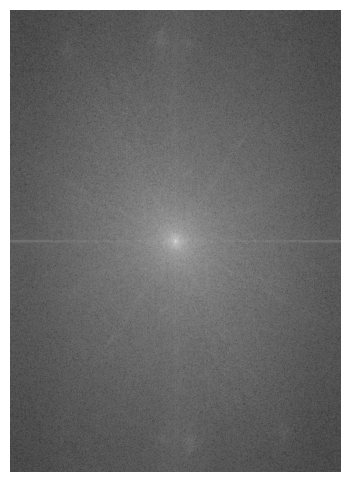

In [ ]:
f = np.fft.fft2(gray_cv)
f_shift = np.fft.fftshift(f)
magnitude = np.log(np.abs(f_shift)+1)
phase = np.angle(f_shift)

plt.figure(figsize=(6,6))
plt.imshow(magnitude,cmap ='gray')
plt.axis('off')
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

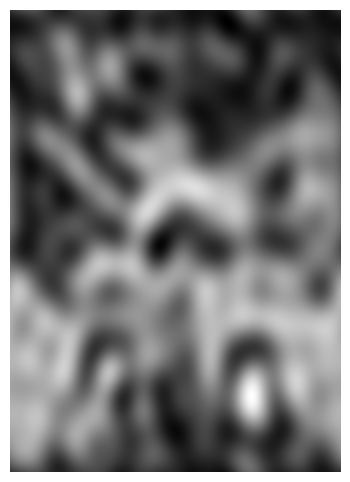

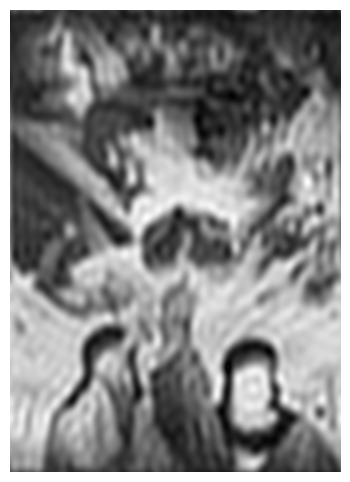

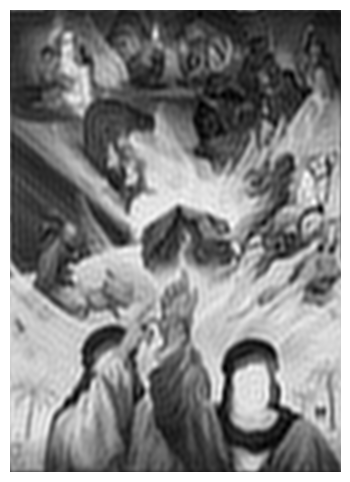

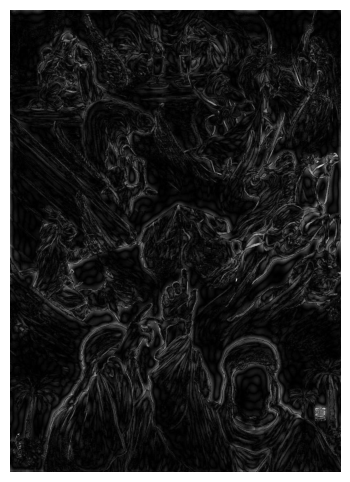

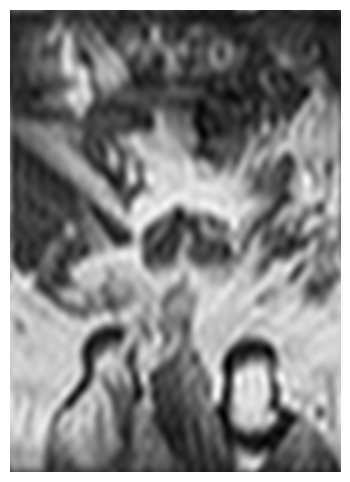

In [ ]:
rows,cols = gray_cv.shape

crow,ccol = rows//2,cols//2

r1 = 10
r2 = 30
r3 = 50 #decreased the third radius from 80 to 50 since the image was not blurring at all with r =80

mask_lpf = np.zeros((rows,cols),np.uint8)

y,x = np.ogrid[ :rows, :cols]
dist2= (x-ccol)**2 + (y-crow)**2

# LPF mask blurring with radius = 10
mask_lpf[dist2<= r1**2 ]=1

f_lpf = f_shift*mask_lpf

ishift_lpf = np.fft.ifftshift(f_lpf)
img_lpf = np.fft.ifft2(ishift_lpf)
img_lpf = np.abs(img_lpf)

plt.figure(figsize=(6,6))
plt.imshow(img_lpf,cmap='gray')
plt.axis('off')
plt.show()

# LPF mask blurring with radius = 30
mask_lpf[dist2 <= r2**2] =1

f_lpf = f_shift*mask_lpf

ishift_lpf = np.fft.ifftshift(f_lpf)
img_lpf = np.fft.ifft2(ishift_lpf)
img_lpf = np.abs(img_lpf)

plt.figure(figsize=(6,6))
plt.imshow(img_lpf,cmap='gray')
plt.axis('off')
plt.show()

# LPF mask blurring with radius = 50
mask_lpf[dist2 <= r3**2] =1

f_lpf = f_shift*mask_lpf

ishift_lpf = np.fft.ifftshift(f_lpf)
img_lpf = np.fft.ifft2(ishift_lpf)
img_lpf = np.abs(img_lpf)

plt.figure(figsize=(6,6))
plt.imshow(img_lpf,cmap='gray')
plt.axis('off')
plt.show()

#Blur levels increase on decreasing the radius because as radius decreases, the higher frequenncies which define edges, sharpness of an image disappear and only low frequencies remain which are characterised by smooth regions,hence blur levels increase

# High Pass Filter

mask_hpf = np.ones((rows,cols), np.uint8)

y,x = np.ogrid[ :rows, :cols]
dist2 = (x-ccol)**2 + (y-crow)**2
mask_hpf[dist2 <= r2**2 ] = 0

f_hpf = f_shift*mask_hpf

ishift_hpf = np.fft.ifftshift(f_hpf)
img_hpf = np.fft.ifft2(ishift_hpf)
img_hpf = np.abs(img_hpf)

plt.figure(figsize=(6,6))
plt.imshow(img_hpf,cmap='gray')
plt.axis('off')
plt.show()

# SQUARE LPF mask

mask_square = np.zeros((rows,cols), np.uint8)
mask_square[crow-25:crow+25,ccol-25:ccol+25] = 1

f_square = f_shift*mask_square

ishift_square = np.fft.ifftshift(f_square)
img_square = np.fft.ifft2(ishift_square)
img_square = np.abs(img_square)

plt.figure(figsize=(6,6))
plt.imshow(img_square,cmap='gray')
plt.axis('off')
plt.show()


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

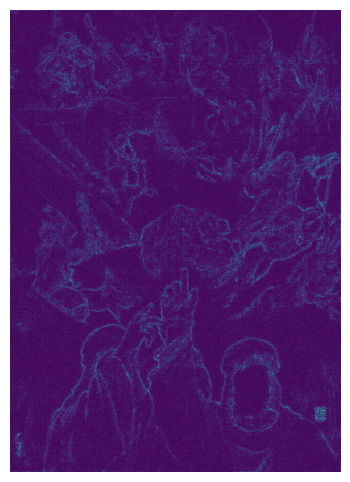

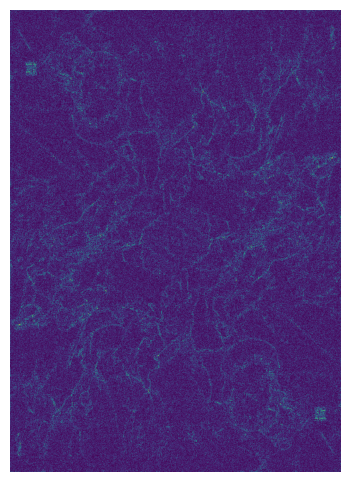

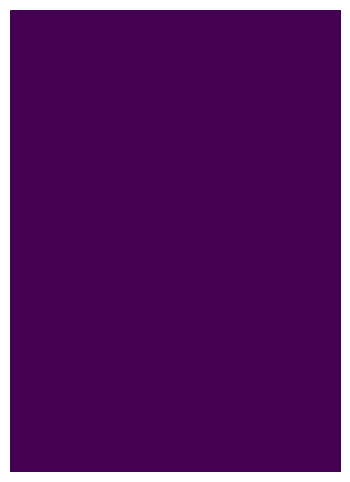

In [ ]:
#Phase reconstruction by the above formula
phase_only = f_shift/np.abs(f_shift)

ishift_phase = np.fft.ifftshift(phase_only)
img_phase = np.fft.ifft2(ishift_phase)
img_phase = np.abs(img_phase)

plt.figure(figsize=(6,6))
plt.imshow(img_phase)
plt.axis('off')
plt.show()

#Phase reconstruction by using np.angle()
phase_only = np.angle(f_shift)

ishift_phase = np.fft.ifftshift(phase_only)
img_phase = np.fft.ifft2(ishift_phase)
img_phase = np.abs(img_phase)

plt.figure(figsize=(6,6))
plt.imshow(img_phase)
plt.axis('off')
plt.show()

# They have different outputs because np.angle() only gives real values as output and does nt give complex exponentials. This results in garbage values when we do inverse fourier transform, hence the first image looks more like the actual image than the second image

mag_only = np.abs(fshift)

ishift_mag = np.fft.ifftshift(mag_only)
img_mag = np.fft.ifft2(ishift_mag)
img_mag = np.abs(img_mag)

plt.figure(figsize = (6,6))
plt.imshow(img_mag)
plt.axis('off')
plt.show()

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

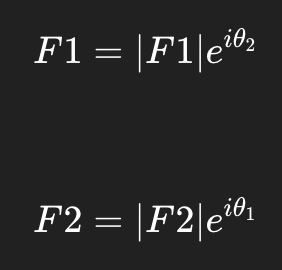

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.